In [1]:
import math
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score

In [2]:
df = pd.read_csv('final_project.csv')

In [3]:
df.head()

x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9  ...        x41       x42       x43  \
0 -14.789997 -1.040673 -4.204950  ...  -1.497117  5.414063 -2.325655   
1  -6.725709  0.896421  0.330165  ...  36.292790  4.490915  0.762561   
2  11.060572  5.325880 -2.632984  ...  -0.368491  9.088864 -0.689886   
3 -18.913592 -0.337041 -5.568076  ...  15.691546 -7.467775  2.940789   
4  27.532281  1.199715 -4.309105  ... -13.911297 -5.229937  1.783928   

        x44       x45        x46       x47       x48        x49  y  
0  1.674827 -0.264332  60.781427 -7.689696  0.151589  -8.040166  0  
1  6.526662  1.007927  15.805696 -4.896678 -0.320283  16.719974  0  
2 -2.731118  0.754200  30.856417 -7.428573 -2.090804  -7.869421  0  
3 -6.424112  0.419776 -72.424569  5.361375  1.806070  -7.670847  0  
4  3.957801 -0.096988 -14.085435 -0.208351 -0.894942  15.724742  1  

[5 rows x 51 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
x0     159974 non-null float64
x1     159975 non-null float64
x2     159962 non-null float64
x3     159963 non-null float64
x4     159974 non-null float64
x5     159963 non-null float64
x6     159974 non-null float64
x7     159973 non-null float64
x8     159979 non-null float64
x9     159970 non-null float64
x10    159957 non-null float64
x11    159970 non-null float64
x12    159964 non-null float64
x13    159969 non-null float64
x14    159966 non-null float64
x15    159965 non-null float64
x16    159974 non-null float64
x17    159973 non-null float64
x18    159960 non-null float64
x19    159965 non-null float64
x20    159962 non-null float64
x21    159971 non-null float64
x22    159973 non-null float64
x23    159953 non-null float64
x24    159972 non-null object
x25    159978 non-null float64
x26    159964 non-null float64
x27    159970 non-null float64
x28    159965 non-null

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

x0             x1             x2             x3  \
count  159974.000000  159975.000000  159962.000000  159963.000000   
mean       -0.001028       0.001358      -1.150145      -0.024637   
std         0.371137       6.340632      13.273480       8.065032   
min        -1.592635     -26.278302     -59.394048     -35.476594   
25%        -0.251641      -4.260973     -10.166536      -5.454438   
50%        -0.002047       0.004813      -1.340932      -0.031408   
75%         0.248532       4.284220       7.871676       5.445179   
max         1.600849      27.988178      63.545653      38.906025   

                  x4             x5             x6             x7  \
count  159974.000000  159963.000000  159974.000000  159973.000000   
mean       -0.000549       0.013582      -1.670670      -7.692795   
std         6.382293       7.670076      19.298665      30.542264   
min       -28.467536     -33.822988     -86.354483    -181.506976   
25%        -4.313118      -5.148130     -14.780146     -27.324771   
50%         0.000857       0.014118      -1.948594      -6.956789   
75%         4.306660       5.190749      11.446931      12.217071   
max        26.247812      35.550110      92.390605     149.150634   

                  x8             x9            x10            x11  \
count  159979.000000  159970.000000  159957.000000  159970.000000   
mean       -0.030540       0.005462       0.002253       0.030232   
std         8.901185       6.355040       7.871429       8.769633   
min       -37.691045     -27.980659     -36.306571     -38.092869   
25%        -6.031058      -4.260619      -5.288196      -5.903274   
50%        -0.016840       0.006045      -0.018176       0.010941   
75%         5.972349       4.305734       5.331573       5.935032   
max        39.049831      27.377842      37.945583      36.360443   

                 x12            x13            x14            x15  \
count  159964.000000  159969.000000  159966.000000  159965.000000   
mean       -1.334402       0.007669       0.008104       0.001215   
std        14.750990       8.953837       6.964097       3.271779   
min       -64.197967     -38.723514     -30.905214     -17.002359   
25%       -11.379492      -6.029945      -4.696755      -2.207774   
50%        -1.624439      -0.003473       0.002467       0.003535   
75%         8.374524       6.041959       4.701299       2.211660   
max        73.279354      42.392177      32.546340      13.782559   

                 x16            x17            x18            x19  \
count  159974.000000  159973.000000  159960.000000  159965.000000   
mean        0.006223       0.012040       0.012694       0.024555   
std         4.984065       7.569351       4.540714       7.595316   
min       -26.042983     -34.395898     -20.198686     -35.633396   
25%        -3.344027      -5.071470      -3.056131      -5.101553   
50%         0.012754       0.024541       0.015904       0.044703   
75%         3.366853       5.101962       3.073002       5.164732   
max        21.961123      37.057048      19.652986      33.515550   

                 x20            x21            x22            x23  \
count  159962.000000  159971.000000  159973.000000  159953.000000   
mean        0.299074      -0.029137       0.008400       0.722028   
std         5.806203       9.409635       5.412010      14.909127   
min       -26.677396     -43.501854     -23.644193     -66.640341   
25%        -3.607789      -6.361115      -3.649766      -9.268532   
50%         0.433055      -0.026385       0.011144       1.029609   
75%         4.306566       6.316457       3.672678      11.028035   
max        27.814560      46.237503      24.863012      58.490500   

                 x25            x26            x27            x28  \
count  159978.000000  159964.000000  159970.000000  159965.000000   
mean       -0.000806      -0.001066      -0.004159       0.031543   
std         1.263656       0.843258       6.774047      14.439534   
min       

In [6]:
df.isnull().sum().sum()

1608

In [7]:
colname = list(df.columns)
rank = {}

for i in range(len(colname)):
    count = df[df.columns[i]].isna().sum()
    rank[i] = count
    
    if count > 0:
        print("Column '{col}' has {ct} NAs".format(col = colname[i], ct = count))

Column 'x0' has 26 NAs
Column 'x1' has 25 NAs
Column 'x2' has 38 NAs
Column 'x3' has 37 NAs
Column 'x4' has 26 NAs
Column 'x5' has 37 NAs
Column 'x6' has 26 NAs
Column 'x7' has 27 NAs
Column 'x8' has 21 NAs
Column 'x9' has 30 NAs
Column 'x10' has 43 NAs
Column 'x11' has 30 NAs
Column 'x12' has 36 NAs
Column 'x13' has 31 NAs
Column 'x14' has 34 NAs
Column 'x15' has 35 NAs
Column 'x16' has 26 NAs
Column 'x17' has 27 NAs
Column 'x18' has 40 NAs
Column 'x19' has 35 NAs
Column 'x20' has 38 NAs
Column 'x21' has 29 NAs
Column 'x22' has 27 NAs
Column 'x23' has 47 NAs
Column 'x24' has 28 NAs
Column 'x25' has 22 NAs
Column 'x26' has 36 NAs
Column 'x27' has 30 NAs
Column 'x28' has 35 NAs
Column 'x29' has 30 NAs
Column 'x30' has 30 NAs
Column 'x31' has 39 NAs
Column 'x32' has 31 NAs
Column 'x33' has 41 NAs
Column 'x34' has 41 NAs
Column 'x35' has 30 NAs
Column 'x36' has 27 NAs
Column 'x37' has 23 NAs
Column 'x38' has 31 NAs
Column 'x39' has 23 NAs
Column 'x40' has 36 NAs
Column 'x41' has 40 NAs
Co

In [8]:
column_rank = pd.DataFrame(rank.items(), columns = ['Attr', 'Missing Count'])
column_rank["Missing Percentage"] = round(column_rank["Missing Count"]/len(df)*100,2)
column_rank.sort_values("Missing Count", ascending=False)

Attr  Missing Count  Missing Percentage
23    23             47                0.03
10    10             43                0.03
34    34             41                0.03
33    33             41                0.03
44    44             40                0.02
18    18             40                0.02
41    41             40                0.02
31    31             39                0.02
20    20             38                0.02
2      2             38                0.02
43    43             37                0.02
3      3             37                0.02
47    47             37                0.02
5      5             37                0.02
12    12             36                0.02
26    26             36                0.02
40    40             36                0.02
15    15             35                0.02
28    28             35                0.02
19    19             35                0.02
14    14             34                0.02
48    48             32                0.02
49    49             32                0.02
38    38             31                0.02
13    13             31                0.02
46    46             31                0.02
32    32             31                0.02
11    11             30                0.02
27    27             30                0.02
35    35             30                0.02
29    29             30                0.02
30    30             30                0.02
9      9             30                0.02
45    45             29                0.02
21    21             29                0.02
24    24             28                0.02
36    36             27                0.02
22    22             27                0.02
17    17             27                0.02
7      7             27                0.02
42    42             26                0.02
16    16             26                0.02
6      6             26                0.02
4      4             26                0.02
0      0             26                0.02
1      1             25                0.02
37    37             23                0.01
39    39             23                0.01
25    25             22                0.01
8      8             21                0.01
50    50              0                0.00

In [9]:
num_vec = list(range(df.shape[1]))
non_num = [24,29,30,32,37,50]
num_vec = [x for x in num_vec if x not in non_num]

In [10]:
df.iloc[:,num_vec]

x0        x1         x2         x3        x4         x5  \
0      -0.166563 -3.961588   4.621113   2.481908 -1.800135   0.804684   
1      -0.149894 -0.585676  27.839856   4.152333  6.426802  -2.426943   
2      -0.321707 -1.429819  12.251561   6.586874 -5.304647 -11.311090   
3      -0.245594  5.076677 -24.149632   3.637307  6.505811   2.290224   
4      -0.273366  0.306326 -11.352593   1.676758  2.928441  -0.616824   
...          ...       ...        ...        ...       ...        ...   
159995 -0.487024 -4.270269   0.417395  -1.992423  1.757552  -1.167819   
159996  0.825477  4.804368  22.161535  11.371303  1.715901   6.990759   
159997 -0.802489  5.362696   7.243419  -7.496074  2.295250  -2.756067   
159998  0.339237  7.609895   5.368414  -2.825481  4.046102  15.322603   
159999 -0.296748 -0.412773 -10.911407  -5.633629 -4.028154  15.939428   

               x6         x7         x8        x9        x10        x11  \
0        6.718751 -14.789997  -1.040673 -4.204950   6.187465  13.251523   
1       40.477058  -6.725709   0.896421  0.330165 -11.708859  -2.352809   
2       17.812850  11.060572   5.325880 -2.632984   1.572647  -4.170771   
3      -35.111751 -18.913592  -0.337041 -5.568076  -2.000255 -19.286668   
4      -16.505817  27.532281   1.199715 -4.309105   6.667530   1.965913   
...           ...        ...        ...       ...        ...        ...   
159995   0.606860  41.084463  -1.923188 -2.374213  -0.767600 -12.559985   
159996  32.221207 -12.278038  -3.861086  6.715126  -6.476405  -8.620521   
159997  10.531388  42.515821   1.420984  6.788916  -0.132832  -4.303314   
159998   7.805271 -10.233054   2.609986  4.251127  -7.484309  12.165538   
159999 -15.864365 -46.388192  18.339472 -4.575499  -2.976210  -8.389399   

              x12       x13        x14       x15       x16        x17  \
0       25.665413 -5.017267  10.503714 -2.517678  2.117910   5.865923   
1      -25.014934  9.799608 -10.960705  1.504000 -2.397836  -9.301839   
2       12.078602 -5.158498   7.302780 -2.192431 -4.065428  -7.675055   
3       10.995330 -5.914378   2.511400  1.292362 -2.496882 -15.722954   
4      -28.106348 -1.258950   5.759941  0.472584 -1.150097 -14.118709   
...           ...       ...        ...       ...       ...        ...   
159995 -17.261030  1.539396  -9.381709  1.902309  3.312219  -5.294374   
159996 -23.885703  3.337138  -8.122024  4.028587 -0.034659   6.270644   
159997  -7.488812 -1.683871   1.601512 -0.208325  3.796216   4.063787   
159998  21.002261 -4.642528  -7.944770  4.181494 -5.911926  -2.655156   
159999  -2.601603 -8.793067  -7.838192  6.576262 -1.135840 -14.512146   

             x18        x19       x20        x21        x22        x23  \
0      -6.666158   1.791497 -1.909114  -1.737940  -2.516715   3.553013   
1      -1.999413   5.045258 -5.809984  10.814319  -0.478112  10.590601   
2       4.041629  -6.633628  1.700321  -2.419221   2.467521  -5.270615   
3      -2.735382   1.117536  1.923670 -14.179167   1.470625 -11.484431   
4       4.527964  -1.284372 -9.026317  -7.039818  -1.978748 -15.998166   
...          ...        ...       ...        ...        ...        ...   
159995 -2.282197  -0.086858 -1.561650  -6.587422   5.722581   6.204019   
159996  7.208875   0.328383  1.659820 -16.104552  -4.897545  11.803698   
159997  1.326340  -2.845733 -9.689120 -11.673887   0.514821  -8.632121   
159998 -5.286593  15.251646  4.850677  -0.690645  10.031567  21.449970   
159999 -2.778027  -3.119896  8.996809 -11.115201   2.210400  23.694806   

             x25       x26       x27        x28       x31       x33  \
0      -0.801340  1.142950  1.005131 -18.473784 -3.851669 -1.940031   
1       0.818792 -0.642987  0.751086   3.749377  1.391594  2.211462   
2      -0.718315 -0.566757  4.171088  11.522448 -3.262082  0.419607   
3      -0.052430 -0.558582  9.215569  30.595226 -2.285241 -3.442715   
4      -0.223449  0.350781  1.811182  -4.094084  0.921047 -0.431640   
...          ...       ...       ...        

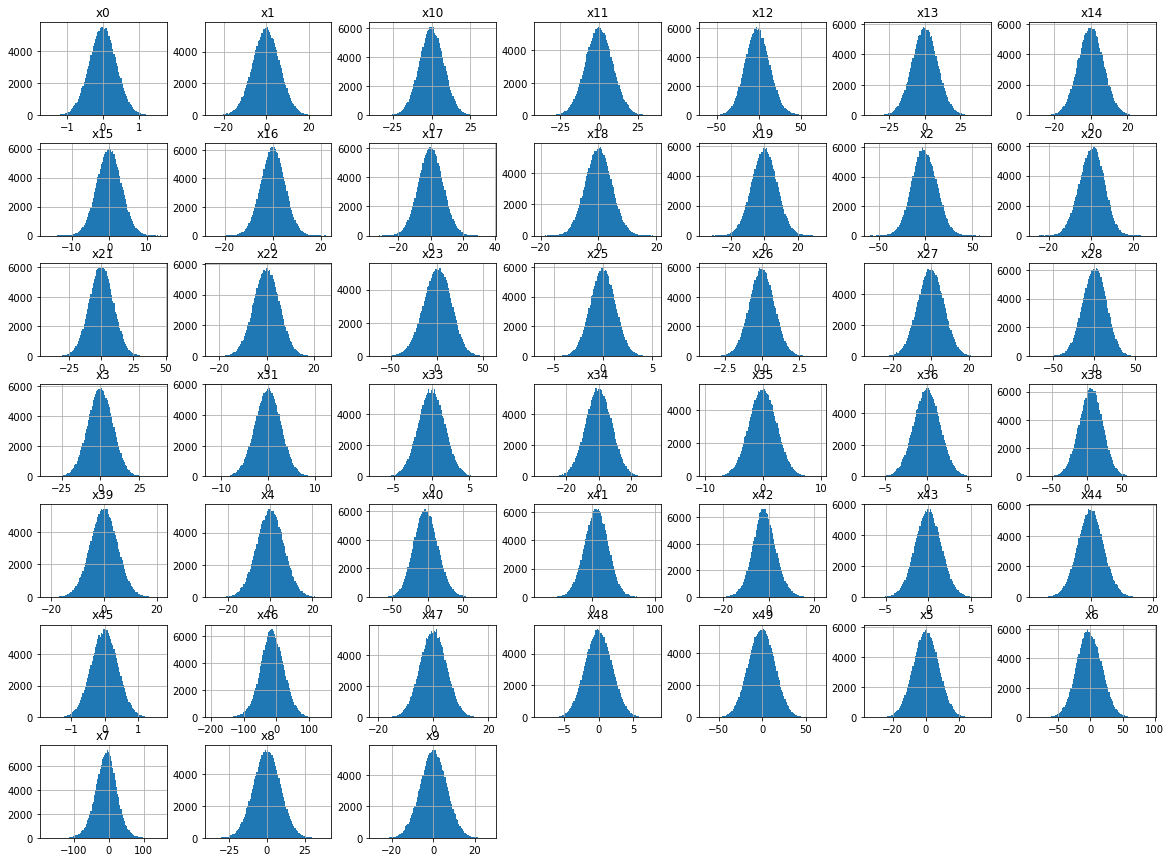

In [11]:
plot_df = df.iloc[:,num_vec]
plot_df.hist(bins=100, figsize = (20,15))
plt.show()

In [12]:
df = df.fillna(df.median())

In [13]:
for i in range(len(colname)):
    count = df[df.columns[i]].isna().sum()
    rank[i] = count
    
    if count > 0:
        print("Column '{col}' has {ct} NAs".format(col = colname[i], ct = count))

Column 'x24' has 28 NAs
Column 'x29' has 30 NAs
Column 'x30' has 30 NAs
Column 'x32' has 31 NAs
Column 'x37' has 23 NAs


In [14]:
df.dropna(axis=0, inplace=True)

In [15]:
df_cleaned = pd.DataFrame.copy(df)
df_cleaned = df_cleaned.reset_index(drop=True)

In [16]:
df_cleaned['y'].value_counts()

0    95722
1    64136
Name: y, dtype: int64

In [17]:
df_cleaned.shape

(159858, 51)

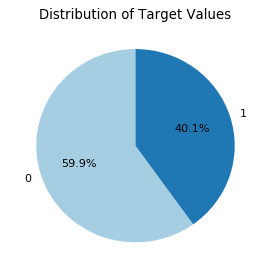

In [18]:
valueCounts = df_cleaned['y'].value_counts()
color = sns.color_palette('Paired')

plt.figure(figsize=(4, 4), dpi=80)
plt.pie(valueCounts, colors = color, autopct='%.01f%%', labels = ['0', '1'], startangle = 90)
plt.title("Distribution of Target Values")
plt.show()

In [19]:
df_cleaned.select_dtypes(include=[object])

x24   x29        x30     x32        x37
0       euorpe  July    tuesday    0.0%   $1313.96
1         asia   Aug  wednesday  -0.02%   $1962.78
2         asia  July  wednesday  -0.01%    $430.47
3         asia  July  wednesday   0.01%  $-2366.29
4         asia  July    tuesday   0.01%   $-620.66
...        ...   ...        ...     ...        ...
159853    asia   Aug  wednesday    0.0%   $-891.96
159854    asia   May  wednesday  -0.01%   $1588.65
159855    asia   Jun  wednesday   -0.0%    $687.46
159856    asia   May  wednesday  -0.02%    $439.21
159857    asia   Aug    tuesday   0.02%  $-1229.34

[159858 rows x 5 columns]

In [20]:
df_cleaned['x37'] = df_cleaned['x37'].map(lambda x: x.lstrip('$')).astype('float')
df_cleaned['x37']

0         1313.96
1         1962.78
2          430.47
3        -2366.29
4         -620.66
           ...   
159853    -891.96
159854    1588.65
159855     687.46
159856     439.21
159857   -1229.34
Name: x37, Length: 159858, dtype: float64

In [21]:
df_cleaned['x32'] = df_cleaned['x32'].map(lambda x: x.rstrip('%')).astype('float')
df_cleaned['x32']

0         0.00
1        -0.02
2        -0.01
3         0.01
4         0.01
          ... 
159853    0.00
159854   -0.01
159855   -0.00
159856   -0.02
159857    0.02
Name: x32, Length: 159858, dtype: float64

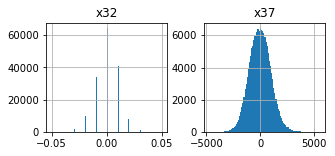

In [22]:
plot_df = df_cleaned.iloc[:,[32,37]]
plot_df.hist(bins=100, figsize = (5,2))
plt.show()

In [23]:
### num_vec is used to process x-data using standard-scaler later

num_vec = df_cleaned.select_dtypes(exclude=[object]).columns.tolist()
to_go = num_vec.index('y')
num_vec.pop(to_go)

'y'

In [24]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['x24', 'x29', 'x30'], prefix=['x24', 'x29', 'x30'])
df_cleaned

x0        x1         x2         x3        x4         x5  \
0      -0.166563 -3.961588   4.621113   2.481908 -1.800135   0.804684   
1      -0.149894 -0.585676  27.839856   4.152333  6.426802  -2.426943   
2      -0.321707 -1.429819  12.251561   6.586874 -5.304647 -11.311090   
3      -0.245594  5.076677 -24.149632   3.637307  6.505811   2.290224   
4      -0.273366  0.306326 -11.352593   1.676758  2.928441  -0.616824   
...          ...       ...        ...        ...       ...        ...   
159853 -0.487024 -4.270269   0.417395  -1.992423  1.757552  -1.167819   
159854  0.825477  4.804368  22.161535  11.371303  1.715901   6.990759   
159855 -0.802489  5.362696   7.243419  -7.496074  2.295250  -2.756067   
159856  0.339237  7.609895   5.368414  -2.825481  4.046102  15.322603   
159857 -0.296748 -0.412773 -10.911407  -5.633629 -4.028154  15.939428   

               x6         x7         x8        x9        x10        x11  \
0        6.718751 -14.789997  -1.040673 -4.204950   6.187465  13.251523   
1       40.477058  -6.725709   0.896421  0.330165 -11.708859  -2.352809   
2       17.812850  11.060572   5.325880 -2.632984   1.572647  -4.170771   
3      -35.111751 -18.913592  -0.337041 -5.568076  -2.000255 -19.286668   
4      -16.505817  27.532281   1.199715 -4.309105   6.667530   1.965913   
...           ...        ...        ...       ...        ...        ...   
159853   0.606860  41.084463  -1.923188 -2.374213  -0.767600 -12.559985   
159854  32.221207 -12.278038  -3.861086  6.715126  -6.476405  -8.620521   
159855  10.531388  42.515821   1.420984  6.788916  -0.132832  -4.303314   
159856   7.805271 -10.233054   2.609986  4.251127  -7.484309  12.165538   
159857 -15.864365 -46.388192  18.339472 -4.575499  -2.976210  -8.389399   

              x12       x13        x14       x15       x16        x17  \
0       25.665413 -5.017267  10.503714 -2.517678  2.117910   5.865923   
1      -25.014934  9.799608 -10.960705  1.504000 -2.397836  -9.301839   
2       12.078602 -5.158498   7.302780 -2.192431 -4.065428  -7.675055   
3       10.995330 -5.914378   2.511400  1.292362 -2.496882 -15.722954   
4      -28.106348 -1.258950   5.759941  0.472584 -1.150097 -14.118709   
...           ...       ...        ...       ...       ...        ...   
159853 -17.261030  1.539396  -9.381709  1.902309  3.312219  -5.294374   
159854 -23.885703  3.337138  -8.122024  4.028587 -0.034659   6.270644   
159855  -7.488812 -1.683871   1.601512 -0.208325  3.796216   4.063787   
159856  21.002261 -4.642528  -7.944770  4.181494 -5.911926  -2.655156   
159857  -2.601603 -8.793067  -7.838192  6.576262 -1.135840 -14.512146   

             x18        x19       x20        x21        x22        x23  \
0      -6.666158   1.791497 -1.909114  -1.737940  -2.516715   3.553013   
1      -1.999413   5.045258 -5.809984  10.814319  -0.478112  10.590601   
2       4.041629  -6.633628  1.700321  -2.419221   2.467521  -5.270615   
3      -2.735382   1.117536  1.923670 -14.179167   1.470625 -11.484431   
4       4.527964  -1.284372 -9.026317  -7.039818  -1.978748 -15.998166   
...          ...        ...       ...        ...        ...        ...   
159853 -2.282197  -0.086858 -1.561650  -6.587422   5.722581   6.204019   
159854  7.208875   0.328383  1.659820 -16.104552  -4.897545  11.803698   
159855  1.326340  -2.845733 -9.689120 -11.673887   0.514821  -8.632121   
159856 -5.286593  15.251646  4.850677  -0.690645  10.031567  21.449970   
159857 -2.778027  -3.119896  8.996809 -11.115201   2.210400  23.694806   

             x25       x26       x27        x28       x31   x32       x33  \
0      -0.801340  1.142950  1.005131 -18.473784 -3.851669  0.00 -1.940031   
1       0.818792 -0.642987  0.751086   3.749377  1.391594 -0.02  2.211462   
2      -0.718315 -0.566757  4.171088  11.522448 -3.262082 -0.01  0.419607   
3      -0.052430 -0.558582  9.215569  30.595226 -2.285241  0.01 -3.442715   
4      -0.223449  0.350781  1.811182  -4.094084  0.921047  0.01 -0.431640   
...     

In [25]:
df_cleaned.isnull().sum().sum()

0

Text(0.5,1,'Corrleation Heatmap')

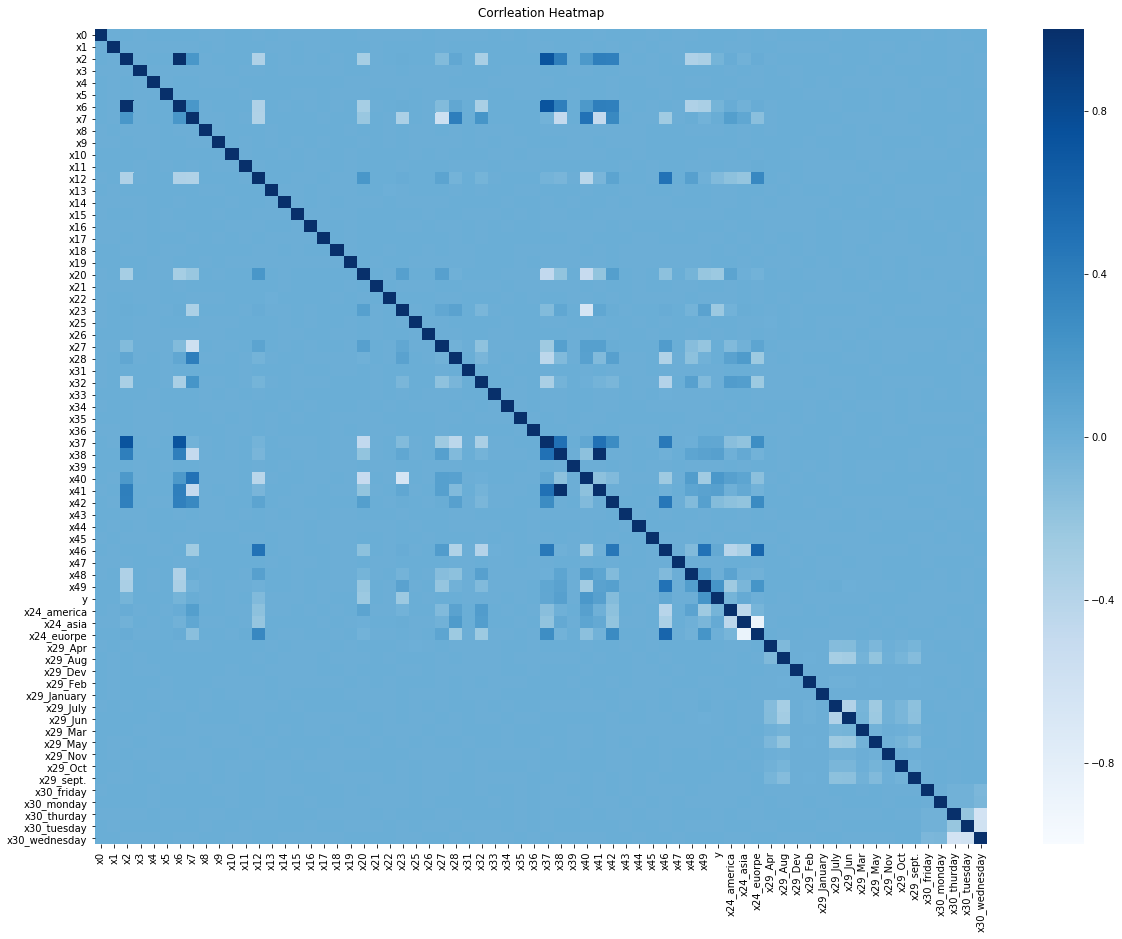

In [26]:
# features 2 and 6 have near-perfect correlation
# features 38 and 41 have near-perfect correlation
plt.figure(figsize=(20,15))

heatmap = sns.heatmap(df_cleaned.corr(), vmin=-1, vmax=1, annot=False, cmap = 'Blues')
heatmap.set_title('Corrleation Heatmap', fontdict={'fontsize':12}, pad=12)

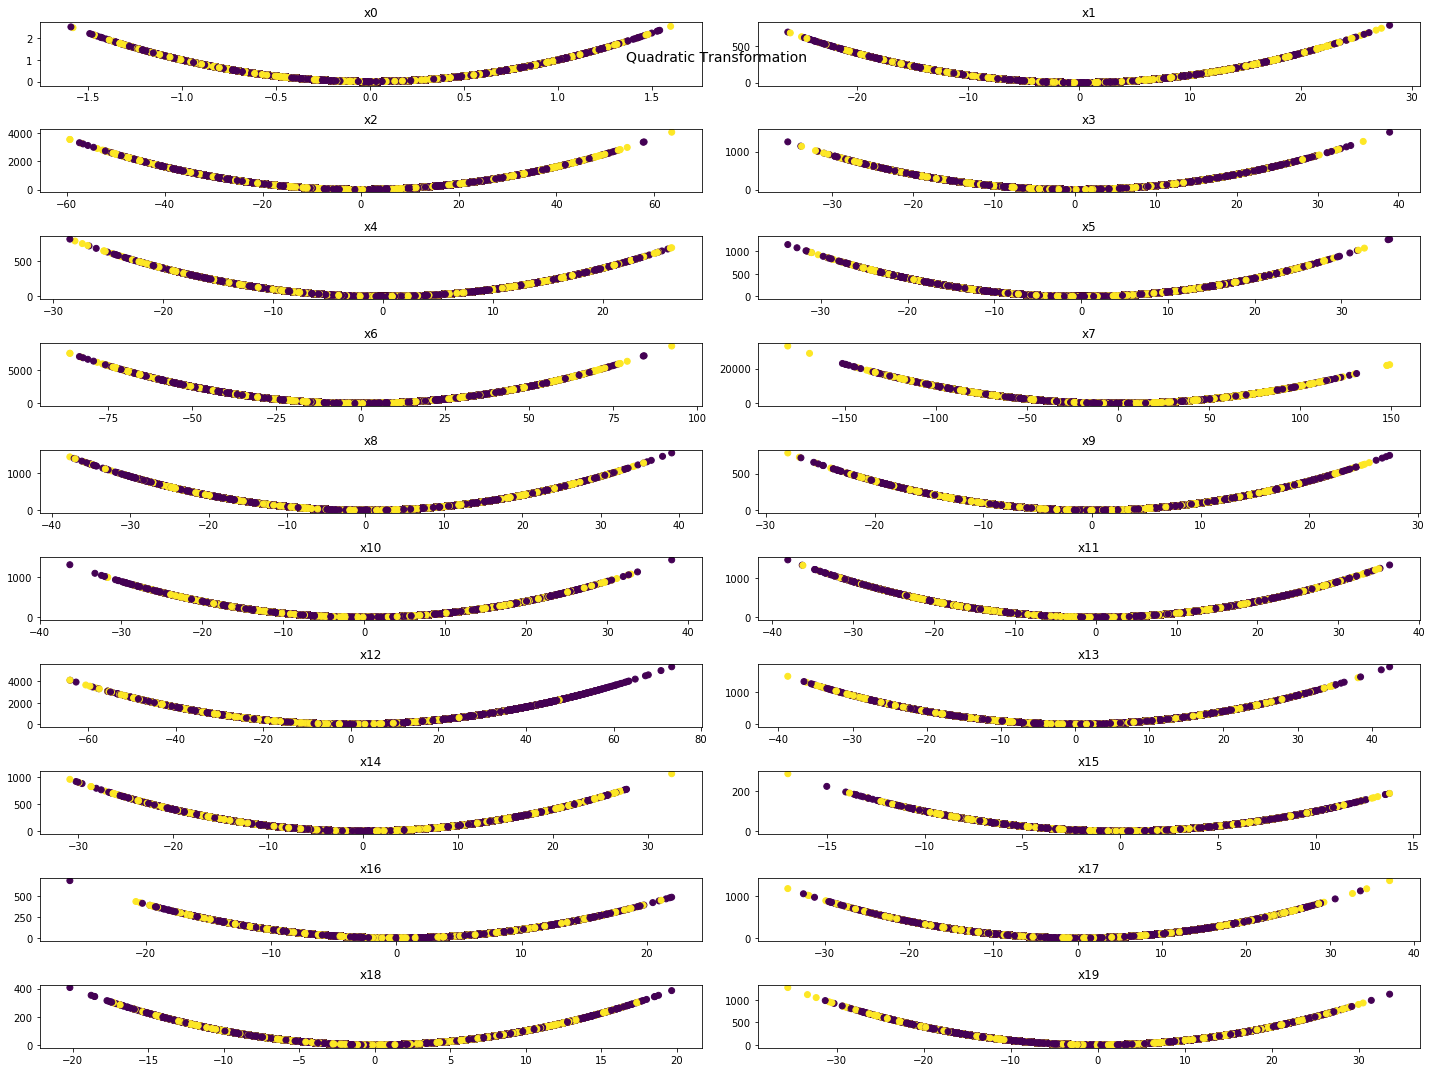

In [27]:
# No Good Distribution from Quadratic
fig, axs = plt.subplots(nrows=int(len(num_vec)/5)+1, ncols=2, figsize=(20,15))
plt.subplots_adjust(hspace=0.4)
fig.suptitle('Quadratic Transformation', fontsize=14, y=0.95)

for feature, ax in zip(num_vec, axs.ravel()):
    x_plot = df_cleaned[feature]
    plotter = df_cleaned[feature]**2
#     ax = fig.add_subplot(5,5,ax)
    ax.scatter(x_plot, plotter, c=df_cleaned['y'])
    ax.set_title(feature)

plt.tight_layout()
plt.show()

In [28]:
df_cleaned.iloc[:,~df_cleaned.columns.isin(num_vec)]

y  x24_america  x24_asia  x24_euorpe  x29_Apr  x29_Aug  x29_Dev  \
0       0            0         0           1        0        0        0   
1       0            0         1           0        0        1        0   
2       0            0         1           0        0        0        0   
3       0            0         1           0        0        0        0   
4       1            0         1           0        0        0        0   
...    ..          ...       ...         ...      ...      ...      ...   
159853  1            0         1           0        0        1        0   
159854  0            0         1           0        0        0        0   
159855  1            0         1           0        0        0        0   
159856  0            0         1           0        0        0        0   
159857  1            0         1           0        0        1        0   

        x29_Feb  x29_January  x29_July  x29_Jun  x29_Mar  x29_May  x29_Nov  \
0             0            0         1        0        0        0        0   
1             0            0         0        0        0        0        0   
2             0            0         1        0        0        0        0   
3             0            0         1        0        0        0        0   
4             0            0         1        0        0        0        0   
...         ...          ...       ...      ...      ...      ...      ...   
159853        0            0         0        0        0        0        0   
159854        0            0         0        0        0        1        0   
159855        0            0         0        1        0        0        0   
159856        0            0         0        0        0        1        0   
159857        0            0         0        0        0        0        0   

        x29_Oct  x29_sept.  x30_friday  x30_monday  x30_thurday  x30_tuesday  \
0             0          0           0           0            0            1   
1             0          0           0           0            0            0   
2             0          0           0           0            0            0   
3             0          0           0           0            0            0   
4             0          0           0           0            0            1   
...         ...        ...         ...         ...          ...          ...   
159853        0          0           0           0            0            0   
159854        0          0           0           0            0            0   
159855        0          0           0           0            0            0   
159856        0          0           0           0            0            0   
159857        0          0           0           0            0            1   

        x30_wednesday  
0                   0  
1                   1  
2                   1  
3                   1  
4                   0  
...               ...  
159853              1  
159854              1  
159855              1  
159856              1  
159857              0  

[159858 rows x 21 columns]

In [29]:
df_cleaned.columns[48:68]

Index(['x24_america', 'x24_asia', 'x24_euorpe', 'x29_Apr', 'x29_Aug',
       'x29_Dev', 'x29_Feb', 'x29_January', 'x29_July', 'x29_Jun', 'x29_Mar',
       'x29_May', 'x29_Nov', 'x29_Oct', 'x29_sept.', 'x30_friday',
       'x30_monday', 'x30_thurday', 'x30_tuesday', 'x30_wednesday'],
      dtype='object')

In [30]:
df_cleaned.shape

(159858, 68)

In [31]:
x_Data = df_cleaned.loc[:,df_cleaned.columns!='y']
y_Data = df_cleaned.loc[:,'y']
x_Data.shape

(159858, 67)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
def scale_just_nums(dataframe, vector):
    only_x = dataframe.loc[:,vector]
    scaled_x = pd.DataFrame(scaler.fit_transform(only_x))
    all_x_data = pd.concat([scaled_x.reset_index(drop=True),
                            dataframe.loc[:,~dataframe.columns.isin(vector)].reset_index(drop=True)],
                           axis=1)
    all_x_data = pd.DataFrame(all_x_data)
    
    return all_x_data

In [34]:
# Set up Train/Test Split for Modeling

x_train_raw, x_test_raw, y_train, y_test = train_test_split(
    x_Data, y_Data, test_size=0.2, stratify=y_Data, random_state=775)

x_test1_raw, x_test2_raw, y_test1, y_test2 = train_test_split(
    x_test_raw, y_test, test_size=0.4, stratify=y_test, random_state=543)

In [35]:
# run the standard scaler on the x_data:  train / test_1 / test_2
x_train = scale_just_nums(x_train_raw, num_vec)

In [36]:
x_train.describe()

0             1             2             3             4  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean  -1.413845e-17  2.882571e-17 -1.300032e-17 -1.041895e-17 -2.987686e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.293702e+00 -4.145805e+00 -4.384288e+00 -4.393026e+00 -4.459156e+00   
25%   -6.750546e-01 -6.706310e-01 -6.796290e-01 -6.721219e-01 -6.762766e-01   
50%   -3.288899e-03 -1.674750e-04 -1.493765e-02 -5.368516e-05 -1.162675e-03   
75%    6.751523e-01  6.743398e-01  6.793362e-01  6.785020e-01  6.771271e-01   
max    4.162903e+00  4.413651e+00  4.448423e+00  4.821781e+00  4.089792e+00   

                  5             6             7             8             9  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean  -1.606744e-17 -1.716824e-17 -3.701966e-17 -4.720006e-17 -1.193859e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.407742e+00 -4.384225e+00 -5.688742e+00 -4.224573e+00 -4.395611e+00   
25%   -6.723667e-01 -6.797054e-01 -6.426477e-01 -6.743065e-01 -6.714296e-01   
50%    7.148603e-04 -1.503909e-02  2.379112e-02  7.834064e-04 -4.017315e-04   
75%    6.745674e-01  6.793152e-01  6.502836e-01  6.735545e-01  6.762362e-01   
max    4.629712e+00  4.448153e+00  5.135372e+00  4.385633e+00  4.297136e+00   

                 10            11            12            13            14  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean  -2.569679e-18 -1.459161e-17 -1.281888e-17  1.004866e-17 -4.846797e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.219890e+00 -4.354929e+00 -4.264123e+00 -4.076303e+00 -4.317679e+00   
25%   -6.713134e-01 -6.769520e-01 -6.821354e-01 -6.753607e-01 -6.745102e-01   
50%   -1.332616e-03 -2.210389e-03 -1.970592e-02 -8.324833e-04 -1.622018e-03   
75%    6.772330e-01  6.718976e-01  6.577063e-01  6.746704e-01  6.746562e-01   
max    4.183586e+00  4.153363e+00  5.056678e+00  4.728307e+00  4.675108e+00   

                 15            16            17            18            19  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean  -3.743398e-18  1.346607e-17  3.243656e-17 -3.878132e-17  1.661306e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -5.205864e+00 -5.221761e+00 -4.543543e+00 -4.448580e+00 -4.695806e+00   
25%   -6.756693e-01 -6.715327e-01 -6.708203e-01 -6.756903e-01 -6.750046e-01   
50%    1.433374e-03  1.656109e-03  3.206763e-03 -1.349278e-05  2.051341e-03   
75%    6.752391e-01  6.742534e-01  6.718934e-01  6.746294e-01  6.735156e-01   
max    4.221368e+00  4.403546e+00  4.896146e+00  4.082436e+00  4.409022e+00   

                 20            21            22            23            24  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean  -9.531253e-18 -5.899150e-17 -2.547108e-18 -1.731669e-17 -4.875098e-17   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.649790e+00 -4.626827e+00 -4.367305e+00 -4.527073e+00 -5.035188e+00   
25%   -6.732456e-01 -6.721584e-01 -6.741050e-01 -6.695376e-01 -6.728124e-01   
50%    2.253302e-02  4.529768e-04  4.709290e-04  2.115802e-02 -3.237180e-03   
75%    6.908677e-01  6.739840e-01  6.772356e-01  6.911634e-01  6.736955e-01   
max    4.737642e+00  4.922686e+00  4.593195e+00  3.882857e+00  4.203145e+00   

                 25            26            27            28            29  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean  -1.503154e-17  2.415954e-17  7.201179e-18  2.567596e-17  9.124049e-16   
std    1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00  1.000004e+00   
min   -4.576976e+00 -4.720021e+00 -4.261042e+00 -4.442075e+00 -4.801645e+00   
25%   -6.713310e-01 -6.771457e-01 -6.743045e-01 -6.748311e-01 -

In [37]:
x_train.shape

(127886, 67)

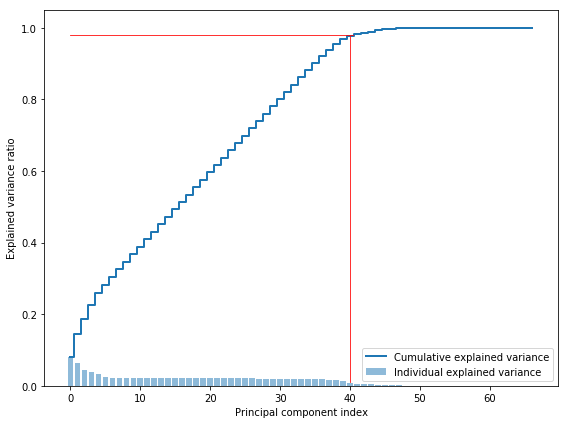

In [38]:
from sklearn.decomposition import PCA
pca = PCA()
x_train_pca = pd.DataFrame(pca.fit_transform(x_train))

exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.figure(figsize=(8,6))
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance', linewidth=2)
plt.axhline(0.98, 0.05, 0.6, color='red', linewidth=0.8)
plt.axvline(40, 0.01, 0.93, color='red', linewidth=0.8)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [39]:
x_train_pca.iloc[:, np.arange(0,40)]

0         1         2         3         4         5         6   \
0       0.108095  3.351153 -0.341175  0.330737 -0.241183 -1.069986  0.552776   
1      -0.125056  1.887114  1.110653 -0.491859 -2.401319  0.218659  0.636268   
2      -0.588107  2.020649  0.638761  1.512496  1.610665 -0.459652  0.654313   
3       0.303345  1.046181  0.177775  0.571816 -0.701269 -0.223748  0.300666   
4       3.207821 -2.416517 -3.411849 -0.957382  0.723947 -0.463846  2.267134   
...          ...       ...       ...       ...       ...       ...       ...   
127881 -1.226658 -0.340071  0.355597  1.429935  1.803331  1.923904 -0.150211   
127882 -1.705747 -2.154164  0.209960 -0.308183  0.624495  0.049730  0.437747   
127883 -0.385528 -2.596014  0.646215 -1.238027  1.389918  1.437327  1.306841   
127884 -1.422531  0.175748  1.193122 -1.493023 -2.050236 -1.038634 -0.191234   
127885 -2.264983 -0.043497  0.653364 -0.574274 -0.927942 -0.848594 -0.326674   

              7         8         9         10        11        12        13  \
0       0.029462 -0.601697  0.216651 -1.516245  1.603998  0.612969  0.031700   
1      -1.609357  0.133679 -0.725191 -0.244223  1.869341 -2.791080 -0.168106   
2       0.577546  0.135304 -0.439794  0.112971 -1.449524  1.787660 -0.434008   
3       0.452470 -0.247717 -0.536739 -1.198870  1.413201 -0.309426 -0.464349   
4       0.325399  0.981499  0.616687 -0.451320  0.410091 -2.449597 -0.292654   
...          ...       ...       ...       ...       ...       ...       ...   
127881 -0.330595  1.183466  1.075240  0.500299 -1.548173 -0.538174  0.392465   
127882 -0.910462 -0.633000  1.542328  0.492853 -0.924106 -0.642807 -1.052530   
127883 -2.327210  0.626649 -0.082792 -0.414230  2.051934 -0.742057  1.421350   
127884 -1.970036 -0.936784  1.705367  1.900040 -1.577835  0.600628 -0.074419   
127885 -1.296550  0.477985 -0.922566  0.982391 -0.591747 -0.759354  0.163678   

              14        15        16        17        18        19        20  \
0       0.435608 -0.589745  0.423627 -1.377263 -0.035612  1.462042 -0.030708   
1      -0.148078 -0.609439  0.556703 -0.731641 -0.060350  0.068273  0.897308   
2      -1.042704 -0.609074  1.529561 -0.926526 -0.730181 -0.687089  0.865728   
3       1.855487 -0.503845  1.054309 -0.599460 -0.989555  0.448412 -0.350530   
4       1.333216 -0.404127 -0.002376 -0.120934 -0.485260  0.059977  0.140352   
...          ...       ...       ...       ...       ...       ...       ...   
127881  0.193920 -1.045369 -0.896672  1.013604  1.248181  0.698907  0.069807   
127882  2.656755 -0.583802  1.625863 -2.034611 -0.748837 -0.628225  0.421207   
127883  0.224613 -0.488001  2.433757 -0.960076  0.471879 -0.734432  0.251085   
127884  0.318829  0.507997 -0.607191  0.679314  1.014390 -0.042660  0.986626   
127885  0.670992  1.239483  1.442924  0.347676 -0.852302  1.679545 -0.397040   

              21        22        23        24        25        26        27  \
0      -0.234746 -0.120496 -0.696236 -1.298996 -0.376671  1.308086  0.288880   
1      -0.292215  0.346304  1.276105 -0.642061  0.156728  0.714551 -2.811235   
2       1.273271  0.845128 -0.656975 -0.219583 -0.312659  1.642160 -2.543129   
3       0.035748 -0.311155  0.221117  1.049159 -0.047191 -0.656007 -0.683099   
4      -1.114768  0.529300  0.584965  0.528697  0.062284  0.742681 -0.203241   
...          ...       ...       ...       ...       ...       ...       ...   
127881  0.334172 -0.758801 -0.809550  0.124248  0.154482  0.792412 -1.434142   
127882 -0.721272  0.657850 -1.659900 -1.853027 -1.121967 -2.105903  1.057681   
127883 -1.539836  1.586790  0.766522  0.998984  1.155018 -0.916167  0.860191   
127884 -0.946023 -0.366746  0.882874  2.791473 -0.530187 -1.043093  0.806614   
127885  0.605142  0.809427  0.787685 -0.918136 -0.278986  1.056566 -1.764170   

              28        29        30        31        32        33        34  \
0       0.279628 -0.401468  0.242327  0.070056 -0.268025 -0.210853  1.177307   
1       0.

In [40]:
x_train_pca.describe()

0             1             2             3             4   \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean   7.399982e-18 -4.634218e-17 -7.847940e-18 -4.236498e-18 -2.563776e-17   
std    1.976959e+00  1.761395e+00  1.452825e+00  1.373520e+00  1.243419e+00   
min   -9.470040e+00 -8.401853e+00 -6.378426e+00 -4.899185e+00 -4.935132e+00   
25%   -1.311991e+00 -1.165451e+00 -9.656662e-01 -9.548070e-01 -8.801816e-01   
50%   -4.512069e-02 -5.204053e-02 -5.066616e-02 -1.011411e-02  1.788040e-02   
75%    1.292726e+00  1.137106e+00  9.159816e-01  9.372196e-01  8.532011e-01   
max    1.027815e+01  8.812438e+00  7.513720e+00  6.242087e+00  5.687814e+00   

                 5             6             7             8             9   \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean  -1.348040e-17 -1.136996e-17 -4.025542e-17 -3.068857e-18  7.266289e-18   
std    1.089192e+00  1.014565e+00  1.013013e+00  1.012099e+00  1.011851e+00   
min   -4.762363e+00 -4.128434e+00 -4.326406e+00 -4.361847e+00 -4.259389e+00   
25%   -7.404455e-01 -6.784944e-01 -6.841982e-01 -6.829889e-01 -6.812824e-01   
50%   -2.426907e-02 -1.853986e-03  1.195439e-03  1.515554e-03  1.201253e-03   
75%    7.280963e-01  6.805816e-01  6.876322e-01  6.816203e-01  6.846438e-01   
max    4.945135e+00  4.271565e+00  4.530271e+00  4.633317e+00  4.504449e+00   

                 10            11            12            13            14  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean   3.162355e-17  2.287015e-17  3.313324e-17 -1.756714e-17 -6.715024e-18   
std    1.009101e+00  1.008203e+00  1.007364e+00  1.006166e+00  1.005624e+00   
min   -4.096411e+00 -4.109389e+00 -4.449733e+00 -4.437464e+00 -4.599860e+00   
25%   -6.822396e-01 -6.818168e-01 -6.805499e-01 -6.763949e-01 -6.761502e-01   
50%   -1.876613e-03 -1.895347e-03  2.170788e-03 -2.209691e-03  4.195558e-04   
75%    6.818586e-01  6.790248e-01  6.813400e-01  6.769869e-01  6.765717e-01   
max    4.173175e+00  4.259269e+00  4.490100e+00  5.245342e+00  4.676510e+00   

                 15            16            17            18            19  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean   8.726492e-18 -2.189436e-18 -1.995712e-17 -3.789062e-17 -2.139084e-18   
std    1.005237e+00  1.004037e+00  1.003285e+00  1.002742e+00  1.001956e+00   
min   -4.160943e+00 -4.406274e+00 -4.283408e+00 -4.090253e+00 -4.208189e+00   
25%   -6.762402e-01 -6.758460e-01 -6.768962e-01 -6.775962e-01 -6.725770e-01   
50%    3.162139e-03 -4.651971e-03  1.532276e-03  7.299477e-04  1.704925e-03   
75%    6.760167e-01  6.773685e-01  6.788518e-01  6.734071e-01  6.733255e-01   
max    4.573864e+00  4.663754e+00  4.436830e+00  4.432479e+00  4.536920e+00   

                 20            21            22            23            24  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean  -9.351115e-18  2.301165e-17 -1.851905e-17 -7.919127e-18  1.883853e-19   
std    1.001113e+00  1.000359e+00  1.000204e+00  9.987753e-01  9.981527e-01   
min   -4.305363e+00 -4.072920e+00 -4.361038e+00 -4.376435e+00 -3.983699e+00   
25%   -6.710935e-01 -6.784927e-01 -6.725688e-01 -6.732202e-01 -6.747113e-01   
50%   -5.595465e-04 -2.810220e-03 -1.229414e-03 -1.106475e-03  1.056724e-03   
75%    6.711673e-01  6.793001e-01  6.730615e-01  6.748143e-01  6.726955e-01   
max    5.327159e+00  4.223491e+00  4.392202e+00  4.380849e+00  4.517989e+00   

                 25            26            27            28            29  \
count  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05  1.278860e+05   
mean   1.158526e-18  8.405282e-18  8.368821e-18 -6.699397e-18  9.965429e-18   
std    9.972718e-01  9.958217e-01  9.947839e-01  9.938398e-01  9.937301e-01   
min   -4.358044e+00 -4.313453e+00 -4.129855e+00 -4.115860e+00 -4.286599e+00   
25%   -6.716294e-01 -6.720243e-01 -6.704998e-01 -6.697697e-01 

#### Generate Test Data for both normal and PCA data

In [43]:
# run the standard scaler on the x_test_raw:  train / test_1 / test_2
x_test = scale_just_nums(x_test_raw, num_vec)

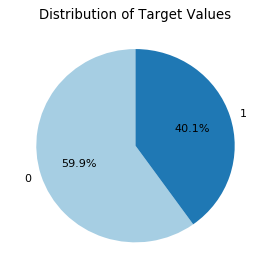

In [44]:
valueCounts = y_test.value_counts()
color = sns.color_palette('Paired')

plt.figure(figsize=(4, 4), dpi=80)
plt.pie(valueCounts, colors = color, autopct='%.01f%%', labels = ['0', '1'], startangle = 90)
plt.title("Distribution of Target Values")
plt.show()

In [45]:
x_test_pca = pd.DataFrame(pca.fit_transform(x_test))

#### Generate Test Data SUBSETS

In [46]:
x_test1 = scale_just_nums(x_test1_raw, num_vec)
x_test2 = scale_just_nums(x_test2_raw, num_vec)

In [47]:
print(x_test1.shape)
print(x_test2.shape)

(19183, 67)
(12789, 67)


#### Generate PCA Test Data SUBSETS

In [48]:
x_test1_pca = pd.DataFrame(pca.fit_transform(x_test1))
x_test2_pca = pd.DataFrame(pca.fit_transform(x_test2))

#### Setting Up SGD Classifier HYPERS and CV object

In [49]:
folder = KFold(n_splits=10, shuffle=True, random_state=867)

In [50]:
sgd_hyps = {'loss':['hinge', 'modified_huber', 'squared_hinge', 'perceptron',
                    'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            'alpha':np.logspace(-8,8,100),
            'fit_intercept':[True, False],
            'tol':np.logspace(-10,-1,8),
            'epsilon':np.logspace(-4,4,9),
            'learning_rate':['optimal','constant','invscaling','adaptive'],
            'eta0':np.logspace(-3,9,13),
            'power_t':[x + 0.5 for x in np.linspace(-10000,10000,21)],
            'validation_fraction':[0.2],
            'n_iter_no_change':[5],
            'class_weight':[None,'balanced']           
}

In [51]:
sgdc = SGDClassifier(max_iter=10000, penalty='l2', fit_intercept=True, random_state=487, n_iter_no_change=10, verbose=20)

#### Function for Running Either PCA or Scaled X_train and generating all outputs for SGD

In [52]:
def sgd_any_inputs(model, hypers, cv_object, train_x, train_y):
    # initial fit
    random_search = RandomizedSearchCV(model, param_distributions=hypers, scoring='f1',
                                      n_iter=200, n_jobs=30, cv=cv_object,
                                      random_state=816, verbose=20)
    random_search.fit(train_x, train_y)
    
    current_best = random_search.best_estimator_
    print(current_best,'\n')
    print('f1 score:\t\t\t',random_search.best_score_)

    # tuned hypers as ranges
    tuned_hypers = {'loss':[current_best.loss],
                    'alpha':[abs(x) for x in np.random.normal(loc=current_best.alpha,
                                                              scale=2*math.exp(math.log(current_best.alpha)),
                                                              size=20).tolist()
                            ],
                    'fit_intercept':[current_best.fit_intercept],
                    'tol':[abs(x) for x in np.random.normal(loc=current_best.tol,
                                                            scale=2*math.exp(math.log(current_best.tol)),
                                                            size=10).tolist()
                          ],
                    'eta0':[current_best.eta0],
                    'epsilon':[current_best.epsilon],
                    'learning_rate':[current_best.learning_rate],
                    'power_t':[current_best.power_t],
                    'validation_fraction':[0.2],
                    'n_iter_no_change':[5],
                    'class_weight':[current_best.class_weight]
                   }
    
    # secondary fit
    grid_search = GridSearchCV(model, param_grid=tuned_hypers, scoring='f1',
                               n_jobs=32, cv=cv_object, verbose=20)
    grid_search.fit(train_x, train_y)
    
    final_best = grid_search.best_estimator_
    print(final_best,'\n')
    print('f1 score:\t\t\t',grid_search.best_score_)
    
    # calibrated CV for losses (not log or modified_huber)
    calibrated_clf = CalibratedClassifierCV(base_estimator=model, method='sigmoid', cv=5)  # set the SGD classifier as the base estimator
    
    cal_params = {'base_estimator__alpha':[ # note 'base_estimator__' in the params because you want to change params in the SGDClassifier
        abs(x) for x in np.random.normal(loc=current_best.alpha,
                                         scale=2*math.exp(math.log(current_best.alpha)),
                                         size=20).tolist()
    ]}  
    cal_search = GridSearchCV(estimator=calibrated_clf, param_grid=cal_params, cv=5)
    cal_search.fit(train_x, train_y)
    
    cal_best = calibrated_clf.set_params(**cal_search.best_params_)
    
    return final_best, cal_best

#### SGD with PCA

In [53]:
# sgd_pca_model, = sgd_any_inputs(sgdc, sgd_hyps, folder, x_train_pca.iloc[:, np.arange(0,40)], y_train)
# sgd_pca_model

In [54]:
# pca_preds = sgd_pca_model.predict(x_test_pca.iloc[:, np.arange(0,40)])
# f1_score(y_test, pca_preds)

#### SGD with NO PCA

In [55]:
sgd_model,cal_model = sgd_any_inputs(sgdc, sgd_hyps, folder, x_train, y_train)
sgd_model

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=30)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=30)]: Done   3 tasks      | elapsed:    4.2s
[Parallel(n_jobs=30)]: Done   4 tasks      | elapsed:    4.2s
[Parallel(n_jobs=30)]: Done   5 tasks      | elapsed:    4.2s
[Parallel(n_jobs=30)]: Done   6 tasks      | elapsed:    4.2s
[Parallel(n_jobs=30)]: Done   7 tasks      | elapsed:    4.3s
[Parallel(n_jobs=30)]: Done   8 tasks      | elapsed:    4.3s
[Parallel(n_jobs=30)]: Done   9 tasks      | elapsed:    4.3s
[Parallel(n_jobs=30)]: Done  10 tasks      | elapsed:    4.3s
[Parallel(n_jobs=30)]: Done  11 tasks      | elapsed:    4.4s
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:    4.4s
[Parallel(n_jobs=30)]: Done  13 tasks      | elapsed:    4.5s
[Parallel(n_jobs=30)]: Done  14 tasks      | elapsed:    4.5s
[Parallel(n_jobs=30)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=30)]: Done 133 tasks      | elapsed:   15.5s
[Parallel(n_jobs=30)]: Done 134 tasks      | elapsed:   15.5s
[Parallel(n_jobs=30)]: Done 135 tasks      | elapsed:   15.5s
[Parallel(n_jobs=30)]: Done 136 tasks      | elapsed:   15.5s
[Parallel(n_jobs=30)]: Done 137 tasks      | elapsed:   15.6s
[Parallel(n_jobs=30)]: Done 138 tasks      | elapsed:   15.6s
[Parallel(n_jobs=30)]: Done 139 tasks      | elapsed:   15.7s
[Parallel(n_jobs=30)]: Done 140 tasks      | elapsed:   15.7s
[Parallel(n_jobs=30)]: Done 141 tasks      | elapsed:   15.8s
[Parallel(n_jobs=30)]: Done 142 tasks      | elapsed:   15.9s
[Parallel(n_jobs=30)]: Done 143 tasks      | elapsed:   15.9s
[Parallel(n_jobs=30)]: Done 144 tasks      | elapsed:   16.0s
[Parallel(n_jobs=30)]: Done 145 tasks      | elapsed:   16.0s
[Parallel(n_jobs=30)]: Done 146 tasks      | elapsed:   16.0s
[Parallel(n_jobs=30)]: Done 147 tasks      | elapsed:   16.1s
[Parallel(n_jobs=30)]: Done 148 tasks      | elapsed:   16.1s
[Paralle

[Parallel(n_jobs=30)]: Done 268 tasks      | elapsed:   58.1s
[Parallel(n_jobs=30)]: Done 269 tasks      | elapsed:   58.3s
[Parallel(n_jobs=30)]: Done 270 tasks      | elapsed:   58.3s
[Parallel(n_jobs=30)]: Done 271 tasks      | elapsed:   58.3s
[Parallel(n_jobs=30)]: Done 272 tasks      | elapsed:   58.4s
[Parallel(n_jobs=30)]: Done 273 tasks      | elapsed:   58.4s
[Parallel(n_jobs=30)]: Done 274 tasks      | elapsed:   58.4s
[Parallel(n_jobs=30)]: Done 275 tasks      | elapsed:   58.5s
[Parallel(n_jobs=30)]: Done 276 tasks      | elapsed:   58.5s
[Parallel(n_jobs=30)]: Done 277 tasks      | elapsed:   58.6s
[Parallel(n_jobs=30)]: Done 278 tasks      | elapsed:   58.7s
[Parallel(n_jobs=30)]: Done 279 tasks      | elapsed:   58.7s
[Parallel(n_jobs=30)]: Done 280 tasks      | elapsed:   58.7s
[Parallel(n_jobs=30)]: Done 281 tasks      | elapsed:   58.9s
[Parallel(n_jobs=30)]: Done 282 tasks      | elapsed:   59.0s
[Parallel(n_jobs=30)]: Done 283 tasks      | elapsed:   59.1s
[Paralle

[Parallel(n_jobs=30)]: Done 403 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 404 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 405 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 406 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 407 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 408 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 409 tasks      | elapsed:  1.8min
[Parallel(n_jobs=30)]: Done 410 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 411 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 412 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 413 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 414 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 415 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 416 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 417 tasks      | elapsed:  1.9min
[Parallel(n_jobs=30)]: Done 418 tasks      | elapsed:  1.9min
[Paralle

[Parallel(n_jobs=30)]: Done 538 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 539 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 540 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 541 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 542 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 543 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 544 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 545 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 546 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 547 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 548 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 549 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 550 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 551 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 552 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done 553 tasks      | elapsed:  2.4min
[Paralle

[Parallel(n_jobs=30)]: Done 671 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 672 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 673 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 674 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 675 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 676 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 677 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 678 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 679 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 680 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 681 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 682 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 683 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 684 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 685 tasks      | elapsed:  5.8min
[Parallel(n_jobs=30)]: Done 686 tasks      | elapsed:  5.8min
[Paralle

[Parallel(n_jobs=30)]: Done 805 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 806 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 807 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 808 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 809 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 810 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 811 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 812 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 813 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 814 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 815 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 816 tasks      | elapsed:  7.0min
[Parallel(n_jobs=30)]: Done 817 tasks      | elapsed:  7.1min
[Parallel(n_jobs=30)]: Done 818 tasks      | elapsed:  7.1min
[Parallel(n_jobs=30)]: Done 819 tasks      | elapsed:  7.1min
[Parallel(n_jobs=30)]: Done 820 tasks      | elapsed:  7.1min
[Paralle

[Parallel(n_jobs=30)]: Done 939 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 940 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 941 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 942 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 943 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 944 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 945 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 946 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 947 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 948 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 949 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 950 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 951 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 952 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 953 tasks      | elapsed:  7.5min
[Parallel(n_jobs=30)]: Done 954 tasks      | elapsed:  7.5min
[Paralle

[Parallel(n_jobs=30)]: Done 1072 tasks      | elapsed:  8.5min
[Parallel(n_jobs=30)]: Done 1073 tasks      | elapsed:  8.5min
[Parallel(n_jobs=30)]: Done 1074 tasks      | elapsed:  8.5min
[Parallel(n_jobs=30)]: Done 1075 tasks      | elapsed:  8.5min
[Parallel(n_jobs=30)]: Done 1076 tasks      | elapsed:  8.5min
[Parallel(n_jobs=30)]: Done 1077 tasks      | elapsed:  8.5min
[Parallel(n_jobs=30)]: Done 1078 tasks      | elapsed:  8.5min
[Parallel(n_jobs=30)]: Done 1079 tasks      | elapsed:  8.5min
[Parallel(n_jobs=30)]: Done 1080 tasks      | elapsed:  8.6min
[Parallel(n_jobs=30)]: Done 1081 tasks      | elapsed:  8.6min
[Parallel(n_jobs=30)]: Done 1082 tasks      | elapsed:  8.6min
[Parallel(n_jobs=30)]: Done 1083 tasks      | elapsed:  8.6min
[Parallel(n_jobs=30)]: Done 1084 tasks      | elapsed:  8.6min
[Parallel(n_jobs=30)]: Done 1085 tasks      | elapsed:  8.6min
[Parallel(n_jobs=30)]: Done 1086 tasks      | elapsed:  8.6min
[Parallel(n_jobs=30)]: Done 1087 tasks      | elapsed: 

[Parallel(n_jobs=30)]: Done 1206 tasks      | elapsed:  8.9min
[Parallel(n_jobs=30)]: Done 1207 tasks      | elapsed:  8.9min
[Parallel(n_jobs=30)]: Done 1208 tasks      | elapsed:  8.9min
[Parallel(n_jobs=30)]: Done 1209 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1210 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1211 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1212 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1213 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1214 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1215 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1216 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1217 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1218 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1219 tasks      | elapsed:  9.0min
[Parallel(n_jobs=30)]: Done 1220 tasks      | elapsed:  9.1min
[Parallel(n_jobs=30)]: Done 1221 tasks      | elapsed: 

[Parallel(n_jobs=30)]: Done 1338 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1339 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1340 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1341 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1342 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1343 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1344 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1345 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1346 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1347 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1348 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1349 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1350 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1351 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1352 tasks      | elapsed:  9.7min
[Parallel(n_jobs=30)]: Done 1353 tasks      | elapsed: 

[Parallel(n_jobs=30)]: Done 1472 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1473 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1474 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1475 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1476 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1477 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1478 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1479 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1480 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1481 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1482 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1483 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1484 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1485 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1486 tasks      | elapsed:  9.8min
[Parallel(n_jobs=30)]: Done 1487 tasks      | elapsed: 

[Parallel(n_jobs=30)]: Done 1607 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1608 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1609 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1610 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1611 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1612 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1613 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1614 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1615 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1616 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1617 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1618 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1619 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1620 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1621 tasks      | elapsed: 10.0min
[Parallel(n_jobs=30)]: Done 1622 tasks      | elapsed: 

[Parallel(n_jobs=30)]: Done 1740 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1741 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1742 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1743 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1744 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1745 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1746 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1747 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1748 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1749 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1750 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1751 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1752 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1753 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1754 tasks      | elapsed: 10.2min
[Parallel(n_jobs=30)]: Done 1755 tasks      | elapsed: 

[Parallel(n_jobs=30)]: Done 1872 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1873 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1874 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1875 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1876 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1877 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1878 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1879 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1880 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1881 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1882 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1883 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1884 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1885 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1886 tasks      | elapsed: 10.4min
[Parallel(n_jobs=30)]: Done 1887 tasks      | elapsed: 

-- Epoch 1
Norm: 617910.63, NNZs: 50, Bias: -57990.051869, T: 127886, Avg. loss: 184161.584063
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 0, Bias: 37185.044627, T: 255772, Avg. loss: 185041.924372
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 0, Bias: -137014.577972, T: 383658, Avg. loss: 184892.990919
Total training time: 0.14 seconds.
-- Epoch 4
Norm: 1053426.21, NNZs: 50, Bias: -32167.691892, T: 511544, Avg. loss: 183431.135765
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 682403.97, NNZs: 50, Bias: -82136.163606, T: 639430, Avg. loss: 185225.111234
Total training time: 0.22 seconds.
-- Epoch 6
Norm: 729547.72, NNZs: 50, Bias: -136744.425342, T: 767316, Avg. loss: 184283.695524
Total training time: 0.27 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 0, Bias: -41961.538385, T: 895202, Avg. loss: 185605.518430
Total training time: 0.31 seconds.
-- Epoch 8
Norm: 1068252.79, NNZs: 50, Bias: 156843.129937, T: 1023088, Avg. loss: 184398.016928
Total tra

Norm: 53.85, NNZs: 67, Bias: -0.199182, T: 9079906, Avg. loss: 13.628621
Total training time: 2.93 seconds.
-- Epoch 72
Norm: 41.58, NNZs: 67, Bias: -4.552267, T: 9207792, Avg. loss: 13.613754
Total training time: 2.97 seconds.
-- Epoch 73
Norm: 46.52, NNZs: 67, Bias: -7.894879, T: 9335678, Avg. loss: 13.725913
Total training time: 3.01 seconds.
-- Epoch 74
Norm: 41.58, NNZs: 67, Bias: -0.039033, T: 9463564, Avg. loss: 13.771472
Total training time: 3.04 seconds.
-- Epoch 75
Norm: 37.62, NNZs: 67, Bias: -5.573655, T: 9591450, Avg. loss: 13.646859
Total training time: 3.08 seconds.
-- Epoch 76
Norm: 45.52, NNZs: 67, Bias: -0.075862, T: 9719336, Avg. loss: 13.681165
Total training time: 3.12 seconds.
-- Epoch 77
Norm: 54.83, NNZs: 67, Bias: 2.445923, T: 9847222, Avg. loss: 13.644399
Total training time: 3.16 seconds.
-- Epoch 78
Norm: 11.58, NNZs: 67, Bias: -2.001680, T: 9975108, Avg. loss: 3.354829
Total training time: 3.20 seconds.
-- Epoch 79
Norm: 11.20, NNZs: 67, Bias: -0.458454, T:

Norm: 1.09, NNZs: 67, Bias: -0.085262, T: 18415584, Avg. loss: 0.691911
Total training time: 5.94 seconds.
-- Epoch 145
Norm: 1.09, NNZs: 67, Bias: -0.088073, T: 18543470, Avg. loss: 0.691861
Total training time: 5.98 seconds.
-- Epoch 146
Norm: 1.09, NNZs: 67, Bias: -0.085246, T: 18671356, Avg. loss: 0.692064
Total training time: 6.03 seconds.
-- Epoch 147
Norm: 1.10, NNZs: 67, Bias: -0.079455, T: 18799242, Avg. loss: 0.691386
Total training time: 6.07 seconds.
-- Epoch 148
Norm: 1.08, NNZs: 67, Bias: -0.084322, T: 18927128, Avg. loss: 0.692441
Total training time: 6.11 seconds.
-- Epoch 149
Norm: 1.09, NNZs: 67, Bias: -0.078898, T: 19055014, Avg. loss: 0.691572
Total training time: 6.15 seconds.
-- Epoch 150
Norm: 1.09, NNZs: 67, Bias: -0.082781, T: 19182900, Avg. loss: 0.692035
Total training time: 6.20 seconds.
-- Epoch 151
Norm: 1.09, NNZs: 67, Bias: -0.086894, T: 19310786, Avg. loss: 0.692096
Total training time: 6.24 seconds.
-- Epoch 152
Norm: 1.09, NNZs: 67, Bias: -0.075092, T

[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 tasks      | elapsed:    7.7s
[Parallel(n_jobs=32)]: Done   2 tasks      | elapsed:    8.0s
[Parallel(n_jobs=32)]: Done   3 tasks      | elapsed:    8.2s
[Parallel(n_jobs=32)]: Done   4 tasks      | elapsed:    8.4s
[Parallel(n_jobs=32)]: Done   5 tasks      | elapsed:    8.5s
[Parallel(n_jobs=32)]: Done   6 tasks      | elapsed:    8.5s
[Parallel(n_jobs=32)]: Done   7 tasks      | elapsed:    8.5s
[Parallel(n_jobs=32)]: Done   8 tasks      | elapsed:    8.6s
[Parallel(n_jobs=32)]: Done   9 tasks      | elapsed:    8.8s
[Parallel(n_jobs=32)]: Done  10 tasks      | elapsed:    8.8s
[Parallel(n_jobs=32)]: Done  11 tasks      | elapsed:    8.8s
[Parallel(n_jobs=32)]: Done  12 tasks      | elapsed:    8.8s
[Parallel(n_jobs=32)]: Done  13 tasks      | elapsed:    9.0s
[Parallel(n_jobs=32)]: Done  14 tasks      | elapsed:    9.0s
[Parallel(n_jobs=32)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=32)]: Done 132 tasks      | elapsed:   42.0s
[Parallel(n_jobs=32)]: Done 133 tasks      | elapsed:   42.3s
[Parallel(n_jobs=32)]: Done 134 tasks      | elapsed:   42.7s
[Parallel(n_jobs=32)]: Done 135 tasks      | elapsed:   42.7s
[Parallel(n_jobs=32)]: Done 136 tasks      | elapsed:   42.7s
[Parallel(n_jobs=32)]: Done 137 tasks      | elapsed:   42.8s
[Parallel(n_jobs=32)]: Done 138 tasks      | elapsed:   43.4s
[Parallel(n_jobs=32)]: Done 139 tasks      | elapsed:   43.6s
[Parallel(n_jobs=32)]: Done 140 tasks      | elapsed:   43.8s
[Parallel(n_jobs=32)]: Done 141 tasks      | elapsed:   43.9s
[Parallel(n_jobs=32)]: Done 142 tasks      | elapsed:   44.0s
[Parallel(n_jobs=32)]: Done 143 tasks      | elapsed:   44.2s
[Parallel(n_jobs=32)]: Done 144 tasks      | elapsed:   44.4s
[Parallel(n_jobs=32)]: Done 145 tasks      | elapsed:   44.6s
[Parallel(n_jobs=32)]: Done 146 tasks      | elapsed:   44.6s
[Parallel(n_jobs=32)]: Done 147 tasks      | elapsed:   44.7s
[Paralle

[Parallel(n_jobs=32)]: Done 265 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 266 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 267 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 268 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 269 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 270 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 271 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 273 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 274 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 275 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 276 tasks      | elapsed:  1.3min
[Parallel(n_jobs=32)]: Done 277 tasks      | elapsed:  1.4min
[Parallel(n_jobs=32)]: Done 278 tasks      | elapsed:  1.4min
[Parallel(n_jobs=32)]: Done 279 tasks      | elapsed:  1.4min
[Parallel(n_jobs=32)]: Done 280 tasks      | elapsed:  1.4min
[Paralle

[Parallel(n_jobs=32)]: Done 398 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 399 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 400 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 401 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 402 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 403 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 404 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 405 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 406 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 407 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 408 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 409 tasks      | elapsed:  1.9min
[Parallel(n_jobs=32)]: Done 410 tasks      | elapsed:  2.0min
[Parallel(n_jobs=32)]: Done 411 tasks      | elapsed:  2.0min
[Parallel(n_jobs=32)]: Done 412 tasks      | elapsed:  2.0min
[Parallel(n_jobs=32)]: Done 413 tasks      | elapsed:  2.0min
[Paralle

[Parallel(n_jobs=32)]: Done 531 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 532 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 533 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 534 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 535 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 536 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 537 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 538 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 539 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 540 tasks      | elapsed:  2.5min
[Parallel(n_jobs=32)]: Done 541 tasks      | elapsed:  2.6min
[Parallel(n_jobs=32)]: Done 542 tasks      | elapsed:  2.6min
[Parallel(n_jobs=32)]: Done 543 tasks      | elapsed:  2.6min
[Parallel(n_jobs=32)]: Done 544 tasks      | elapsed:  2.6min
[Parallel(n_jobs=32)]: Done 545 tasks      | elapsed:  2.6min
[Parallel(n_jobs=32)]: Done 546 tasks      | elapsed:  2.6min
[Paralle

[Parallel(n_jobs=32)]: Done 664 tasks      | elapsed:  3.1min
[Parallel(n_jobs=32)]: Done 665 tasks      | elapsed:  3.1min
[Parallel(n_jobs=32)]: Done 666 tasks      | elapsed:  3.1min
[Parallel(n_jobs=32)]: Done 667 tasks      | elapsed:  3.1min
[Parallel(n_jobs=32)]: Done 668 tasks      | elapsed:  3.1min
[Parallel(n_jobs=32)]: Done 669 tasks      | elapsed:  3.1min
[Parallel(n_jobs=32)]: Done 670 tasks      | elapsed:  3.1min
[Parallel(n_jobs=32)]: Done 671 tasks      | elapsed:  3.1min
[Parallel(n_jobs=32)]: Done 672 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done 673 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done 674 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done 675 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done 676 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done 677 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done 678 tasks      | elapsed:  3.2min
[Parallel(n_jobs=32)]: Done 679 tasks      | elapsed:  3.2min
[Paralle

[Parallel(n_jobs=32)]: Done 798 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 799 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 800 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 801 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 802 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 803 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 804 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 805 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 806 tasks      | elapsed:  3.7min
[Parallel(n_jobs=32)]: Done 807 tasks      | elapsed:  3.8min
[Parallel(n_jobs=32)]: Done 808 tasks      | elapsed:  3.8min
[Parallel(n_jobs=32)]: Done 809 tasks      | elapsed:  3.8min
[Parallel(n_jobs=32)]: Done 810 tasks      | elapsed:  3.8min
[Parallel(n_jobs=32)]: Done 811 tasks      | elapsed:  3.8min
[Parallel(n_jobs=32)]: Done 812 tasks      | elapsed:  3.8min
[Parallel(n_jobs=32)]: Done 813 tasks      | elapsed:  3.8min
[Paralle

[Parallel(n_jobs=32)]: Done 931 tasks      | elapsed:  4.3min
[Parallel(n_jobs=32)]: Done 932 tasks      | elapsed:  4.3min
[Parallel(n_jobs=32)]: Done 933 tasks      | elapsed:  4.3min
[Parallel(n_jobs=32)]: Done 934 tasks      | elapsed:  4.3min
[Parallel(n_jobs=32)]: Done 935 tasks      | elapsed:  4.3min
[Parallel(n_jobs=32)]: Done 936 tasks      | elapsed:  4.3min
[Parallel(n_jobs=32)]: Done 937 tasks      | elapsed:  4.3min
[Parallel(n_jobs=32)]: Done 938 tasks      | elapsed:  4.3min
[Parallel(n_jobs=32)]: Done 939 tasks      | elapsed:  4.3min
[Parallel(n_jobs=32)]: Done 940 tasks      | elapsed:  4.4min
[Parallel(n_jobs=32)]: Done 941 tasks      | elapsed:  4.4min
[Parallel(n_jobs=32)]: Done 942 tasks      | elapsed:  4.4min
[Parallel(n_jobs=32)]: Done 943 tasks      | elapsed:  4.4min
[Parallel(n_jobs=32)]: Done 944 tasks      | elapsed:  4.4min
[Parallel(n_jobs=32)]: Done 945 tasks      | elapsed:  4.4min
[Parallel(n_jobs=32)]: Done 946 tasks      | elapsed:  4.4min
[Paralle

[Parallel(n_jobs=32)]: Done 1064 tasks      | elapsed:  4.9min
[Parallel(n_jobs=32)]: Done 1065 tasks      | elapsed:  4.9min
[Parallel(n_jobs=32)]: Done 1066 tasks      | elapsed:  4.9min
[Parallel(n_jobs=32)]: Done 1067 tasks      | elapsed:  4.9min
[Parallel(n_jobs=32)]: Done 1068 tasks      | elapsed:  4.9min
[Parallel(n_jobs=32)]: Done 1069 tasks      | elapsed:  4.9min
[Parallel(n_jobs=32)]: Done 1070 tasks      | elapsed:  4.9min
[Parallel(n_jobs=32)]: Done 1071 tasks      | elapsed:  5.0min
[Parallel(n_jobs=32)]: Done 1072 tasks      | elapsed:  5.0min
[Parallel(n_jobs=32)]: Done 1073 tasks      | elapsed:  5.0min
[Parallel(n_jobs=32)]: Done 1074 tasks      | elapsed:  5.0min
[Parallel(n_jobs=32)]: Done 1075 tasks      | elapsed:  5.0min
[Parallel(n_jobs=32)]: Done 1076 tasks      | elapsed:  5.0min
[Parallel(n_jobs=32)]: Done 1077 tasks      | elapsed:  5.0min
[Parallel(n_jobs=32)]: Done 1078 tasks      | elapsed:  5.0min
[Parallel(n_jobs=32)]: Done 1079 tasks      | elapsed: 

[Parallel(n_jobs=32)]: Done 1195 tasks      | elapsed:  5.5min
[Parallel(n_jobs=32)]: Done 1196 tasks      | elapsed:  5.5min
[Parallel(n_jobs=32)]: Done 1197 tasks      | elapsed:  5.5min
[Parallel(n_jobs=32)]: Done 1198 tasks      | elapsed:  5.5min
[Parallel(n_jobs=32)]: Done 1199 tasks      | elapsed:  5.5min
[Parallel(n_jobs=32)]: Done 1200 tasks      | elapsed:  5.5min
[Parallel(n_jobs=32)]: Done 1201 tasks      | elapsed:  5.5min
[Parallel(n_jobs=32)]: Done 1202 tasks      | elapsed:  5.5min
[Parallel(n_jobs=32)]: Done 1203 tasks      | elapsed:  5.6min
[Parallel(n_jobs=32)]: Done 1204 tasks      | elapsed:  5.6min
[Parallel(n_jobs=32)]: Done 1205 tasks      | elapsed:  5.6min
[Parallel(n_jobs=32)]: Done 1206 tasks      | elapsed:  5.6min
[Parallel(n_jobs=32)]: Done 1207 tasks      | elapsed:  5.6min
[Parallel(n_jobs=32)]: Done 1208 tasks      | elapsed:  5.6min
[Parallel(n_jobs=32)]: Done 1209 tasks      | elapsed:  5.6min
[Parallel(n_jobs=32)]: Done 1210 tasks      | elapsed: 

[Parallel(n_jobs=32)]: Done 1326 tasks      | elapsed:  6.1min
[Parallel(n_jobs=32)]: Done 1327 tasks      | elapsed:  6.1min
[Parallel(n_jobs=32)]: Done 1328 tasks      | elapsed:  6.1min
[Parallel(n_jobs=32)]: Done 1329 tasks      | elapsed:  6.1min
[Parallel(n_jobs=32)]: Done 1330 tasks      | elapsed:  6.1min
[Parallel(n_jobs=32)]: Done 1331 tasks      | elapsed:  6.1min
[Parallel(n_jobs=32)]: Done 1332 tasks      | elapsed:  6.1min
[Parallel(n_jobs=32)]: Done 1333 tasks      | elapsed:  6.1min
[Parallel(n_jobs=32)]: Done 1334 tasks      | elapsed:  6.2min
[Parallel(n_jobs=32)]: Done 1335 tasks      | elapsed:  6.2min
[Parallel(n_jobs=32)]: Done 1336 tasks      | elapsed:  6.2min
[Parallel(n_jobs=32)]: Done 1337 tasks      | elapsed:  6.2min
[Parallel(n_jobs=32)]: Done 1338 tasks      | elapsed:  6.2min
[Parallel(n_jobs=32)]: Done 1339 tasks      | elapsed:  6.2min
[Parallel(n_jobs=32)]: Done 1340 tasks      | elapsed:  6.2min
[Parallel(n_jobs=32)]: Done 1341 tasks      | elapsed: 

[Parallel(n_jobs=32)]: Done 1457 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1458 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1459 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1460 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1461 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1462 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1463 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1464 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1465 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1466 tasks      | elapsed:  6.7min
[Parallel(n_jobs=32)]: Done 1467 tasks      | elapsed:  6.8min
[Parallel(n_jobs=32)]: Done 1468 tasks      | elapsed:  6.8min
[Parallel(n_jobs=32)]: Done 1469 tasks      | elapsed:  6.8min
[Parallel(n_jobs=32)]: Done 1470 tasks      | elapsed:  6.8min
[Parallel(n_jobs=32)]: Done 1471 tasks      | elapsed:  6.8min
[Parallel(n_jobs=32)]: Done 1472 tasks      | elapsed: 

[Parallel(n_jobs=32)]: Done 1588 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1589 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1590 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1591 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1592 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1593 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1594 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1595 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1596 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1597 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1598 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1599 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1600 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1601 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1602 tasks      | elapsed:  7.3min
[Parallel(n_jobs=32)]: Done 1603 tasks      | elapsed: 

[Parallel(n_jobs=32)]: Done 1719 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1720 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1721 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1722 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1723 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1724 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1725 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1726 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1727 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1728 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1729 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1730 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1731 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1732 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1733 tasks      | elapsed:  7.9min
[Parallel(n_jobs=32)]: Done 1734 tasks      | elapsed: 

[Parallel(n_jobs=32)]: Done 1853 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1854 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1855 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1856 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1857 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1858 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1859 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1860 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1861 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1862 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1863 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1864 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1865 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1866 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1867 tasks      | elapsed:  8.5min
[Parallel(n_jobs=32)]: Done 1868 tasks      | elapsed: 

-- Epoch 1
Norm: 617910.63, NNZs: 50, Bias: -57990.051869, T: 127886, Avg. loss: 184161.584063
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 0, Bias: 37185.044627, T: 255772, Avg. loss: 185041.924372
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 0.00, NNZs: 0, Bias: -137014.577972, T: 383658, Avg. loss: 184892.990919
Total training time: 0.14 seconds.
-- Epoch 4
Norm: 1053426.21, NNZs: 50, Bias: -32167.691892, T: 511544, Avg. loss: 183431.135765
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 682403.97, NNZs: 50, Bias: -82136.163606, T: 639430, Avg. loss: 185225.111234
Total training time: 0.23 seconds.
-- Epoch 6
Norm: 729547.72, NNZs: 50, Bias: -136744.425342, T: 767316, Avg. loss: 184283.695524
Total training time: 0.27 seconds.
-- Epoch 7
Norm: 0.00, NNZs: 0, Bias: -41961.538385, T: 895202, Avg. loss: 185605.518430
Total training time: 0.32 seconds.
-- Epoch 8
Norm: 1068252.79, NNZs: 50, Bias: 156843.129937, T: 1023088, Avg. loss: 184398.016928
Total tra

Norm: 262.57, NNZs: 67, Bias: -1.570656, T: 8952020, Avg. loss: 66.896812
Total training time: 2.86 seconds.
-- Epoch 71
Norm: 232.56, NNZs: 67, Bias: 11.591440, T: 9079906, Avg. loss: 66.720382
Total training time: 2.90 seconds.
-- Epoch 72
Norm: 211.18, NNZs: 67, Bias: -15.473088, T: 9207792, Avg. loss: 67.057879
Total training time: 2.94 seconds.
-- Epoch 73
Norm: 247.25, NNZs: 67, Bias: -52.259674, T: 9335678, Avg. loss: 66.892627
Total training time: 2.98 seconds.
-- Epoch 74
Norm: 189.96, NNZs: 67, Bias: 0.812207, T: 9463564, Avg. loss: 67.251053
Total training time: 3.02 seconds.
-- Epoch 75
Norm: 182.95, NNZs: 67, Bias: -36.673885, T: 9591450, Avg. loss: 66.787484
Total training time: 3.06 seconds.
-- Epoch 76
Norm: 231.43, NNZs: 67, Bias: -5.677914, T: 9719336, Avg. loss: 67.147877
Total training time: 3.09 seconds.
-- Epoch 77
Norm: 55.00, NNZs: 67, Bias: -5.364240, T: 9847222, Avg. loss: 14.300206
Total training time: 3.13 seconds.
-- Epoch 78
Norm: 50.53, NNZs: 67, Bias: -6

Norm: 1.56, NNZs: 67, Bias: -0.064233, T: 17776154, Avg. loss: 0.695328
Total training time: 5.73 seconds.
-- Epoch 140
Norm: 1.56, NNZs: 67, Bias: -0.079981, T: 17904040, Avg. loss: 0.694995
Total training time: 5.77 seconds.
-- Epoch 141
Norm: 1.57, NNZs: 67, Bias: -0.102073, T: 18031926, Avg. loss: 0.695078
Total training time: 5.82 seconds.
-- Epoch 142
Norm: 1.55, NNZs: 67, Bias: -0.092127, T: 18159812, Avg. loss: 0.692461
Total training time: 5.86 seconds.
-- Epoch 143
Norm: 1.55, NNZs: 67, Bias: -0.092494, T: 18287698, Avg. loss: 0.691709
Total training time: 5.91 seconds.
-- Epoch 144
Norm: 1.55, NNZs: 67, Bias: -0.088928, T: 18415584, Avg. loss: 0.691924
Total training time: 5.95 seconds.
-- Epoch 145
Norm: 1.55, NNZs: 67, Bias: -0.092105, T: 18543470, Avg. loss: 0.691882
Total training time: 5.99 seconds.
-- Epoch 146
Norm: 1.55, NNZs: 67, Bias: -0.088789, T: 18671356, Avg. loss: 0.692053
Total training time: 6.04 seconds.
-- Epoch 147
Norm: 1.56, NNZs: 67, Bias: -0.083194, T

Norm: 1.08, NNZs: 67, Bias: -0.614720, T: 736614, Avg. loss: 0.681528
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.05, NNZs: 67, Bias: -0.685036, T: 818460, Avg. loss: 0.680176
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.00, NNZs: 67, Bias: -0.625595, T: 900306, Avg. loss: 0.678360
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.95, NNZs: 67, Bias: -0.609566, T: 982152, Avg. loss: 0.677957
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.03, NNZs: 67, Bias: -0.587366, T: 1063998, Avg. loss: 0.676513
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 0.98, NNZs: 67, Bias: -0.591297, T: 1145844, Avg. loss: 0.675855
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.01, NNZs: 67, Bias: -0.508758, T: 1227690, Avg. loss: 0.675088
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 0.98, NNZs: 67, Bias: -0.571710, T: 1309536, Avg. loss: 0.673665
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 0.98, NNZs: 67, Bias: -0.585968, T: 1391382, Avg. loss

Norm: 1.01, NNZs: 67, Bias: -0.616909, T: 736623, Avg. loss: 0.682585
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.08, NNZs: 67, Bias: -0.587497, T: 818470, Avg. loss: 0.680097
Total training time: 0.24 seconds.
-- Epoch 11
Norm: 1.03, NNZs: 67, Bias: -0.539124, T: 900317, Avg. loss: 0.678917
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.98, NNZs: 67, Bias: -0.549780, T: 982164, Avg. loss: 0.677252
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.03, NNZs: 67, Bias: -0.556157, T: 1064011, Avg. loss: 0.676238
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 1.00, NNZs: 67, Bias: -0.534784, T: 1145858, Avg. loss: 0.675536
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.02, NNZs: 67, Bias: -0.535907, T: 1227705, Avg. loss: 0.675306
Total training time: 0.36 seconds.
-- Epoch 16
Norm: 1.05, NNZs: 67, Bias: -0.495090, T: 1309552, Avg. loss: 0.674093
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 1.03, NNZs: 67, Bias: -0.498223, T: 1391399, Avg. loss

Norm: 1.07, NNZs: 67, Bias: -0.651965, T: 736623, Avg. loss: 0.682659
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.04, NNZs: 67, Bias: -0.725650, T: 818470, Avg. loss: 0.681470
Total training time: 0.24 seconds.
-- Epoch 11
Norm: 1.07, NNZs: 67, Bias: -0.645346, T: 900317, Avg. loss: 0.679799
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 1.00, NNZs: 67, Bias: -0.596135, T: 982164, Avg. loss: 0.678386
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.01, NNZs: 67, Bias: -0.652118, T: 1064011, Avg. loss: 0.677366
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 1.09, NNZs: 67, Bias: -0.605519, T: 1145858, Avg. loss: 0.676529
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.04, NNZs: 67, Bias: -0.629679, T: 1227705, Avg. loss: 0.675043
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.01, NNZs: 67, Bias: -0.611139, T: 1309552, Avg. loss: 0.675024
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 0.98, NNZs: 67, Bias: -0.618169, T: 1391399, Avg. loss

-- Epoch 1
Norm: 1.75, NNZs: 67, Bias: -1.346801, T: 81847, Avg. loss: 1.636773
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.35, NNZs: 67, Bias: -0.905090, T: 163694, Avg. loss: 0.769809
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.25, NNZs: 67, Bias: -0.844464, T: 245541, Avg. loss: 0.726432
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.10, NNZs: 67, Bias: -0.738618, T: 327388, Avg. loss: 0.707248
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 67, Bias: -0.673610, T: 409235, Avg. loss: 0.697056
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 67, Bias: -0.691084, T: 491082, Avg. loss: 0.691642
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 67, Bias: -0.682165, T: 572929, Avg. loss: 0.687882
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.09, NNZs: 67, Bias: -0.636905, T: 654776, Avg. loss: 0.683974
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.02, NNZs: 67, Bias: -0.620620, T: 736623, Avg. loss: 0

-- Epoch 1
Norm: 1.99, NNZs: 67, Bias: -1.349176, T: 81847, Avg. loss: 1.644425
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 67, Bias: -1.073532, T: 163694, Avg. loss: 0.771551
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.41, NNZs: 67, Bias: -0.989683, T: 245541, Avg. loss: 0.727477
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 67, Bias: -0.880912, T: 327388, Avg. loss: 0.710073
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 67, Bias: -0.887831, T: 409235, Avg. loss: 0.698168
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.17, NNZs: 67, Bias: -0.775377, T: 491082, Avg. loss: 0.692877
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.05, NNZs: 67, Bias: -0.727258, T: 572929, Avg. loss: 0.688685
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.09, NNZs: 67, Bias: -0.715416, T: 654776, Avg. loss: 0.684933
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 1.09, NNZs: 67, Bias: -0.673224, T: 736623, Avg. loss: 0

Norm: 0.95, NNZs: 67, Bias: -0.525144, T: 2209869, Avg. loss: 0.667707
Total training time: 0.61 seconds.
Convergence after 27 epochs took 0.61 seconds
-- Epoch 1
Norm: 1.82, NNZs: 67, Bias: -1.359231, T: 81847, Avg. loss: 1.617098
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.46, NNZs: 67, Bias: -1.002516, T: 163694, Avg. loss: 0.772150
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 1.29, NNZs: 67, Bias: -0.992426, T: 245541, Avg. loss: 0.726991
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.25, NNZs: 67, Bias: -0.763027, T: 327388, Avg. loss: 0.707003
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.19, NNZs: 67, Bias: -0.823567, T: 409235, Avg. loss: 0.698003
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.17, NNZs: 67, Bias: -0.664241, T: 491082, Avg. loss: 0.692185
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.08, NNZs: 67, Bias: -0.675256, T: 572929, Avg. loss: 0.687472
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.05, NNZs: 67, Bias

Norm: 1.02, NNZs: 67, Bias: -0.560972, T: 1555093, Avg. loss: 0.672084
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 0.98, NNZs: 67, Bias: -0.553282, T: 1636940, Avg. loss: 0.672044
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.97, NNZs: 67, Bias: -0.583184, T: 1718787, Avg. loss: 0.670973
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.01, NNZs: 67, Bias: -0.551774, T: 1800634, Avg. loss: 0.671117
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.00, NNZs: 67, Bias: -0.570204, T: 1882481, Avg. loss: 0.670685
Total training time: 0.52 seconds.
-- Epoch 24
Norm: 0.99, NNZs: 67, Bias: -0.559938, T: 1964328, Avg. loss: 0.670264
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 67, Bias: -0.534314, T: 2046175, Avg. loss: 0.670314
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.02, NNZs: 67, Bias: -0.513744, T: 2128022, Avg. loss: 0.670090
Total training time: 0.59 seconds.
-- Epoch 27
Norm: 0.94, NNZs: 67, Bias: -0.564155, T: 2209869, Avg. 

Norm: 0.96, NNZs: 67, Bias: -0.541546, T: 2209869, Avg. loss: 0.669798
Total training time: 0.61 seconds.
-- Epoch 28
Norm: 0.98, NNZs: 67, Bias: -0.497388, T: 2291716, Avg. loss: 0.669686
Total training time: 0.63 seconds.
-- Epoch 29
Norm: 0.92, NNZs: 67, Bias: -0.546758, T: 2373563, Avg. loss: 0.669332
Total training time: 0.66 seconds.
-- Epoch 30
Norm: 0.98, NNZs: 67, Bias: -0.540757, T: 2455410, Avg. loss: 0.669185
Total training time: 0.68 seconds.
-- Epoch 31
Norm: 0.99, NNZs: 67, Bias: -0.516424, T: 2537257, Avg. loss: 0.669090
Total training time: 0.70 seconds.
Convergence after 31 epochs took 0.70 seconds
-- Epoch 1
Norm: 1.74, NNZs: 67, Bias: -1.541414, T: 81847, Avg. loss: 1.640932
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.42, NNZs: 67, Bias: -1.154150, T: 163694, Avg. loss: 0.773469
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.35, NNZs: 67, Bias: -0.970098, T: 245541, Avg. loss: 0.728118
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.16, NNZs: 

Norm: 0.96, NNZs: 67, Bias: -0.516176, T: 1473246, Avg. loss: 0.673981
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.03, NNZs: 67, Bias: -0.504001, T: 1555093, Avg. loss: 0.673232
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 0.97, NNZs: 67, Bias: -0.490825, T: 1636940, Avg. loss: 0.673151
Total training time: 0.45 seconds.
-- Epoch 21
Norm: 0.99, NNZs: 67, Bias: -0.524030, T: 1718787, Avg. loss: 0.672276
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.03, NNZs: 67, Bias: -0.498474, T: 1800634, Avg. loss: 0.672603
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 0.99, NNZs: 67, Bias: -0.520538, T: 1882481, Avg. loss: 0.672192
Total training time: 0.52 seconds.
-- Epoch 24
Norm: 0.95, NNZs: 67, Bias: -0.523114, T: 1964328, Avg. loss: 0.671498
Total training time: 0.55 seconds.
Convergence after 24 epochs took 0.55 seconds
-- Epoch 1
Norm: 1.64, NNZs: 67, Bias: -1.417157, T: 81848, Avg. loss: 1.629719
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.33, NN

Norm: 0.98, NNZs: 67, Bias: -0.525217, T: 1473228, Avg. loss: 0.672198
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.01, NNZs: 67, Bias: -0.542767, T: 1555074, Avg. loss: 0.671954
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 0.96, NNZs: 67, Bias: -0.533541, T: 1636920, Avg. loss: 0.671777
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.97, NNZs: 67, Bias: -0.526437, T: 1718766, Avg. loss: 0.671135
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 0.95, NNZs: 67, Bias: -0.529603, T: 1800612, Avg. loss: 0.671110
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 0.95, NNZs: 67, Bias: -0.529014, T: 1882458, Avg. loss: 0.670307
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.94, NNZs: 67, Bias: -0.535783, T: 1964304, Avg. loss: 0.670347
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.92, NNZs: 67, Bias: -0.542515, T: 2046150, Avg. loss: 0.669623
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 0.92, NNZs: 67, Bias: -0.552318, T: 2127996, Avg. 

Norm: 0.99, NNZs: 67, Bias: -0.494179, T: 1473246, Avg. loss: 0.672667
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.02, NNZs: 67, Bias: -0.465540, T: 1555093, Avg. loss: 0.672524
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.04, NNZs: 67, Bias: -0.467895, T: 1636940, Avg. loss: 0.671916
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.99, NNZs: 67, Bias: -0.461139, T: 1718787, Avg. loss: 0.671334
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 0.97, NNZs: 67, Bias: -0.483339, T: 1800634, Avg. loss: 0.671363
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.97, NNZs: 67, Bias: -0.496434, T: 1882481, Avg. loss: 0.671535
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.98, NNZs: 67, Bias: -0.472195, T: 1964328, Avg. loss: 0.670523
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.95, NNZs: 67, Bias: -0.465510, T: 2046175, Avg. loss: 0.670178
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 0.99, NNZs: 67, Bias: -0.483765, T: 2128022, Avg. 

Norm: 0.96, NNZs: 67, Bias: -0.608437, T: 1473246, Avg. loss: 0.673157
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 0.99, NNZs: 67, Bias: -0.561138, T: 1555093, Avg. loss: 0.673110
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.94, NNZs: 67, Bias: -0.574147, T: 1636940, Avg. loss: 0.672404
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.98, NNZs: 67, Bias: -0.565295, T: 1718787, Avg. loss: 0.672060
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.00, NNZs: 67, Bias: -0.539297, T: 1800634, Avg. loss: 0.671485
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.98, NNZs: 67, Bias: -0.572678, T: 1882481, Avg. loss: 0.671668
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.96, NNZs: 67, Bias: -0.576798, T: 1964328, Avg. loss: 0.670955
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 67, Bias: -0.532353, T: 2046175, Avg. loss: 0.670898
Total training time: 0.57 seconds.
Convergence after 25 epochs took 0.57 seconds
-- Epoch 1
Norm: 2.04,

Norm: 0.96, NNZs: 67, Bias: -0.548156, T: 1473246, Avg. loss: 0.671628
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.97, NNZs: 67, Bias: -0.495480, T: 1555093, Avg. loss: 0.670722
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.96, NNZs: 67, Bias: -0.508083, T: 1636940, Avg. loss: 0.670832
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.97, NNZs: 67, Bias: -0.505007, T: 1718787, Avg. loss: 0.670471
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.97, NNZs: 67, Bias: -0.496741, T: 1800634, Avg. loss: 0.670063
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.96, NNZs: 67, Bias: -0.488560, T: 1882481, Avg. loss: 0.669833
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.00, NNZs: 67, Bias: -0.507723, T: 1964328, Avg. loss: 0.669213
Total training time: 0.56 seconds.
Convergence after 24 epochs took 0.56 seconds
-- Epoch 1
Norm: 1.95, NNZs: 67, Bias: -1.435889, T: 81847, Avg. loss: 1.581938
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.41, NN

Norm: 0.94, NNZs: 67, Bias: -0.591218, T: 1473246, Avg. loss: 0.673214
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.99, NNZs: 67, Bias: -0.569935, T: 1555093, Avg. loss: 0.672534
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.97, NNZs: 67, Bias: -0.545481, T: 1636940, Avg. loss: 0.672773
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.96, NNZs: 67, Bias: -0.591056, T: 1718787, Avg. loss: 0.671561
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.98, NNZs: 67, Bias: -0.559743, T: 1800634, Avg. loss: 0.671173
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.98, NNZs: 67, Bias: -0.581730, T: 1882481, Avg. loss: 0.671172
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.98, NNZs: 67, Bias: -0.572543, T: 1964328, Avg. loss: 0.670675
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 0.96, NNZs: 67, Bias: -0.546249, T: 2046175, Avg. loss: 0.671148
Total training time: 0.58 seconds.
Convergence after 25 epochs took 0.58 seconds
-- Epoch 1
Norm: 1.55,

Norm: 0.95, NNZs: 67, Bias: -0.602134, T: 1473246, Avg. loss: 0.672087
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.00, NNZs: 67, Bias: -0.543873, T: 1555093, Avg. loss: 0.671300
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 0.96, NNZs: 67, Bias: -0.539383, T: 1636940, Avg. loss: 0.671616
Total training time: 0.45 seconds.
-- Epoch 21
Norm: 0.94, NNZs: 67, Bias: -0.576585, T: 1718787, Avg. loss: 0.670722
Total training time: 0.47 seconds.
-- Epoch 22
Norm: 0.99, NNZs: 67, Bias: -0.534121, T: 1800634, Avg. loss: 0.670541
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 0.98, NNZs: 67, Bias: -0.542838, T: 1882481, Avg. loss: 0.669923
Total training time: 0.52 seconds.
-- Epoch 24
Norm: 0.99, NNZs: 67, Bias: -0.554817, T: 1964328, Avg. loss: 0.670065
Total training time: 0.54 seconds.
-- Epoch 25
Norm: 0.96, NNZs: 67, Bias: -0.556569, T: 2046175, Avg. loss: 0.669723
Total training time: 0.57 seconds.
Convergence after 25 epochs took 0.57 seconds
-- Epoch 1
Norm: 2.06,

Norm: 0.95, NNZs: 67, Bias: -0.596120, T: 1473264, Avg. loss: 0.672554
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 0.98, NNZs: 67, Bias: -0.592127, T: 1555112, Avg. loss: 0.672041
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.00, NNZs: 67, Bias: -0.550468, T: 1636960, Avg. loss: 0.671751
Total training time: 0.45 seconds.
-- Epoch 21
Norm: 0.98, NNZs: 67, Bias: -0.557368, T: 1718808, Avg. loss: 0.671310
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 0.99, NNZs: 67, Bias: -0.541475, T: 1800656, Avg. loss: 0.670573
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 0.99, NNZs: 67, Bias: -0.550015, T: 1882504, Avg. loss: 0.670770
Total training time: 0.52 seconds.
-- Epoch 24
Norm: 0.99, NNZs: 67, Bias: -0.532127, T: 1964352, Avg. loss: 0.670223
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.98, NNZs: 67, Bias: -0.528161, T: 2046200, Avg. loss: 0.669531
Total training time: 0.57 seconds.
Convergence after 25 epochs took 0.57 seconds
-- Epoch 1
Norm: 1.74,

Norm: 0.97, NNZs: 67, Bias: -0.625975, T: 982164, Avg. loss: 0.678832
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.02, NNZs: 67, Bias: -0.617686, T: 1064011, Avg. loss: 0.677935
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.00, NNZs: 67, Bias: -0.613036, T: 1145858, Avg. loss: 0.677482
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.01, NNZs: 67, Bias: -0.611525, T: 1227705, Avg. loss: 0.676085
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 0.99, NNZs: 67, Bias: -0.602319, T: 1309552, Avg. loss: 0.675133
Total training time: 0.36 seconds.
-- Epoch 17
Norm: 0.98, NNZs: 67, Bias: -0.600995, T: 1391399, Avg. loss: 0.674990
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 0.96, NNZs: 67, Bias: -0.608520, T: 1473246, Avg. loss: 0.674333
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.00, NNZs: 67, Bias: -0.586170, T: 1555093, Avg. loss: 0.674068
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 0.96, NNZs: 67, Bias: -0.565964, T: 1636940, Avg. l

Norm: 22.43, NNZs: 67, Bias: -11.808311, T: 900306, Avg. loss: 4.799717
Total training time: 0.22 seconds.
-- Epoch 12
Norm: 17.97, NNZs: 67, Bias: -10.999115, T: 982152, Avg. loss: 4.434246
Total training time: 0.24 seconds.
-- Epoch 13
Norm: 20.64, NNZs: 67, Bias: -10.656821, T: 1063998, Avg. loss: 4.137111
Total training time: 0.26 seconds.
-- Epoch 14
Norm: 20.00, NNZs: 67, Bias: -9.048773, T: 1145844, Avg. loss: 3.899849
Total training time: 0.28 seconds.
-- Epoch 15
Norm: 17.88, NNZs: 67, Bias: -9.416659, T: 1227690, Avg. loss: 3.673884
Total training time: 0.30 seconds.
-- Epoch 16
Norm: 17.53, NNZs: 67, Bias: -9.729302, T: 1309536, Avg. loss: 3.456743
Total training time: 0.32 seconds.
-- Epoch 17
Norm: 15.77, NNZs: 67, Bias: -9.465602, T: 1391382, Avg. loss: 3.305235
Total training time: 0.34 seconds.
-- Epoch 18
Norm: 14.14, NNZs: 67, Bias: -10.206951, T: 1473228, Avg. loss: 3.152233
Total training time: 0.36 seconds.
-- Epoch 19
Norm: 16.59, NNZs: 67, Bias: -6.799654, T: 155

Norm: 5.96, NNZs: 67, Bias: -2.982380, T: 6629526, Avg. loss: 1.193581
Total training time: 1.67 seconds.
-- Epoch 82
Norm: 5.93, NNZs: 67, Bias: -3.602065, T: 6711372, Avg. loss: 1.177746
Total training time: 1.69 seconds.
-- Epoch 83
Norm: 5.53, NNZs: 67, Bias: -3.713791, T: 6793218, Avg. loss: 1.176919
Total training time: 1.71 seconds.
-- Epoch 84
Norm: 5.78, NNZs: 67, Bias: -3.496434, T: 6875064, Avg. loss: 1.169431
Total training time: 1.73 seconds.
-- Epoch 85
Norm: 5.83, NNZs: 67, Bias: -3.767163, T: 6956910, Avg. loss: 1.160606
Total training time: 1.75 seconds.
-- Epoch 86
Norm: 5.19, NNZs: 67, Bias: -3.872191, T: 7038756, Avg. loss: 1.153463
Total training time: 1.77 seconds.
-- Epoch 87
Norm: 5.46, NNZs: 67, Bias: -3.451787, T: 7120602, Avg. loss: 1.150512
Total training time: 1.79 seconds.
-- Epoch 88
Norm: 5.69, NNZs: 67, Bias: -3.299160, T: 7202448, Avg. loss: 1.147757
Total training time: 1.82 seconds.
-- Epoch 89
Norm: 5.58, NNZs: 67, Bias: -3.558021, T: 7284294, Avg. 

Norm: 4.27, NNZs: 67, Bias: -2.772925, T: 12358746, Avg. loss: 0.940538
Total training time: 3.16 seconds.
-- Epoch 152
Norm: 4.11, NNZs: 67, Bias: -2.682985, T: 12440592, Avg. loss: 0.938821
Total training time: 3.18 seconds.
-- Epoch 153
Norm: 4.09, NNZs: 67, Bias: -2.712872, T: 12522438, Avg. loss: 0.938932
Total training time: 3.21 seconds.
-- Epoch 154
Norm: 4.03, NNZs: 67, Bias: -2.801725, T: 12604284, Avg. loss: 0.933591
Total training time: 3.23 seconds.
-- Epoch 155
Norm: 4.06, NNZs: 67, Bias: -2.771604, T: 12686130, Avg. loss: 0.931376
Total training time: 3.25 seconds.
-- Epoch 156
Norm: 4.03, NNZs: 67, Bias: -2.946443, T: 12767976, Avg. loss: 0.925464
Total training time: 3.27 seconds.
-- Epoch 157
Norm: 4.14, NNZs: 67, Bias: -2.480255, T: 12849822, Avg. loss: 0.928356
Total training time: 3.29 seconds.
-- Epoch 158
Norm: 3.95, NNZs: 67, Bias: -2.769559, T: 12931668, Avg. loss: 0.933281
Total training time: 3.31 seconds.
-- Epoch 159
Norm: 4.14, NNZs: 67, Bias: -2.912196, T

Norm: 3.34, NNZs: 67, Bias: -2.492163, T: 18087966, Avg. loss: 0.853861
Total training time: 4.68 seconds.
-- Epoch 222
Norm: 3.49, NNZs: 67, Bias: -2.244638, T: 18169812, Avg. loss: 0.849857
Total training time: 4.70 seconds.
-- Epoch 223
Norm: 3.48, NNZs: 67, Bias: -2.162669, T: 18251658, Avg. loss: 0.847392
Total training time: 4.72 seconds.
-- Epoch 224
Norm: 3.55, NNZs: 67, Bias: -2.081625, T: 18333504, Avg. loss: 0.848600
Total training time: 4.75 seconds.
-- Epoch 225
Norm: 3.39, NNZs: 67, Bias: -2.345614, T: 18415350, Avg. loss: 0.847385
Total training time: 4.77 seconds.
-- Epoch 226
Norm: 3.42, NNZs: 67, Bias: -2.304788, T: 18497196, Avg. loss: 0.846510
Total training time: 4.79 seconds.
-- Epoch 227
Norm: 3.47, NNZs: 67, Bias: -2.123791, T: 18579042, Avg. loss: 0.846043
Total training time: 4.81 seconds.
-- Epoch 228
Norm: 3.38, NNZs: 67, Bias: -2.124214, T: 18660888, Avg. loss: 0.848708
Total training time: 4.83 seconds.
-- Epoch 229
Norm: 3.36, NNZs: 67, Bias: -2.323608, T

Norm: 3.29, NNZs: 67, Bias: -1.991605, T: 23817186, Avg. loss: 0.802769
Total training time: 6.21 seconds.
-- Epoch 292
Norm: 3.29, NNZs: 67, Bias: -1.819888, T: 23899032, Avg. loss: 0.801576
Total training time: 6.23 seconds.
-- Epoch 293
Norm: 3.17, NNZs: 67, Bias: -2.053760, T: 23980878, Avg. loss: 0.804013
Total training time: 6.25 seconds.
-- Epoch 294
Norm: 3.23, NNZs: 67, Bias: -1.913844, T: 24062724, Avg. loss: 0.802739
Total training time: 6.28 seconds.
-- Epoch 295
Norm: 3.16, NNZs: 67, Bias: -2.068523, T: 24144570, Avg. loss: 0.803187
Total training time: 6.30 seconds.
-- Epoch 296
Norm: 3.34, NNZs: 67, Bias: -1.914142, T: 24226416, Avg. loss: 0.802127
Total training time: 6.32 seconds.
-- Epoch 297
Norm: 3.28, NNZs: 67, Bias: -1.822176, T: 24308262, Avg. loss: 0.801192
Total training time: 6.34 seconds.
-- Epoch 298
Norm: 3.21, NNZs: 67, Bias: -2.067281, T: 24390108, Avg. loss: 0.802994
Total training time: 6.36 seconds.
-- Epoch 299
Norm: 3.12, NNZs: 67, Bias: -1.975279, T

Norm: 7.20, NNZs: 67, Bias: -4.540801, T: 5156298, Avg. loss: 1.334707
Total training time: 1.29 seconds.
-- Epoch 64
Norm: 6.98, NNZs: 67, Bias: -4.256916, T: 5238144, Avg. loss: 1.329779
Total training time: 1.31 seconds.
-- Epoch 65
Norm: 6.43, NNZs: 67, Bias: -4.540455, T: 5319990, Avg. loss: 1.323985
Total training time: 1.33 seconds.
-- Epoch 66
Norm: 6.83, NNZs: 67, Bias: -4.401264, T: 5401836, Avg. loss: 1.310043
Total training time: 1.35 seconds.
-- Epoch 67
Norm: 6.42, NNZs: 67, Bias: -4.808667, T: 5483682, Avg. loss: 1.308698
Total training time: 1.37 seconds.
-- Epoch 68
Norm: 6.43, NNZs: 67, Bias: -4.267170, T: 5565528, Avg. loss: 1.293659
Total training time: 1.39 seconds.
-- Epoch 69
Norm: 6.29, NNZs: 67, Bias: -4.663652, T: 5647374, Avg. loss: 1.278844
Total training time: 1.41 seconds.
-- Epoch 70
Norm: 6.23, NNZs: 67, Bias: -4.334047, T: 5729220, Avg. loss: 1.270873
Total training time: 1.43 seconds.
-- Epoch 71
Norm: 6.64, NNZs: 67, Bias: -3.819893, T: 5811066, Avg. 

Norm: 4.84, NNZs: 67, Bias: -3.035415, T: 10885518, Avg. loss: 0.977567
Total training time: 2.77 seconds.
-- Epoch 134
Norm: 4.76, NNZs: 67, Bias: -2.899289, T: 10967364, Avg. loss: 0.978344
Total training time: 2.79 seconds.
-- Epoch 135
Norm: 4.58, NNZs: 67, Bias: -2.967290, T: 11049210, Avg. loss: 0.975747
Total training time: 2.81 seconds.
-- Epoch 136
Norm: 4.56, NNZs: 67, Bias: -2.900311, T: 11131056, Avg. loss: 0.964304
Total training time: 2.83 seconds.
-- Epoch 137
Norm: 4.49, NNZs: 67, Bias: -2.934126, T: 11212902, Avg. loss: 0.969286
Total training time: 2.85 seconds.
-- Epoch 138
Norm: 4.54, NNZs: 67, Bias: -2.835481, T: 11294748, Avg. loss: 0.967151
Total training time: 2.87 seconds.
-- Epoch 139
Norm: 4.58, NNZs: 67, Bias: -2.901894, T: 11376594, Avg. loss: 0.966873
Total training time: 2.90 seconds.
-- Epoch 140
Norm: 4.50, NNZs: 67, Bias: -3.162276, T: 11458440, Avg. loss: 0.965212
Total training time: 2.92 seconds.
-- Epoch 141
Norm: 4.76, NNZs: 67, Bias: -2.805409, T

Norm: 3.75, NNZs: 67, Bias: -2.555385, T: 16614738, Avg. loss: 0.867351
Total training time: 4.28 seconds.
-- Epoch 204
Norm: 3.83, NNZs: 67, Bias: -2.532267, T: 16696584, Avg. loss: 0.866490
Total training time: 4.30 seconds.
-- Epoch 205
Norm: 3.95, NNZs: 67, Bias: -2.309339, T: 16778430, Avg. loss: 0.863574
Total training time: 4.33 seconds.
-- Epoch 206
Norm: 3.93, NNZs: 67, Bias: -2.398257, T: 16860276, Avg. loss: 0.866736
Total training time: 4.35 seconds.
-- Epoch 207
Norm: 3.77, NNZs: 67, Bias: -2.398205, T: 16942122, Avg. loss: 0.863221
Total training time: 4.37 seconds.
-- Epoch 208
Norm: 3.67, NNZs: 67, Bias: -2.617225, T: 17023968, Avg. loss: 0.859762
Total training time: 4.39 seconds.
-- Epoch 209
Norm: 3.71, NNZs: 67, Bias: -2.419894, T: 17105814, Avg. loss: 0.861271
Total training time: 4.41 seconds.
-- Epoch 210
Norm: 3.82, NNZs: 67, Bias: -2.398015, T: 17187660, Avg. loss: 0.860703
Total training time: 4.43 seconds.
-- Epoch 211
Norm: 3.65, NNZs: 67, Bias: -2.549138, T

Norm: 3.58, NNZs: 67, Bias: -2.009016, T: 22343958, Avg. loss: 0.816596
Total training time: 5.81 seconds.
-- Epoch 274
Norm: 3.55, NNZs: 67, Bias: -2.075918, T: 22425804, Avg. loss: 0.813920
Total training time: 5.83 seconds.
-- Epoch 275
Norm: 3.46, NNZs: 67, Bias: -2.109101, T: 22507650, Avg. loss: 0.811900
Total training time: 5.86 seconds.
-- Epoch 276
Norm: 3.57, NNZs: 67, Bias: -1.993519, T: 22589496, Avg. loss: 0.812061
Total training time: 5.88 seconds.
-- Epoch 277
Norm: 3.65, NNZs: 67, Bias: -1.977486, T: 22671342, Avg. loss: 0.812000
Total training time: 5.90 seconds.
-- Epoch 278
Norm: 3.50, NNZs: 67, Bias: -2.076261, T: 22753188, Avg. loss: 0.811298
Total training time: 5.92 seconds.
-- Epoch 279
Norm: 3.56, NNZs: 67, Bias: -2.027300, T: 22835034, Avg. loss: 0.811463
Total training time: 5.94 seconds.
-- Epoch 280
Norm: 3.55, NNZs: 67, Bias: -2.011119, T: 22916880, Avg. loss: 0.811373
Total training time: 5.97 seconds.
-- Epoch 281
Norm: 3.41, NNZs: 67, Bias: -2.189699, T

Norm: 24.25, NNZs: 67, Bias: -8.852281, T: 818460, Avg. loss: 5.207332
Total training time: 0.20 seconds.
-- Epoch 11
Norm: 20.93, NNZs: 67, Bias: -13.473687, T: 900306, Avg. loss: 4.819650
Total training time: 0.22 seconds.
-- Epoch 12
Norm: 20.71, NNZs: 67, Bias: -9.858638, T: 982152, Avg. loss: 4.415656
Total training time: 0.24 seconds.
-- Epoch 13
Norm: 19.56, NNZs: 67, Bias: -8.122119, T: 1063998, Avg. loss: 4.129489
Total training time: 0.26 seconds.
-- Epoch 14
Norm: 18.77, NNZs: 67, Bias: -8.206597, T: 1145844, Avg. loss: 3.855644
Total training time: 0.28 seconds.
-- Epoch 15
Norm: 16.81, NNZs: 67, Bias: -8.249814, T: 1227690, Avg. loss: 3.671103
Total training time: 0.30 seconds.
-- Epoch 16
Norm: 16.72, NNZs: 67, Bias: -8.556595, T: 1309536, Avg. loss: 3.472212
Total training time: 0.32 seconds.
-- Epoch 17
Norm: 16.81, NNZs: 67, Bias: -7.239665, T: 1391382, Avg. loss: 3.324412
Total training time: 0.35 seconds.
-- Epoch 18
Norm: 14.60, NNZs: 67, Bias: -8.546905, T: 1473228

Norm: 5.55, NNZs: 67, Bias: -3.450510, T: 6547680, Avg. loss: 1.193120
Total training time: 1.66 seconds.
-- Epoch 81
Norm: 5.83, NNZs: 67, Bias: -2.777308, T: 6629526, Avg. loss: 1.188184
Total training time: 1.68 seconds.
-- Epoch 82
Norm: 5.63, NNZs: 67, Bias: -3.007354, T: 6711372, Avg. loss: 1.176352
Total training time: 1.70 seconds.
-- Epoch 83
Norm: 5.59, NNZs: 67, Bias: -3.286738, T: 6793218, Avg. loss: 1.173409
Total training time: 1.72 seconds.
-- Epoch 84
Norm: 5.43, NNZs: 67, Bias: -3.125314, T: 6875064, Avg. loss: 1.164759
Total training time: 1.74 seconds.
-- Epoch 85
Norm: 4.99, NNZs: 67, Bias: -3.556621, T: 6956910, Avg. loss: 1.163588
Total training time: 1.76 seconds.
-- Epoch 86
Norm: 5.01, NNZs: 67, Bias: -3.448308, T: 7038756, Avg. loss: 1.154878
Total training time: 1.78 seconds.
-- Epoch 87
Norm: 4.99, NNZs: 67, Bias: -3.446893, T: 7120602, Avg. loss: 1.148938
Total training time: 1.81 seconds.
-- Epoch 88
Norm: 5.16, NNZs: 67, Bias: -3.548658, T: 7202448, Avg. 

Norm: 3.92, NNZs: 67, Bias: -2.495522, T: 12276900, Avg. loss: 0.937574
Total training time: 3.16 seconds.
-- Epoch 151
Norm: 3.81, NNZs: 67, Bias: -2.736774, T: 12358746, Avg. loss: 0.938480
Total training time: 3.18 seconds.
-- Epoch 152
Norm: 4.04, NNZs: 67, Bias: -2.225470, T: 12440592, Avg. loss: 0.936879
Total training time: 3.20 seconds.
-- Epoch 153
Norm: 3.77, NNZs: 67, Bias: -2.673510, T: 12522438, Avg. loss: 0.935541
Total training time: 3.22 seconds.
-- Epoch 154
Norm: 3.81, NNZs: 67, Bias: -2.405672, T: 12604284, Avg. loss: 0.933999
Total training time: 3.24 seconds.
-- Epoch 155
Norm: 3.72, NNZs: 67, Bias: -2.670155, T: 12686130, Avg. loss: 0.931065
Total training time: 3.26 seconds.
-- Epoch 156
Norm: 3.73, NNZs: 67, Bias: -2.493741, T: 12767976, Avg. loss: 0.926408
Total training time: 3.28 seconds.
-- Epoch 157
Norm: 4.07, NNZs: 67, Bias: -2.203267, T: 12849822, Avg. loss: 0.926077
Total training time: 3.31 seconds.
-- Epoch 158
Norm: 3.65, NNZs: 67, Bias: -2.665790, T

Norm: 3.53, NNZs: 67, Bias: -2.044110, T: 18006120, Avg. loss: 0.850796
Total training time: 4.68 seconds.
-- Epoch 221
Norm: 3.30, NNZs: 67, Bias: -2.312447, T: 18087966, Avg. loss: 0.848191
Total training time: 4.70 seconds.
-- Epoch 222
Norm: 3.46, NNZs: 67, Bias: -2.085531, T: 18169812, Avg. loss: 0.850534
Total training time: 4.72 seconds.
-- Epoch 223
Norm: 3.48, NNZs: 67, Bias: -1.962716, T: 18251658, Avg. loss: 0.845794
Total training time: 4.74 seconds.
-- Epoch 224
Norm: 3.37, NNZs: 67, Bias: -2.024027, T: 18333504, Avg. loss: 0.844505
Total training time: 4.76 seconds.
-- Epoch 225
Norm: 3.36, NNZs: 67, Bias: -2.044230, T: 18415350, Avg. loss: 0.845420
Total training time: 4.79 seconds.
-- Epoch 226
Norm: 3.39, NNZs: 67, Bias: -2.044196, T: 18497196, Avg. loss: 0.842538
Total training time: 4.81 seconds.
-- Epoch 227
Norm: 3.50, NNZs: 67, Bias: -1.943759, T: 18579042, Avg. loss: 0.840761
Total training time: 4.83 seconds.
-- Epoch 228
Norm: 3.37, NNZs: 67, Bias: -2.004047, T

Norm: 3.06, NNZs: 67, Bias: -1.794430, T: 23735340, Avg. loss: 0.803456
Total training time: 6.21 seconds.
-- Epoch 291
Norm: 3.18, NNZs: 67, Bias: -1.637912, T: 23817186, Avg. loss: 0.801166
Total training time: 6.24 seconds.
-- Epoch 292
Norm: 3.14, NNZs: 67, Bias: -1.654127, T: 23899032, Avg. loss: 0.801382
Total training time: 6.26 seconds.
-- Epoch 293
Norm: 2.99, NNZs: 67, Bias: -1.887983, T: 23980878, Avg. loss: 0.802788
Total training time: 6.28 seconds.
-- Epoch 294
Norm: 2.96, NNZs: 67, Bias: -1.841116, T: 24062724, Avg. loss: 0.801632
Total training time: 6.30 seconds.
-- Epoch 295
Norm: 2.99, NNZs: 67, Bias: -1.779126, T: 24144570, Avg. loss: 0.802008
Total training time: 6.32 seconds.
-- Epoch 296
Norm: 3.09, NNZs: 67, Bias: -1.655925, T: 24226416, Avg. loss: 0.800785
Total training time: 6.34 seconds.
-- Epoch 297
Norm: 3.00, NNZs: 67, Bias: -1.794535, T: 24308262, Avg. loss: 0.798761
Total training time: 6.37 seconds.
-- Epoch 298
Norm: 3.00, NNZs: 67, Bias: -1.809805, T

Norm: 9.36, NNZs: 67, Bias: -6.924484, T: 2946492, Avg. loss: 1.878822
Total training time: 0.73 seconds.
-- Epoch 37
Norm: 9.57, NNZs: 67, Bias: -6.545474, T: 3028339, Avg. loss: 1.840138
Total training time: 0.75 seconds.
-- Epoch 38
Norm: 8.84, NNZs: 67, Bias: -6.544434, T: 3110186, Avg. loss: 1.805275
Total training time: 0.77 seconds.
-- Epoch 39
Norm: 9.24, NNZs: 67, Bias: -5.836497, T: 3192033, Avg. loss: 1.791728
Total training time: 0.80 seconds.
-- Epoch 40
Norm: 8.19, NNZs: 67, Bias: -6.868798, T: 3273880, Avg. loss: 1.756546
Total training time: 0.82 seconds.
-- Epoch 41
Norm: 8.55, NNZs: 67, Bias: -6.189778, T: 3355727, Avg. loss: 1.724481
Total training time: 0.84 seconds.
-- Epoch 42
Norm: 8.10, NNZs: 67, Bias: -6.405718, T: 3437574, Avg. loss: 1.702747
Total training time: 0.86 seconds.
-- Epoch 43
Norm: 8.38, NNZs: 67, Bias: -5.973286, T: 3519421, Avg. loss: 1.668064
Total training time: 0.88 seconds.
-- Epoch 44
Norm: 8.32, NNZs: 67, Bias: -5.972329, T: 3601268, Avg. 

Norm: 5.28, NNZs: 67, Bias: -3.697454, T: 8675782, Avg. loss: 1.059631
Total training time: 2.20 seconds.
-- Epoch 107
Norm: 4.99, NNZs: 67, Bias: -3.781116, T: 8757629, Avg. loss: 1.056158
Total training time: 2.22 seconds.
-- Epoch 108
Norm: 5.52, NNZs: 67, Bias: -3.146842, T: 8839476, Avg. loss: 1.049540
Total training time: 2.25 seconds.
-- Epoch 109
Norm: 5.08, NNZs: 67, Bias: -3.651710, T: 8921323, Avg. loss: 1.052858
Total training time: 2.27 seconds.
-- Epoch 110
Norm: 5.11, NNZs: 67, Bias: -3.609225, T: 9003170, Avg. loss: 1.046043
Total training time: 2.29 seconds.
-- Epoch 111
Norm: 4.90, NNZs: 67, Bias: -3.813510, T: 9085017, Avg. loss: 1.042213
Total training time: 2.31 seconds.
-- Epoch 112
Norm: 4.98, NNZs: 67, Bias: -3.566910, T: 9166864, Avg. loss: 1.041047
Total training time: 2.33 seconds.
-- Epoch 113
Norm: 4.85, NNZs: 67, Bias: -3.687512, T: 9248711, Avg. loss: 1.038080
Total training time: 2.35 seconds.
-- Epoch 114
Norm: 5.02, NNZs: 67, Bias: -3.286491, T: 933055

Norm: 3.93, NNZs: 67, Bias: -2.977231, T: 14405072, Avg. loss: 0.900201
Total training time: 3.71 seconds.
-- Epoch 177
Norm: 4.15, NNZs: 67, Bias: -2.460949, T: 14486919, Avg. loss: 0.895206
Total training time: 3.73 seconds.
-- Epoch 178
Norm: 3.97, NNZs: 67, Bias: -2.769537, T: 14568766, Avg. loss: 0.895150
Total training time: 3.75 seconds.
-- Epoch 179
Norm: 4.06, NNZs: 67, Bias: -2.642127, T: 14650613, Avg. loss: 0.894283
Total training time: 3.77 seconds.
-- Epoch 180
Norm: 4.05, NNZs: 67, Bias: -2.743846, T: 14732460, Avg. loss: 0.893418
Total training time: 3.79 seconds.
-- Epoch 181
Norm: 3.80, NNZs: 67, Bias: -2.794124, T: 14814307, Avg. loss: 0.892699
Total training time: 3.81 seconds.
-- Epoch 182
Norm: 4.07, NNZs: 67, Bias: -2.593307, T: 14896154, Avg. loss: 0.889975
Total training time: 3.84 seconds.
-- Epoch 183
Norm: 4.12, NNZs: 67, Bias: -2.469465, T: 14978001, Avg. loss: 0.889368
Total training time: 3.86 seconds.
-- Epoch 184
Norm: 3.89, NNZs: 67, Bias: -2.767760, T

Norm: 3.39, NNZs: 67, Bias: -2.460148, T: 20134362, Avg. loss: 0.831851
Total training time: 5.23 seconds.
-- Epoch 247
Norm: 3.47, NNZs: 67, Bias: -2.293568, T: 20216209, Avg. loss: 0.829561
Total training time: 5.25 seconds.
-- Epoch 248
Norm: 3.50, NNZs: 67, Bias: -2.312082, T: 20298056, Avg. loss: 0.831596
Total training time: 5.27 seconds.
-- Epoch 249
Norm: 3.64, NNZs: 67, Bias: -2.275714, T: 20379903, Avg. loss: 0.828204
Total training time: 5.29 seconds.
-- Epoch 250
Norm: 3.57, NNZs: 67, Bias: -2.312447, T: 20461750, Avg. loss: 0.827576
Total training time: 5.32 seconds.
-- Epoch 251
Norm: 3.44, NNZs: 67, Bias: -2.239912, T: 20543597, Avg. loss: 0.828544
Total training time: 5.34 seconds.
-- Epoch 252
Norm: 3.51, NNZs: 67, Bias: -2.330646, T: 20625444, Avg. loss: 0.828165
Total training time: 5.36 seconds.
-- Epoch 253
Norm: 3.58, NNZs: 67, Bias: -2.132327, T: 20707291, Avg. loss: 0.825408
Total training time: 5.38 seconds.
-- Epoch 254
Norm: 3.34, NNZs: 67, Bias: -2.402075, T

Norm: 3.20, NNZs: 67, Bias: -2.010720, T: 25863652, Avg. loss: 0.792414
Total training time: 6.76 seconds.
-- Epoch 317
Norm: 3.11, NNZs: 67, Bias: -2.111546, T: 25945499, Avg. loss: 0.791486
Total training time: 6.78 seconds.
-- Epoch 318
Norm: 3.09, NNZs: 67, Bias: -2.168671, T: 26027346, Avg. loss: 0.792977
Total training time: 6.80 seconds.
-- Epoch 319
Norm: 3.20, NNZs: 67, Bias: -2.011114, T: 26109193, Avg. loss: 0.792578
Total training time: 6.82 seconds.
-- Epoch 320
Norm: 3.12, NNZs: 67, Bias: -2.153727, T: 26191040, Avg. loss: 0.791458
Total training time: 6.84 seconds.
-- Epoch 321
Norm: 3.17, NNZs: 67, Bias: -1.997119, T: 26272887, Avg. loss: 0.792946
Total training time: 6.87 seconds.
-- Epoch 322
Norm: 3.12, NNZs: 67, Bias: -2.138864, T: 26354734, Avg. loss: 0.790274
Total training time: 6.89 seconds.
-- Epoch 323
Norm: 3.27, NNZs: 67, Bias: -1.912723, T: 26436581, Avg. loss: 0.788805
Total training time: 6.91 seconds.
-- Epoch 324
Norm: 3.07, NNZs: 67, Bias: -2.236743, T

Norm: 2.98, NNZs: 67, Bias: -1.909638, T: 31592942, Avg. loss: 0.769647
Total training time: 8.29 seconds.
-- Epoch 387
Norm: 3.07, NNZs: 67, Bias: -1.744587, T: 31674789, Avg. loss: 0.770183
Total training time: 8.31 seconds.
-- Epoch 388
Norm: 3.03, NNZs: 67, Bias: -1.803646, T: 31756636, Avg. loss: 0.769102
Total training time: 8.33 seconds.
-- Epoch 389
Norm: 3.16, NNZs: 67, Bias: -1.569415, T: 31838483, Avg. loss: 0.770112
Total training time: 8.35 seconds.
-- Epoch 390
Norm: 2.97, NNZs: 67, Bias: -1.815600, T: 31920330, Avg. loss: 0.768228
Total training time: 8.38 seconds.
-- Epoch 391
Norm: 3.04, NNZs: 67, Bias: -1.792409, T: 32002177, Avg. loss: 0.767657
Total training time: 8.40 seconds.
Convergence after 391 epochs took 8.40 seconds
-- Epoch 1
Norm: 131.64, NNZs: 67, Bias: -37.756569, T: 81847, Avg. loss: 83.729639
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 83.66, NNZs: 67, Bias: -40.303581, T: 163694, Avg. loss: 27.999721
Total training time: 0.04 seconds.
-- Epoch

Norm: 7.74, NNZs: 67, Bias: -4.132008, T: 5892984, Avg. loss: 1.255835
Total training time: 1.46 seconds.
-- Epoch 73
Norm: 7.82, NNZs: 67, Bias: -4.007411, T: 5974831, Avg. loss: 1.246411
Total training time: 1.48 seconds.
-- Epoch 74
Norm: 7.79, NNZs: 67, Bias: -4.131923, T: 6056678, Avg. loss: 1.237825
Total training time: 1.51 seconds.
-- Epoch 75
Norm: 7.67, NNZs: 67, Bias: -3.766444, T: 6138525, Avg. loss: 1.231071
Total training time: 1.53 seconds.
-- Epoch 76
Norm: 7.50, NNZs: 67, Bias: -4.428010, T: 6220372, Avg. loss: 1.223735
Total training time: 1.55 seconds.
-- Epoch 77
Norm: 7.37, NNZs: 67, Bias: -4.127156, T: 6302219, Avg. loss: 1.215166
Total training time: 1.57 seconds.
-- Epoch 78
Norm: 7.37, NNZs: 67, Bias: -3.949747, T: 6384066, Avg. loss: 1.209732
Total training time: 1.59 seconds.
-- Epoch 79
Norm: 7.57, NNZs: 67, Bias: -3.892521, T: 6465913, Avg. loss: 1.204556
Total training time: 1.61 seconds.
-- Epoch 80
Norm: 7.38, NNZs: 67, Bias: -3.893442, T: 6547760, Avg. 

Norm: 5.44, NNZs: 67, Bias: -3.035243, T: 11622274, Avg. loss: 0.958201
Total training time: 2.94 seconds.
-- Epoch 143
Norm: 5.43, NNZs: 67, Bias: -2.875146, T: 11704121, Avg. loss: 0.956753
Total training time: 2.96 seconds.
-- Epoch 144
Norm: 5.51, NNZs: 67, Bias: -2.716964, T: 11785968, Avg. loss: 0.955679
Total training time: 2.98 seconds.
-- Epoch 145
Norm: 5.41, NNZs: 67, Bias: -2.812235, T: 11867815, Avg. loss: 0.951630
Total training time: 3.00 seconds.
-- Epoch 146
Norm: 5.32, NNZs: 67, Bias: -2.937323, T: 11949662, Avg. loss: 0.952387
Total training time: 3.02 seconds.
-- Epoch 147
Norm: 5.28, NNZs: 67, Bias: -2.967736, T: 12031509, Avg. loss: 0.949715
Total training time: 3.04 seconds.
-- Epoch 148
Norm: 5.29, NNZs: 67, Bias: -2.720656, T: 12113356, Avg. loss: 0.947655
Total training time: 3.06 seconds.
-- Epoch 149
Norm: 5.36, NNZs: 67, Bias: -2.659961, T: 12195203, Avg. loss: 0.942568
Total training time: 3.09 seconds.
-- Epoch 150
Norm: 5.26, NNZs: 67, Bias: -2.752106, T

Norm: 4.66, NNZs: 67, Bias: -2.265196, T: 17351564, Avg. loss: 0.856878
Total training time: 4.44 seconds.
-- Epoch 213
Norm: 4.59, NNZs: 67, Bias: -2.265399, T: 17433411, Avg. loss: 0.859180
Total training time: 4.46 seconds.
-- Epoch 214
Norm: 4.49, NNZs: 67, Bias: -2.201822, T: 17515258, Avg. loss: 0.856856
Total training time: 4.48 seconds.
-- Epoch 215
Norm: 4.58, NNZs: 67, Bias: -2.287213, T: 17597105, Avg. loss: 0.859164
Total training time: 4.50 seconds.
-- Epoch 216
Norm: 4.50, NNZs: 67, Bias: -2.498467, T: 17678952, Avg. loss: 0.856013
Total training time: 4.52 seconds.
-- Epoch 217
Norm: 4.60, NNZs: 67, Bias: -2.203745, T: 17760799, Avg. loss: 0.852084
Total training time: 4.55 seconds.
-- Epoch 218
Norm: 4.47, NNZs: 67, Bias: -2.455191, T: 17842646, Avg. loss: 0.852989
Total training time: 4.57 seconds.
-- Epoch 219
Norm: 4.54, NNZs: 67, Bias: -2.329678, T: 17924493, Avg. loss: 0.853923
Total training time: 4.59 seconds.
-- Epoch 220
Norm: 4.60, NNZs: 67, Bias: -2.163915, T

Norm: 4.09, NNZs: 67, Bias: -2.069095, T: 23080854, Avg. loss: 0.808956
Total training time: 5.95 seconds.
-- Epoch 283
Norm: 4.07, NNZs: 67, Bias: -2.085125, T: 23162701, Avg. loss: 0.811730
Total training time: 5.98 seconds.
-- Epoch 284
Norm: 4.04, NNZs: 67, Bias: -2.133291, T: 23244548, Avg. loss: 0.808891
Total training time: 6.00 seconds.
-- Epoch 285
Norm: 4.10, NNZs: 67, Bias: -2.021027, T: 23326395, Avg. loss: 0.806106
Total training time: 6.02 seconds.
-- Epoch 286
Norm: 4.09, NNZs: 67, Bias: -2.021137, T: 23408242, Avg. loss: 0.807635
Total training time: 6.04 seconds.
-- Epoch 287
Norm: 4.02, NNZs: 67, Bias: -2.148083, T: 23490089, Avg. loss: 0.807172
Total training time: 6.06 seconds.
-- Epoch 288
Norm: 4.11, NNZs: 67, Bias: -1.989457, T: 23571936, Avg. loss: 0.806705
Total training time: 6.08 seconds.
-- Epoch 289
Norm: 4.11, NNZs: 67, Bias: -1.958048, T: 23653783, Avg. loss: 0.804663
Total training time: 6.11 seconds.
-- Epoch 290
Norm: 4.07, NNZs: 67, Bias: -2.052527, T

Norm: 3.81, NNZs: 67, Bias: -1.744838, T: 28810144, Avg. loss: 0.781428
Total training time: 7.48 seconds.
-- Epoch 353
Norm: 3.82, NNZs: 67, Bias: -1.951766, T: 28891991, Avg. loss: 0.778447
Total training time: 7.50 seconds.
-- Epoch 354
Norm: 3.93, NNZs: 67, Bias: -1.771190, T: 28973838, Avg. loss: 0.781657
Total training time: 7.52 seconds.
-- Epoch 355
Norm: 3.85, NNZs: 67, Bias: -1.861307, T: 29055685, Avg. loss: 0.778667
Total training time: 7.55 seconds.
-- Epoch 356
Norm: 3.83, NNZs: 67, Bias: -1.848394, T: 29137532, Avg. loss: 0.776419
Total training time: 7.57 seconds.
-- Epoch 357
Norm: 3.89, NNZs: 67, Bias: -1.912198, T: 29219379, Avg. loss: 0.779212
Total training time: 7.59 seconds.
-- Epoch 358
Norm: 3.86, NNZs: 67, Bias: -1.848297, T: 29301226, Avg. loss: 0.777331
Total training time: 7.61 seconds.
-- Epoch 359
Norm: 3.85, NNZs: 67, Bias: -1.899015, T: 29383073, Avg. loss: 0.778870
Total training time: 7.63 seconds.
-- Epoch 360
Norm: 3.80, NNZs: 67, Bias: -1.835482, T

Norm: 6.56, NNZs: 67, Bias: -4.487907, T: 5074514, Avg. loss: 1.362963
Total training time: 1.26 seconds.
-- Epoch 63
Norm: 6.86, NNZs: 67, Bias: -4.056768, T: 5156361, Avg. loss: 1.347617
Total training time: 1.28 seconds.
-- Epoch 64
Norm: 6.57, NNZs: 67, Bias: -3.991736, T: 5238208, Avg. loss: 1.330331
Total training time: 1.30 seconds.
-- Epoch 65
Norm: 6.56, NNZs: 67, Bias: -4.279079, T: 5320055, Avg. loss: 1.319522
Total training time: 1.32 seconds.
-- Epoch 66
Norm: 6.56, NNZs: 67, Bias: -4.281552, T: 5401902, Avg. loss: 1.315038
Total training time: 1.34 seconds.
-- Epoch 67
Norm: 5.71, NNZs: 67, Bias: -4.622851, T: 5483749, Avg. loss: 1.306864
Total training time: 1.36 seconds.
-- Epoch 68
Norm: 6.11, NNZs: 67, Bias: -4.685908, T: 5565596, Avg. loss: 1.292764
Total training time: 1.38 seconds.
-- Epoch 69
Norm: 5.93, NNZs: 67, Bias: -4.680325, T: 5647443, Avg. loss: 1.286691
Total training time: 1.40 seconds.
-- Epoch 70
Norm: 6.35, NNZs: 67, Bias: -3.959403, T: 5729290, Avg. 

Norm: 4.47, NNZs: 67, Bias: -3.134398, T: 10803804, Avg. loss: 0.982328
Total training time: 2.74 seconds.
-- Epoch 133
Norm: 4.50, NNZs: 67, Bias: -3.201839, T: 10885651, Avg. loss: 0.979910
Total training time: 2.76 seconds.
-- Epoch 134
Norm: 4.59, NNZs: 67, Bias: -2.928911, T: 10967498, Avg. loss: 0.978417
Total training time: 2.78 seconds.
-- Epoch 135
Norm: 4.58, NNZs: 67, Bias: -3.064358, T: 11049345, Avg. loss: 0.970982
Total training time: 2.80 seconds.
-- Epoch 136
Norm: 4.38, NNZs: 67, Bias: -3.198166, T: 11131192, Avg. loss: 0.969947
Total training time: 2.83 seconds.
-- Epoch 137
Norm: 4.69, NNZs: 67, Bias: -2.797429, T: 11213039, Avg. loss: 0.968726
Total training time: 2.85 seconds.
-- Epoch 138
Norm: 4.58, NNZs: 67, Bias: -2.930512, T: 11294886, Avg. loss: 0.966698
Total training time: 2.87 seconds.
-- Epoch 139
Norm: 4.47, NNZs: 67, Bias: -3.094642, T: 11376733, Avg. loss: 0.967509
Total training time: 2.89 seconds.
-- Epoch 140
Norm: 4.33, NNZs: 67, Bias: -3.126195, T

Norm: 3.87, NNZs: 67, Bias: -2.374687, T: 16533094, Avg. loss: 0.867553
Total training time: 4.25 seconds.
-- Epoch 203
Norm: 3.70, NNZs: 67, Bias: -2.397354, T: 16614941, Avg. loss: 0.865415
Total training time: 4.27 seconds.
-- Epoch 204
Norm: 3.95, NNZs: 67, Bias: -2.129355, T: 16696788, Avg. loss: 0.866832
Total training time: 4.30 seconds.
-- Epoch 205
Norm: 3.74, NNZs: 67, Bias: -2.286294, T: 16778635, Avg. loss: 0.864719
Total training time: 4.32 seconds.
-- Epoch 206
Norm: 3.58, NNZs: 67, Bias: -2.419703, T: 16860482, Avg. loss: 0.864399
Total training time: 4.34 seconds.
-- Epoch 207
Norm: 3.84, NNZs: 67, Bias: -2.045490, T: 16942329, Avg. loss: 0.866982
Total training time: 4.36 seconds.
-- Epoch 208
Norm: 3.73, NNZs: 67, Bias: -2.332135, T: 17024176, Avg. loss: 0.861819
Total training time: 4.38 seconds.
-- Epoch 209
Norm: 3.70, NNZs: 67, Bias: -2.397825, T: 17106023, Avg. loss: 0.860546
Total training time: 4.41 seconds.
-- Epoch 210
Norm: 3.73, NNZs: 67, Bias: -2.376170, T

Norm: 3.37, NNZs: 67, Bias: -2.140337, T: 22180537, Avg. loss: 0.815540
Total training time: 5.76 seconds.
-- Epoch 272
Norm: 3.33, NNZs: 67, Bias: -2.123463, T: 22262384, Avg. loss: 0.814712
Total training time: 5.79 seconds.
-- Epoch 273
Norm: 3.36, NNZs: 67, Bias: -2.140013, T: 22344231, Avg. loss: 0.813529
Total training time: 5.81 seconds.
-- Epoch 274
Norm: 3.41, NNZs: 67, Bias: -2.040023, T: 22426078, Avg. loss: 0.815077
Total training time: 5.83 seconds.
-- Epoch 275
Norm: 3.30, NNZs: 67, Bias: -2.139747, T: 22507925, Avg. loss: 0.814808
Total training time: 5.85 seconds.
-- Epoch 276
Norm: 3.48, NNZs: 67, Bias: -1.908354, T: 22589772, Avg. loss: 0.810906
Total training time: 5.87 seconds.
-- Epoch 277
Norm: 3.35, NNZs: 67, Bias: -2.024081, T: 22671619, Avg. loss: 0.812636
Total training time: 5.90 seconds.
-- Epoch 278
Norm: 3.41, NNZs: 67, Bias: -1.843986, T: 22753466, Avg. loss: 0.813104
Total training time: 5.92 seconds.
-- Epoch 279
Norm: 3.21, NNZs: 67, Bias: -2.220602, T

Norm: 3.09, NNZs: 67, Bias: -1.787431, T: 27909827, Avg. loss: 0.784184
Total training time: 7.30 seconds.
-- Epoch 342
Norm: 3.01, NNZs: 67, Bias: -1.947578, T: 27991674, Avg. loss: 0.784358
Total training time: 7.32 seconds.
-- Epoch 343
Norm: 3.17, NNZs: 67, Bias: -1.747957, T: 28073521, Avg. loss: 0.783174
Total training time: 7.35 seconds.
-- Epoch 344
Norm: 3.07, NNZs: 67, Bias: -1.854304, T: 28155368, Avg. loss: 0.782858
Total training time: 7.37 seconds.
-- Epoch 345
Norm: 3.10, NNZs: 67, Bias: -1.854343, T: 28237215, Avg. loss: 0.783648
Total training time: 7.39 seconds.
-- Epoch 346
Norm: 3.09, NNZs: 67, Bias: -1.801643, T: 28319062, Avg. loss: 0.781830
Total training time: 7.41 seconds.
-- Epoch 347
Norm: 3.06, NNZs: 67, Bias: -1.933169, T: 28400909, Avg. loss: 0.781441
Total training time: 7.43 seconds.
-- Epoch 348
Norm: 3.05, NNZs: 67, Bias: -1.906716, T: 28482756, Avg. loss: 0.782119
Total training time: 7.45 seconds.
-- Epoch 349
Norm: 3.02, NNZs: 67, Bias: -1.958750, T

Norm: 9.33, NNZs: 67, Bias: -5.559133, T: 3601268, Avg. loss: 1.655387
Total training time: 0.89 seconds.
-- Epoch 45
Norm: 8.70, NNZs: 67, Bias: -6.162737, T: 3683115, Avg. loss: 1.629524
Total training time: 0.91 seconds.
-- Epoch 46
Norm: 9.08, NNZs: 67, Bias: -5.056648, T: 3764962, Avg. loss: 1.606504
Total training time: 0.93 seconds.
-- Epoch 47
Norm: 8.40, NNZs: 67, Bias: -5.447478, T: 3846809, Avg. loss: 1.590020
Total training time: 0.95 seconds.
-- Epoch 48
Norm: 8.49, NNZs: 67, Bias: -5.158675, T: 3928656, Avg. loss: 1.563528
Total training time: 0.97 seconds.
-- Epoch 49
Norm: 8.01, NNZs: 67, Bias: -5.344823, T: 4010503, Avg. loss: 1.548687
Total training time: 0.99 seconds.
-- Epoch 50
Norm: 7.62, NNZs: 67, Bias: -5.704162, T: 4092350, Avg. loss: 1.543050
Total training time: 1.01 seconds.
-- Epoch 51
Norm: 7.82, NNZs: 67, Bias: -5.156314, T: 4174197, Avg. loss: 1.516617
Total training time: 1.03 seconds.
-- Epoch 52
Norm: 7.97, NNZs: 67, Bias: -4.890927, T: 4256044, Avg. 

Norm: 5.22, NNZs: 67, Bias: -2.781275, T: 9330558, Avg. loss: 1.037801
Total training time: 2.34 seconds.
-- Epoch 115
Norm: 4.92, NNZs: 67, Bias: -3.260008, T: 9412405, Avg. loss: 1.029543
Total training time: 2.36 seconds.
-- Epoch 116
Norm: 5.06, NNZs: 67, Bias: -3.102557, T: 9494252, Avg. loss: 1.028138
Total training time: 2.38 seconds.
-- Epoch 117
Norm: 4.86, NNZs: 67, Bias: -3.102963, T: 9576099, Avg. loss: 1.023696
Total training time: 2.40 seconds.
-- Epoch 118
Norm: 4.83, NNZs: 67, Bias: -3.141435, T: 9657946, Avg. loss: 1.023944
Total training time: 2.42 seconds.
-- Epoch 119
Norm: 5.07, NNZs: 67, Bias: -3.103133, T: 9739793, Avg. loss: 1.017789
Total training time: 2.45 seconds.
-- Epoch 120
Norm: 4.83, NNZs: 67, Bias: -3.103088, T: 9821640, Avg. loss: 1.013570
Total training time: 2.47 seconds.
-- Epoch 121
Norm: 4.77, NNZs: 67, Bias: -3.253915, T: 9903487, Avg. loss: 1.015904
Total training time: 2.49 seconds.
-- Epoch 122
Norm: 4.77, NNZs: 67, Bias: -3.103160, T: 998533

Norm: 4.18, NNZs: 67, Bias: -2.490737, T: 15059848, Avg. loss: 0.890995
Total training time: 3.84 seconds.
-- Epoch 185
Norm: 4.20, NNZs: 67, Bias: -2.342972, T: 15141695, Avg. loss: 0.888973
Total training time: 3.86 seconds.
-- Epoch 186
Norm: 4.04, NNZs: 67, Bias: -2.539454, T: 15223542, Avg. loss: 0.888072
Total training time: 3.88 seconds.
-- Epoch 187
Norm: 4.23, NNZs: 67, Bias: -2.563370, T: 15305389, Avg. loss: 0.887975
Total training time: 3.90 seconds.
-- Epoch 188
Norm: 4.13, NNZs: 67, Bias: -2.393123, T: 15387236, Avg. loss: 0.887247
Total training time: 3.92 seconds.
-- Epoch 189
Norm: 3.97, NNZs: 67, Bias: -2.513891, T: 15469083, Avg. loss: 0.888039
Total training time: 3.94 seconds.
-- Epoch 190
Norm: 4.09, NNZs: 67, Bias: -2.537828, T: 15550930, Avg. loss: 0.883760
Total training time: 3.96 seconds.
-- Epoch 191
Norm: 4.04, NNZs: 67, Bias: -2.537345, T: 15632777, Avg. loss: 0.884656
Total training time: 3.99 seconds.
-- Epoch 192
Norm: 4.00, NNZs: 67, Bias: -2.418489, T

Norm: 3.55, NNZs: 67, Bias: -2.200593, T: 20789138, Avg. loss: 0.827919
Total training time: 5.35 seconds.
-- Epoch 255
Norm: 3.53, NNZs: 67, Bias: -2.164490, T: 20870985, Avg. loss: 0.826932
Total training time: 5.37 seconds.
-- Epoch 256
Norm: 3.63, NNZs: 67, Bias: -2.075130, T: 20952832, Avg. loss: 0.828730
Total training time: 5.39 seconds.
-- Epoch 257
Norm: 3.67, NNZs: 67, Bias: -1.915682, T: 21034679, Avg. loss: 0.827554
Total training time: 5.41 seconds.
-- Epoch 258
Norm: 3.48, NNZs: 67, Bias: -2.340448, T: 21116526, Avg. loss: 0.825373
Total training time: 5.43 seconds.
-- Epoch 259
Norm: 3.45, NNZs: 67, Bias: -2.269151, T: 21198373, Avg. loss: 0.824289
Total training time: 5.45 seconds.
-- Epoch 260
Norm: 3.44, NNZs: 67, Bias: -2.250910, T: 21280220, Avg. loss: 0.824301
Total training time: 5.48 seconds.
-- Epoch 261
Norm: 3.66, NNZs: 67, Bias: -1.970956, T: 21362067, Avg. loss: 0.824521
Total training time: 5.50 seconds.
-- Epoch 262
Norm: 3.60, NNZs: 67, Bias: -2.058355, T

Norm: 7.96, NNZs: 67, Bias: -5.624345, T: 4010503, Avg. loss: 1.558543
Total training time: 1.08 seconds.
-- Epoch 50
Norm: 7.77, NNZs: 67, Bias: -5.157646, T: 4092350, Avg. loss: 1.532144
Total training time: 1.10 seconds.
-- Epoch 51
Norm: 8.10, NNZs: 67, Bias: -4.796017, T: 4174197, Avg. loss: 1.509838
Total training time: 1.13 seconds.
-- Epoch 52
Norm: 8.47, NNZs: 67, Bias: -4.447646, T: 4256044, Avg. loss: 1.486300
Total training time: 1.15 seconds.
-- Epoch 53
Norm: 7.90, NNZs: 67, Bias: -4.795506, T: 4337891, Avg. loss: 1.478738
Total training time: 1.18 seconds.
-- Epoch 54
Norm: 8.14, NNZs: 67, Bias: -4.120380, T: 4419738, Avg. loss: 1.466823
Total training time: 1.20 seconds.
-- Epoch 55
Norm: 7.75, NNZs: 67, Bias: -4.792213, T: 4501585, Avg. loss: 1.449283
Total training time: 1.23 seconds.
-- Epoch 56
Norm: 7.70, NNZs: 67, Bias: -4.788786, T: 4583432, Avg. loss: 1.437629
Total training time: 1.25 seconds.
-- Epoch 57
Norm: 7.95, NNZs: 67, Bias: -4.467408, T: 4665279, Avg. 

Norm: 5.27, NNZs: 67, Bias: -3.039686, T: 9739793, Avg. loss: 1.016700
Total training time: 2.84 seconds.
-- Epoch 120
Norm: 5.26, NNZs: 67, Bias: -3.191493, T: 9821640, Avg. loss: 1.011385
Total training time: 2.86 seconds.
-- Epoch 121
Norm: 5.24, NNZs: 67, Bias: -3.115204, T: 9903487, Avg. loss: 1.007960
Total training time: 2.89 seconds.
-- Epoch 122
Norm: 5.31, NNZs: 67, Bias: -3.039354, T: 9985334, Avg. loss: 1.004709
Total training time: 2.91 seconds.
-- Epoch 123
Norm: 5.37, NNZs: 67, Bias: -3.113149, T: 10067181, Avg. loss: 1.008262
Total training time: 2.94 seconds.
-- Epoch 124
Norm: 5.28, NNZs: 67, Bias: -2.671254, T: 10149028, Avg. loss: 1.003495
Total training time: 2.96 seconds.
-- Epoch 125
Norm: 5.14, NNZs: 67, Bias: -3.001699, T: 10230875, Avg. loss: 0.999164
Total training time: 2.99 seconds.
-- Epoch 126
Norm: 5.22, NNZs: 67, Bias: -2.856948, T: 10312722, Avg. loss: 0.996875
Total training time: 3.01 seconds.
-- Epoch 127
Norm: 5.24, NNZs: 67, Bias: -3.144419, T: 10

Norm: 4.39, NNZs: 67, Bias: -2.439990, T: 15632777, Avg. loss: 0.883560
Total training time: 4.64 seconds.
-- Epoch 192
Norm: 4.32, NNZs: 67, Bias: -2.368547, T: 15714624, Avg. loss: 0.881625
Total training time: 4.67 seconds.
-- Epoch 193
Norm: 4.31, NNZs: 67, Bias: -2.439173, T: 15796471, Avg. loss: 0.879545
Total training time: 4.69 seconds.
-- Epoch 194
Norm: 4.36, NNZs: 67, Bias: -2.438551, T: 15878318, Avg. loss: 0.880062
Total training time: 4.72 seconds.
-- Epoch 195
Norm: 4.33, NNZs: 67, Bias: -2.321153, T: 15960165, Avg. loss: 0.876134
Total training time: 4.74 seconds.
-- Epoch 196
Norm: 4.40, NNZs: 67, Bias: -2.251438, T: 16042012, Avg. loss: 0.878521
Total training time: 4.77 seconds.
-- Epoch 197
Norm: 4.41, NNZs: 67, Bias: -1.974384, T: 16123859, Avg. loss: 0.872478
Total training time: 4.79 seconds.
-- Epoch 198
Norm: 4.47, NNZs: 67, Bias: -2.021928, T: 16205706, Avg. loss: 0.876574
Total training time: 4.82 seconds.
-- Epoch 199
Norm: 4.37, NNZs: 67, Bias: -2.412631, T

Norm: 3.93, NNZs: 67, Bias: -1.912730, T: 21689455, Avg. loss: 0.819603
Total training time: 6.52 seconds.
-- Epoch 266
Norm: 3.89, NNZs: 67, Bias: -1.930097, T: 21771302, Avg. loss: 0.819668
Total training time: 6.54 seconds.
-- Epoch 267
Norm: 3.79, NNZs: 67, Bias: -1.861936, T: 21853149, Avg. loss: 0.818606
Total training time: 6.57 seconds.
-- Epoch 268
Norm: 3.79, NNZs: 67, Bias: -1.998292, T: 21934996, Avg. loss: 0.817371
Total training time: 6.60 seconds.
-- Epoch 269
Norm: 3.83, NNZs: 67, Bias: -2.167663, T: 22016843, Avg. loss: 0.817543
Total training time: 6.62 seconds.
-- Epoch 270
Norm: 3.90, NNZs: 67, Bias: -2.082434, T: 22098690, Avg. loss: 0.817355
Total training time: 6.65 seconds.
-- Epoch 271
Norm: 3.87, NNZs: 67, Bias: -1.947466, T: 22180537, Avg. loss: 0.816990
Total training time: 6.67 seconds.
-- Epoch 272
Norm: 3.90, NNZs: 67, Bias: -1.930780, T: 22262384, Avg. loss: 0.815195
Total training time: 6.70 seconds.
-- Epoch 273
Norm: 3.78, NNZs: 67, Bias: -2.014357, T

Norm: 7.76, NNZs: 67, Bias: -4.928309, T: 4337891, Avg. loss: 1.486295
Total training time: 1.11 seconds.
-- Epoch 54
Norm: 7.58, NNZs: 67, Bias: -4.850817, T: 4419738, Avg. loss: 1.468533
Total training time: 1.13 seconds.
-- Epoch 55
Norm: 7.37, NNZs: 67, Bias: -5.354050, T: 4501585, Avg. loss: 1.450495
Total training time: 1.16 seconds.
-- Epoch 56
Norm: 7.35, NNZs: 67, Bias: -5.189178, T: 4583432, Avg. loss: 1.432950
Total training time: 1.18 seconds.
-- Epoch 57
Norm: 7.85, NNZs: 67, Bias: -5.029263, T: 4665279, Avg. loss: 1.417285
Total training time: 1.20 seconds.
-- Epoch 58
Norm: 7.69, NNZs: 67, Bias: -4.481463, T: 4747126, Avg. loss: 1.409748
Total training time: 1.22 seconds.
-- Epoch 59
Norm: 7.31, NNZs: 67, Bias: -5.261404, T: 4828973, Avg. loss: 1.397461
Total training time: 1.24 seconds.
-- Epoch 60
Norm: 7.39, NNZs: 67, Bias: -4.651282, T: 4910820, Avg. loss: 1.380324
Total training time: 1.26 seconds.
-- Epoch 61
Norm: 7.03, NNZs: 67, Bias: -4.955092, T: 4992667, Avg. 

Norm: 4.72, NNZs: 67, Bias: -3.236788, T: 10067181, Avg. loss: 1.010161
Total training time: 2.65 seconds.
-- Epoch 124
Norm: 4.79, NNZs: 67, Bias: -3.163884, T: 10149028, Avg. loss: 1.008971
Total training time: 2.68 seconds.
-- Epoch 125
Norm: 4.60, NNZs: 67, Bias: -3.347300, T: 10230875, Avg. loss: 1.003156
Total training time: 2.70 seconds.
-- Epoch 126
Norm: 4.74, NNZs: 67, Bias: -3.274405, T: 10312722, Avg. loss: 0.996644
Total training time: 2.72 seconds.
-- Epoch 127
Norm: 4.92, NNZs: 67, Bias: -3.202604, T: 10394569, Avg. loss: 0.999454
Total training time: 2.75 seconds.
-- Epoch 128
Norm: 4.76, NNZs: 67, Bias: -2.917961, T: 10476416, Avg. loss: 0.993130
Total training time: 2.77 seconds.
-- Epoch 129
Norm: 4.22, NNZs: 67, Bias: -3.732394, T: 10558263, Avg. loss: 0.993171
Total training time: 2.79 seconds.
-- Epoch 130
Norm: 4.70, NNZs: 67, Bias: -3.027524, T: 10640110, Avg. loss: 0.990130
Total training time: 2.81 seconds.
-- Epoch 131
Norm: 4.45, NNZs: 67, Bias: -3.480647, T

Norm: 3.66, NNZs: 67, Bias: -2.594224, T: 16451247, Avg. loss: 0.869571
Total training time: 4.41 seconds.
-- Epoch 202
Norm: 3.68, NNZs: 67, Bias: -2.503691, T: 16533094, Avg. loss: 0.868553
Total training time: 4.43 seconds.
-- Epoch 203
Norm: 3.72, NNZs: 67, Bias: -2.571137, T: 16614941, Avg. loss: 0.870336
Total training time: 4.45 seconds.
-- Epoch 204
Norm: 3.64, NNZs: 67, Bias: -2.593480, T: 16696788, Avg. loss: 0.869641
Total training time: 4.47 seconds.
-- Epoch 205
Norm: 3.78, NNZs: 67, Bias: -2.504263, T: 16778635, Avg. loss: 0.866432
Total training time: 4.50 seconds.
-- Epoch 206
Norm: 3.57, NNZs: 67, Bias: -2.437854, T: 16860482, Avg. loss: 0.864836
Total training time: 4.52 seconds.
-- Epoch 207
Norm: 3.77, NNZs: 67, Bias: -2.350039, T: 16942329, Avg. loss: 0.865145
Total training time: 4.54 seconds.
-- Epoch 208
Norm: 3.66, NNZs: 67, Bias: -2.613701, T: 17024176, Avg. loss: 0.864261
Total training time: 4.56 seconds.
-- Epoch 209
Norm: 3.72, NNZs: 67, Bias: -2.504182, T

Norm: 3.15, NNZs: 67, Bias: -2.292989, T: 22344231, Avg. loss: 0.816147
Total training time: 6.03 seconds.
-- Epoch 274
Norm: 3.28, NNZs: 67, Bias: -2.026342, T: 22426078, Avg. loss: 0.817551
Total training time: 6.05 seconds.
-- Epoch 275
Norm: 3.18, NNZs: 67, Bias: -2.209338, T: 22507925, Avg. loss: 0.816574
Total training time: 6.07 seconds.
-- Epoch 276
Norm: 3.37, NNZs: 67, Bias: -1.944913, T: 22589772, Avg. loss: 0.816174
Total training time: 6.10 seconds.
-- Epoch 277
Norm: 3.14, NNZs: 67, Bias: -2.258385, T: 22671619, Avg. loss: 0.815178
Total training time: 6.12 seconds.
-- Epoch 278
Norm: 3.16, NNZs: 67, Bias: -2.110432, T: 22753466, Avg. loss: 0.816388
Total training time: 6.14 seconds.
Convergence after 278 epochs took 6.14 seconds
-- Epoch 1
Norm: 142.47, NNZs: 67, Bias: -36.083595, T: 81848, Avg. loss: 84.180912
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 70.18, NNZs: 67, Bias: -35.859897, T: 163696, Avg. loss: 28.061029
Total training time: 0.04 seconds.
-- Epoch

Norm: 6.64, NNZs: 67, Bias: -3.798318, T: 5729360, Avg. loss: 1.281598
Total training time: 1.48 seconds.
-- Epoch 71
Norm: 6.81, NNZs: 67, Bias: -3.604631, T: 5811208, Avg. loss: 1.271310
Total training time: 1.50 seconds.
-- Epoch 72
Norm: 7.05, NNZs: 67, Bias: -3.415647, T: 5893056, Avg. loss: 1.261013
Total training time: 1.52 seconds.
-- Epoch 73
Norm: 6.89, NNZs: 67, Bias: -3.292792, T: 5974904, Avg. loss: 1.246529
Total training time: 1.54 seconds.
-- Epoch 74
Norm: 6.43, NNZs: 67, Bias: -3.542569, T: 6056752, Avg. loss: 1.243022
Total training time: 1.56 seconds.
-- Epoch 75
Norm: 6.47, NNZs: 67, Bias: -3.482545, T: 6138600, Avg. loss: 1.232452
Total training time: 1.58 seconds.
-- Epoch 76
Norm: 6.53, NNZs: 67, Bias: -2.885229, T: 6220448, Avg. loss: 1.226237
Total training time: 1.61 seconds.
-- Epoch 77
Norm: 6.17, NNZs: 67, Bias: -3.484184, T: 6302296, Avg. loss: 1.219628
Total training time: 1.63 seconds.
-- Epoch 78
Norm: 6.01, NNZs: 67, Bias: -3.367953, T: 6384144, Avg. 

Norm: 4.75, NNZs: 67, Bias: -2.526125, T: 11458720, Avg. loss: 0.962498
Total training time: 3.01 seconds.
-- Epoch 141
Norm: 4.67, NNZs: 67, Bias: -2.396748, T: 11540568, Avg. loss: 0.962555
Total training time: 3.03 seconds.
-- Epoch 142
Norm: 4.77, NNZs: 67, Bias: -2.365559, T: 11622416, Avg. loss: 0.961262
Total training time: 3.05 seconds.
-- Epoch 143
Norm: 4.67, NNZs: 67, Bias: -2.525872, T: 11704264, Avg. loss: 0.956154
Total training time: 3.07 seconds.
-- Epoch 144
Norm: 4.70, NNZs: 67, Bias: -2.557707, T: 11786112, Avg. loss: 0.956275
Total training time: 3.09 seconds.
-- Epoch 145
Norm: 4.53, NNZs: 67, Bias: -2.557733, T: 11867960, Avg. loss: 0.954567
Total training time: 3.12 seconds.
-- Epoch 146
Norm: 4.56, NNZs: 67, Bias: -2.557626, T: 11949808, Avg. loss: 0.957673
Total training time: 3.14 seconds.
-- Epoch 147
Norm: 4.65, NNZs: 67, Bias: -2.526122, T: 12031656, Avg. loss: 0.951294
Total training time: 3.16 seconds.
-- Epoch 148
Norm: 4.65, NNZs: 67, Bias: -2.433758, T

Norm: 4.13, NNZs: 67, Bias: -2.253000, T: 17106232, Avg. loss: 0.864301
Total training time: 4.55 seconds.
-- Epoch 210
Norm: 4.21, NNZs: 67, Bias: -2.078613, T: 17188080, Avg. loss: 0.863130
Total training time: 4.57 seconds.
-- Epoch 211
Norm: 4.20, NNZs: 67, Bias: -2.013679, T: 17269928, Avg. loss: 0.863929
Total training time: 4.59 seconds.
-- Epoch 212
Norm: 4.21, NNZs: 67, Bias: -1.949270, T: 17351776, Avg. loss: 0.862485
Total training time: 4.61 seconds.
-- Epoch 213
Norm: 4.25, NNZs: 67, Bias: -2.099467, T: 17433624, Avg. loss: 0.860659
Total training time: 4.63 seconds.
-- Epoch 214
Norm: 4.22, NNZs: 67, Bias: -2.056581, T: 17515472, Avg. loss: 0.858248
Total training time: 4.66 seconds.
-- Epoch 215
Norm: 4.32, NNZs: 67, Bias: -1.886909, T: 17597320, Avg. loss: 0.858537
Total training time: 4.68 seconds.
-- Epoch 216
Norm: 4.18, NNZs: 67, Bias: -2.098609, T: 17679168, Avg. loss: 0.859038
Total training time: 4.70 seconds.
-- Epoch 217
Norm: 4.29, NNZs: 67, Bias: -1.825442, T

Norm: 3.84, NNZs: 67, Bias: -1.794670, T: 23081136, Avg. loss: 0.814397
Total training time: 6.19 seconds.
-- Epoch 283
Norm: 3.76, NNZs: 67, Bias: -1.810776, T: 23162984, Avg. loss: 0.811726
Total training time: 6.21 seconds.
-- Epoch 284
Norm: 3.77, NNZs: 67, Bias: -1.650183, T: 23244832, Avg. loss: 0.811988
Total training time: 6.23 seconds.
-- Epoch 285
Norm: 3.73, NNZs: 67, Bias: -1.890472, T: 23326680, Avg. loss: 0.812286
Total training time: 6.26 seconds.
-- Epoch 286
Norm: 3.71, NNZs: 67, Bias: -1.826291, T: 23408528, Avg. loss: 0.809212
Total training time: 6.28 seconds.
-- Epoch 287
Norm: 3.69, NNZs: 67, Bias: -1.778413, T: 23490376, Avg. loss: 0.810264
Total training time: 6.30 seconds.
-- Epoch 288
Norm: 3.62, NNZs: 67, Bias: -1.810024, T: 23572224, Avg. loss: 0.808850
Total training time: 6.32 seconds.
-- Epoch 289
Norm: 3.67, NNZs: 67, Bias: -1.746823, T: 23654072, Avg. loss: 0.807006
Total training time: 6.35 seconds.
-- Epoch 290
Norm: 3.71, NNZs: 67, Bias: -1.762581, T

Norm: 3.61, NNZs: 67, Bias: -1.465126, T: 28974192, Avg. loss: 0.781267
Total training time: 7.82 seconds.
-- Epoch 355
Norm: 3.58, NNZs: 67, Bias: -1.581112, T: 29056040, Avg. loss: 0.784088
Total training time: 7.84 seconds.
-- Epoch 356
Norm: 3.53, NNZs: 67, Bias: -1.657917, T: 29137888, Avg. loss: 0.783421
Total training time: 7.87 seconds.
-- Epoch 357
Norm: 3.62, NNZs: 67, Bias: -1.568413, T: 29219736, Avg. loss: 0.781637
Total training time: 7.89 seconds.
-- Epoch 358
Norm: 3.61, NNZs: 67, Bias: -1.708474, T: 29301584, Avg. loss: 0.781647
Total training time: 7.91 seconds.
Convergence after 358 epochs took 7.91 seconds
-- Epoch 1
Norm: 137.28, NNZs: 67, Bias: -58.214726, T: 81847, Avg. loss: 84.316074
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 86.39, NNZs: 67, Bias: -27.090683, T: 163694, Avg. loss: 27.952657
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 58.33, NNZs: 67, Bias: -35.396285, T: 245541, Avg. loss: 17.400196
Total training time: 0.06 seconds.
-- Epoch 

Norm: 6.48, NNZs: 67, Bias: -4.412621, T: 5729290, Avg. loss: 1.265519
Total training time: 1.48 seconds.
-- Epoch 71
Norm: 6.12, NNZs: 67, Bias: -4.666631, T: 5811137, Avg. loss: 1.259522
Total training time: 1.50 seconds.
-- Epoch 72
Norm: 6.52, NNZs: 67, Bias: -3.586536, T: 5892984, Avg. loss: 1.254045
Total training time: 1.52 seconds.
-- Epoch 73
Norm: 6.18, NNZs: 67, Bias: -4.591716, T: 5974831, Avg. loss: 1.244950
Total training time: 1.54 seconds.
-- Epoch 74
Norm: 6.21, NNZs: 67, Bias: -4.032779, T: 6056678, Avg. loss: 1.242438
Total training time: 1.57 seconds.
-- Epoch 75
Norm: 6.08, NNZs: 67, Bias: -4.397975, T: 6138525, Avg. loss: 1.229859
Total training time: 1.59 seconds.
-- Epoch 76
Norm: 6.21, NNZs: 67, Bias: -4.334051, T: 6220372, Avg. loss: 1.227852
Total training time: 1.61 seconds.
-- Epoch 77
Norm: 6.25, NNZs: 67, Bias: -3.739459, T: 6302219, Avg. loss: 1.212999
Total training time: 1.63 seconds.
-- Epoch 78
Norm: 6.35, NNZs: 67, Bias: -3.976573, T: 6384066, Avg. 

Norm: 4.34, NNZs: 67, Bias: -3.047263, T: 11458580, Avg. loss: 0.958631
Total training time: 3.01 seconds.
-- Epoch 141
Norm: 4.53, NNZs: 67, Bias: -2.981867, T: 11540427, Avg. loss: 0.959315
Total training time: 3.03 seconds.
-- Epoch 142
Norm: 4.41, NNZs: 67, Bias: -2.853228, T: 11622274, Avg. loss: 0.955229
Total training time: 3.06 seconds.
-- Epoch 143
Norm: 4.37, NNZs: 67, Bias: -2.885633, T: 11704121, Avg. loss: 0.954315
Total training time: 3.08 seconds.
-- Epoch 144
Norm: 4.49, NNZs: 67, Bias: -2.790814, T: 11785968, Avg. loss: 0.952789
Total training time: 3.10 seconds.
-- Epoch 145
Norm: 4.38, NNZs: 67, Bias: -2.948827, T: 11867815, Avg. loss: 0.953467
Total training time: 3.12 seconds.
-- Epoch 146
Norm: 4.44, NNZs: 67, Bias: -3.011045, T: 11949662, Avg. loss: 0.947895
Total training time: 3.14 seconds.
-- Epoch 147
Norm: 4.21, NNZs: 67, Bias: -3.010256, T: 12031509, Avg. loss: 0.946711
Total training time: 3.17 seconds.
-- Epoch 148
Norm: 4.32, NNZs: 67, Bias: -2.701639, T

Norm: 3.82, NNZs: 67, Bias: -2.481345, T: 17187870, Avg. loss: 0.857886
Total training time: 4.57 seconds.
-- Epoch 211
Norm: 3.76, NNZs: 67, Bias: -2.351408, T: 17269717, Avg. loss: 0.861519
Total training time: 4.59 seconds.
-- Epoch 212
Norm: 3.85, NNZs: 67, Bias: -2.222538, T: 17351564, Avg. loss: 0.853287
Total training time: 4.62 seconds.
-- Epoch 213
Norm: 3.88, NNZs: 67, Bias: -2.180444, T: 17433411, Avg. loss: 0.857809
Total training time: 4.64 seconds.
-- Epoch 214
Norm: 3.67, NNZs: 67, Bias: -2.479497, T: 17515258, Avg. loss: 0.856457
Total training time: 4.66 seconds.
-- Epoch 215
Norm: 3.81, NNZs: 67, Bias: -2.394296, T: 17597105, Avg. loss: 0.854995
Total training time: 4.68 seconds.
-- Epoch 216
Norm: 3.79, NNZs: 67, Bias: -2.373028, T: 17678952, Avg. loss: 0.851388
Total training time: 4.70 seconds.
-- Epoch 217
Norm: 3.77, NNZs: 67, Bias: -2.351959, T: 17760799, Avg. loss: 0.853281
Total training time: 4.73 seconds.
-- Epoch 218
Norm: 3.86, NNZs: 67, Bias: -2.289348, T

Norm: 3.16, NNZs: 67, Bias: -2.155273, T: 23080854, Avg. loss: 0.809373
Total training time: 6.19 seconds.
-- Epoch 283
Norm: 3.29, NNZs: 67, Bias: -2.058424, T: 23162701, Avg. loss: 0.808605
Total training time: 6.22 seconds.
-- Epoch 284
Norm: 3.21, NNZs: 67, Bias: -2.106634, T: 23244548, Avg. loss: 0.805558
Total training time: 6.24 seconds.
-- Epoch 285
Norm: 3.30, NNZs: 67, Bias: -2.010558, T: 23326395, Avg. loss: 0.807285
Total training time: 6.26 seconds.
-- Epoch 286
Norm: 3.20, NNZs: 67, Bias: -2.090420, T: 23408242, Avg. loss: 0.804277
Total training time: 6.28 seconds.
-- Epoch 287
Norm: 3.25, NNZs: 67, Bias: -2.201473, T: 23490089, Avg. loss: 0.804045
Total training time: 6.31 seconds.
-- Epoch 288
Norm: 3.28, NNZs: 67, Bias: -2.137542, T: 23571936, Avg. loss: 0.804220
Total training time: 6.33 seconds.
-- Epoch 289
Norm: 3.12, NNZs: 67, Bias: -2.184505, T: 23653783, Avg. loss: 0.805966
Total training time: 6.35 seconds.
-- Epoch 290
Norm: 3.23, NNZs: 67, Bias: -2.026897, T

Norm: 7.42, NNZs: 67, Bias: -5.023644, T: 4092350, Avg. loss: 1.531920
Total training time: 1.05 seconds.
-- Epoch 51
Norm: 7.43, NNZs: 67, Bias: -4.664053, T: 4174197, Avg. loss: 1.510286
Total training time: 1.07 seconds.
-- Epoch 52
Norm: 7.33, NNZs: 67, Bias: -5.017582, T: 4256044, Avg. loss: 1.486790
Total training time: 1.09 seconds.
-- Epoch 53
Norm: 7.26, NNZs: 67, Bias: -4.755651, T: 4337891, Avg. loss: 1.476664
Total training time: 1.11 seconds.
-- Epoch 54
Norm: 7.27, NNZs: 67, Bias: -4.250396, T: 4419738, Avg. loss: 1.471152
Total training time: 1.13 seconds.
-- Epoch 55
Norm: 7.26, NNZs: 67, Bias: -4.588138, T: 4501585, Avg. loss: 1.454479
Total training time: 1.15 seconds.
-- Epoch 56
Norm: 7.13, NNZs: 67, Bias: -4.587218, T: 4583432, Avg. loss: 1.429943
Total training time: 1.18 seconds.
-- Epoch 57
Norm: 7.51, NNZs: 67, Bias: -4.347733, T: 4665279, Avg. loss: 1.420616
Total training time: 1.20 seconds.
-- Epoch 58
Norm: 7.21, NNZs: 67, Bias: -4.506908, T: 4747126, Avg. 

Norm: 4.50, NNZs: 67, Bias: -3.009121, T: 9821640, Avg. loss: 1.014866
Total training time: 2.57 seconds.
-- Epoch 121
Norm: 4.66, NNZs: 67, Bias: -3.046632, T: 9903487, Avg. loss: 1.008878
Total training time: 2.59 seconds.
-- Epoch 122
Norm: 4.57, NNZs: 67, Bias: -2.934056, T: 9985334, Avg. loss: 1.004799
Total training time: 2.61 seconds.
-- Epoch 123
Norm: 4.58, NNZs: 67, Bias: -3.193502, T: 10067181, Avg. loss: 1.008166
Total training time: 2.63 seconds.
-- Epoch 124
Norm: 4.40, NNZs: 67, Bias: -2.861204, T: 10149028, Avg. loss: 1.004323
Total training time: 2.65 seconds.
-- Epoch 125
Norm: 4.57, NNZs: 67, Bias: -2.825539, T: 10230875, Avg. loss: 1.001462
Total training time: 2.68 seconds.
-- Epoch 126
Norm: 4.29, NNZs: 67, Bias: -3.188009, T: 10312722, Avg. loss: 0.996556
Total training time: 2.70 seconds.
-- Epoch 127
Norm: 4.45, NNZs: 67, Bias: -3.042381, T: 10394569, Avg. loss: 0.994303
Total training time: 2.72 seconds.
-- Epoch 128
Norm: 4.67, NNZs: 67, Bias: -2.507832, T: 1

Norm: 3.69, NNZs: 67, Bias: -2.488953, T: 15550930, Avg. loss: 0.881436
Total training time: 4.12 seconds.
-- Epoch 191
Norm: 3.92, NNZs: 67, Bias: -2.345244, T: 15632777, Avg. loss: 0.881096
Total training time: 4.15 seconds.
-- Epoch 192
Norm: 3.68, NNZs: 67, Bias: -2.416710, T: 15714624, Avg. loss: 0.881049
Total training time: 4.17 seconds.
-- Epoch 193
Norm: 3.73, NNZs: 67, Bias: -2.321984, T: 15796471, Avg. loss: 0.879709
Total training time: 4.19 seconds.
-- Epoch 194
Norm: 3.83, NNZs: 67, Bias: -2.345529, T: 15878318, Avg. loss: 0.877527
Total training time: 4.21 seconds.
-- Epoch 195
Norm: 3.80, NNZs: 67, Bias: -2.111700, T: 15960165, Avg. loss: 0.877036
Total training time: 4.23 seconds.
-- Epoch 196
Norm: 3.81, NNZs: 67, Bias: -2.159347, T: 16042012, Avg. loss: 0.875582
Total training time: 4.26 seconds.
-- Epoch 197
Norm: 3.81, NNZs: 67, Bias: -2.090804, T: 16123859, Avg. loss: 0.873089
Total training time: 4.28 seconds.
-- Epoch 198
Norm: 3.87, NNZs: 67, Bias: -2.068842, T

Norm: 3.24, NNZs: 67, Bias: -2.015368, T: 21443914, Avg. loss: 0.821867
Total training time: 5.74 seconds.
-- Epoch 263
Norm: 3.22, NNZs: 67, Bias: -2.084619, T: 21525761, Avg. loss: 0.822489
Total training time: 5.77 seconds.
-- Epoch 264
Norm: 3.36, NNZs: 67, Bias: -1.928872, T: 21607608, Avg. loss: 0.822650
Total training time: 5.79 seconds.
-- Epoch 265
Norm: 3.46, NNZs: 67, Bias: -1.774447, T: 21689455, Avg. loss: 0.821379
Total training time: 5.81 seconds.
-- Epoch 266
Norm: 3.27, NNZs: 67, Bias: -1.895151, T: 21771302, Avg. loss: 0.821599
Total training time: 5.83 seconds.
-- Epoch 267
Norm: 3.33, NNZs: 67, Bias: -1.810237, T: 21853149, Avg. loss: 0.818717
Total training time: 5.86 seconds.
-- Epoch 268
Norm: 3.29, NNZs: 67, Bias: -2.014995, T: 21934996, Avg. loss: 0.817016
Total training time: 5.88 seconds.
-- Epoch 269
Norm: 3.44, NNZs: 67, Bias: -1.930239, T: 22016843, Avg. loss: 0.817638
Total training time: 5.90 seconds.
-- Epoch 270
Norm: 3.28, NNZs: 67, Bias: -2.082336, T

Norm: 8.68, NNZs: 67, Bias: -5.217657, T: 3437574, Avg. loss: 1.708581
Total training time: 0.88 seconds.
-- Epoch 43
Norm: 8.56, NNZs: 67, Bias: -5.529857, T: 3519421, Avg. loss: 1.686077
Total training time: 0.91 seconds.
-- Epoch 44
Norm: 8.56, NNZs: 67, Bias: -5.312131, T: 3601268, Avg. loss: 1.640063
Total training time: 0.93 seconds.
-- Epoch 45
Norm: 8.49, NNZs: 67, Bias: -5.102599, T: 3683115, Avg. loss: 1.637864
Total training time: 0.95 seconds.
-- Epoch 46
Norm: 8.73, NNZs: 67, Bias: -4.110460, T: 3764962, Avg. loss: 1.604284
Total training time: 0.97 seconds.
-- Epoch 47
Norm: 7.95, NNZs: 67, Bias: -4.995806, T: 3846809, Avg. loss: 1.583431
Total training time: 0.99 seconds.
-- Epoch 48
Norm: 8.20, NNZs: 67, Bias: -4.518672, T: 3928656, Avg. loss: 1.568142
Total training time: 1.01 seconds.
-- Epoch 49
Norm: 7.87, NNZs: 67, Bias: -4.989103, T: 4010503, Avg. loss: 1.549864
Total training time: 1.04 seconds.
-- Epoch 50
Norm: 7.58, NNZs: 67, Bias: -4.893499, T: 4092350, Avg. 

Norm: 5.33, NNZs: 67, Bias: -3.101876, T: 9166864, Avg. loss: 1.037465
Total training time: 2.42 seconds.
-- Epoch 113
Norm: 5.12, NNZs: 67, Bias: -3.261710, T: 9248711, Avg. loss: 1.033691
Total training time: 2.44 seconds.
-- Epoch 114
Norm: 5.35, NNZs: 67, Bias: -2.699731, T: 9330558, Avg. loss: 1.033748
Total training time: 2.47 seconds.
-- Epoch 115
Norm: 5.20, NNZs: 67, Bias: -3.176948, T: 9412405, Avg. loss: 1.026799
Total training time: 2.49 seconds.
-- Epoch 116
Norm: 5.24, NNZs: 67, Bias: -2.782032, T: 9494252, Avg. loss: 1.027839
Total training time: 2.51 seconds.
-- Epoch 117
Norm: 5.17, NNZs: 67, Bias: -2.938917, T: 9576099, Avg. loss: 1.021854
Total training time: 2.53 seconds.
-- Epoch 118
Norm: 5.10, NNZs: 67, Bias: -2.784496, T: 9657946, Avg. loss: 1.020631
Total training time: 2.55 seconds.
-- Epoch 119
Norm: 5.23, NNZs: 67, Bias: -2.862223, T: 9739793, Avg. loss: 1.015404
Total training time: 2.58 seconds.
-- Epoch 120
Norm: 5.11, NNZs: 67, Bias: -2.900148, T: 982164

Norm: 4.16, NNZs: 67, Bias: -2.332241, T: 15223542, Avg. loss: 0.886144
Total training time: 4.08 seconds.
-- Epoch 187
Norm: 4.18, NNZs: 67, Bias: -2.356380, T: 15305389, Avg. loss: 0.886624
Total training time: 4.10 seconds.
-- Epoch 188
Norm: 4.24, NNZs: 67, Bias: -2.186260, T: 15387236, Avg. loss: 0.884739
Total training time: 4.13 seconds.
-- Epoch 189
Norm: 4.18, NNZs: 67, Bias: -2.234750, T: 15469083, Avg. loss: 0.883705
Total training time: 4.15 seconds.
-- Epoch 190
Norm: 4.09, NNZs: 67, Bias: -2.378940, T: 15550930, Avg. loss: 0.883829
Total training time: 4.17 seconds.
-- Epoch 191
Norm: 4.17, NNZs: 67, Bias: -2.139792, T: 15632777, Avg. loss: 0.882142
Total training time: 4.19 seconds.
-- Epoch 192
Norm: 4.05, NNZs: 67, Bias: -2.377899, T: 15714624, Avg. loss: 0.881245
Total training time: 4.22 seconds.
-- Epoch 193
Norm: 4.13, NNZs: 67, Bias: -2.329966, T: 15796471, Avg. loss: 0.878216
Total training time: 4.24 seconds.
-- Epoch 194
Norm: 4.22, NNZs: 67, Bias: -2.211938, T

Norm: 3.65, NNZs: 67, Bias: -2.053586, T: 21116526, Avg. loss: 0.824950
Total training time: 5.72 seconds.
-- Epoch 259
Norm: 3.67, NNZs: 67, Bias: -2.035551, T: 21198373, Avg. loss: 0.823944
Total training time: 5.74 seconds.
-- Epoch 260
Norm: 3.60, NNZs: 67, Bias: -2.210431, T: 21280220, Avg. loss: 0.822132
Total training time: 5.76 seconds.
-- Epoch 261
Norm: 3.69, NNZs: 67, Bias: -1.999912, T: 21362067, Avg. loss: 0.825152
Total training time: 5.79 seconds.
-- Epoch 262
Norm: 3.59, NNZs: 67, Bias: -1.999664, T: 21443914, Avg. loss: 0.825269
Total training time: 5.81 seconds.
-- Epoch 263
Norm: 3.63, NNZs: 67, Bias: -1.999367, T: 21525761, Avg. loss: 0.822376
Total training time: 5.83 seconds.
-- Epoch 264
Norm: 3.63, NNZs: 67, Bias: -1.947300, T: 21607608, Avg. loss: 0.821017
Total training time: 5.85 seconds.
-- Epoch 265
Norm: 3.81, NNZs: 67, Bias: -1.723675, T: 21689455, Avg. loss: 0.821799
Total training time: 5.88 seconds.
-- Epoch 266
Norm: 3.68, NNZs: 67, Bias: -1.861441, T

-- Epoch 1
Norm: 136.55, NNZs: 67, Bias: -29.391993, T: 81847, Avg. loss: 83.965787
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 83.09, NNZs: 67, Bias: -28.187546, T: 163694, Avg. loss: 28.032837
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 65.83, NNZs: 67, Bias: -25.318560, T: 245541, Avg. loss: 17.496005
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 44.77, NNZs: 67, Bias: -24.822507, T: 327388, Avg. loss: 12.998015
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 35.16, NNZs: 67, Bias: -25.516358, T: 409235, Avg. loss: 10.167473
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 35.32, NNZs: 67, Bias: -18.398553, T: 491082, Avg. loss: 8.514789
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 28.23, NNZs: 67, Bias: -12.924740, T: 572929, Avg. loss: 7.395203
Total training time: 0.15 seconds.
-- Epoch 8
Norm: 26.46, NNZs: 67, Bias: -13.110250, T: 654776, Avg. loss: 6.473512
Total training time: 0.17 seconds.
-- Epoch 9
Norm: 24.79, NNZs: 67, Bias: -9.187315, 

Norm: 5.17, NNZs: 67, Bias: -3.906454, T: 6547760, Avg. loss: 1.197391
Total training time: 1.70 seconds.
-- Epoch 81
Norm: 5.46, NNZs: 67, Bias: -3.453351, T: 6629607, Avg. loss: 1.190974
Total training time: 1.72 seconds.
-- Epoch 82
Norm: 5.36, NNZs: 67, Bias: -3.898074, T: 6711454, Avg. loss: 1.187729
Total training time: 1.74 seconds.
-- Epoch 83
Norm: 5.42, NNZs: 67, Bias: -3.400780, T: 6793301, Avg. loss: 1.178079
Total training time: 1.76 seconds.
-- Epoch 84
Norm: 4.82, NNZs: 67, Bias: -4.215027, T: 6875148, Avg. loss: 1.163109
Total training time: 1.78 seconds.
-- Epoch 85
Norm: 5.47, NNZs: 67, Bias: -3.081876, T: 6956995, Avg. loss: 1.160071
Total training time: 1.81 seconds.
-- Epoch 86
Norm: 4.98, NNZs: 67, Bias: -3.721598, T: 7038842, Avg. loss: 1.159347
Total training time: 1.83 seconds.
-- Epoch 87
Norm: 5.04, NNZs: 67, Bias: -3.352343, T: 7120689, Avg. loss: 1.153167
Total training time: 1.85 seconds.
-- Epoch 88
Norm: 4.90, NNZs: 67, Bias: -3.560003, T: 7202536, Avg. 

Norm: 4.03, NNZs: 67, Bias: -2.566017, T: 12277050, Avg. loss: 0.941896
Total training time: 3.23 seconds.
-- Epoch 151
Norm: 3.96, NNZs: 67, Bias: -2.656421, T: 12358897, Avg. loss: 0.937648
Total training time: 3.26 seconds.
-- Epoch 152
Norm: 3.90, NNZs: 67, Bias: -2.535539, T: 12440744, Avg. loss: 0.936951
Total training time: 3.28 seconds.
-- Epoch 153
Norm: 3.91, NNZs: 67, Bias: -2.654712, T: 12522591, Avg. loss: 0.937101
Total training time: 3.30 seconds.
-- Epoch 154
Norm: 3.90, NNZs: 67, Bias: -2.446802, T: 12604438, Avg. loss: 0.937569
Total training time: 3.32 seconds.
-- Epoch 155
Norm: 3.95, NNZs: 67, Bias: -2.329708, T: 12686285, Avg. loss: 0.935526
Total training time: 3.34 seconds.
-- Epoch 156
Norm: 4.03, NNZs: 67, Bias: -2.418393, T: 12768132, Avg. loss: 0.930353
Total training time: 3.37 seconds.
-- Epoch 157
Norm: 3.91, NNZs: 67, Bias: -2.708980, T: 12849979, Avg. loss: 0.929320
Total training time: 3.39 seconds.
-- Epoch 158
Norm: 3.91, NNZs: 67, Bias: -2.851752, T

Norm: 3.23, NNZs: 67, Bias: -2.306347, T: 18497422, Avg. loss: 0.849209
Total training time: 4.93 seconds.
-- Epoch 227
Norm: 3.43, NNZs: 67, Bias: -1.903850, T: 18579269, Avg. loss: 0.848840
Total training time: 4.96 seconds.
-- Epoch 228
Norm: 3.24, NNZs: 67, Bias: -2.044339, T: 18661116, Avg. loss: 0.844608
Total training time: 4.98 seconds.
-- Epoch 229
Norm: 3.38, NNZs: 67, Bias: -1.944768, T: 18742963, Avg. loss: 0.846057
Total training time: 5.00 seconds.
-- Epoch 230
Norm: 3.18, NNZs: 67, Bias: -2.044290, T: 18824810, Avg. loss: 0.845044
Total training time: 5.02 seconds.
-- Epoch 231
Norm: 3.30, NNZs: 67, Bias: -2.103366, T: 18906657, Avg. loss: 0.841674
Total training time: 5.05 seconds.
-- Epoch 232
Norm: 3.39, NNZs: 67, Bias: -1.847809, T: 18988504, Avg. loss: 0.842859
Total training time: 5.07 seconds.
-- Epoch 233
Norm: 3.24, NNZs: 67, Bias: -1.965958, T: 19070351, Avg. loss: 0.842325
Total training time: 5.09 seconds.
-- Epoch 234
Norm: 3.36, NNZs: 67, Bias: -2.121944, T

Norm: 3.11, NNZs: 67, Bias: -1.875993, T: 24390406, Avg. loss: 0.804264
Total training time: 6.56 seconds.
-- Epoch 299
Norm: 3.11, NNZs: 67, Bias: -1.784138, T: 24472253, Avg. loss: 0.799924
Total training time: 6.58 seconds.
-- Epoch 300
Norm: 3.16, NNZs: 67, Bias: -1.753773, T: 24554100, Avg. loss: 0.802411
Total training time: 6.60 seconds.
-- Epoch 301
Norm: 3.06, NNZs: 67, Bias: -1.768979, T: 24635947, Avg. loss: 0.801973
Total training time: 6.63 seconds.
-- Epoch 302
Norm: 3.17, NNZs: 67, Bias: -1.753925, T: 24717794, Avg. loss: 0.800303
Total training time: 6.65 seconds.
-- Epoch 303
Norm: 3.10, NNZs: 67, Bias: -1.738979, T: 24799641, Avg. loss: 0.802187
Total training time: 6.67 seconds.
-- Epoch 304
Norm: 3.12, NNZs: 67, Bias: -1.829048, T: 24881488, Avg. loss: 0.801266
Total training time: 6.69 seconds.
-- Epoch 305
Norm: 3.07, NNZs: 67, Bias: -1.769111, T: 24963335, Avg. loss: 0.798840
Total training time: 6.72 seconds.
-- Epoch 306
Norm: 2.98, NNZs: 67, Bias: -1.888350, T

Norm: 14.35, NNZs: 67, Bias: -5.988757, T: 2046200, Avg. loss: 2.442828
Total training time: 0.52 seconds.
-- Epoch 26
Norm: 14.57, NNZs: 67, Bias: -6.716119, T: 2128048, Avg. loss: 2.371155
Total training time: 0.54 seconds.
-- Epoch 27
Norm: 13.78, NNZs: 67, Bias: -5.874302, T: 2209896, Avg. loss: 2.304959
Total training time: 0.56 seconds.
-- Epoch 28
Norm: 13.39, NNZs: 67, Bias: -6.544014, T: 2291744, Avg. loss: 2.235976
Total training time: 0.58 seconds.
-- Epoch 29
Norm: 13.18, NNZs: 67, Bias: -5.288757, T: 2373592, Avg. loss: 2.187131
Total training time: 0.61 seconds.
-- Epoch 30
Norm: 12.21, NNZs: 67, Bias: -6.527373, T: 2455440, Avg. loss: 2.129198
Total training time: 0.63 seconds.
-- Epoch 31
Norm: 12.35, NNZs: 67, Bias: -5.781340, T: 2537288, Avg. loss: 2.081242
Total training time: 0.65 seconds.
-- Epoch 32
Norm: 12.25, NNZs: 67, Bias: -5.503613, T: 2619136, Avg. loss: 2.035179
Total training time: 0.67 seconds.
-- Epoch 33
Norm: 11.87, NNZs: 67, Bias: -5.789027, T: 27009

Norm: 6.29, NNZs: 67, Bias: -3.076579, T: 7775560, Avg. loss: 1.107804
Total training time: 2.02 seconds.
-- Epoch 96
Norm: 6.15, NNZs: 67, Bias: -3.410189, T: 7857408, Avg. loss: 1.104629
Total training time: 2.04 seconds.
-- Epoch 97
Norm: 5.97, NNZs: 67, Bias: -3.642749, T: 7939256, Avg. loss: 1.101605
Total training time: 2.06 seconds.
-- Epoch 98
Norm: 6.28, NNZs: 67, Bias: -3.034906, T: 8021104, Avg. loss: 1.099186
Total training time: 2.09 seconds.
-- Epoch 99
Norm: 6.13, NNZs: 67, Bias: -3.266541, T: 8102952, Avg. loss: 1.086997
Total training time: 2.11 seconds.
-- Epoch 100
Norm: 6.24, NNZs: 67, Bias: -3.128755, T: 8184800, Avg. loss: 1.086826
Total training time: 2.13 seconds.
-- Epoch 101
Norm: 6.14, NNZs: 67, Bias: -3.309482, T: 8266648, Avg. loss: 1.080758
Total training time: 2.15 seconds.
-- Epoch 102
Norm: 6.27, NNZs: 67, Bias: -2.861483, T: 8348496, Avg. loss: 1.076134
Total training time: 2.17 seconds.
-- Epoch 103
Norm: 5.96, NNZs: 67, Bias: -3.040582, T: 8430344, A

Norm: 4.98, NNZs: 67, Bias: -2.285704, T: 13504920, Avg. loss: 0.917222
Total training time: 3.56 seconds.
-- Epoch 166
Norm: 4.97, NNZs: 67, Bias: -2.286522, T: 13586768, Avg. loss: 0.915323
Total training time: 3.58 seconds.
-- Epoch 167
Norm: 4.78, NNZs: 67, Bias: -2.614637, T: 13668616, Avg. loss: 0.915417
Total training time: 3.61 seconds.
-- Epoch 168
Norm: 4.77, NNZs: 67, Bias: -2.640793, T: 13750464, Avg. loss: 0.911471
Total training time: 3.63 seconds.
-- Epoch 169
Norm: 4.98, NNZs: 67, Bias: -2.396599, T: 13832312, Avg. loss: 0.910755
Total training time: 3.65 seconds.
-- Epoch 170
Norm: 4.84, NNZs: 67, Bias: -2.423420, T: 13914160, Avg. loss: 0.910696
Total training time: 3.67 seconds.
-- Epoch 171
Norm: 4.75, NNZs: 67, Bias: -2.289869, T: 13996008, Avg. loss: 0.908166
Total training time: 3.69 seconds.
-- Epoch 172
Norm: 4.89, NNZs: 67, Bias: -1.892943, T: 14077856, Avg. loss: 0.907046
Total training time: 3.72 seconds.
-- Epoch 173
Norm: 4.88, NNZs: 67, Bias: -2.211643, T

Norm: 4.33, NNZs: 67, Bias: -1.974583, T: 19807216, Avg. loss: 0.834418
Total training time: 5.28 seconds.
-- Epoch 243
Norm: 4.31, NNZs: 67, Bias: -1.955810, T: 19889064, Avg. loss: 0.833498
Total training time: 5.31 seconds.
-- Epoch 244
Norm: 4.24, NNZs: 67, Bias: -2.142622, T: 19970912, Avg. loss: 0.832391
Total training time: 5.33 seconds.
-- Epoch 245
Norm: 4.37, NNZs: 67, Bias: -2.067554, T: 20052760, Avg. loss: 0.831373
Total training time: 5.35 seconds.
-- Epoch 246
Norm: 4.21, NNZs: 67, Bias: -2.196981, T: 20134608, Avg. loss: 0.832241
Total training time: 5.37 seconds.
-- Epoch 247
Norm: 4.43, NNZs: 67, Bias: -1.845632, T: 20216456, Avg. loss: 0.833176
Total training time: 5.40 seconds.
-- Epoch 248
Norm: 4.39, NNZs: 67, Bias: -1.864535, T: 20298304, Avg. loss: 0.830554
Total training time: 5.42 seconds.
-- Epoch 249
Norm: 4.34, NNZs: 67, Bias: -1.919924, T: 20380152, Avg. loss: 0.829630
Total training time: 5.44 seconds.
-- Epoch 250
Norm: 4.33, NNZs: 67, Bias: -2.029587, T

Norm: 4.08, NNZs: 67, Bias: -1.542430, T: 25700272, Avg. loss: 0.797952
Total training time: 6.91 seconds.
-- Epoch 315
Norm: 4.00, NNZs: 67, Bias: -1.716671, T: 25782120, Avg. loss: 0.794801
Total training time: 6.93 seconds.
-- Epoch 316
Norm: 4.07, NNZs: 67, Bias: -1.601358, T: 25863968, Avg. loss: 0.793848
Total training time: 6.96 seconds.
-- Epoch 317
Norm: 4.06, NNZs: 67, Bias: -1.716825, T: 25945816, Avg. loss: 0.795004
Total training time: 6.98 seconds.
-- Epoch 318
Norm: 4.05, NNZs: 67, Bias: -1.716881, T: 26027664, Avg. loss: 0.794538
Total training time: 7.00 seconds.
-- Epoch 319
Norm: 3.97, NNZs: 67, Bias: -1.731147, T: 26109512, Avg. loss: 0.795252
Total training time: 7.02 seconds.
-- Epoch 320
Norm: 3.90, NNZs: 67, Bias: -1.959084, T: 26191360, Avg. loss: 0.794627
Total training time: 7.05 seconds.
-- Epoch 321
Norm: 3.98, NNZs: 67, Bias: -1.830639, T: 26273208, Avg. loss: 0.791352
Total training time: 7.07 seconds.
-- Epoch 322
Norm: 3.93, NNZs: 67, Bias: -1.787894, T

Norm: 7.49, NNZs: 67, Bias: -6.029357, T: 3273880, Avg. loss: 1.752519
Total training time: 0.83 seconds.
-- Epoch 41
Norm: 7.82, NNZs: 67, Bias: -5.681823, T: 3355727, Avg. loss: 1.722726
Total training time: 0.86 seconds.
-- Epoch 42
Norm: 7.44, NNZs: 67, Bias: -5.565360, T: 3437574, Avg. loss: 1.693592
Total training time: 0.88 seconds.
-- Epoch 43
Norm: 7.37, NNZs: 67, Bias: -5.875228, T: 3519421, Avg. loss: 1.675806
Total training time: 0.90 seconds.
-- Epoch 44
Norm: 7.72, NNZs: 67, Bias: -5.242422, T: 3601268, Avg. loss: 1.647280
Total training time: 0.92 seconds.
-- Epoch 45
Norm: 7.00, NNZs: 67, Bias: -5.142177, T: 3683115, Avg. loss: 1.626614
Total training time: 0.94 seconds.
-- Epoch 46
Norm: 7.15, NNZs: 67, Bias: -4.745617, T: 3764962, Avg. loss: 1.604159
Total training time: 0.96 seconds.
-- Epoch 47
Norm: 7.17, NNZs: 67, Bias: -4.845118, T: 3846809, Avg. loss: 1.577474
Total training time: 0.98 seconds.
-- Epoch 48
Norm: 6.47, NNZs: 67, Bias: -5.320472, T: 3928656, Avg. 

Norm: 3.87, NNZs: 67, Bias: -3.290681, T: 9003170, Avg. loss: 1.040194
Total training time: 2.35 seconds.
-- Epoch 111
Norm: 4.25, NNZs: 67, Bias: -2.838030, T: 9085017, Avg. loss: 1.037173
Total training time: 2.37 seconds.
-- Epoch 112
Norm: 4.15, NNZs: 67, Bias: -3.084462, T: 9166864, Avg. loss: 1.034312
Total training time: 2.39 seconds.
-- Epoch 113
Norm: 4.07, NNZs: 67, Bias: -2.802221, T: 9248711, Avg. loss: 1.035600
Total training time: 2.41 seconds.
-- Epoch 114
Norm: 3.93, NNZs: 67, Bias: -3.044298, T: 9330558, Avg. loss: 1.032443
Total training time: 2.43 seconds.
-- Epoch 115
Norm: 3.78, NNZs: 67, Bias: -3.202613, T: 9412405, Avg. loss: 1.021525
Total training time: 2.46 seconds.
-- Epoch 116
Norm: 3.93, NNZs: 67, Bias: -2.808713, T: 9494252, Avg. loss: 1.024392
Total training time: 2.48 seconds.
-- Epoch 117
Norm: 3.97, NNZs: 67, Bias: -3.122236, T: 9576099, Avg. loss: 1.019629
Total training time: 2.50 seconds.
-- Epoch 118
Norm: 3.76, NNZs: 67, Bias: -3.237012, T: 965794

Norm: 3.34, NNZs: 67, Bias: -2.342202, T: 14732460, Avg. loss: 0.891721
Total training time: 3.90 seconds.
-- Epoch 181
Norm: 3.10, NNZs: 67, Bias: -2.544115, T: 14814307, Avg. loss: 0.888317
Total training time: 3.92 seconds.
-- Epoch 182
Norm: 3.15, NNZs: 67, Bias: -2.518274, T: 14896154, Avg. loss: 0.891364
Total training time: 3.94 seconds.
-- Epoch 183
Norm: 3.21, NNZs: 67, Bias: -2.318756, T: 14978001, Avg. loss: 0.888193
Total training time: 3.97 seconds.
-- Epoch 184
Norm: 3.29, NNZs: 67, Bias: -2.393719, T: 15059848, Avg. loss: 0.889325
Total training time: 3.99 seconds.
-- Epoch 185
Norm: 3.20, NNZs: 67, Bias: -2.221513, T: 15141695, Avg. loss: 0.883418
Total training time: 4.01 seconds.
-- Epoch 186
Norm: 3.00, NNZs: 67, Bias: -2.565692, T: 15223542, Avg. loss: 0.886542
Total training time: 4.03 seconds.
-- Epoch 187
Norm: 3.15, NNZs: 67, Bias: -2.418638, T: 15305389, Avg. loss: 0.882492
Total training time: 4.05 seconds.
-- Epoch 188
Norm: 3.02, NNZs: 67, Bias: -2.515404, T

Norm: 2.74, NNZs: 67, Bias: -2.001616, T: 20789138, Avg. loss: 0.822213
Total training time: 5.56 seconds.
-- Epoch 255
Norm: 2.60, NNZs: 67, Bias: -2.019700, T: 20870985, Avg. loss: 0.822904
Total training time: 5.59 seconds.
-- Epoch 256
Norm: 2.56, NNZs: 67, Bias: -2.215647, T: 20952832, Avg. loss: 0.821340
Total training time: 5.61 seconds.
-- Epoch 257
Norm: 2.72, NNZs: 67, Bias: -1.966703, T: 21034679, Avg. loss: 0.818457
Total training time: 5.63 seconds.
-- Epoch 258
Norm: 2.67, NNZs: 67, Bias: -2.161201, T: 21116526, Avg. loss: 0.821006
Total training time: 5.65 seconds.
-- Epoch 259
Norm: 2.67, NNZs: 67, Bias: -1.984714, T: 21198373, Avg. loss: 0.821402
Total training time: 5.68 seconds.
-- Epoch 260
Norm: 2.44, NNZs: 67, Bias: -2.282904, T: 21280220, Avg. loss: 0.820965
Total training time: 5.70 seconds.
-- Epoch 261
Norm: 2.71, NNZs: 67, Bias: -2.002493, T: 21362067, Avg. loss: 0.819573
Total training time: 5.72 seconds.
-- Epoch 262
Norm: 2.74, NNZs: 67, Bias: -2.019993, T

Norm: 2.58, NNZs: 67, Bias: -1.718801, T: 26682122, Avg. loss: 0.787068
Total training time: 7.19 seconds.
-- Epoch 327
Norm: 2.33, NNZs: 67, Bias: -1.928284, T: 26763969, Avg. loss: 0.785838
Total training time: 7.22 seconds.
-- Epoch 328
Norm: 2.49, NNZs: 67, Bias: -1.733395, T: 26845816, Avg. loss: 0.786075
Total training time: 7.24 seconds.
-- Epoch 329
Norm: 2.47, NNZs: 67, Bias: -1.802964, T: 26927663, Avg. loss: 0.786137
Total training time: 7.26 seconds.
-- Epoch 330
Norm: 2.59, NNZs: 67, Bias: -1.720055, T: 27009510, Avg. loss: 0.786629
Total training time: 7.28 seconds.
-- Epoch 331
Norm: 2.43, NNZs: 67, Bias: -1.789160, T: 27091357, Avg. loss: 0.788404
Total training time: 7.31 seconds.
-- Epoch 332
Norm: 2.40, NNZs: 67, Bias: -1.871559, T: 27173204, Avg. loss: 0.784431
Total training time: 7.33 seconds.
-- Epoch 333
Norm: 2.47, NNZs: 67, Bias: -1.693417, T: 27255051, Avg. loss: 0.783578
Total training time: 7.35 seconds.
-- Epoch 334
Norm: 2.38, NNZs: 67, Bias: -1.925736, T

Norm: 13.88, NNZs: 67, Bias: -8.590778, T: 1636940, Avg. loss: 2.914034
Total training time: 0.42 seconds.
-- Epoch 21
Norm: 13.10, NNZs: 67, Bias: -7.495921, T: 1718787, Avg. loss: 2.778483
Total training time: 0.44 seconds.
-- Epoch 22
Norm: 14.05, NNZs: 67, Bias: -7.105328, T: 1800634, Avg. loss: 2.677112
Total training time: 0.46 seconds.
-- Epoch 23
Norm: 13.05, NNZs: 67, Bias: -6.543063, T: 1882481, Avg. loss: 2.593900
Total training time: 0.48 seconds.
-- Epoch 24
Norm: 11.71, NNZs: 67, Bias: -9.037536, T: 1964328, Avg. loss: 2.515452
Total training time: 0.50 seconds.
-- Epoch 25
Norm: 11.32, NNZs: 67, Bias: -7.339766, T: 2046175, Avg. loss: 2.425452
Total training time: 0.52 seconds.
-- Epoch 26
Norm: 12.18, NNZs: 67, Bias: -6.810362, T: 2128022, Avg. loss: 2.355987
Total training time: 0.54 seconds.
-- Epoch 27
Norm: 11.03, NNZs: 67, Bias: -8.664798, T: 2209869, Avg. loss: 2.297372
Total training time: 0.56 seconds.
-- Epoch 28
Norm: 11.78, NNZs: 67, Bias: -6.177043, T: 22917

Norm: 5.43, NNZs: 67, Bias: -3.372094, T: 7366230, Avg. loss: 1.134311
Total training time: 1.92 seconds.
-- Epoch 91
Norm: 5.30, NNZs: 67, Bias: -3.472522, T: 7448077, Avg. loss: 1.131257
Total training time: 1.94 seconds.
-- Epoch 92
Norm: 5.17, NNZs: 67, Bias: -3.867434, T: 7529924, Avg. loss: 1.127052
Total training time: 1.97 seconds.
-- Epoch 93
Norm: 5.18, NNZs: 67, Bias: -3.569294, T: 7611771, Avg. loss: 1.115273
Total training time: 1.99 seconds.
-- Epoch 94
Norm: 5.13, NNZs: 67, Bias: -3.422212, T: 7693618, Avg. loss: 1.111697
Total training time: 2.01 seconds.
-- Epoch 95
Norm: 5.58, NNZs: 67, Bias: -3.086408, T: 7775465, Avg. loss: 1.110647
Total training time: 2.03 seconds.
-- Epoch 96
Norm: 5.09, NNZs: 67, Bias: -3.515743, T: 7857312, Avg. loss: 1.096064
Total training time: 2.05 seconds.
-- Epoch 97
Norm: 5.36, NNZs: 67, Bias: -3.278431, T: 7939159, Avg. loss: 1.096426
Total training time: 2.08 seconds.
-- Epoch 98
Norm: 5.35, NNZs: 67, Bias: -3.092100, T: 8021006, Avg. 

Norm: 4.23, NNZs: 67, Bias: -2.394419, T: 13095520, Avg. loss: 0.922066
Total training time: 3.47 seconds.
-- Epoch 161
Norm: 4.16, NNZs: 67, Bias: -2.479867, T: 13177367, Avg. loss: 0.923554
Total training time: 3.49 seconds.
-- Epoch 162
Norm: 4.06, NNZs: 67, Bias: -2.648537, T: 13259214, Avg. loss: 0.919338
Total training time: 3.51 seconds.
-- Epoch 163
Norm: 4.07, NNZs: 67, Bias: -2.423923, T: 13341061, Avg. loss: 0.919574
Total training time: 3.53 seconds.
-- Epoch 164
Norm: 4.30, NNZs: 67, Bias: -2.479508, T: 13422908, Avg. loss: 0.920575
Total training time: 3.56 seconds.
-- Epoch 165
Norm: 3.96, NNZs: 67, Bias: -2.561916, T: 13504755, Avg. loss: 0.914862
Total training time: 3.58 seconds.
-- Epoch 166
Norm: 4.23, NNZs: 67, Bias: -2.588463, T: 13586602, Avg. loss: 0.915302
Total training time: 3.60 seconds.
-- Epoch 167
Norm: 4.05, NNZs: 67, Bias: -2.533012, T: 13668449, Avg. loss: 0.910731
Total training time: 3.62 seconds.
-- Epoch 168
Norm: 4.19, NNZs: 67, Bias: -2.369676, T

Norm: 3.61, NNZs: 67, Bias: -2.069274, T: 19152198, Avg. loss: 0.841039
Total training time: 5.12 seconds.
-- Epoch 235
Norm: 3.63, NNZs: 67, Bias: -2.166042, T: 19234045, Avg. loss: 0.838940
Total training time: 5.15 seconds.
-- Epoch 236
Norm: 3.71, NNZs: 67, Bias: -1.798557, T: 19315892, Avg. loss: 0.837850
Total training time: 5.17 seconds.
-- Epoch 237
Norm: 3.63, NNZs: 67, Bias: -2.087796, T: 19397739, Avg. loss: 0.837021
Total training time: 5.19 seconds.
-- Epoch 238
Norm: 3.54, NNZs: 67, Bias: -2.144976, T: 19479586, Avg. loss: 0.836988
Total training time: 5.22 seconds.
-- Epoch 239
Norm: 3.67, NNZs: 67, Bias: -2.010909, T: 19561433, Avg. loss: 0.833616
Total training time: 5.24 seconds.
-- Epoch 240
Norm: 3.57, NNZs: 67, Bias: -2.048862, T: 19643280, Avg. loss: 0.836949
Total training time: 5.26 seconds.
-- Epoch 241
Norm: 3.67, NNZs: 67, Bias: -1.916095, T: 19725127, Avg. loss: 0.834041
Total training time: 5.28 seconds.
-- Epoch 242
Norm: 3.59, NNZs: 67, Bias: -1.972854, T

Norm: 3.42, NNZs: 67, Bias: -1.637793, T: 25045182, Avg. loss: 0.798346
Total training time: 6.75 seconds.
-- Epoch 307
Norm: 3.39, NNZs: 67, Bias: -1.489635, T: 25127029, Avg. loss: 0.795558
Total training time: 6.78 seconds.
-- Epoch 308
Norm: 3.24, NNZs: 67, Bias: -1.875226, T: 25208876, Avg. loss: 0.798547
Total training time: 6.80 seconds.
-- Epoch 309
Norm: 3.30, NNZs: 67, Bias: -1.786304, T: 25290723, Avg. loss: 0.796016
Total training time: 6.82 seconds.
-- Epoch 310
Norm: 3.43, NNZs: 67, Bias: -1.580279, T: 25372570, Avg. loss: 0.794629
Total training time: 6.84 seconds.
-- Epoch 311
Norm: 3.26, NNZs: 67, Bias: -1.785861, T: 25454417, Avg. loss: 0.797266
Total training time: 6.87 seconds.
-- Epoch 312
Norm: 3.43, NNZs: 67, Bias: -1.639520, T: 25536264, Avg. loss: 0.795798
Total training time: 6.89 seconds.
-- Epoch 313
Norm: 3.39, NNZs: 67, Bias: -1.712648, T: 25618111, Avg. loss: 0.793868
Total training time: 6.91 seconds.
-- Epoch 314
Norm: 3.25, NNZs: 67, Bias: -1.799846, T

-- Epoch 1
Norm: 134.42, NNZs: 67, Bias: -25.486467, T: 81847, Avg. loss: 84.567054
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 83.70, NNZs: 67, Bias: -28.170902, T: 163694, Avg. loss: 28.086245
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 58.66, NNZs: 67, Bias: -23.867503, T: 245541, Avg. loss: 17.672945
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 42.21, NNZs: 67, Bias: -23.850672, T: 327388, Avg. loss: 12.862269
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 38.00, NNZs: 67, Bias: -23.134076, T: 409235, Avg. loss: 10.149004
Total training time: 0.10 seconds.
-- Epoch 6
Norm: 34.74, NNZs: 67, Bias: -18.575029, T: 491082, Avg. loss: 8.484699
Total training time: 0.12 seconds.
-- Epoch 7
Norm: 29.56, NNZs: 67, Bias: -12.471886, T: 572929, Avg. loss: 7.360133
Total training time: 0.14 seconds.
-- Epoch 8
Norm: 26.06, NNZs: 67, Bias: -12.804169, T: 654776, Avg. loss: 6.436185
Total training time: 0.16 seconds.
-- Epoch 9
Norm: 25.23, NNZs: 67, Bias: -9.472937, 

Norm: 5.11, NNZs: 67, Bias: -3.808021, T: 6547760, Avg. loss: 1.193529
Total training time: 1.65 seconds.
-- Epoch 81
Norm: 5.27, NNZs: 67, Bias: -3.694207, T: 6629607, Avg. loss: 1.188376
Total training time: 1.67 seconds.
-- Epoch 82
Norm: 5.39, NNZs: 67, Bias: -3.693210, T: 6711454, Avg. loss: 1.180170
Total training time: 1.69 seconds.
-- Epoch 83
Norm: 5.17, NNZs: 67, Bias: -3.473069, T: 6793301, Avg. loss: 1.172093
Total training time: 1.71 seconds.
-- Epoch 84
Norm: 5.15, NNZs: 67, Bias: -3.637403, T: 6875148, Avg. loss: 1.162033
Total training time: 1.73 seconds.
-- Epoch 85
Norm: 5.41, NNZs: 67, Bias: -3.422418, T: 6956995, Avg. loss: 1.161164
Total training time: 1.76 seconds.
-- Epoch 86
Norm: 5.17, NNZs: 67, Bias: -3.688361, T: 7038842, Avg. loss: 1.160682
Total training time: 1.78 seconds.
-- Epoch 87
Norm: 5.19, NNZs: 67, Bias: -3.477231, T: 7120689, Avg. loss: 1.152034
Total training time: 1.80 seconds.
-- Epoch 88
Norm: 4.94, NNZs: 67, Bias: -3.684364, T: 7202536, Avg. 

Norm: 3.92, NNZs: 67, Bias: -2.702121, T: 12277050, Avg. loss: 0.943419
Total training time: 3.16 seconds.
-- Epoch 151
Norm: 3.72, NNZs: 67, Bias: -2.822155, T: 12358897, Avg. loss: 0.936237
Total training time: 3.18 seconds.
-- Epoch 152
Norm: 3.89, NNZs: 67, Bias: -2.671015, T: 12440744, Avg. loss: 0.938739
Total training time: 3.20 seconds.
-- Epoch 153
Norm: 3.84, NNZs: 67, Bias: -2.819542, T: 12522591, Avg. loss: 0.935620
Total training time: 3.22 seconds.
-- Epoch 154
Norm: 3.73, NNZs: 67, Bias: -2.551850, T: 12604438, Avg. loss: 0.935108
Total training time: 3.24 seconds.
-- Epoch 155
Norm: 3.80, NNZs: 67, Bias: -2.493336, T: 12686285, Avg. loss: 0.934674
Total training time: 3.27 seconds.
-- Epoch 156
Norm: 3.73, NNZs: 67, Bias: -2.552319, T: 12768132, Avg. loss: 0.930849
Total training time: 3.29 seconds.
-- Epoch 157
Norm: 3.89, NNZs: 67, Bias: -2.465208, T: 12849979, Avg. loss: 0.925666
Total training time: 3.31 seconds.
-- Epoch 158
Norm: 3.74, NNZs: 67, Bias: -2.725238, T

Norm: 3.06, NNZs: 67, Bias: -2.233675, T: 18661116, Avg. loss: 0.844467
Total training time: 4.88 seconds.
-- Epoch 229
Norm: 3.26, NNZs: 67, Bias: -2.133566, T: 18742963, Avg. loss: 0.845293
Total training time: 4.90 seconds.
-- Epoch 230
Norm: 3.15, NNZs: 67, Bias: -2.173121, T: 18824810, Avg. loss: 0.843307
Total training time: 4.92 seconds.
-- Epoch 231
Norm: 3.17, NNZs: 67, Bias: -2.093822, T: 18906657, Avg. loss: 0.839337
Total training time: 4.94 seconds.
-- Epoch 232
Norm: 3.14, NNZs: 67, Bias: -2.054348, T: 18988504, Avg. loss: 0.842523
Total training time: 4.97 seconds.
-- Epoch 233
Norm: 3.13, NNZs: 67, Bias: -2.054523, T: 19070351, Avg. loss: 0.840572
Total training time: 4.99 seconds.
-- Epoch 234
Norm: 3.17, NNZs: 67, Bias: -2.151812, T: 19152198, Avg. loss: 0.842368
Total training time: 5.01 seconds.
-- Epoch 235
Norm: 3.17, NNZs: 67, Bias: -2.093220, T: 19234045, Avg. loss: 0.839279
Total training time: 5.04 seconds.
-- Epoch 236
Norm: 3.21, NNZs: 67, Bias: -1.899972, T

Norm: 7.39, NNZs: 67, Bias: -5.504759, T: 3273880, Avg. loss: 1.753479
Total training time: 0.82 seconds.
-- Epoch 41
Norm: 7.86, NNZs: 67, Bias: -4.946336, T: 3355727, Avg. loss: 1.717412
Total training time: 0.84 seconds.
-- Epoch 42
Norm: 7.89, NNZs: 67, Bias: -4.950013, T: 3437574, Avg. loss: 1.703441
Total training time: 0.86 seconds.
-- Epoch 43
Norm: 7.09, NNZs: 67, Bias: -5.372354, T: 3519421, Avg. loss: 1.676242
Total training time: 0.88 seconds.
-- Epoch 44
Norm: 7.41, NNZs: 67, Bias: -5.260550, T: 3601268, Avg. loss: 1.649927
Total training time: 0.90 seconds.
-- Epoch 45
Norm: 7.21, NNZs: 67, Bias: -5.154231, T: 3683115, Avg. loss: 1.632139
Total training time: 0.92 seconds.
-- Epoch 46
Norm: 7.27, NNZs: 67, Bias: -4.553860, T: 3764962, Avg. loss: 1.611188
Total training time: 0.94 seconds.
-- Epoch 47
Norm: 7.22, NNZs: 67, Bias: -4.462198, T: 3846809, Avg. loss: 1.593016
Total training time: 0.96 seconds.
-- Epoch 48
Norm: 7.51, NNZs: 67, Bias: -4.087372, T: 3928656, Avg. 

Norm: 4.50, NNZs: 67, Bias: -3.130354, T: 9003170, Avg. loss: 1.044985
Total training time: 2.30 seconds.
-- Epoch 111
Norm: 4.27, NNZs: 67, Bias: -3.129083, T: 9085017, Avg. loss: 1.043456
Total training time: 2.32 seconds.
-- Epoch 112
Norm: 4.42, NNZs: 67, Bias: -3.004996, T: 9166864, Avg. loss: 1.042473
Total training time: 2.34 seconds.
-- Epoch 113
Norm: 3.96, NNZs: 67, Bias: -3.245674, T: 9248711, Avg. loss: 1.035921
Total training time: 2.36 seconds.
-- Epoch 114
Norm: 4.32, NNZs: 67, Bias: -2.923175, T: 9330558, Avg. loss: 1.032691
Total training time: 2.38 seconds.
-- Epoch 115
Norm: 4.27, NNZs: 67, Bias: -2.962878, T: 9412405, Avg. loss: 1.024935
Total training time: 2.40 seconds.
-- Epoch 116
Norm: 4.10, NNZs: 67, Bias: -2.922985, T: 9494252, Avg. loss: 1.027480
Total training time: 2.43 seconds.
-- Epoch 117
Norm: 4.19, NNZs: 67, Bias: -2.843975, T: 9576099, Avg. loss: 1.024546
Total training time: 2.45 seconds.
-- Epoch 118
Norm: 4.16, NNZs: 67, Bias: -2.920756, T: 965794

Norm: 3.52, NNZs: 67, Bias: -2.043113, T: 14732460, Avg. loss: 0.893167
Total training time: 3.81 seconds.
-- Epoch 181
Norm: 3.40, NNZs: 67, Bias: -2.346399, T: 14814307, Avg. loss: 0.892967
Total training time: 3.83 seconds.
-- Epoch 182
Norm: 3.46, NNZs: 67, Bias: -2.195748, T: 14896154, Avg. loss: 0.888862
Total training time: 3.85 seconds.
-- Epoch 183
Norm: 3.29, NNZs: 67, Bias: -2.220689, T: 14978001, Avg. loss: 0.890060
Total training time: 3.87 seconds.
-- Epoch 184
Norm: 3.35, NNZs: 67, Bias: -2.369403, T: 15059848, Avg. loss: 0.888856
Total training time: 3.89 seconds.
-- Epoch 185
Norm: 3.45, NNZs: 67, Bias: -2.196371, T: 15141695, Avg. loss: 0.886726
Total training time: 3.92 seconds.
-- Epoch 186
Norm: 3.35, NNZs: 67, Bias: -2.270058, T: 15223542, Avg. loss: 0.888621
Total training time: 3.94 seconds.
-- Epoch 187
Norm: 3.17, NNZs: 67, Bias: -2.610984, T: 15305389, Avg. loss: 0.886430
Total training time: 3.96 seconds.
-- Epoch 188
Norm: 3.27, NNZs: 67, Bias: -2.415112, T

Norm: 9.00, NNZs: 67, Bias: -4.754401, T: 3273920, Avg. loss: 1.757594
Total training time: 0.81 seconds.
-- Epoch 41
Norm: 8.23, NNZs: 67, Bias: -4.763465, T: 3355768, Avg. loss: 1.724581
Total training time: 0.83 seconds.
-- Epoch 42
Norm: 8.71, NNZs: 67, Bias: -4.877422, T: 3437616, Avg. loss: 1.695499
Total training time: 0.86 seconds.
-- Epoch 43
Norm: 8.19, NNZs: 67, Bias: -5.090782, T: 3519464, Avg. loss: 1.686141
Total training time: 0.88 seconds.
-- Epoch 44
Norm: 7.39, NNZs: 67, Bias: -5.809030, T: 3601312, Avg. loss: 1.644127
Total training time: 0.90 seconds.
-- Epoch 45
Norm: 8.23, NNZs: 67, Bias: -4.676954, T: 3683160, Avg. loss: 1.632623
Total training time: 0.92 seconds.
-- Epoch 46
Norm: 7.84, NNZs: 67, Bias: -4.780122, T: 3765008, Avg. loss: 1.597512
Total training time: 0.94 seconds.
-- Epoch 47
Norm: 8.04, NNZs: 67, Bias: -4.683779, T: 3846856, Avg. loss: 1.581951
Total training time: 0.96 seconds.
-- Epoch 48
Norm: 7.69, NNZs: 67, Bias: -4.775574, T: 3928704, Avg. 

Norm: 4.69, NNZs: 67, Bias: -2.846042, T: 9003280, Avg. loss: 1.043871
Total training time: 2.29 seconds.
-- Epoch 111
Norm: 4.34, NNZs: 67, Bias: -3.379462, T: 9085128, Avg. loss: 1.039919
Total training time: 2.31 seconds.
-- Epoch 112
Norm: 4.63, NNZs: 67, Bias: -3.009126, T: 9166976, Avg. loss: 1.039855
Total training time: 2.33 seconds.
-- Epoch 113
Norm: 4.62, NNZs: 67, Bias: -2.564774, T: 9248824, Avg. loss: 1.035360
Total training time: 2.35 seconds.
-- Epoch 114
Norm: 4.28, NNZs: 67, Bias: -3.205882, T: 9330672, Avg. loss: 1.029867
Total training time: 2.37 seconds.
-- Epoch 115
Norm: 4.75, NNZs: 67, Bias: -2.648196, T: 9412520, Avg. loss: 1.025867
Total training time: 2.39 seconds.
-- Epoch 116
Norm: 4.62, NNZs: 67, Bias: -2.728088, T: 9494368, Avg. loss: 1.030933
Total training time: 2.41 seconds.
-- Epoch 117
Norm: 4.45, NNZs: 67, Bias: -3.118048, T: 9576216, Avg. loss: 1.022141
Total training time: 2.44 seconds.
-- Epoch 118
Norm: 4.78, NNZs: 67, Bias: -2.459182, T: 965806

Norm: 3.76, NNZs: 67, Bias: -2.134365, T: 14732640, Avg. loss: 0.895343
Total training time: 3.79 seconds.
-- Epoch 181
Norm: 3.64, NNZs: 67, Bias: -2.361355, T: 14814488, Avg. loss: 0.892670
Total training time: 3.81 seconds.
-- Epoch 182
Norm: 3.73, NNZs: 67, Bias: -2.235424, T: 14896336, Avg. loss: 0.890741
Total training time: 3.83 seconds.
-- Epoch 183
Norm: 3.61, NNZs: 67, Bias: -2.484301, T: 14978184, Avg. loss: 0.888607
Total training time: 3.86 seconds.
-- Epoch 184
Norm: 3.71, NNZs: 67, Bias: -2.160935, T: 15060032, Avg. loss: 0.888729
Total training time: 3.88 seconds.
-- Epoch 185
Norm: 3.79, NNZs: 67, Bias: -2.111863, T: 15141880, Avg. loss: 0.888391
Total training time: 3.90 seconds.
-- Epoch 186
Norm: 3.70, NNZs: 67, Bias: -2.136756, T: 15223728, Avg. loss: 0.886424
Total training time: 3.92 seconds.
-- Epoch 187
Norm: 3.71, NNZs: 67, Bias: -2.234519, T: 15305576, Avg. loss: 0.885120
Total training time: 3.94 seconds.
-- Epoch 188
Norm: 3.77, NNZs: 67, Bias: -2.113191, T

Norm: 3.35, NNZs: 67, Bias: -1.999307, T: 20462000, Avg. loss: 0.827700
Total training time: 5.32 seconds.
-- Epoch 251
Norm: 3.34, NNZs: 67, Bias: -1.817251, T: 20543848, Avg. loss: 0.825757
Total training time: 5.34 seconds.
-- Epoch 252
Norm: 3.41, NNZs: 67, Bias: -1.907985, T: 20625696, Avg. loss: 0.826275
Total training time: 5.36 seconds.
-- Epoch 253
Norm: 3.35, NNZs: 67, Bias: -1.997994, T: 20707544, Avg. loss: 0.826842
Total training time: 5.39 seconds.
-- Epoch 254
Norm: 3.29, NNZs: 67, Bias: -1.907818, T: 20789392, Avg. loss: 0.828732
Total training time: 5.41 seconds.
-- Epoch 255
Norm: 3.21, NNZs: 67, Bias: -2.014910, T: 20871240, Avg. loss: 0.825609
Total training time: 5.43 seconds.
-- Epoch 256
Norm: 3.38, NNZs: 67, Bias: -1.800765, T: 20953088, Avg. loss: 0.821425
Total training time: 5.45 seconds.
-- Epoch 257
Norm: 3.21, NNZs: 67, Bias: -1.907395, T: 21034936, Avg. loss: 0.823214
Total training time: 5.47 seconds.
-- Epoch 258
Norm: 3.26, NNZs: 67, Bias: -1.818912, T

Norm: 2.99, NNZs: 67, Bias: -1.677265, T: 26846144, Avg. loss: 0.787299
Total training time: 7.05 seconds.
-- Epoch 329
Norm: 2.96, NNZs: 67, Bias: -1.718663, T: 26927992, Avg. loss: 0.786762
Total training time: 7.07 seconds.
-- Epoch 330
Norm: 2.95, NNZs: 67, Bias: -1.663186, T: 27009840, Avg. loss: 0.790137
Total training time: 7.09 seconds.
-- Epoch 331
Norm: 2.91, NNZs: 67, Bias: -1.690701, T: 27091688, Avg. loss: 0.788638
Total training time: 7.11 seconds.
-- Epoch 332
Norm: 2.95, NNZs: 67, Bias: -1.635580, T: 27173536, Avg. loss: 0.787748
Total training time: 7.13 seconds.
-- Epoch 333
Norm: 3.09, NNZs: 67, Bias: -1.457670, T: 27255384, Avg. loss: 0.785757
Total training time: 7.16 seconds.
-- Epoch 334
Norm: 3.06, NNZs: 67, Bias: -1.594634, T: 27337232, Avg. loss: 0.786367
Total training time: 7.18 seconds.
-- Epoch 335
Norm: 2.94, NNZs: 67, Bias: -1.581153, T: 27419080, Avg. loss: 0.786513
Total training time: 7.20 seconds.
-- Epoch 336
Norm: 2.93, NNZs: 67, Bias: -1.717002, T

Norm: 7.84, NNZs: 67, Bias: -4.566975, T: 4910820, Avg. loss: 1.384346
Total training time: 1.25 seconds.
-- Epoch 61
Norm: 7.53, NNZs: 67, Bias: -4.938998, T: 4992667, Avg. loss: 1.366392
Total training time: 1.27 seconds.
-- Epoch 62
Norm: 7.86, NNZs: 67, Bias: -4.344869, T: 5074514, Avg. loss: 1.357426
Total training time: 1.29 seconds.
-- Epoch 63
Norm: 7.61, NNZs: 67, Bias: -4.563098, T: 5156361, Avg. loss: 1.346038
Total training time: 1.31 seconds.
-- Epoch 64
Norm: 7.39, NNZs: 67, Bias: -4.276338, T: 5238208, Avg. loss: 1.330664
Total training time: 1.34 seconds.
-- Epoch 65
Norm: 7.26, NNZs: 67, Bias: -4.417106, T: 5320055, Avg. loss: 1.324477
Total training time: 1.36 seconds.
-- Epoch 66
Norm: 7.63, NNZs: 67, Bias: -3.863313, T: 5401902, Avg. loss: 1.309502
Total training time: 1.38 seconds.
-- Epoch 67
Norm: 7.14, NNZs: 67, Bias: -4.479584, T: 5483749, Avg. loss: 1.304788
Total training time: 1.40 seconds.
-- Epoch 68
Norm: 7.30, NNZs: 67, Bias: -4.475365, T: 5565596, Avg. 

Norm: 5.02, NNZs: 67, Bias: -3.249396, T: 10640110, Avg. loss: 0.980971
Total training time: 2.76 seconds.
-- Epoch 131
Norm: 5.11, NNZs: 67, Bias: -3.143313, T: 10721957, Avg. loss: 0.984002
Total training time: 2.78 seconds.
-- Epoch 132
Norm: 5.30, NNZs: 67, Bias: -2.762671, T: 10803804, Avg. loss: 0.978798
Total training time: 2.81 seconds.
-- Epoch 133
Norm: 5.08, NNZs: 67, Bias: -3.038145, T: 10885651, Avg. loss: 0.976612
Total training time: 2.83 seconds.
-- Epoch 134
Norm: 5.30, NNZs: 67, Bias: -2.765366, T: 10967498, Avg. loss: 0.974839
Total training time: 2.85 seconds.
-- Epoch 135
Norm: 5.05, NNZs: 67, Bias: -2.935569, T: 11049345, Avg. loss: 0.970614
Total training time: 2.87 seconds.
-- Epoch 136
Norm: 5.00, NNZs: 67, Bias: -3.136711, T: 11131192, Avg. loss: 0.973107
Total training time: 2.89 seconds.
-- Epoch 137
Norm: 5.21, NNZs: 67, Bias: -3.002371, T: 11213039, Avg. loss: 0.967654
Total training time: 2.91 seconds.
-- Epoch 138
Norm: 5.08, NNZs: 67, Bias: -3.100514, T

Norm: 4.53, NNZs: 67, Bias: -2.383974, T: 16369400, Avg. loss: 0.869022
Total training time: 4.31 seconds.
-- Epoch 201
Norm: 4.49, NNZs: 67, Bias: -2.384037, T: 16451247, Avg. loss: 0.868150
Total training time: 4.33 seconds.
-- Epoch 202
Norm: 4.53, NNZs: 67, Bias: -2.338832, T: 16533094, Avg. loss: 0.867277
Total training time: 4.35 seconds.
-- Epoch 203
Norm: 4.53, NNZs: 67, Bias: -2.249289, T: 16614941, Avg. loss: 0.869982
Total training time: 4.37 seconds.
-- Epoch 204
Norm: 4.60, NNZs: 67, Bias: -2.205247, T: 16696788, Avg. loss: 0.868991
Total training time: 4.39 seconds.
-- Epoch 205
Norm: 4.53, NNZs: 67, Bias: -2.317106, T: 16778635, Avg. loss: 0.865197
Total training time: 4.42 seconds.
-- Epoch 206
Norm: 4.50, NNZs: 67, Bias: -2.494519, T: 16860482, Avg. loss: 0.863146
Total training time: 4.44 seconds.
-- Epoch 207
Norm: 4.41, NNZs: 67, Bias: -2.427747, T: 16942329, Avg. loss: 0.862811
Total training time: 4.46 seconds.
-- Epoch 208
Norm: 4.45, NNZs: 67, Bias: -2.427551, T

Norm: 3.98, NNZs: 67, Bias: -2.241437, T: 22098690, Avg. loss: 0.815820
Total training time: 5.86 seconds.
-- Epoch 271
Norm: 4.00, NNZs: 67, Bias: -2.240811, T: 22180537, Avg. loss: 0.815679
Total training time: 5.88 seconds.
-- Epoch 272
Norm: 4.05, NNZs: 67, Bias: -2.189946, T: 22262384, Avg. loss: 0.813812
Total training time: 5.91 seconds.
-- Epoch 273
Norm: 4.19, NNZs: 67, Bias: -1.872372, T: 22344231, Avg. loss: 0.815016
Total training time: 5.93 seconds.
-- Epoch 274
Norm: 4.05, NNZs: 67, Bias: -1.972829, T: 22426078, Avg. loss: 0.811657
Total training time: 5.95 seconds.
-- Epoch 275
Norm: 4.04, NNZs: 67, Bias: -2.072581, T: 22507925, Avg. loss: 0.813474
Total training time: 5.97 seconds.
-- Epoch 276
Norm: 3.91, NNZs: 67, Bias: -2.188238, T: 22589772, Avg. loss: 0.810475
Total training time: 5.99 seconds.
-- Epoch 277
Norm: 3.99, NNZs: 67, Bias: -1.973818, T: 22671619, Avg. loss: 0.811402
Total training time: 6.02 seconds.
-- Epoch 278
Norm: 3.93, NNZs: 67, Bias: -2.039706, T

Norm: 15.76, NNZs: 67, Bias: -7.980775, T: 1636940, Avg. loss: 2.901305
Total training time: 0.41 seconds.
-- Epoch 21
Norm: 13.68, NNZs: 67, Bias: -9.073561, T: 1718787, Avg. loss: 2.791816
Total training time: 0.43 seconds.
-- Epoch 22
Norm: 15.00, NNZs: 67, Bias: -7.602103, T: 1800634, Avg. loss: 2.675776
Total training time: 0.45 seconds.
-- Epoch 23
Norm: 14.00, NNZs: 67, Bias: -7.817349, T: 1882481, Avg. loss: 2.590381
Total training time: 0.48 seconds.
-- Epoch 24
Norm: 13.94, NNZs: 67, Bias: -8.945183, T: 1964328, Avg. loss: 2.521625
Total training time: 0.50 seconds.
-- Epoch 25
Norm: 13.76, NNZs: 67, Bias: -7.985576, T: 2046175, Avg. loss: 2.437310
Total training time: 0.52 seconds.
-- Epoch 26
Norm: 13.94, NNZs: 67, Bias: -7.970987, T: 2128022, Avg. loss: 2.373796
Total training time: 0.54 seconds.
-- Epoch 27
Norm: 12.90, NNZs: 67, Bias: -7.441032, T: 2209869, Avg. loss: 2.297003
Total training time: 0.56 seconds.
-- Epoch 28
Norm: 13.70, NNZs: 67, Bias: -6.132039, T: 22917

Norm: 6.48, NNZs: 67, Bias: -3.223638, T: 7366230, Avg. loss: 1.134927
Total training time: 1.90 seconds.
-- Epoch 91
Norm: 6.38, NNZs: 67, Bias: -3.277282, T: 7448077, Avg. loss: 1.125055
Total training time: 1.92 seconds.
-- Epoch 92
Norm: 6.27, NNZs: 67, Bias: -3.626430, T: 7529924, Avg. loss: 1.126956
Total training time: 1.94 seconds.
-- Epoch 93
Norm: 6.29, NNZs: 67, Bias: -3.234589, T: 7611771, Avg. loss: 1.116060
Total training time: 1.96 seconds.
-- Epoch 94
Norm: 6.32, NNZs: 67, Bias: -3.237880, T: 7693618, Avg. loss: 1.112064
Total training time: 1.99 seconds.
-- Epoch 95
Norm: 6.05, NNZs: 67, Bias: -3.384578, T: 7775465, Avg. loss: 1.112417
Total training time: 2.01 seconds.
-- Epoch 96
Norm: 5.78, NNZs: 67, Bias: -3.575608, T: 7857312, Avg. loss: 1.096513
Total training time: 2.03 seconds.
-- Epoch 97
Norm: 5.84, NNZs: 67, Bias: -3.527433, T: 7939159, Avg. loss: 1.101232
Total training time: 2.05 seconds.
-- Epoch 98
Norm: 5.61, NNZs: 67, Bias: -3.480053, T: 8021006, Avg. 

Norm: 4.82, NNZs: 67, Bias: -2.603713, T: 13095520, Avg. loss: 0.924283
Total training time: 3.43 seconds.
-- Epoch 161
Norm: 4.77, NNZs: 67, Bias: -2.603614, T: 13177367, Avg. loss: 0.923938
Total training time: 3.45 seconds.
-- Epoch 162
Norm: 4.73, NNZs: 67, Bias: -2.575573, T: 13259214, Avg. loss: 0.924615
Total training time: 3.48 seconds.
-- Epoch 163
Norm: 4.88, NNZs: 67, Bias: -2.492176, T: 13341061, Avg. loss: 0.920597
Total training time: 3.50 seconds.
-- Epoch 164
Norm: 4.66, NNZs: 67, Bias: -2.742853, T: 13422908, Avg. loss: 0.920089
Total training time: 3.52 seconds.
-- Epoch 165
Norm: 4.48, NNZs: 67, Bias: -2.769931, T: 13504755, Avg. loss: 0.915077
Total training time: 3.54 seconds.
-- Epoch 166
Norm: 4.70, NNZs: 67, Bias: -2.549429, T: 13586602, Avg. loss: 0.912859
Total training time: 3.56 seconds.
-- Epoch 167
Norm: 4.62, NNZs: 67, Bias: -2.740283, T: 13668449, Avg. loss: 0.914570
Total training time: 3.59 seconds.
-- Epoch 168
Norm: 4.69, NNZs: 67, Bias: -2.522273, T

Norm: 4.18, NNZs: 67, Bias: -2.240699, T: 18742963, Avg. loss: 0.847812
Total training time: 4.96 seconds.
-- Epoch 230
Norm: 4.13, NNZs: 67, Bias: -2.200894, T: 18824810, Avg. loss: 0.843986
Total training time: 4.99 seconds.
-- Epoch 231
Norm: 4.18, NNZs: 67, Bias: -2.181109, T: 18906657, Avg. loss: 0.843652
Total training time: 5.01 seconds.
-- Epoch 232
Norm: 4.01, NNZs: 67, Bias: -2.377516, T: 18988504, Avg. loss: 0.842052
Total training time: 5.03 seconds.
-- Epoch 233
Norm: 4.07, NNZs: 67, Bias: -2.181040, T: 19070351, Avg. loss: 0.842447
Total training time: 5.05 seconds.
-- Epoch 234
Norm: 4.11, NNZs: 67, Bias: -2.064204, T: 19152198, Avg. loss: 0.841845
Total training time: 5.07 seconds.
-- Epoch 235
Norm: 4.18, NNZs: 67, Bias: -2.083971, T: 19234045, Avg. loss: 0.841060
Total training time: 5.10 seconds.
-- Epoch 236
Norm: 4.14, NNZs: 67, Bias: -2.161558, T: 19315892, Avg. loss: 0.837518
Total training time: 5.12 seconds.
-- Epoch 237
Norm: 4.16, NNZs: 67, Bias: -2.200005, T

Norm: 3.91, NNZs: 67, Bias: -1.860915, T: 24799641, Avg. loss: 0.801360
Total training time: 6.62 seconds.
-- Epoch 304
Norm: 3.85, NNZs: 67, Bias: -1.935971, T: 24881488, Avg. loss: 0.798971
Total training time: 6.64 seconds.
-- Epoch 305
Norm: 3.83, NNZs: 67, Bias: -2.055430, T: 24963335, Avg. loss: 0.800770
Total training time: 6.66 seconds.
-- Epoch 306
Norm: 3.84, NNZs: 67, Bias: -1.920850, T: 25045182, Avg. loss: 0.797733
Total training time: 6.69 seconds.
-- Epoch 307
Norm: 3.85, NNZs: 67, Bias: -1.712786, T: 25127029, Avg. loss: 0.796666
Total training time: 6.71 seconds.
-- Epoch 308
Norm: 3.83, NNZs: 67, Bias: -1.950125, T: 25208876, Avg. loss: 0.801485
Total training time: 6.73 seconds.
-- Epoch 309
Norm: 3.78, NNZs: 67, Bias: -1.890884, T: 25290723, Avg. loss: 0.796862
Total training time: 6.75 seconds.
-- Epoch 310
Norm: 3.92, NNZs: 67, Bias: -1.773192, T: 25372570, Avg. loss: 0.798830
Total training time: 6.78 seconds.
-- Epoch 311
Norm: 3.67, NNZs: 67, Bias: -2.052074, T

Norm: 46.76, NNZs: 67, Bias: -20.474320, T: 327388, Avg. loss: 12.854950
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 44.24, NNZs: 67, Bias: -23.669025, T: 409235, Avg. loss: 10.247259
Total training time: 0.10 seconds.
-- Epoch 6
Norm: 38.69, NNZs: 67, Bias: -16.013589, T: 491082, Avg. loss: 8.563473
Total training time: 0.12 seconds.
-- Epoch 7
Norm: 34.47, NNZs: 67, Bias: -14.704267, T: 572929, Avg. loss: 7.350510
Total training time: 0.15 seconds.
-- Epoch 8
Norm: 29.22, NNZs: 67, Bias: -12.429097, T: 654776, Avg. loss: 6.479285
Total training time: 0.17 seconds.
-- Epoch 9
Norm: 28.67, NNZs: 67, Bias: -9.556722, T: 736623, Avg. loss: 5.772984
Total training time: 0.19 seconds.
-- Epoch 10
Norm: 25.38, NNZs: 67, Bias: -13.401709, T: 818470, Avg. loss: 5.251931
Total training time: 0.21 seconds.
-- Epoch 11
Norm: 24.14, NNZs: 67, Bias: -9.158735, T: 900317, Avg. loss: 4.811918
Total training time: 0.23 seconds.
-- Epoch 12
Norm: 23.06, NNZs: 67, Bias: -7.468594, T: 982164, Av

Norm: 7.17, NNZs: 67, Bias: -4.174464, T: 6056678, Avg. loss: 1.238773
Total training time: 1.55 seconds.
-- Epoch 75
Norm: 6.92, NNZs: 67, Bias: -3.989014, T: 6138525, Avg. loss: 1.234221
Total training time: 1.57 seconds.
-- Epoch 76
Norm: 7.00, NNZs: 67, Bias: -3.866557, T: 6220372, Avg. loss: 1.229329
Total training time: 1.60 seconds.
-- Epoch 77
Norm: 7.06, NNZs: 67, Bias: -3.510607, T: 6302219, Avg. loss: 1.215252
Total training time: 1.62 seconds.
-- Epoch 78
Norm: 7.16, NNZs: 67, Bias: -3.688088, T: 6384066, Avg. loss: 1.211063
Total training time: 1.64 seconds.
-- Epoch 79
Norm: 7.17, NNZs: 67, Bias: -3.573063, T: 6465913, Avg. loss: 1.207945
Total training time: 1.66 seconds.
-- Epoch 80
Norm: 6.77, NNZs: 67, Bias: -4.086308, T: 6547760, Avg. loss: 1.197111
Total training time: 1.68 seconds.
-- Epoch 81
Norm: 6.75, NNZs: 67, Bias: -3.855645, T: 6629607, Avg. loss: 1.191003
Total training time: 1.70 seconds.
-- Epoch 82
Norm: 7.30, NNZs: 67, Bias: -3.186317, T: 6711454, Avg. 

Norm: 5.17, NNZs: 67, Bias: -2.663354, T: 11704121, Avg. loss: 0.959633
Total training time: 3.06 seconds.
-- Epoch 144
Norm: 5.26, NNZs: 67, Bias: -2.726584, T: 11785968, Avg. loss: 0.954326
Total training time: 3.08 seconds.
-- Epoch 145
Norm: 5.19, NNZs: 67, Bias: -2.726239, T: 11867815, Avg. loss: 0.950939
Total training time: 3.10 seconds.
-- Epoch 146
Norm: 5.34, NNZs: 67, Bias: -2.507512, T: 11949662, Avg. loss: 0.950252
Total training time: 3.12 seconds.
-- Epoch 147
Norm: 5.17, NNZs: 67, Bias: -2.632531, T: 12031509, Avg. loss: 0.946251
Total training time: 3.14 seconds.
-- Epoch 148
Norm: 5.20, NNZs: 67, Bias: -2.663199, T: 12113356, Avg. loss: 0.951029
Total training time: 3.16 seconds.
-- Epoch 149
Norm: 5.22, NNZs: 67, Bias: -2.479439, T: 12195203, Avg. loss: 0.947565
Total training time: 3.19 seconds.
-- Epoch 150
Norm: 5.16, NNZs: 67, Bias: -2.783962, T: 12277050, Avg. loss: 0.945870
Total training time: 3.21 seconds.
-- Epoch 151
Norm: 5.11, NNZs: 67, Bias: -2.601755, T

Norm: 4.67, NNZs: 67, Bias: -2.127154, T: 17433411, Avg. loss: 0.860851
Total training time: 4.61 seconds.
-- Epoch 214
Norm: 4.64, NNZs: 67, Bias: -2.020844, T: 17515258, Avg. loss: 0.860200
Total training time: 4.63 seconds.
-- Epoch 215
Norm: 4.55, NNZs: 67, Bias: -2.233464, T: 17597105, Avg. loss: 0.860229
Total training time: 4.65 seconds.
-- Epoch 216
Norm: 4.61, NNZs: 67, Bias: -2.190979, T: 17678952, Avg. loss: 0.856792
Total training time: 4.67 seconds.
-- Epoch 217
Norm: 4.50, NNZs: 67, Bias: -2.254012, T: 17760799, Avg. loss: 0.853155
Total training time: 4.70 seconds.
-- Epoch 218
Norm: 4.60, NNZs: 67, Bias: -2.065551, T: 17842646, Avg. loss: 0.855658
Total training time: 4.72 seconds.
-- Epoch 219
Norm: 4.52, NNZs: 67, Bias: -2.190651, T: 17924493, Avg. loss: 0.855589
Total training time: 4.74 seconds.
-- Epoch 220
Norm: 4.60, NNZs: 67, Bias: -2.149143, T: 18006340, Avg. loss: 0.856192
Total training time: 4.76 seconds.
-- Epoch 221
Norm: 4.51, NNZs: 67, Bias: -2.272951, T

Norm: 4.20, NNZs: 67, Bias: -1.924239, T: 23408242, Avg. loss: 0.812516
Total training time: 6.24 seconds.
-- Epoch 287
Norm: 4.22, NNZs: 67, Bias: -1.860567, T: 23490089, Avg. loss: 0.809421
Total training time: 6.26 seconds.
-- Epoch 288
Norm: 4.14, NNZs: 67, Bias: -1.908037, T: 23571936, Avg. loss: 0.807871
Total training time: 6.29 seconds.
-- Epoch 289
Norm: 4.14, NNZs: 67, Bias: -1.986654, T: 23653783, Avg. loss: 0.808746
Total training time: 6.31 seconds.
-- Epoch 290
Norm: 4.29, NNZs: 67, Bias: -1.829058, T: 23735630, Avg. loss: 0.806443
Total training time: 6.33 seconds.
-- Epoch 291
Norm: 4.27, NNZs: 67, Bias: -1.860369, T: 23817477, Avg. loss: 0.806861
Total training time: 6.35 seconds.
-- Epoch 292
Norm: 4.21, NNZs: 67, Bias: -1.750930, T: 23899324, Avg. loss: 0.806086
Total training time: 6.37 seconds.
-- Epoch 293
Norm: 4.16, NNZs: 67, Bias: -1.875722, T: 23981171, Avg. loss: 0.805832
Total training time: 6.40 seconds.
-- Epoch 294
Norm: 4.21, NNZs: 67, Bias: -1.767093, T

Norm: 14.65, NNZs: 67, Bias: -6.717812, T: 1718787, Avg. loss: 2.768854
Total training time: 0.43 seconds.
-- Epoch 22
Norm: 14.13, NNZs: 67, Bias: -6.110748, T: 1800634, Avg. loss: 2.695637
Total training time: 0.45 seconds.
-- Epoch 23
Norm: 14.09, NNZs: 67, Bias: -7.128414, T: 1882481, Avg. loss: 2.607284
Total training time: 0.47 seconds.
-- Epoch 24
Norm: 13.74, NNZs: 67, Bias: -6.915357, T: 1964328, Avg. loss: 2.517336
Total training time: 0.49 seconds.
-- Epoch 25
Norm: 12.85, NNZs: 67, Bias: -6.887061, T: 2046175, Avg. loss: 2.439326
Total training time: 0.51 seconds.
-- Epoch 26
Norm: 12.90, NNZs: 67, Bias: -5.999794, T: 2128022, Avg. loss: 2.371437
Total training time: 0.53 seconds.
-- Epoch 27
Norm: 11.93, NNZs: 67, Bias: -5.500421, T: 2209869, Avg. loss: 2.301149
Total training time: 0.55 seconds.
-- Epoch 28
Norm: 12.01, NNZs: 67, Bias: -5.353922, T: 2291716, Avg. loss: 2.236333
Total training time: 0.57 seconds.
-- Epoch 29
Norm: 11.42, NNZs: 67, Bias: -6.311441, T: 23735

Norm: 5.93, NNZs: 67, Bias: -2.812269, T: 7857312, Avg. loss: 1.100212
Total training time: 2.11 seconds.
-- Epoch 97
Norm: 6.11, NNZs: 67, Bias: -2.955189, T: 7939159, Avg. loss: 1.100239
Total training time: 2.13 seconds.
-- Epoch 98
Norm: 5.94, NNZs: 67, Bias: -2.723583, T: 8021006, Avg. loss: 1.093689
Total training time: 2.16 seconds.
-- Epoch 99
Norm: 5.80, NNZs: 67, Bias: -3.277844, T: 8102853, Avg. loss: 1.089590
Total training time: 2.18 seconds.
-- Epoch 100
Norm: 5.81, NNZs: 67, Bias: -3.183684, T: 8184700, Avg. loss: 1.086346
Total training time: 2.20 seconds.
-- Epoch 101
Norm: 5.74, NNZs: 67, Bias: -3.361240, T: 8266547, Avg. loss: 1.080139
Total training time: 2.23 seconds.
-- Epoch 102
Norm: 5.68, NNZs: 67, Bias: -3.044520, T: 8348394, Avg. loss: 1.075684
Total training time: 2.25 seconds.
-- Epoch 103
Norm: 5.67, NNZs: 67, Bias: -3.176151, T: 8430241, Avg. loss: 1.075685
Total training time: 2.27 seconds.
-- Epoch 104
Norm: 5.82, NNZs: 67, Bias: -2.867566, T: 8512088, 

Norm: 4.59, NNZs: 67, Bias: -2.226922, T: 13750296, Avg. loss: 0.908775
Total training time: 3.83 seconds.
-- Epoch 169
Norm: 4.57, NNZs: 67, Bias: -2.092443, T: 13832143, Avg. loss: 0.911646
Total training time: 3.85 seconds.
-- Epoch 170
Norm: 4.52, NNZs: 67, Bias: -2.093335, T: 13913990, Avg. loss: 0.909204
Total training time: 3.88 seconds.
-- Epoch 171
Norm: 4.50, NNZs: 67, Bias: -2.173997, T: 13995837, Avg. loss: 0.906788
Total training time: 3.90 seconds.
-- Epoch 172
Norm: 4.46, NNZs: 67, Bias: -2.227215, T: 14077684, Avg. loss: 0.906514
Total training time: 3.93 seconds.
-- Epoch 173
Norm: 4.43, NNZs: 67, Bias: -2.016448, T: 14159531, Avg. loss: 0.906223
Total training time: 3.95 seconds.
-- Epoch 174
Norm: 4.24, NNZs: 67, Bias: -2.305414, T: 14241378, Avg. loss: 0.901112
Total training time: 3.97 seconds.
-- Epoch 175
Norm: 4.23, NNZs: 67, Bias: -2.383169, T: 14323225, Avg. loss: 0.902671
Total training time: 4.00 seconds.
-- Epoch 176
Norm: 4.22, NNZs: 67, Bias: -2.382312, T

Norm: 3.93, NNZs: 67, Bias: -1.866553, T: 19561433, Avg. loss: 0.836329
Total training time: 5.56 seconds.
-- Epoch 240
Norm: 3.87, NNZs: 67, Bias: -1.866539, T: 19643280, Avg. loss: 0.837146
Total training time: 5.59 seconds.
-- Epoch 241
Norm: 3.99, NNZs: 67, Bias: -1.677387, T: 19725127, Avg. loss: 0.835779
Total training time: 5.61 seconds.
-- Epoch 242
Norm: 3.91, NNZs: 67, Bias: -1.941835, T: 19806974, Avg. loss: 0.833914
Total training time: 5.64 seconds.
-- Epoch 243
Norm: 3.90, NNZs: 67, Bias: -1.678949, T: 19888821, Avg. loss: 0.835284
Total training time: 5.66 seconds.
-- Epoch 244
Norm: 3.86, NNZs: 67, Bias: -2.015875, T: 19970668, Avg. loss: 0.834245
Total training time: 5.69 seconds.
-- Epoch 245
Norm: 3.95, NNZs: 67, Bias: -1.977975, T: 20052515, Avg. loss: 0.831824
Total training time: 5.71 seconds.
-- Epoch 246
Norm: 3.88, NNZs: 67, Bias: -1.977357, T: 20134362, Avg. loss: 0.832765
Total training time: 5.73 seconds.
-- Epoch 247
Norm: 3.92, NNZs: 67, Bias: -1.736827, T

Norm: 3.66, NNZs: 67, Bias: -1.854237, T: 25454417, Avg. loss: 0.797552
Total training time: 7.32 seconds.
-- Epoch 312
Norm: 3.75, NNZs: 67, Bias: -1.648993, T: 25536264, Avg. loss: 0.796051
Total training time: 7.35 seconds.
-- Epoch 313
Norm: 3.62, NNZs: 67, Bias: -1.721818, T: 25618111, Avg. loss: 0.794192
Total training time: 7.37 seconds.
-- Epoch 314
Norm: 3.67, NNZs: 67, Bias: -1.721484, T: 25699958, Avg. loss: 0.795157
Total training time: 7.40 seconds.
-- Epoch 315
Norm: 3.61, NNZs: 67, Bias: -1.663353, T: 25781805, Avg. loss: 0.797267
Total training time: 7.42 seconds.
-- Epoch 316
Norm: 3.71, NNZs: 67, Bias: -1.547775, T: 25863652, Avg. loss: 0.793267
Total training time: 7.45 seconds.
-- Epoch 317
Norm: 3.70, NNZs: 67, Bias: -1.648677, T: 25945499, Avg. loss: 0.792647
Total training time: 7.47 seconds.
-- Epoch 318
Norm: 3.73, NNZs: 67, Bias: -1.662975, T: 26027346, Avg. loss: 0.794644
Total training time: 7.49 seconds.
-- Epoch 319
Norm: 3.78, NNZs: 67, Bias: -1.605695, T

Norm: 8.81, NNZs: 67, Bias: -5.411552, T: 3273920, Avg. loss: 1.761761
Total training time: 0.84 seconds.
-- Epoch 41
Norm: 8.52, NNZs: 67, Bias: -5.413555, T: 3355768, Avg. loss: 1.729207
Total training time: 0.86 seconds.
-- Epoch 42
Norm: 9.06, NNZs: 67, Bias: -5.307527, T: 3437616, Avg. loss: 1.703375
Total training time: 0.88 seconds.
-- Epoch 43
Norm: 8.68, NNZs: 67, Bias: -4.886565, T: 3519464, Avg. loss: 1.685848
Total training time: 0.90 seconds.
-- Epoch 44
Norm: 7.53, NNZs: 67, Bias: -6.030259, T: 3601312, Avg. loss: 1.648204
Total training time: 0.92 seconds.
-- Epoch 45
Norm: 8.61, NNZs: 67, Bias: -5.002372, T: 3683160, Avg. loss: 1.634341
Total training time: 0.94 seconds.
-- Epoch 46
Norm: 8.12, NNZs: 67, Bias: -5.203097, T: 3765008, Avg. loss: 1.601734
Total training time: 0.96 seconds.
-- Epoch 47
Norm: 7.96, NNZs: 67, Bias: -4.912197, T: 3846856, Avg. loss: 1.588458
Total training time: 0.99 seconds.
-- Epoch 48
Norm: 8.03, NNZs: 67, Bias: -4.723642, T: 3928704, Avg. 

Norm: 5.03, NNZs: 67, Bias: -3.040546, T: 9003280, Avg. loss: 1.043506
Total training time: 2.35 seconds.
-- Epoch 111
Norm: 4.74, NNZs: 67, Bias: -3.451520, T: 9085128, Avg. loss: 1.044451
Total training time: 2.37 seconds.
-- Epoch 112
Norm: 5.06, NNZs: 67, Bias: -3.082815, T: 9166976, Avg. loss: 1.045270
Total training time: 2.40 seconds.
-- Epoch 113
Norm: 5.10, NNZs: 67, Bias: -2.800572, T: 9248824, Avg. loss: 1.035552
Total training time: 2.42 seconds.
-- Epoch 114
Norm: 4.74, NNZs: 67, Bias: -3.441734, T: 9330672, Avg. loss: 1.030478
Total training time: 2.44 seconds.
-- Epoch 115
Norm: 5.13, NNZs: 67, Bias: -2.725681, T: 9412520, Avg. loss: 1.026200
Total training time: 2.46 seconds.
-- Epoch 116
Norm: 5.00, NNZs: 67, Bias: -2.924981, T: 9494368, Avg. loss: 1.030395
Total training time: 2.48 seconds.
-- Epoch 117
Norm: 4.92, NNZs: 67, Bias: -3.159355, T: 9576216, Avg. loss: 1.019838
Total training time: 2.51 seconds.
-- Epoch 118
Norm: 5.12, NNZs: 67, Bias: -2.733811, T: 965806

-- Epoch 187
Norm: 3.81, NNZs: 67, Bias: -2.451598, T: 15305576, Avg. loss: 0.884028
Total training time: 4.06 seconds.
-- Epoch 188
Norm: 3.99, NNZs: 67, Bias: -2.136335, T: 15387424, Avg. loss: 0.886380
Total training time: 4.08 seconds.
-- Epoch 189
Norm: 3.95, NNZs: 67, Bias: -2.210133, T: 15469272, Avg. loss: 0.881704
Total training time: 4.11 seconds.
-- Epoch 190
Norm: 3.80, NNZs: 67, Bias: -2.403007, T: 15551120, Avg. loss: 0.883692
Total training time: 4.13 seconds.
-- Epoch 191
Norm: 3.75, NNZs: 67, Bias: -2.283561, T: 15632968, Avg. loss: 0.884412
Total training time: 4.15 seconds.
-- Epoch 192
Norm: 3.58, NNZs: 67, Bias: -2.426434, T: 15714816, Avg. loss: 0.881984
Total training time: 4.17 seconds.
-- Epoch 193
Norm: 3.81, NNZs: 67, Bias: -2.426225, T: 15796664, Avg. loss: 0.877938
Total training time: 4.20 seconds.
-- Epoch 194
Norm: 3.70, NNZs: 67, Bias: -2.519887, T: 15878512, Avg. loss: 0.877755
Total training time: 4.22 seconds.
-- Epoch 195
Norm: 3.89, NNZs: 67, Bias:

Norm: 3.49, NNZs: 67, Bias: -2.016244, T: 21116784, Avg. loss: 0.822637
Total training time: 5.66 seconds.
-- Epoch 259
Norm: 3.72, NNZs: 67, Bias: -1.857886, T: 21198632, Avg. loss: 0.824932
Total training time: 5.68 seconds.
-- Epoch 260
Norm: 3.45, NNZs: 67, Bias: -2.104051, T: 21280480, Avg. loss: 0.825929
Total training time: 5.70 seconds.
-- Epoch 261
Norm: 3.41, NNZs: 67, Bias: -2.173689, T: 21362328, Avg. loss: 0.823483
Total training time: 5.72 seconds.
-- Epoch 262
Norm: 3.44, NNZs: 67, Bias: -2.103644, T: 21444176, Avg. loss: 0.820029
Total training time: 5.75 seconds.
-- Epoch 263
Norm: 3.41, NNZs: 67, Bias: -2.138027, T: 21526024, Avg. loss: 0.818380
Total training time: 5.77 seconds.
-- Epoch 264
Norm: 3.53, NNZs: 67, Bias: -1.964952, T: 21607872, Avg. loss: 0.822933
Total training time: 5.79 seconds.
-- Epoch 265
Norm: 3.42, NNZs: 67, Bias: -2.137216, T: 21689720, Avg. loss: 0.819117
Total training time: 5.81 seconds.
-- Epoch 266
Norm: 3.36, NNZs: 67, Bias: -2.188209, T

Norm: 3.24, NNZs: 67, Bias: -1.831639, T: 27009840, Avg. loss: 0.790560
Total training time: 7.29 seconds.
-- Epoch 331
Norm: 3.19, NNZs: 67, Bias: -1.845402, T: 27091688, Avg. loss: 0.788667
Total training time: 7.31 seconds.
-- Epoch 332
Norm: 3.17, NNZs: 67, Bias: -1.859036, T: 27173536, Avg. loss: 0.787657
Total training time: 7.33 seconds.
-- Epoch 333
Norm: 3.30, NNZs: 67, Bias: -1.722086, T: 27255384, Avg. loss: 0.787381
Total training time: 7.36 seconds.
-- Epoch 334
Norm: 3.30, NNZs: 67, Bias: -1.776940, T: 27337232, Avg. loss: 0.787725
Total training time: 7.38 seconds.
-- Epoch 335
Norm: 3.17, NNZs: 67, Bias: -1.777014, T: 27419080, Avg. loss: 0.786665
Total training time: 7.40 seconds.
Convergence after 335 epochs took 7.40 seconds
-- Epoch 1
Norm: 2.18, NNZs: 67, Bias: -1.742679, T: 81846, Avg. loss: 1.944863
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.73, NNZs: 67, Bias: -1.141266, T: 163692, Avg. loss: 0.816830
Total training time: 0.05 seconds.
-- Epoch 3
Norm

-- Epoch 1
Norm: 2.10, NNZs: 67, Bias: -1.546540, T: 81846, Avg. loss: 1.986313
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.69, NNZs: 67, Bias: -1.144716, T: 163692, Avg. loss: 0.815365
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.39, NNZs: 67, Bias: -0.953537, T: 245538, Avg. loss: 0.750310
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.39, NNZs: 67, Bias: -0.860389, T: 327384, Avg. loss: 0.725460
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.19, NNZs: 67, Bias: -0.883205, T: 409230, Avg. loss: 0.710871
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.23, NNZs: 67, Bias: -0.705384, T: 491076, Avg. loss: 0.700898
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.09, NNZs: 67, Bias: -0.793341, T: 572922, Avg. loss: 0.695852
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.13, NNZs: 67, Bias: -0.643386, T: 654768, Avg. loss: 0.690816
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.13, NNZs: 67, Bias: -0.669335, T: 736614, Avg. loss: 0

Norm: 1.04, NNZs: 67, Bias: -0.564828, T: 1145858, Avg. loss: 0.680281
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.08, NNZs: 67, Bias: -0.573428, T: 1227705, Avg. loss: 0.679679
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.10, NNZs: 67, Bias: -0.526922, T: 1309552, Avg. loss: 0.677988
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.07, NNZs: 67, Bias: -0.536553, T: 1391399, Avg. loss: 0.677313
Total training time: 0.40 seconds.
-- Epoch 18
Norm: 1.04, NNZs: 67, Bias: -0.546140, T: 1473246, Avg. loss: 0.676692
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.07, NNZs: 67, Bias: -0.507198, T: 1555093, Avg. loss: 0.676413
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.10, NNZs: 67, Bias: -0.506643, T: 1636940, Avg. loss: 0.675441
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 1.03, NNZs: 67, Bias: -0.507006, T: 1718787, Avg. loss: 0.674589
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.01, NNZs: 67, Bias: -0.532621, T: 1800634, Avg. 

Norm: 1.15, NNZs: 67, Bias: -0.789522, T: 818470, Avg. loss: 0.688877
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.12, NNZs: 67, Bias: -0.745155, T: 900317, Avg. loss: 0.686896
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 1.08, NNZs: 67, Bias: -0.686266, T: 982164, Avg. loss: 0.685505
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.06, NNZs: 67, Bias: -0.735397, T: 1064011, Avg. loss: 0.683841
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.09, NNZs: 67, Bias: -0.706429, T: 1145858, Avg. loss: 0.681989
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.12, NNZs: 67, Bias: -0.688684, T: 1227705, Avg. loss: 0.680537
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.06, NNZs: 67, Bias: -0.688960, T: 1309552, Avg. loss: 0.679868
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.04, NNZs: 67, Bias: -0.697660, T: 1391399, Avg. loss: 0.679131
Total training time: 0.40 seconds.
-- Epoch 18
Norm: 1.01, NNZs: 67, Bias: -0.674719, T: 1473246, Avg. los

Norm: 1.06, NNZs: 67, Bias: -0.615741, T: 736632, Avg. loss: 0.692947
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.08, NNZs: 67, Bias: -0.621376, T: 818480, Avg. loss: 0.688869
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.07, NNZs: 67, Bias: -0.580895, T: 900328, Avg. loss: 0.687736
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 0.98, NNZs: 67, Bias: -0.637811, T: 982176, Avg. loss: 0.684395
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 0.98, NNZs: 67, Bias: -0.564926, T: 1064024, Avg. loss: 0.684387
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.01, NNZs: 67, Bias: -0.606927, T: 1145872, Avg. loss: 0.682110
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 0.98, NNZs: 67, Bias: -0.582382, T: 1227720, Avg. loss: 0.682128
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.03, NNZs: 67, Bias: -0.564761, T: 1309568, Avg. loss: 0.681360
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.03, NNZs: 67, Bias: -0.536010, T: 1391416, Avg. loss

Norm: 0.99, NNZs: 67, Bias: -0.652450, T: 1473246, Avg. loss: 0.677570
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.05, NNZs: 67, Bias: -0.603945, T: 1555093, Avg. loss: 0.676389
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.00, NNZs: 67, Bias: -0.601606, T: 1636940, Avg. loss: 0.676454
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 1.01, NNZs: 67, Bias: -0.623619, T: 1718787, Avg. loss: 0.675480
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.07, NNZs: 67, Bias: -0.557023, T: 1800634, Avg. loss: 0.674483
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 1.00, NNZs: 67, Bias: -0.593594, T: 1882481, Avg. loss: 0.674823
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 1.03, NNZs: 67, Bias: -0.616607, T: 1964328, Avg. loss: 0.674203
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 1.03, NNZs: 67, Bias: -0.585775, T: 2046175, Avg. loss: 0.673277
Total training time: 0.59 seconds.
-- Epoch 26
Norm: 1.02, NNZs: 67, Bias: -0.578610, T: 2128022, Avg. 

Norm: 0.95, NNZs: 67, Bias: -0.524063, T: 3028339, Avg. loss: 0.670468
Total training time: 0.86 seconds.
-- Epoch 38
Norm: 0.95, NNZs: 67, Bias: -0.530219, T: 3110186, Avg. loss: 0.670441
Total training time: 0.89 seconds.
Convergence after 38 epochs took 0.89 seconds
-- Epoch 1
Norm: 1.90, NNZs: 67, Bias: -1.210587, T: 81848, Avg. loss: 1.978027
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.52, NNZs: 67, Bias: -1.033652, T: 163696, Avg. loss: 0.818393
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.38, NNZs: 67, Bias: -0.778899, T: 245544, Avg. loss: 0.754065
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 1.35, NNZs: 67, Bias: -0.853444, T: 327392, Avg. loss: 0.728646
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 67, Bias: -0.799165, T: 409240, Avg. loss: 0.713887
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.19, NNZs: 67, Bias: -0.682451, T: 491088, Avg. loss: 0.704823
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 1.15, NNZs: 67, Bi

-- Epoch 1
Norm: 2.21, NNZs: 67, Bias: -1.648676, T: 81847, Avg. loss: 1.966177
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.68, NNZs: 67, Bias: -1.188383, T: 163694, Avg. loss: 0.816793
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.46, NNZs: 67, Bias: -1.141805, T: 245541, Avg. loss: 0.752528
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.36, NNZs: 67, Bias: -0.869031, T: 327388, Avg. loss: 0.725092
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.31, NNZs: 67, Bias: -0.919304, T: 409235, Avg. loss: 0.711705
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 67, Bias: -0.736664, T: 491082, Avg. loss: 0.703865
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.17, NNZs: 67, Bias: -0.758323, T: 572929, Avg. loss: 0.697509
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.10, NNZs: 67, Bias: -0.769715, T: 654776, Avg. loss: 0.692013
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 1.15, NNZs: 67, Bias: -0.705262, T: 736623, Avg. loss: 0

Norm: 1.20, NNZs: 67, Bias: -0.652505, T: 736623, Avg. loss: 0.689291
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.09, NNZs: 67, Bias: -0.700615, T: 818470, Avg. loss: 0.685891
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.12, NNZs: 67, Bias: -0.636353, T: 900317, Avg. loss: 0.685125
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.99, NNZs: 67, Bias: -0.618520, T: 982164, Avg. loss: 0.683050
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.07, NNZs: 67, Bias: -0.614253, T: 1064011, Avg. loss: 0.681434
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.08, NNZs: 67, Bias: -0.535932, T: 1145858, Avg. loss: 0.679806
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.13, NNZs: 67, Bias: -0.611675, T: 1227705, Avg. loss: 0.678169
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.05, NNZs: 67, Bias: -0.586284, T: 1309552, Avg. loss: 0.677289
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.05, NNZs: 67, Bias: -0.583772, T: 1391399, Avg. loss

Norm: 1.14, NNZs: 67, Bias: -0.769603, T: 736623, Avg. loss: 0.689234
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.13, NNZs: 67, Bias: -0.733483, T: 818470, Avg. loss: 0.686714
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.05, NNZs: 67, Bias: -0.647007, T: 900317, Avg. loss: 0.684926
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.09, NNZs: 67, Bias: -0.683587, T: 982164, Avg. loss: 0.683209
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.07, NNZs: 67, Bias: -0.636106, T: 1064011, Avg. loss: 0.680766
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.07, NNZs: 67, Bias: -0.692483, T: 1145858, Avg. loss: 0.680042
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.01, NNZs: 67, Bias: -0.645193, T: 1227705, Avg. loss: 0.679350
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.05, NNZs: 67, Bias: -0.615830, T: 1309552, Avg. loss: 0.678224
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.03, NNZs: 67, Bias: -0.657513, T: 1391399, Avg. loss

Norm: 0.96, NNZs: 67, Bias: -0.608766, T: 2209869, Avg. loss: 0.674736
Total training time: 0.64 seconds.
-- Epoch 28
Norm: 1.03, NNZs: 67, Bias: -0.571015, T: 2291716, Avg. loss: 0.673871
Total training time: 0.66 seconds.
-- Epoch 29
Norm: 0.96, NNZs: 67, Bias: -0.598454, T: 2373563, Avg. loss: 0.673442
Total training time: 0.68 seconds.
-- Epoch 30
Norm: 1.00, NNZs: 67, Bias: -0.594482, T: 2455410, Avg. loss: 0.673529
Total training time: 0.71 seconds.
-- Epoch 31
Norm: 0.99, NNZs: 67, Bias: -0.595245, T: 2537257, Avg. loss: 0.673092
Total training time: 0.73 seconds.
Convergence after 31 epochs took 0.73 seconds
-- Epoch 1
Norm: 1.90, NNZs: 67, Bias: -1.342330, T: 81847, Avg. loss: 1.969359
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 67, Bias: -0.907020, T: 163694, Avg. loss: 0.816981
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.37, NNZs: 67, Bias: -0.851310, T: 245541, Avg. loss: 0.755475
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.18, NNZs: 

Norm: 0.99, NNZs: 67, Bias: -0.533450, T: 2537288, Avg. loss: 0.671980
Total training time: 0.73 seconds.
-- Epoch 32
Norm: 0.98, NNZs: 67, Bias: -0.526063, T: 2619136, Avg. loss: 0.671409
Total training time: 0.75 seconds.
Convergence after 32 epochs took 0.75 seconds
-- Epoch 1
Norm: 5.07, NNZs: 67, Bias: -3.519258, T: 81846, Avg. loss: 4.574330
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 3.75, NNZs: 67, Bias: -2.088724, T: 163692, Avg. loss: 1.232399
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 2.86, NNZs: 67, Bias: -1.905168, T: 245538, Avg. loss: 0.992525
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 2.39, NNZs: 67, Bias: -1.679775, T: 327384, Avg. loss: 0.900589
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 2.18, NNZs: 67, Bias: -1.552796, T: 409230, Avg. loss: 0.844597
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 2.06, NNZs: 67, Bias: -1.386565, T: 491076, Avg. loss: 0.810550
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 1.89, NNZs: 67, Bi

Norm: 1.33, NNZs: 67, Bias: -0.912859, T: 2209842, Avg. loss: 0.692963
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.37, NNZs: 67, Bias: -0.791963, T: 2291688, Avg. loss: 0.692624
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 1.27, NNZs: 67, Bias: -0.915834, T: 2373534, Avg. loss: 0.691177
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.32, NNZs: 67, Bias: -0.736491, T: 2455380, Avg. loss: 0.690126
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.26, NNZs: 67, Bias: -0.873908, T: 2537226, Avg. loss: 0.689273
Total training time: 0.72 seconds.
-- Epoch 32
Norm: 1.28, NNZs: 67, Bias: -0.804598, T: 2619072, Avg. loss: 0.688462
Total training time: 0.74 seconds.
-- Epoch 33
Norm: 1.27, NNZs: 67, Bias: -0.779569, T: 2700918, Avg. loss: 0.688401
Total training time: 0.76 seconds.
-- Epoch 34
Norm: 1.26, NNZs: 67, Bias: -0.816501, T: 2782764, Avg. loss: 0.687828
Total training time: 0.79 seconds.
-- Epoch 35
Norm: 1.27, NNZs: 67, Bias: -0.797277, T: 2864610, Avg. 

Norm: 2.62, NNZs: 67, Bias: -2.267132, T: 245541, Avg. loss: 0.994144
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 2.33, NNZs: 67, Bias: -1.802949, T: 327388, Avg. loss: 0.898937
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 2.16, NNZs: 67, Bias: -1.602907, T: 409235, Avg. loss: 0.845045
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.96, NNZs: 67, Bias: -1.405517, T: 491082, Avg. loss: 0.808929
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.90, NNZs: 67, Bias: -1.373427, T: 572929, Avg. loss: 0.787341
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.74, NNZs: 67, Bias: -1.239381, T: 654776, Avg. loss: 0.771247
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.62, NNZs: 67, Bias: -1.313490, T: 736623, Avg. loss: 0.757374
Total training time: 0.20 seconds.
-- Epoch 10
Norm: 1.61, NNZs: 67, Bias: -1.340944, T: 818470, Avg. loss: 0.749289
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.58, NNZs: 67, Bias: -1.149583, T: 900317, Avg. loss: 0.740036


Norm: 1.47, NNZs: 67, Bias: -0.740619, T: 1555093, Avg. loss: 0.707382
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.52, NNZs: 67, Bias: -0.720800, T: 1636940, Avg. loss: 0.704327
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.38, NNZs: 67, Bias: -0.723485, T: 1718787, Avg. loss: 0.703115
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.32, NNZs: 67, Bias: -0.761210, T: 1800634, Avg. loss: 0.701286
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 1.35, NNZs: 67, Bias: -0.749262, T: 1882481, Avg. loss: 0.700660
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.33, NNZs: 67, Bias: -0.700640, T: 1964328, Avg. loss: 0.697768
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 1.30, NNZs: 67, Bias: -0.745089, T: 2046175, Avg. loss: 0.696011
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 1.40, NNZs: 67, Bias: -0.702964, T: 2128022, Avg. loss: 0.696124
Total training time: 0.60 seconds.
-- Epoch 27
Norm: 1.37, NNZs: 67, Bias: -0.729537, T: 2209869, Avg. 

Norm: 1.21, NNZs: 67, Bias: -0.764168, T: 2946492, Avg. loss: 0.686603
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.19, NNZs: 67, Bias: -0.741920, T: 3028339, Avg. loss: 0.686086
Total training time: 0.85 seconds.
-- Epoch 38
Norm: 1.22, NNZs: 67, Bias: -0.736928, T: 3110186, Avg. loss: 0.686137
Total training time: 0.88 seconds.
-- Epoch 39
Norm: 1.24, NNZs: 67, Bias: -0.695619, T: 3192033, Avg. loss: 0.685375
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.24, NNZs: 67, Bias: -0.745369, T: 3273880, Avg. loss: 0.684297
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.25, NNZs: 67, Bias: -0.690306, T: 3355727, Avg. loss: 0.683924
Total training time: 0.95 seconds.
-- Epoch 42
Norm: 1.23, NNZs: 67, Bias: -0.707774, T: 3437574, Avg. loss: 0.683010
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.24, NNZs: 67, Bias: -0.734900, T: 3519421, Avg. loss: 0.683428
Total training time: 0.99 seconds.
-- Epoch 44
Norm: 1.25, NNZs: 67, Bias: -0.689780, T: 3601268, Avg. 

Norm: 5.40, NNZs: 67, Bias: -2.880202, T: 81847, Avg. loss: 4.734300
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 3.01, NNZs: 67, Bias: -2.163470, T: 163694, Avg. loss: 1.233166
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 2.65, NNZs: 67, Bias: -1.958298, T: 245541, Avg. loss: 0.995505
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 2.11, NNZs: 67, Bias: -1.611665, T: 327388, Avg. loss: 0.892642
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 2.07, NNZs: 67, Bias: -1.604797, T: 409235, Avg. loss: 0.841608
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 2.01, NNZs: 67, Bias: -1.386038, T: 491082, Avg. loss: 0.813218
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 1.80, NNZs: 67, Bias: -1.201379, T: 572929, Avg. loss: 0.790145
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.69, NNZs: 67, Bias: -1.347084, T: 654776, Avg. loss: 0.771147
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.66, NNZs: 67, Bias: -1.143809, T: 736623, Avg. loss: 0.757567
Tot

Norm: 1.20, NNZs: 67, Bias: -0.875006, T: 2373563, Avg. loss: 0.693652
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.21, NNZs: 67, Bias: -0.900849, T: 2455410, Avg. loss: 0.693054
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.17, NNZs: 67, Bias: -0.823725, T: 2537257, Avg. loss: 0.692459
Total training time: 0.72 seconds.
-- Epoch 32
Norm: 1.18, NNZs: 67, Bias: -0.848884, T: 2619104, Avg. loss: 0.690354
Total training time: 0.74 seconds.
-- Epoch 33
Norm: 1.17, NNZs: 67, Bias: -0.834644, T: 2700951, Avg. loss: 0.690386
Total training time: 0.76 seconds.
-- Epoch 34
Norm: 1.19, NNZs: 67, Bias: -0.826084, T: 2782798, Avg. loss: 0.689811
Total training time: 0.78 seconds.
-- Epoch 35
Norm: 1.25, NNZs: 67, Bias: -0.817947, T: 2864645, Avg. loss: 0.688946
Total training time: 0.81 seconds.
-- Epoch 36
Norm: 1.13, NNZs: 67, Bias: -0.782748, T: 2946492, Avg. loss: 0.687923
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.15, NNZs: 67, Bias: -0.797593, T: 3028339, Avg. 

Norm: 1.69, NNZs: 67, Bias: -1.079087, T: 736623, Avg. loss: 0.756748
Total training time: 0.20 seconds.
-- Epoch 10
Norm: 1.54, NNZs: 67, Bias: -1.111691, T: 818470, Avg. loss: 0.747248
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.63, NNZs: 67, Bias: -0.936109, T: 900317, Avg. loss: 0.739041
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.51, NNZs: 67, Bias: -0.851482, T: 982164, Avg. loss: 0.734318
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.51, NNZs: 67, Bias: -0.928382, T: 1064011, Avg. loss: 0.727084
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.41, NNZs: 67, Bias: -1.011332, T: 1145858, Avg. loss: 0.721815
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.48, NNZs: 67, Bias: -0.903923, T: 1227705, Avg. loss: 0.718653
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.45, NNZs: 67, Bias: -0.796484, T: 1309552, Avg. loss: 0.713169
Total training time: 0.36 seconds.
-- Epoch 17
Norm: 1.38, NNZs: 67, Bias: -0.904851, T: 1391399, Avg. loss

Norm: 1.26, NNZs: 67, Bias: -0.773453, T: 2209869, Avg. loss: 0.694333
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.25, NNZs: 67, Bias: -0.841131, T: 2291716, Avg. loss: 0.693587
Total training time: 0.64 seconds.
-- Epoch 29
Norm: 1.26, NNZs: 67, Bias: -0.780990, T: 2373563, Avg. loss: 0.693138
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.32, NNZs: 67, Bias: -0.792785, T: 2455410, Avg. loss: 0.691195
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.22, NNZs: 67, Bias: -0.780574, T: 2537257, Avg. loss: 0.691647
Total training time: 0.71 seconds.
-- Epoch 32
Norm: 1.25, NNZs: 67, Bias: -0.758039, T: 2619104, Avg. loss: 0.689083
Total training time: 0.74 seconds.
-- Epoch 33
Norm: 1.28, NNZs: 67, Bias: -0.714999, T: 2700951, Avg. loss: 0.688401
Total training time: 0.76 seconds.
-- Epoch 34
Norm: 1.26, NNZs: 67, Bias: -0.750057, T: 2782798, Avg. loss: 0.688635
Total training time: 0.78 seconds.
-- Epoch 35
Norm: 1.24, NNZs: 67, Bias: -0.762852, T: 2864645, Avg. 

Norm: 1.12, NNZs: 67, Bias: -0.673718, T: 4501585, Avg. loss: 0.678963
Total training time: 1.28 seconds.
-- Epoch 56
Norm: 1.16, NNZs: 67, Bias: -0.606035, T: 4583432, Avg. loss: 0.678637
Total training time: 1.30 seconds.
-- Epoch 57
Norm: 1.14, NNZs: 67, Bias: -0.620587, T: 4665279, Avg. loss: 0.678798
Total training time: 1.32 seconds.
-- Epoch 58
Norm: 1.15, NNZs: 67, Bias: -0.619143, T: 4747126, Avg. loss: 0.678449
Total training time: 1.35 seconds.
-- Epoch 59
Norm: 1.09, NNZs: 67, Bias: -0.617675, T: 4828973, Avg. loss: 0.678284
Total training time: 1.37 seconds.
-- Epoch 60
Norm: 1.17, NNZs: 67, Bias: -0.579061, T: 4910820, Avg. loss: 0.678084
Total training time: 1.39 seconds.
-- Epoch 61
Norm: 1.20, NNZs: 67, Bias: -0.610539, T: 4992667, Avg. loss: 0.677417
Total training time: 1.42 seconds.
-- Epoch 62
Norm: 1.15, NNZs: 67, Bias: -0.640873, T: 5074514, Avg. loss: 0.677404
Total training time: 1.44 seconds.
Convergence after 62 epochs took 1.44 seconds
-- Epoch 1
Norm: 5.06,

Norm: 1.37, NNZs: 67, Bias: -0.775724, T: 1473264, Avg. loss: 0.711198
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.41, NNZs: 67, Bias: -0.808789, T: 1555112, Avg. loss: 0.708751
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.34, NNZs: 67, Bias: -0.793654, T: 1636960, Avg. loss: 0.706245
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.49, NNZs: 67, Bias: -0.737966, T: 1718808, Avg. loss: 0.703944
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.47, NNZs: 67, Bias: -0.705602, T: 1800656, Avg. loss: 0.701793
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.33, NNZs: 67, Bias: -0.757606, T: 1882504, Avg. loss: 0.700916
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.49, NNZs: 67, Bias: -0.678720, T: 1964352, Avg. loss: 0.697586
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.38, NNZs: 67, Bias: -0.680645, T: 2046200, Avg. loss: 0.697381
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.40, NNZs: 67, Bias: -0.636791, T: 2128048, Avg. 

Norm: 1.11, NNZs: 67, Bias: -0.712077, T: 2946492, Avg. loss: 0.684381
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.13, NNZs: 67, Bias: -0.687266, T: 3028339, Avg. loss: 0.683890
Total training time: 0.85 seconds.
-- Epoch 38
Norm: 1.12, NNZs: 67, Bias: -0.642639, T: 3110186, Avg. loss: 0.683302
Total training time: 0.87 seconds.
-- Epoch 39
Norm: 1.11, NNZs: 67, Bias: -0.680299, T: 3192033, Avg. loss: 0.681494
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.06, NNZs: 67, Bias: -0.715949, T: 3273880, Avg. loss: 0.681844
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.08, NNZs: 67, Bias: -0.673337, T: 3355727, Avg. loss: 0.680676
Total training time: 0.94 seconds.
-- Epoch 42
Norm: 1.11, NNZs: 67, Bias: -0.698599, T: 3437574, Avg. loss: 0.680386
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.10, NNZs: 67, Bias: -0.685311, T: 3519421, Avg. loss: 0.680407
Total training time: 0.99 seconds.
-- Epoch 44
Norm: 1.13, NNZs: 67, Bias: -0.644260, T: 3601268, Avg. 

Norm: 1.55, NNZs: 67, Bias: -1.048988, T: 900317, Avg. loss: 0.740591
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.44, NNZs: 67, Bias: -0.995291, T: 982164, Avg. loss: 0.733929
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.49, NNZs: 67, Bias: -1.014609, T: 1064011, Avg. loss: 0.728298
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.48, NNZs: 67, Bias: -0.965865, T: 1145858, Avg. loss: 0.725269
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.42, NNZs: 67, Bias: -1.070670, T: 1227705, Avg. loss: 0.718220
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.38, NNZs: 67, Bias: -0.959408, T: 1309552, Avg. loss: 0.713411
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.40, NNZs: 67, Bias: -1.007069, T: 1391399, Avg. loss: 0.711154
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 1.24, NNZs: 67, Bias: -1.044478, T: 1473246, Avg. loss: 0.708620
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.33, NNZs: 67, Bias: -0.874505, T: 1555093, Avg. lo

Norm: 1.14, NNZs: 67, Bias: -0.694977, T: 3683115, Avg. loss: 0.681090
Total training time: 1.04 seconds.
-- Epoch 46
Norm: 1.12, NNZs: 67, Bias: -0.709133, T: 3764962, Avg. loss: 0.680476
Total training time: 1.06 seconds.
-- Epoch 47
Norm: 1.08, NNZs: 67, Bias: -0.764221, T: 3846809, Avg. loss: 0.681064
Total training time: 1.09 seconds.
-- Epoch 48
Norm: 1.17, NNZs: 67, Bias: -0.690542, T: 3928656, Avg. loss: 0.680654
Total training time: 1.11 seconds.
-- Epoch 49
Norm: 1.10, NNZs: 67, Bias: -0.734741, T: 4010503, Avg. loss: 0.680525
Total training time: 1.13 seconds.
-- Epoch 50
Norm: 1.15, NNZs: 67, Bias: -0.726881, T: 4092350, Avg. loss: 0.679102
Total training time: 1.16 seconds.
-- Epoch 51
Norm: 1.15, NNZs: 67, Bias: -0.677261, T: 4174197, Avg. loss: 0.679118
Total training time: 1.18 seconds.
-- Epoch 52
Norm: 1.15, NNZs: 67, Bias: -0.662387, T: 4256044, Avg. loss: 0.677850
Total training time: 1.20 seconds.
-- Epoch 53
Norm: 1.14, NNZs: 67, Bias: -0.689756, T: 4337891, Avg. 

Norm: 1.75, NNZs: 67, Bias: -1.178808, T: 736623, Avg. loss: 0.758102
Total training time: 0.20 seconds.
-- Epoch 10
Norm: 1.61, NNZs: 67, Bias: -1.247680, T: 818470, Avg. loss: 0.749044
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.64, NNZs: 67, Bias: -0.946503, T: 900317, Avg. loss: 0.740432
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.63, NNZs: 67, Bias: -1.017991, T: 982164, Avg. loss: 0.733648
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.58, NNZs: 67, Bias: -0.973779, T: 1064011, Avg. loss: 0.726106
Total training time: 0.29 seconds.
-- Epoch 14
Norm: 1.48, NNZs: 67, Bias: -1.042003, T: 1145858, Avg. loss: 0.722821
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.44, NNZs: 67, Bias: -0.980124, T: 1227705, Avg. loss: 0.718971
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.48, NNZs: 67, Bias: -0.924466, T: 1309552, Avg. loss: 0.715154
Total training time: 0.36 seconds.
-- Epoch 17
Norm: 1.45, NNZs: 67, Bias: -1.010535, T: 1391399, Avg. loss

Norm: 1.37, NNZs: 67, Bias: -0.677429, T: 3110186, Avg. loss: 0.685496
Total training time: 0.88 seconds.
-- Epoch 39
Norm: 1.27, NNZs: 67, Bias: -0.786480, T: 3192033, Avg. loss: 0.686014
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.29, NNZs: 67, Bias: -0.758338, T: 3273880, Avg. loss: 0.685753
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.29, NNZs: 67, Bias: -0.739930, T: 3355727, Avg. loss: 0.684774
Total training time: 0.95 seconds.
-- Epoch 42
Norm: 1.28, NNZs: 67, Bias: -0.741498, T: 3437574, Avg. loss: 0.684492
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.32, NNZs: 67, Bias: -0.686859, T: 3519421, Avg. loss: 0.683865
Total training time: 0.99 seconds.
-- Epoch 44
Norm: 1.27, NNZs: 67, Bias: -0.723927, T: 3601268, Avg. loss: 0.683613
Total training time: 1.02 seconds.
-- Epoch 45
Norm: 1.30, NNZs: 67, Bias: -0.729584, T: 3683115, Avg. loss: 0.682758
Total training time: 1.04 seconds.
-- Epoch 46
Norm: 1.27, NNZs: 67, Bias: -0.728903, T: 3764962, Avg. 

Norm: 1.37, NNZs: 67, Bias: -0.844745, T: 1473246, Avg. loss: 0.710591
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.49, NNZs: 67, Bias: -0.776704, T: 1555093, Avg. loss: 0.707581
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.42, NNZs: 67, Bias: -0.736643, T: 1636940, Avg. loss: 0.706970
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.36, NNZs: 67, Bias: -0.781224, T: 1718787, Avg. loss: 0.702750
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.48, NNZs: 67, Bias: -0.744036, T: 1800634, Avg. loss: 0.702415
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.34, NNZs: 67, Bias: -0.825991, T: 1882481, Avg. loss: 0.700288
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.28, NNZs: 67, Bias: -0.804205, T: 1964328, Avg. loss: 0.698354
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.36, NNZs: 67, Bias: -0.751650, T: 2046175, Avg. loss: 0.697373
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.43, NNZs: 67, Bias: -0.730148, T: 2128022, Avg. 

Norm: 1.18, NNZs: 67, Bias: -0.687608, T: 3765008, Avg. loss: 0.681511
Total training time: 1.06 seconds.
-- Epoch 47
Norm: 1.20, NNZs: 67, Bias: -0.662900, T: 3846856, Avg. loss: 0.681700
Total training time: 1.09 seconds.
-- Epoch 48
Norm: 1.11, NNZs: 67, Bias: -0.691134, T: 3928704, Avg. loss: 0.681106
Total training time: 1.11 seconds.
-- Epoch 49
Norm: 1.18, NNZs: 67, Bias: -0.672586, T: 4010552, Avg. loss: 0.681116
Total training time: 1.13 seconds.
-- Epoch 50
Norm: 1.21, NNZs: 67, Bias: -0.706604, T: 4092400, Avg. loss: 0.681060
Total training time: 1.16 seconds.
-- Epoch 51
Norm: 1.15, NNZs: 67, Bias: -0.630712, T: 4174248, Avg. loss: 0.680204
Total training time: 1.18 seconds.
-- Epoch 52
Norm: 1.18, NNZs: 67, Bias: -0.653627, T: 4256096, Avg. loss: 0.680517
Total training time: 1.20 seconds.
-- Epoch 53
Norm: 1.16, NNZs: 67, Bias: -0.667324, T: 4337944, Avg. loss: 0.680226
Total training time: 1.23 seconds.
-- Epoch 54
Norm: 1.16, NNZs: 67, Bias: -0.675563, T: 4419792, Avg. 

Norm: 1.10, NNZs: 67, Bias: -0.685427, T: 2209842, Avg. loss: 0.678091
Total training time: 0.63 seconds.
-- Epoch 28
Norm: 1.11, NNZs: 67, Bias: -0.611603, T: 2291688, Avg. loss: 0.677868
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 1.05, NNZs: 67, Bias: -0.681454, T: 2373534, Avg. loss: 0.676910
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.05, NNZs: 67, Bias: -0.590313, T: 2455380, Avg. loss: 0.676722
Total training time: 0.70 seconds.
-- Epoch 31
Norm: 1.06, NNZs: 67, Bias: -0.665900, T: 2537226, Avg. loss: 0.676172
Total training time: 0.72 seconds.
-- Epoch 32
Norm: 1.05, NNZs: 67, Bias: -0.623215, T: 2619072, Avg. loss: 0.676042
Total training time: 0.74 seconds.
-- Epoch 33
Norm: 1.06, NNZs: 67, Bias: -0.585619, T: 2700918, Avg. loss: 0.676122
Total training time: 0.77 seconds.
-- Epoch 34
Norm: 1.04, NNZs: 67, Bias: -0.641658, T: 2782764, Avg. loss: 0.675631
Total training time: 0.79 seconds.
-- Epoch 35
Norm: 1.06, NNZs: 67, Bias: -0.625412, T: 2864610, Avg. 

Norm: 1.03, NNZs: 67, Bias: -0.635246, T: 2946492, Avg. loss: 0.674748
Total training time: 0.84 seconds.
-- Epoch 37
Norm: 1.06, NNZs: 67, Bias: -0.600443, T: 3028339, Avg. loss: 0.673672
Total training time: 0.86 seconds.
-- Epoch 38
Norm: 1.04, NNZs: 67, Bias: -0.629827, T: 3110186, Avg. loss: 0.673915
Total training time: 0.88 seconds.
-- Epoch 39
Norm: 1.02, NNZs: 67, Bias: -0.614959, T: 3192033, Avg. loss: 0.674092
Total training time: 0.91 seconds.
-- Epoch 40
Norm: 1.04, NNZs: 67, Bias: -0.613723, T: 3273880, Avg. loss: 0.673683
Total training time: 0.93 seconds.
-- Epoch 41
Norm: 1.06, NNZs: 67, Bias: -0.583678, T: 3355727, Avg. loss: 0.673412
Total training time: 0.95 seconds.
-- Epoch 42
Norm: 1.03, NNZs: 67, Bias: -0.612232, T: 3437574, Avg. loss: 0.673244
Total training time: 0.98 seconds.
-- Epoch 43
Norm: 1.01, NNZs: 67, Bias: -0.605917, T: 3519421, Avg. loss: 0.672558
Total training time: 1.00 seconds.
-- Epoch 44
Norm: 1.05, NNZs: 67, Bias: -0.583765, T: 3601268, Avg. 

Norm: 1.09, NNZs: 67, Bias: -0.614924, T: 2209869, Avg. loss: 0.678866
Total training time: 0.63 seconds.
-- Epoch 28
Norm: 1.01, NNZs: 67, Bias: -0.697817, T: 2291716, Avg. loss: 0.678623
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 1.06, NNZs: 67, Bias: -0.630306, T: 2373563, Avg. loss: 0.678654
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.11, NNZs: 67, Bias: -0.642771, T: 2455410, Avg. loss: 0.676985
Total training time: 0.70 seconds.
-- Epoch 31
Norm: 1.10, NNZs: 67, Bias: -0.617463, T: 2537257, Avg. loss: 0.677617
Total training time: 0.72 seconds.
-- Epoch 32
Norm: 1.07, NNZs: 67, Bias: -0.616985, T: 2619104, Avg. loss: 0.676339
Total training time: 0.74 seconds.
-- Epoch 33
Norm: 1.07, NNZs: 67, Bias: -0.654896, T: 2700951, Avg. loss: 0.676151
Total training time: 0.77 seconds.
-- Epoch 34
Norm: 1.13, NNZs: 67, Bias: -0.662062, T: 2782798, Avg. loss: 0.676191
Total training time: 0.79 seconds.
-- Epoch 35
Norm: 1.06, NNZs: 67, Bias: -0.631503, T: 2864645, Avg. 

Norm: 1.12, NNZs: 67, Bias: -0.775443, T: 1473246, Avg. loss: 0.686364
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.14, NNZs: 67, Bias: -0.673518, T: 1555093, Avg. loss: 0.686119
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.08, NNZs: 67, Bias: -0.705650, T: 1636940, Avg. loss: 0.684802
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.13, NNZs: 67, Bias: -0.671896, T: 1718787, Avg. loss: 0.683613
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.19, NNZs: 67, Bias: -0.626274, T: 1800634, Avg. loss: 0.682459
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 1.08, NNZs: 67, Bias: -0.693239, T: 1882481, Avg. loss: 0.682101
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.06, NNZs: 67, Bias: -0.701431, T: 1964328, Avg. loss: 0.681166
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 1.12, NNZs: 67, Bias: -0.630127, T: 2046175, Avg. loss: 0.680387
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 1.13, NNZs: 67, Bias: -0.641178, T: 2128022, Avg. 

Norm: 1.07, NNZs: 67, Bias: -0.753611, T: 982176, Avg. loss: 0.698987
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.09, NNZs: 67, Bias: -0.644189, T: 1064024, Avg. loss: 0.697953
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.14, NNZs: 67, Bias: -0.661721, T: 1145872, Avg. loss: 0.694344
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.08, NNZs: 67, Bias: -0.641471, T: 1227720, Avg. loss: 0.693971
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.12, NNZs: 67, Bias: -0.630882, T: 1309568, Avg. loss: 0.692825
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.14, NNZs: 67, Bias: -0.595645, T: 1391416, Avg. loss: 0.690117
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 1.12, NNZs: 67, Bias: -0.614889, T: 1473264, Avg. loss: 0.688952
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.14, NNZs: 67, Bias: -0.603896, T: 1555112, Avg. loss: 0.687875
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.08, NNZs: 67, Bias: -0.611419, T: 1636960, Avg. l

Norm: 1.02, NNZs: 67, Bias: -0.568076, T: 3437574, Avg. loss: 0.671968
Total training time: 1.05 seconds.
-- Epoch 43
Norm: 1.02, NNZs: 67, Bias: -0.587217, T: 3519421, Avg. loss: 0.672584
Total training time: 1.07 seconds.
-- Epoch 44
Norm: 1.06, NNZs: 67, Bias: -0.539909, T: 3601268, Avg. loss: 0.672367
Total training time: 1.10 seconds.
-- Epoch 45
Norm: 1.01, NNZs: 67, Bias: -0.551935, T: 3683115, Avg. loss: 0.671763
Total training time: 1.13 seconds.
-- Epoch 46
Norm: 1.05, NNZs: 67, Bias: -0.523503, T: 3764962, Avg. loss: 0.671877
Total training time: 1.16 seconds.
-- Epoch 47
Norm: 1.02, NNZs: 67, Bias: -0.567903, T: 3846809, Avg. loss: 0.671991
Total training time: 1.19 seconds.
-- Epoch 48
Norm: 1.03, NNZs: 67, Bias: -0.547534, T: 3928656, Avg. loss: 0.671224
Total training time: 1.22 seconds.
-- Epoch 49
Norm: 1.02, NNZs: 67, Bias: -0.538750, T: 4010503, Avg. loss: 0.671455
Total training time: 1.24 seconds.
Convergence after 49 epochs took 1.24 seconds
-- Epoch 1
Norm: 3.18,

Norm: 1.14, NNZs: 67, Bias: -0.570425, T: 2128022, Avg. loss: 0.679906
Total training time: 0.63 seconds.
-- Epoch 27
Norm: 1.01, NNZs: 67, Bias: -0.614576, T: 2209869, Avg. loss: 0.679361
Total training time: 0.65 seconds.
-- Epoch 28
Norm: 1.01, NNZs: 67, Bias: -0.658503, T: 2291716, Avg. loss: 0.677956
Total training time: 0.68 seconds.
-- Epoch 29
Norm: 1.03, NNZs: 67, Bias: -0.602838, T: 2373563, Avg. loss: 0.678599
Total training time: 0.70 seconds.
-- Epoch 30
Norm: 1.08, NNZs: 67, Bias: -0.601397, T: 2455410, Avg. loss: 0.677260
Total training time: 0.72 seconds.
-- Epoch 31
Norm: 1.03, NNZs: 67, Bias: -0.605649, T: 2537257, Avg. loss: 0.677488
Total training time: 0.75 seconds.
-- Epoch 32
Norm: 1.10, NNZs: 67, Bias: -0.567171, T: 2619104, Avg. loss: 0.676226
Total training time: 0.77 seconds.
-- Epoch 33
Norm: 1.05, NNZs: 67, Bias: -0.576161, T: 2700951, Avg. loss: 0.676122
Total training time: 0.80 seconds.
-- Epoch 34
Norm: 1.06, NNZs: 67, Bias: -0.616480, T: 2782798, Avg. 

Norm: 1.11, NNZs: 67, Bias: -0.576267, T: 1473264, Avg. loss: 0.687521
Total training time: 0.48 seconds.
-- Epoch 19
Norm: 1.16, NNZs: 67, Bias: -0.609479, T: 1555112, Avg. loss: 0.686465
Total training time: 0.50 seconds.
-- Epoch 20
Norm: 1.11, NNZs: 67, Bias: -0.580167, T: 1636960, Avg. loss: 0.685406
Total training time: 0.53 seconds.
-- Epoch 21
Norm: 1.17, NNZs: 67, Bias: -0.581300, T: 1718808, Avg. loss: 0.684351
Total training time: 0.55 seconds.
-- Epoch 22
Norm: 1.17, NNZs: 67, Bias: -0.565302, T: 1800656, Avg. loss: 0.682869
Total training time: 0.57 seconds.
-- Epoch 23
Norm: 1.10, NNZs: 67, Bias: -0.586662, T: 1882504, Avg. loss: 0.682603
Total training time: 0.60 seconds.
-- Epoch 24
Norm: 1.19, NNZs: 67, Bias: -0.546333, T: 1964352, Avg. loss: 0.680976
Total training time: 0.62 seconds.
-- Epoch 25
Norm: 1.15, NNZs: 67, Bias: -0.524509, T: 2046200, Avg. loss: 0.681095
Total training time: 0.64 seconds.
-- Epoch 26
Norm: 1.10, NNZs: 67, Bias: -0.520771, T: 2128048, Avg. 

Norm: 1.16, NNZs: 67, Bias: -0.753908, T: 1309552, Avg. loss: 0.687962
Total training time: 0.42 seconds.
-- Epoch 17
Norm: 1.15, NNZs: 67, Bias: -0.756732, T: 1391399, Avg. loss: 0.686792
Total training time: 0.45 seconds.
-- Epoch 18
Norm: 1.07, NNZs: 67, Bias: -0.810339, T: 1473246, Avg. loss: 0.685493
Total training time: 0.47 seconds.
-- Epoch 19
Norm: 1.14, NNZs: 67, Bias: -0.689437, T: 1555093, Avg. loss: 0.684090
Total training time: 0.50 seconds.
-- Epoch 20
Norm: 1.10, NNZs: 67, Bias: -0.678775, T: 1636940, Avg. loss: 0.684348
Total training time: 0.52 seconds.
-- Epoch 21
Norm: 1.02, NNZs: 67, Bias: -0.728642, T: 1718787, Avg. loss: 0.682204
Total training time: 0.54 seconds.
-- Epoch 22
Norm: 1.14, NNZs: 67, Bias: -0.679990, T: 1800634, Avg. loss: 0.681393
Total training time: 0.57 seconds.
-- Epoch 23
Norm: 1.08, NNZs: 67, Bias: -0.669558, T: 1882481, Avg. loss: 0.680137
Total training time: 0.59 seconds.
-- Epoch 24
Norm: 1.12, NNZs: 67, Bias: -0.717865, T: 1964328, Avg. 

Norm: 1.42, NNZs: 67, Bias: -0.814884, T: 736623, Avg. loss: 0.708916
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.25, NNZs: 67, Bias: -0.902686, T: 818470, Avg. loss: 0.703563
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.26, NNZs: 67, Bias: -0.817213, T: 900317, Avg. loss: 0.701076
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 1.13, NNZs: 67, Bias: -0.777163, T: 982164, Avg. loss: 0.698330
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.19, NNZs: 67, Bias: -0.755218, T: 1064011, Avg. loss: 0.694596
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 1.22, NNZs: 67, Bias: -0.653646, T: 1145858, Avg. loss: 0.692554
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.27, NNZs: 67, Bias: -0.751626, T: 1227705, Avg. loss: 0.689961
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.15, NNZs: 67, Bias: -0.720612, T: 1309552, Avg. loss: 0.688108
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 1.15, NNZs: 67, Bias: -0.725740, T: 1391399, Avg. loss

Norm: 1.34, NNZs: 67, Bias: -0.895603, T: 736623, Avg. loss: 0.709397
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.27, NNZs: 67, Bias: -0.891565, T: 818470, Avg. loss: 0.705024
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.23, NNZs: 67, Bias: -0.731939, T: 900317, Avg. loss: 0.701121
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 1.26, NNZs: 67, Bias: -0.763734, T: 982164, Avg. loss: 0.698021
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.22, NNZs: 67, Bias: -0.722341, T: 1064011, Avg. loss: 0.694440
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.18, NNZs: 67, Bias: -0.782000, T: 1145858, Avg. loss: 0.692334
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.13, NNZs: 67, Bias: -0.733418, T: 1227705, Avg. loss: 0.691075
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.19, NNZs: 67, Bias: -0.704100, T: 1309552, Avg. loss: 0.689223
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 1.14, NNZs: 67, Bias: -0.759615, T: 1391399, Avg. loss

Norm: 1.23, NNZs: 67, Bias: -0.755861, T: 982164, Avg. loss: 0.700334
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.23, NNZs: 67, Bias: -0.738253, T: 1064011, Avg. loss: 0.697303
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 1.21, NNZs: 67, Bias: -0.733884, T: 1145858, Avg. loss: 0.695709
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.17, NNZs: 67, Bias: -0.758166, T: 1227705, Avg. loss: 0.692281
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.18, NNZs: 67, Bias: -0.737241, T: 1309552, Avg. loss: 0.690239
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 1.14, NNZs: 67, Bias: -0.752336, T: 1391399, Avg. loss: 0.688934
Total training time: 0.40 seconds.
-- Epoch 18
Norm: 1.11, NNZs: 67, Bias: -0.745285, T: 1473246, Avg. loss: 0.687955
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.17, NNZs: 67, Bias: -0.727020, T: 1555093, Avg. loss: 0.686930
Total training time: 0.45 seconds.
-- Epoch 20
Norm: 1.09, NNZs: 67, Bias: -0.659827, T: 1636940, Avg. l

Norm: 1.21, NNZs: 67, Bias: -0.811605, T: 982176, Avg. loss: 0.697897
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.15, NNZs: 67, Bias: -0.752891, T: 1064024, Avg. loss: 0.696343
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.14, NNZs: 67, Bias: -0.777969, T: 1145872, Avg. loss: 0.692814
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.15, NNZs: 67, Bias: -0.763886, T: 1227720, Avg. loss: 0.690066
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.14, NNZs: 67, Bias: -0.763906, T: 1309568, Avg. loss: 0.689018
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 1.15, NNZs: 67, Bias: -0.776665, T: 1391416, Avg. loss: 0.688227
Total training time: 0.40 seconds.
-- Epoch 18
Norm: 1.04, NNZs: 67, Bias: -0.765557, T: 1473264, Avg. loss: 0.687221
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.12, NNZs: 67, Bias: -0.711026, T: 1555112, Avg. loss: 0.686126
Total training time: 0.45 seconds.
-- Epoch 20
Norm: 1.14, NNZs: 67, Bias: -0.657564, T: 1636960, Avg. l

Norm: 1.09, NNZs: 67, Bias: -0.633987, T: 1473228, Avg. loss: 0.680094
Total training time: 0.43 seconds.
-- Epoch 19
Norm: 1.10, NNZs: 67, Bias: -0.650566, T: 1555074, Avg. loss: 0.679771
Total training time: 0.45 seconds.
-- Epoch 20
Norm: 1.04, NNZs: 67, Bias: -0.632172, T: 1636920, Avg. loss: 0.678871
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 1.08, NNZs: 67, Bias: -0.611617, T: 1718766, Avg. loss: 0.678043
Total training time: 0.50 seconds.
-- Epoch 22
Norm: 1.04, NNZs: 67, Bias: -0.624124, T: 1800612, Avg. loss: 0.677534
Total training time: 0.52 seconds.
-- Epoch 23
Norm: 1.02, NNZs: 67, Bias: -0.614274, T: 1882458, Avg. loss: 0.676403
Total training time: 0.55 seconds.
-- Epoch 24
Norm: 1.01, NNZs: 67, Bias: -0.626685, T: 1964304, Avg. loss: 0.676295
Total training time: 0.57 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 67, Bias: -0.631241, T: 2046150, Avg. loss: 0.675096
Total training time: 0.59 seconds.
-- Epoch 26
Norm: 1.00, NNZs: 67, Bias: -0.638806, T: 2127996, Avg. 

Norm: 1.01, NNZs: 67, Bias: -0.651198, T: 2209869, Avg. loss: 0.675208
Total training time: 0.65 seconds.
-- Epoch 28
Norm: 1.02, NNZs: 67, Bias: -0.661557, T: 2291716, Avg. loss: 0.674161
Total training time: 0.67 seconds.
-- Epoch 29
Norm: 1.04, NNZs: 67, Bias: -0.665341, T: 2373563, Avg. loss: 0.674106
Total training time: 0.70 seconds.
-- Epoch 30
Norm: 1.04, NNZs: 67, Bias: -0.671110, T: 2455410, Avg. loss: 0.673053
Total training time: 0.72 seconds.
-- Epoch 31
Norm: 1.04, NNZs: 67, Bias: -0.614759, T: 2537257, Avg. loss: 0.673182
Total training time: 0.74 seconds.
-- Epoch 32
Norm: 0.99, NNZs: 67, Bias: -0.629469, T: 2619104, Avg. loss: 0.672536
Total training time: 0.77 seconds.
-- Epoch 33
Norm: 1.03, NNZs: 67, Bias: -0.615410, T: 2700951, Avg. loss: 0.672017
Total training time: 0.79 seconds.
-- Epoch 34
Norm: 1.00, NNZs: 67, Bias: -0.659766, T: 2782798, Avg. loss: 0.672747
Total training time: 0.82 seconds.
-- Epoch 35
Norm: 0.97, NNZs: 67, Bias: -0.608913, T: 2864645, Avg. 

Norm: 1.02, NNZs: 67, Bias: -0.551820, T: 2209869, Avg. loss: 0.675541
Total training time: 0.64 seconds.
-- Epoch 28
Norm: 0.97, NNZs: 67, Bias: -0.618718, T: 2291716, Avg. loss: 0.675105
Total training time: 0.66 seconds.
-- Epoch 29
Norm: 1.01, NNZs: 67, Bias: -0.572747, T: 2373563, Avg. loss: 0.675134
Total training time: 0.69 seconds.
-- Epoch 30
Norm: 1.05, NNZs: 67, Bias: -0.581949, T: 2455410, Avg. loss: 0.673712
Total training time: 0.71 seconds.
-- Epoch 31
Norm: 1.04, NNZs: 67, Bias: -0.552242, T: 2537257, Avg. loss: 0.674468
Total training time: 0.73 seconds.
-- Epoch 32
Norm: 1.01, NNZs: 67, Bias: -0.550044, T: 2619104, Avg. loss: 0.673368
Total training time: 0.76 seconds.
-- Epoch 33
Norm: 1.02, NNZs: 67, Bias: -0.594666, T: 2700951, Avg. loss: 0.673360
Total training time: 0.78 seconds.
-- Epoch 34
Norm: 1.08, NNZs: 67, Bias: -0.594085, T: 2782798, Avg. loss: 0.673359
Total training time: 0.81 seconds.
-- Epoch 35
Norm: 1.01, NNZs: 67, Bias: -0.568396, T: 2864645, Avg. 

Norm: 1.00, NNZs: 67, Bias: -0.647744, T: 2291716, Avg. loss: 0.675062
Total training time: 0.66 seconds.
-- Epoch 29
Norm: 1.02, NNZs: 67, Bias: -0.597604, T: 2373563, Avg. loss: 0.675263
Total training time: 0.69 seconds.
-- Epoch 30
Norm: 1.06, NNZs: 67, Bias: -0.580006, T: 2455410, Avg. loss: 0.674762
Total training time: 0.71 seconds.
-- Epoch 31
Norm: 1.00, NNZs: 67, Bias: -0.586641, T: 2537257, Avg. loss: 0.674723
Total training time: 0.73 seconds.
-- Epoch 32
Norm: 1.04, NNZs: 67, Bias: -0.559158, T: 2619104, Avg. loss: 0.673832
Total training time: 0.76 seconds.
-- Epoch 33
Norm: 1.03, NNZs: 67, Bias: -0.572104, T: 2700951, Avg. loss: 0.673443
Total training time: 0.78 seconds.
-- Epoch 34
Norm: 1.04, NNZs: 67, Bias: -0.601356, T: 2782798, Avg. loss: 0.673644
Total training time: 0.81 seconds.
-- Epoch 35
Norm: 1.06, NNZs: 67, Bias: -0.563402, T: 2864645, Avg. loss: 0.673486
Total training time: 0.83 seconds.
-- Epoch 36
Norm: 0.99, NNZs: 67, Bias: -0.580227, T: 2946492, Avg. 

Norm: 0.99, NNZs: 67, Bias: -0.555891, T: 2619136, Avg. loss: 0.676257
Total training time: 0.76 seconds.
-- Epoch 33
Norm: 1.02, NNZs: 67, Bias: -0.553831, T: 2700984, Avg. loss: 0.675459
Total training time: 0.79 seconds.
-- Epoch 34
Norm: 0.99, NNZs: 67, Bias: -0.566306, T: 2782832, Avg. loss: 0.675299
Total training time: 0.81 seconds.
Convergence after 34 epochs took 0.81 seconds
-- Epoch 1
Norm: 2.57, NNZs: 67, Bias: -1.788580, T: 81847, Avg. loss: 2.353874
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.78, NNZs: 67, Bias: -1.105634, T: 163694, Avg. loss: 0.865295
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.53, NNZs: 67, Bias: -1.087265, T: 245541, Avg. loss: 0.781215
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.34, NNZs: 67, Bias: -0.873620, T: 327388, Avg. loss: 0.746307
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.38, NNZs: 67, Bias: -0.782558, T: 409235, Avg. loss: 0.726799
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.24, NNZs: 67, 

Norm: 1.02, NNZs: 67, Bias: -0.648972, T: 2291716, Avg. loss: 0.675316
Total training time: 0.66 seconds.
-- Epoch 29
Norm: 1.02, NNZs: 67, Bias: -0.615522, T: 2373563, Avg. loss: 0.675577
Total training time: 0.69 seconds.
-- Epoch 30
Norm: 1.08, NNZs: 67, Bias: -0.621207, T: 2455410, Avg. loss: 0.674543
Total training time: 0.71 seconds.
-- Epoch 31
Norm: 1.03, NNZs: 67, Bias: -0.611429, T: 2537257, Avg. loss: 0.674897
Total training time: 0.73 seconds.
-- Epoch 32
Norm: 1.03, NNZs: 67, Bias: -0.597400, T: 2619104, Avg. loss: 0.673613
Total training time: 0.76 seconds.
-- Epoch 33
Norm: 1.03, NNZs: 67, Bias: -0.594911, T: 2700951, Avg. loss: 0.673413
Total training time: 0.78 seconds.
-- Epoch 34
Norm: 1.04, NNZs: 67, Bias: -0.609532, T: 2782798, Avg. loss: 0.673989
Total training time: 0.80 seconds.
-- Epoch 35
Norm: 1.01, NNZs: 67, Bias: -0.602827, T: 2864645, Avg. loss: 0.673576
Total training time: 0.83 seconds.
Convergence after 35 epochs took 0.83 seconds
-- Epoch 1
Norm: 2.80,

Norm: 1.05, NNZs: 67, Bias: -0.631939, T: 2455410, Avg. loss: 0.674508
Total training time: 0.71 seconds.
-- Epoch 31
Norm: 1.01, NNZs: 67, Bias: -0.585413, T: 2537257, Avg. loss: 0.673873
Total training time: 0.73 seconds.
-- Epoch 32
Norm: 1.02, NNZs: 67, Bias: -0.574426, T: 2619104, Avg. loss: 0.673628
Total training time: 0.76 seconds.
-- Epoch 33
Norm: 0.99, NNZs: 67, Bias: -0.598012, T: 2700951, Avg. loss: 0.673525
Total training time: 0.78 seconds.
-- Epoch 34
Norm: 1.01, NNZs: 67, Bias: -0.609210, T: 2782798, Avg. loss: 0.673525
Total training time: 0.81 seconds.
-- Epoch 35
Norm: 1.02, NNZs: 67, Bias: -0.591807, T: 2864645, Avg. loss: 0.672777
Total training time: 0.83 seconds.
-- Epoch 36
Norm: 0.98, NNZs: 67, Bias: -0.564371, T: 2946492, Avg. loss: 0.672818
Total training time: 0.85 seconds.
-- Epoch 37
Norm: 0.99, NNZs: 67, Bias: -0.563031, T: 3028339, Avg. loss: 0.672329
Total training time: 0.88 seconds.
-- Epoch 38
Norm: 0.98, NNZs: 67, Bias: -0.567819, T: 3110186, Avg. 

Norm: 0.98, NNZs: 67, Bias: -0.596753, T: 2209869, Avg. loss: 0.672558
Total training time: 0.64 seconds.
-- Epoch 28
Norm: 1.01, NNZs: 67, Bias: -0.575661, T: 2291716, Avg. loss: 0.672274
Total training time: 0.66 seconds.
-- Epoch 29
Norm: 0.97, NNZs: 67, Bias: -0.604337, T: 2373563, Avg. loss: 0.672192
Total training time: 0.69 seconds.
-- Epoch 30
Norm: 1.03, NNZs: 67, Bias: -0.588136, T: 2455410, Avg. loss: 0.671305
Total training time: 0.71 seconds.
-- Epoch 31
Norm: 1.04, NNZs: 67, Bias: -0.563401, T: 2537257, Avg. loss: 0.671478
Total training time: 0.73 seconds.
-- Epoch 32
Norm: 0.98, NNZs: 67, Bias: -0.559670, T: 2619104, Avg. loss: 0.670787
Total training time: 0.76 seconds.
-- Epoch 33
Norm: 0.99, NNZs: 67, Bias: -0.574879, T: 2700951, Avg. loss: 0.670551
Total training time: 0.78 seconds.
Convergence after 33 epochs took 0.78 seconds
-- Epoch 1
Norm: 2.63, NNZs: 67, Bias: -2.014834, T: 81847, Avg. loss: 2.349883
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.94, NN

Norm: 1.03, NNZs: 67, Bias: -0.609008, T: 2455410, Avg. loss: 0.673766
Total training time: 0.71 seconds.
-- Epoch 31
Norm: 0.98, NNZs: 67, Bias: -0.604209, T: 2537257, Avg. loss: 0.673499
Total training time: 0.74 seconds.
-- Epoch 32
Norm: 1.01, NNZs: 67, Bias: -0.555612, T: 2619104, Avg. loss: 0.672820
Total training time: 0.76 seconds.
-- Epoch 33
Norm: 0.99, NNZs: 67, Bias: -0.579550, T: 2700951, Avg. loss: 0.673018
Total training time: 0.78 seconds.
-- Epoch 34
Norm: 0.98, NNZs: 67, Bias: -0.613274, T: 2782798, Avg. loss: 0.672759
Total training time: 0.81 seconds.
-- Epoch 35
Norm: 1.02, NNZs: 67, Bias: -0.577750, T: 2864645, Avg. loss: 0.672867
Total training time: 0.83 seconds.
-- Epoch 36
Norm: 0.96, NNZs: 67, Bias: -0.585087, T: 2946492, Avg. loss: 0.672308
Total training time: 0.86 seconds.
-- Epoch 37
Norm: 0.97, NNZs: 67, Bias: -0.575966, T: 3028339, Avg. loss: 0.671903
Total training time: 0.88 seconds.
-- Epoch 38
Norm: 0.96, NNZs: 67, Bias: -0.561255, T: 3110186, Avg. 

Norm: 1.03, NNZs: 67, Bias: -0.614186, T: 2455440, Avg. loss: 0.674062
Total training time: 0.71 seconds.
-- Epoch 31
Norm: 1.02, NNZs: 67, Bias: -0.577982, T: 2537288, Avg. loss: 0.673538
Total training time: 0.73 seconds.
-- Epoch 32
Norm: 1.00, NNZs: 67, Bias: -0.573525, T: 2619136, Avg. loss: 0.673008
Total training time: 0.76 seconds.
Convergence after 32 epochs took 0.76 seconds
-- Epoch 1
Norm: 2.38, NNZs: 67, Bias: -2.493379, T: 81847, Avg. loss: 2.342425
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.92, NNZs: 67, Bias: -1.602706, T: 163694, Avg. loss: 0.868776
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.71, NNZs: 67, Bias: -1.299870, T: 245541, Avg. loss: 0.782238
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.50, NNZs: 67, Bias: -1.138575, T: 327388, Avg. loss: 0.748607
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 67, Bias: -1.064459, T: 409235, Avg. loss: 0.729917
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.39, NNZs: 67, 

Norm: 1.15, NNZs: 67, Bias: -0.698815, T: 900317, Avg. loss: 0.694507
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 1.13, NNZs: 67, Bias: -0.742701, T: 982164, Avg. loss: 0.691499
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.15, NNZs: 67, Bias: -0.713206, T: 1064011, Avg. loss: 0.689292
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 1.13, NNZs: 67, Bias: -0.709431, T: 1145858, Avg. loss: 0.688368
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.12, NNZs: 67, Bias: -0.716231, T: 1227705, Avg. loss: 0.685603
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.10, NNZs: 67, Bias: -0.702654, T: 1309552, Avg. loss: 0.684163
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 1.07, NNZs: 67, Bias: -0.712002, T: 1391399, Avg. loss: 0.683214
Total training time: 0.40 seconds.
-- Epoch 18
Norm: 1.05, NNZs: 67, Bias: -0.703090, T: 1473246, Avg. loss: 0.682450
Total training time: 0.43 seconds.
-- Epoch 19
Norm: 1.10, NNZs: 67, Bias: -0.689428, T: 1555093, Avg. lo

Norm: 1.00, NNZs: 67, Bias: -0.676945, T: 1473264, Avg. loss: 0.681665
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.06, NNZs: 67, Bias: -0.632756, T: 1555112, Avg. loss: 0.680772
Total training time: 0.45 seconds.
-- Epoch 20
Norm: 1.09, NNZs: 67, Bias: -0.596311, T: 1636960, Avg. loss: 0.680025
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 1.10, NNZs: 67, Bias: -0.598893, T: 1718808, Avg. loss: 0.679345
Total training time: 0.50 seconds.
-- Epoch 22
Norm: 1.07, NNZs: 67, Bias: -0.606880, T: 1800656, Avg. loss: 0.677880
Total training time: 0.52 seconds.
-- Epoch 23
Norm: 1.03, NNZs: 67, Bias: -0.611058, T: 1882504, Avg. loss: 0.677503
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 1.05, NNZs: 67, Bias: -0.605318, T: 1964352, Avg. loss: 0.676843
Total training time: 0.57 seconds.
-- Epoch 25
Norm: 1.04, NNZs: 67, Bias: -0.582818, T: 2046200, Avg. loss: 0.676091
Total training time: 0.59 seconds.
-- Epoch 26
Norm: 1.05, NNZs: 67, Bias: -0.589387, T: 2128048, Avg. 

Norm: 0.99, NNZs: 67, Bias: -0.488739, T: 1063998, Avg. loss: 0.669914
Total training time: 0.32 seconds.
-- Epoch 14
Norm: 0.97, NNZs: 67, Bias: -0.489191, T: 1145844, Avg. loss: 0.669369
Total training time: 0.34 seconds.
-- Epoch 15
Norm: 0.96, NNZs: 67, Bias: -0.459738, T: 1227690, Avg. loss: 0.668560
Total training time: 0.37 seconds.
-- Epoch 16
Norm: 0.94, NNZs: 67, Bias: -0.492709, T: 1309536, Avg. loss: 0.668557
Total training time: 0.39 seconds.
-- Epoch 17
Norm: 0.95, NNZs: 67, Bias: -0.495223, T: 1391382, Avg. loss: 0.668088
Total training time: 0.41 seconds.
-- Epoch 18
Norm: 0.94, NNZs: 67, Bias: -0.471776, T: 1473228, Avg. loss: 0.667744
Total training time: 0.44 seconds.
-- Epoch 19
Norm: 0.96, NNZs: 67, Bias: -0.492941, T: 1555074, Avg. loss: 0.667179
Total training time: 0.46 seconds.
-- Epoch 20
Norm: 0.95, NNZs: 67, Bias: -0.471655, T: 1636920, Avg. loss: 0.667172
Total training time: 0.48 seconds.
Convergence after 20 epochs took 0.48 seconds
-- Epoch 1
Norm: 1.62,

-- Epoch 1
Norm: 1.55, NNZs: 67, Bias: -1.171987, T: 81847, Avg. loss: 1.237204
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.18, NNZs: 67, Bias: -0.877630, T: 163694, Avg. loss: 0.728520
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 67, Bias: -0.866374, T: 245541, Avg. loss: 0.701649
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 67, Bias: -0.764304, T: 327388, Avg. loss: 0.691169
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 1.03, NNZs: 67, Bias: -0.710463, T: 409235, Avg. loss: 0.685120
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 67, Bias: -0.665201, T: 491082, Avg. loss: 0.682227
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.94, NNZs: 67, Bias: -0.650442, T: 572929, Avg. loss: 0.679969
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 0.97, NNZs: 67, Bias: -0.674350, T: 654776, Avg. loss: 0.677845
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.97, NNZs: 67, Bias: -0.613835, T: 736623, Avg. loss: 0

-- Epoch 1
Norm: 1.19, NNZs: 67, Bias: -0.788917, T: 81848, Avg. loss: 1.247293
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.17, NNZs: 67, Bias: -0.720394, T: 163696, Avg. loss: 0.728012
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.95, NNZs: 67, Bias: -0.684713, T: 245544, Avg. loss: 0.702227
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.11, NNZs: 67, Bias: -0.641862, T: 327392, Avg. loss: 0.692095
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 0.99, NNZs: 67, Bias: -0.615507, T: 409240, Avg. loss: 0.686375
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.97, NNZs: 67, Bias: -0.558114, T: 491088, Avg. loss: 0.682290
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.93, NNZs: 67, Bias: -0.537746, T: 572936, Avg. loss: 0.679927
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 1.02, NNZs: 67, Bias: -0.528412, T: 654784, Avg. loss: 0.678318
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.94, NNZs: 67, Bias: -0.524551, T: 736632, Avg. loss: 0

Norm: 1.01, NNZs: 67, Bias: -0.554508, T: 900317, Avg. loss: 0.673377
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.92, NNZs: 67, Bias: -0.539517, T: 982164, Avg. loss: 0.672513
Total training time: 0.29 seconds.
-- Epoch 13
Norm: 0.97, NNZs: 67, Bias: -0.559208, T: 1064011, Avg. loss: 0.672323
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 0.96, NNZs: 67, Bias: -0.527222, T: 1145858, Avg. loss: 0.671527
Total training time: 0.34 seconds.
-- Epoch 15
Norm: 0.99, NNZs: 67, Bias: -0.543097, T: 1227705, Avg. loss: 0.670710
Total training time: 0.36 seconds.
-- Epoch 16
Norm: 0.94, NNZs: 67, Bias: -0.530309, T: 1309552, Avg. loss: 0.670421
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 0.94, NNZs: 67, Bias: -0.529463, T: 1391399, Avg. loss: 0.669966
Total training time: 0.41 seconds.
-- Epoch 18
Norm: 0.94, NNZs: 67, Bias: -0.536880, T: 1473246, Avg. loss: 0.669955
Total training time: 0.43 seconds.
-- Epoch 19
Norm: 0.95, NNZs: 67, Bias: -0.514488, T: 1555093, Avg. lo

Norm: 0.94, NNZs: 67, Bias: -0.540080, T: 1473246, Avg. loss: 0.666741
Total training time: 0.43 seconds.
-- Epoch 19
Norm: 0.96, NNZs: 67, Bias: -0.500260, T: 1555093, Avg. loss: 0.666409
Total training time: 0.45 seconds.
-- Epoch 20
Norm: 0.95, NNZs: 67, Bias: -0.502584, T: 1636940, Avg. loss: 0.666880
Total training time: 0.48 seconds.
-- Epoch 21
Norm: 0.94, NNZs: 67, Bias: -0.506517, T: 1718787, Avg. loss: 0.666244
Total training time: 0.50 seconds.
Convergence after 21 epochs took 0.50 seconds
-- Epoch 1
Norm: 1.46, NNZs: 67, Bias: -1.053958, T: 81847, Avg. loss: 1.252679
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.22, NNZs: 67, Bias: -0.826675, T: 163694, Avg. loss: 0.724878
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.11, NNZs: 67, Bias: -0.811796, T: 245541, Avg. loss: 0.699737
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.09, NNZs: 67, Bias: -0.673347, T: 327388, Avg. loss: 0.688327
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 1.06, NNZs: 67

Norm: 0.93, NNZs: 67, Bias: -0.545885, T: 1473246, Avg. loss: 0.669082
Total training time: 0.43 seconds.
-- Epoch 19
Norm: 0.98, NNZs: 67, Bias: -0.538878, T: 1555093, Avg. loss: 0.668663
Total training time: 0.45 seconds.
-- Epoch 20
Norm: 0.94, NNZs: 67, Bias: -0.533200, T: 1636940, Avg. loss: 0.668523
Total training time: 0.48 seconds.
-- Epoch 21
Norm: 0.94, NNZs: 67, Bias: -0.551520, T: 1718787, Avg. loss: 0.668011
Total training time: 0.50 seconds.
-- Epoch 22
Norm: 0.95, NNZs: 67, Bias: -0.530551, T: 1800634, Avg. loss: 0.668055
Total training time: 0.53 seconds.
Convergence after 22 epochs took 0.53 seconds
-- Epoch 1
Norm: 1.44, NNZs: 67, Bias: -1.191555, T: 81848, Avg. loss: 1.250440
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.20, NNZs: 67, Bias: -0.916435, T: 163696, Avg. loss: 0.725929
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 67, Bias: -0.779914, T: 245544, Avg. loss: 0.699235
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 

Norm: 0.94, NNZs: 67, Bias: -0.547631, T: 1473246, Avg. loss: 0.670957
Total training time: 0.43 seconds.
-- Epoch 19
Norm: 0.97, NNZs: 67, Bias: -0.531509, T: 1555093, Avg. loss: 0.670553
Total training time: 0.45 seconds.
-- Epoch 20
Norm: 0.92, NNZs: 67, Bias: -0.520034, T: 1636940, Avg. loss: 0.670336
Total training time: 0.48 seconds.
-- Epoch 21
Norm: 0.94, NNZs: 67, Bias: -0.551420, T: 1718787, Avg. loss: 0.669938
Total training time: 0.50 seconds.
-- Epoch 22
Norm: 0.96, NNZs: 67, Bias: -0.507035, T: 1800634, Avg. loss: 0.669711
Total training time: 0.52 seconds.
Convergence after 22 epochs took 0.52 seconds
-- Epoch 1
Norm: 1.53, NNZs: 67, Bias: -1.083353, T: 81847, Avg. loss: 1.259981
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.16, NNZs: 67, Bias: -0.826343, T: 163694, Avg. loss: 0.726280
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 67, Bias: -0.762607, T: 245541, Avg. loss: 0.701279
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 

-- Epoch 1
Norm: 6.20, NNZs: 67, Bias: -4.427656, T: 81846, Avg. loss: 6.600484
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 5.07, NNZs: 67, Bias: -2.340920, T: 163692, Avg. loss: 1.586739
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 3.60, NNZs: 67, Bias: -2.398825, T: 245538, Avg. loss: 1.197705
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 3.18, NNZs: 67, Bias: -2.018419, T: 327384, Avg. loss: 1.046583
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 2.88, NNZs: 67, Bias: -1.787301, T: 409230, Avg. loss: 0.954119
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 2.47, NNZs: 67, Bias: -1.678351, T: 491076, Avg. loss: 0.901162
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 2.29, NNZs: 67, Bias: -1.544581, T: 572922, Avg. loss: 0.865432
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 2.25, NNZs: 67, Bias: -1.377897, T: 654768, Avg. loss: 0.838014
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 2.13, NNZs: 67, Bias: -1.475533, T: 736614, Avg. loss: 0

Norm: 1.78, NNZs: 67, Bias: -1.216633, T: 1145844, Avg. loss: 0.759996
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.85, NNZs: 67, Bias: -1.121463, T: 1227690, Avg. loss: 0.753397
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.77, NNZs: 67, Bias: -1.243136, T: 1309536, Avg. loss: 0.747318
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.84, NNZs: 67, Bias: -1.070493, T: 1391382, Avg. loss: 0.741387
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 1.70, NNZs: 67, Bias: -1.178080, T: 1473228, Avg. loss: 0.735797
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.74, NNZs: 67, Bias: -1.076917, T: 1555074, Avg. loss: 0.733000
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.64, NNZs: 67, Bias: -1.042120, T: 1636920, Avg. loss: 0.728933
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.71, NNZs: 67, Bias: -1.070005, T: 1718766, Avg. loss: 0.726606
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.60, NNZs: 67, Bias: -1.003935, T: 1800612, Avg. 

Norm: 1.57, NNZs: 67, Bias: -1.006822, T: 1882458, Avg. loss: 0.718908
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.53, NNZs: 67, Bias: -1.020032, T: 1964304, Avg. loss: 0.717081
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.52, NNZs: 67, Bias: -1.032495, T: 2046150, Avg. loss: 0.713359
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 1.52, NNZs: 67, Bias: -0.998464, T: 2127996, Avg. loss: 0.712481
Total training time: 0.60 seconds.
-- Epoch 27
Norm: 1.41, NNZs: 67, Bias: -1.093738, T: 2209842, Avg. loss: 0.710837
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.45, NNZs: 67, Bias: -1.008228, T: 2291688, Avg. loss: 0.708396
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 1.41, NNZs: 67, Bias: -1.056717, T: 2373534, Avg. loss: 0.706894
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.45, NNZs: 67, Bias: -0.943321, T: 2455380, Avg. loss: 0.704415
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.46, NNZs: 67, Bias: -1.004039, T: 2537226, Avg. 

Norm: 1.28, NNZs: 67, Bias: -0.867581, T: 3764962, Avg. loss: 0.691365
Total training time: 1.07 seconds.
-- Epoch 47
Norm: 1.30, NNZs: 67, Bias: -0.885520, T: 3846809, Avg. loss: 0.691398
Total training time: 1.10 seconds.
-- Epoch 48
Norm: 1.33, NNZs: 67, Bias: -0.887644, T: 3928656, Avg. loss: 0.690065
Total training time: 1.12 seconds.
-- Epoch 49
Norm: 1.30, NNZs: 67, Bias: -0.877731, T: 4010503, Avg. loss: 0.690047
Total training time: 1.14 seconds.
-- Epoch 50
Norm: 1.30, NNZs: 67, Bias: -0.839504, T: 4092350, Avg. loss: 0.689269
Total training time: 1.17 seconds.
-- Epoch 51
Norm: 1.26, NNZs: 67, Bias: -0.864658, T: 4174197, Avg. loss: 0.688018
Total training time: 1.19 seconds.
-- Epoch 52
Norm: 1.32, NNZs: 67, Bias: -0.772683, T: 4256044, Avg. loss: 0.687727
Total training time: 1.22 seconds.
-- Epoch 53
Norm: 1.27, NNZs: 67, Bias: -0.930536, T: 4337891, Avg. loss: 0.688151
Total training time: 1.24 seconds.
-- Epoch 54
Norm: 1.30, NNZs: 67, Bias: -0.829833, T: 4419738, Avg. 

-- Epoch 1
Norm: 6.74, NNZs: 67, Bias: -5.122048, T: 81847, Avg. loss: 6.662108
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 4.81, NNZs: 67, Bias: -2.686567, T: 163694, Avg. loss: 1.592853
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 3.33, NNZs: 67, Bias: -2.866107, T: 245541, Avg. loss: 1.198695
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 2.99, NNZs: 67, Bias: -2.344554, T: 327388, Avg. loss: 1.038343
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 2.73, NNZs: 67, Bias: -1.949217, T: 409235, Avg. loss: 0.954790
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 2.45, NNZs: 67, Bias: -1.916019, T: 491082, Avg. loss: 0.902227
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 2.24, NNZs: 67, Bias: -1.728075, T: 572929, Avg. loss: 0.865304
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 2.25, NNZs: 67, Bias: -1.609433, T: 654776, Avg. loss: 0.835776
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 2.16, NNZs: 67, Bias: -1.565311, T: 736623, Avg. loss: 0

Norm: 1.99, NNZs: 67, Bias: -1.356843, T: 900317, Avg. loss: 0.789800
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.91, NNZs: 67, Bias: -1.164930, T: 982164, Avg. loss: 0.779432
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.76, NNZs: 67, Bias: -1.373356, T: 1064011, Avg. loss: 0.769338
Total training time: 0.29 seconds.
-- Epoch 14
Norm: 1.80, NNZs: 67, Bias: -1.262448, T: 1145858, Avg. loss: 0.761616
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.85, NNZs: 67, Bias: -1.212357, T: 1227705, Avg. loss: 0.752712
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.73, NNZs: 67, Bias: -1.174138, T: 1309552, Avg. loss: 0.747498
Total training time: 0.36 seconds.
-- Epoch 17
Norm: 1.72, NNZs: 67, Bias: -1.206363, T: 1391399, Avg. loss: 0.743882
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 1.64, NNZs: 67, Bias: -1.154640, T: 1473246, Avg. loss: 0.739189
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.69, NNZs: 67, Bias: -1.032255, T: 1555093, Avg. lo

Norm: 1.67, NNZs: 67, Bias: -1.041321, T: 1555093, Avg. loss: 0.734566
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.57, NNZs: 67, Bias: -1.106670, T: 1636940, Avg. loss: 0.731483
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.60, NNZs: 67, Bias: -0.973197, T: 1718787, Avg. loss: 0.727415
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.76, NNZs: 67, Bias: -0.915208, T: 1800634, Avg. loss: 0.724119
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.52, NNZs: 67, Bias: -1.049633, T: 1882481, Avg. loss: 0.721339
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.45, NNZs: 67, Bias: -1.053141, T: 1964328, Avg. loss: 0.718755
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.59, NNZs: 67, Bias: -0.935033, T: 2046175, Avg. loss: 0.715995
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.53, NNZs: 67, Bias: -0.924562, T: 2128022, Avg. loss: 0.716224
Total training time: 0.60 seconds.
-- Epoch 27
Norm: 1.46, NNZs: 67, Bias: -0.887815, T: 2209869, Avg. 

Norm: 1.46, NNZs: 67, Bias: -1.184170, T: 2209869, Avg. loss: 0.713695
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.47, NNZs: 67, Bias: -1.209058, T: 2291716, Avg. loss: 0.711747
Total training time: 0.64 seconds.
-- Epoch 29
Norm: 1.43, NNZs: 67, Bias: -1.171925, T: 2373563, Avg. loss: 0.710035
Total training time: 0.66 seconds.
-- Epoch 30
Norm: 1.42, NNZs: 67, Bias: -1.223101, T: 2455410, Avg. loss: 0.709198
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.45, NNZs: 67, Bias: -1.094085, T: 2537257, Avg. loss: 0.708386
Total training time: 0.71 seconds.
-- Epoch 32
Norm: 1.43, NNZs: 67, Bias: -1.138927, T: 2619104, Avg. loss: 0.705472
Total training time: 0.73 seconds.
-- Epoch 33
Norm: 1.41, NNZs: 67, Bias: -1.094092, T: 2700951, Avg. loss: 0.705224
Total training time: 0.76 seconds.
-- Epoch 34
Norm: 1.41, NNZs: 67, Bias: -1.089072, T: 2782798, Avg. loss: 0.704472
Total training time: 0.78 seconds.
-- Epoch 35
Norm: 1.49, NNZs: 67, Bias: -1.076020, T: 2864645, Avg. 

Norm: 1.58, NNZs: 67, Bias: -0.794221, T: 2209896, Avg. loss: 0.714917
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.58, NNZs: 67, Bias: -0.800439, T: 2291744, Avg. loss: 0.712247
Total training time: 0.64 seconds.
-- Epoch 29
Norm: 1.52, NNZs: 67, Bias: -0.786976, T: 2373592, Avg. loss: 0.711175
Total training time: 0.66 seconds.
-- Epoch 30
Norm: 1.55, NNZs: 67, Bias: -0.811913, T: 2455440, Avg. loss: 0.709483
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.48, NNZs: 67, Bias: -0.867649, T: 2537288, Avg. loss: 0.709002
Total training time: 0.71 seconds.
-- Epoch 32
Norm: 1.44, NNZs: 67, Bias: -0.789725, T: 2619136, Avg. loss: 0.707148
Total training time: 0.73 seconds.
-- Epoch 33
Norm: 1.48, NNZs: 67, Bias: -0.789392, T: 2700984, Avg. loss: 0.705961
Total training time: 0.76 seconds.
-- Epoch 34
Norm: 1.49, NNZs: 67, Bias: -0.767901, T: 2782832, Avg. loss: 0.703992
Total training time: 0.78 seconds.
-- Epoch 35
Norm: 1.45, NNZs: 67, Bias: -0.764018, T: 2864680, Avg. 

Norm: 1.39, NNZs: 67, Bias: -0.868831, T: 2946492, Avg. loss: 0.698696
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.39, NNZs: 67, Bias: -0.813316, T: 3028339, Avg. loss: 0.698206
Total training time: 0.85 seconds.
-- Epoch 38
Norm: 1.39, NNZs: 67, Bias: -0.839748, T: 3110186, Avg. loss: 0.697581
Total training time: 0.88 seconds.
-- Epoch 39
Norm: 1.42, NNZs: 67, Bias: -0.787436, T: 3192033, Avg. loss: 0.695963
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.38, NNZs: 67, Bias: -0.834485, T: 3273880, Avg. loss: 0.695252
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.40, NNZs: 67, Bias: -0.819315, T: 3355727, Avg. loss: 0.694122
Total training time: 0.95 seconds.
-- Epoch 42
Norm: 1.36, NNZs: 67, Bias: -0.804610, T: 3437574, Avg. loss: 0.692750
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.35, NNZs: 67, Bias: -0.813943, T: 3519421, Avg. loss: 0.693422
Total training time: 0.99 seconds.
-- Epoch 44
Norm: 1.39, NNZs: 67, Bias: -0.721714, T: 3601268, Avg. 

Norm: 1.43, NNZs: 67, Bias: -0.867252, T: 3028339, Avg. loss: 0.699981
Total training time: 0.85 seconds.
-- Epoch 38
Norm: 1.42, NNZs: 67, Bias: -0.881986, T: 3110186, Avg. loss: 0.699431
Total training time: 0.87 seconds.
-- Epoch 39
Norm: 1.39, NNZs: 67, Bias: -0.859250, T: 3192033, Avg. loss: 0.697429
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.36, NNZs: 67, Bias: -0.934339, T: 3273880, Avg. loss: 0.696097
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.40, NNZs: 67, Bias: -0.858584, T: 3355727, Avg. loss: 0.695927
Total training time: 0.94 seconds.
-- Epoch 42
Norm: 1.41, NNZs: 67, Bias: -0.850929, T: 3437574, Avg. loss: 0.695221
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.36, NNZs: 67, Bias: -0.866855, T: 3519421, Avg. loss: 0.695728
Total training time: 0.99 seconds.
-- Epoch 44
Norm: 1.41, NNZs: 67, Bias: -0.800545, T: 3601268, Avg. loss: 0.693312
Total training time: 1.01 seconds.
-- Epoch 45
Norm: 1.35, NNZs: 67, Bias: -0.861343, T: 3683115, Avg. 

Norm: 1.45, NNZs: 67, Bias: -0.866270, T: 2209869, Avg. loss: 0.713485
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.40, NNZs: 67, Bias: -0.949934, T: 2291716, Avg. loss: 0.710068
Total training time: 0.64 seconds.
-- Epoch 29
Norm: 1.45, NNZs: 67, Bias: -0.814187, T: 2373563, Avg. loss: 0.710534
Total training time: 0.66 seconds.
-- Epoch 30
Norm: 1.45, NNZs: 67, Bias: -0.911512, T: 2455410, Avg. loss: 0.707563
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.42, NNZs: 67, Bias: -0.900766, T: 2537257, Avg. loss: 0.707044
Total training time: 0.71 seconds.
-- Epoch 32
Norm: 1.48, NNZs: 67, Bias: -0.827778, T: 2619104, Avg. loss: 0.703829
Total training time: 0.73 seconds.
-- Epoch 33
Norm: 1.45, NNZs: 67, Bias: -0.793835, T: 2700951, Avg. loss: 0.702325
Total training time: 0.76 seconds.
-- Epoch 34
Norm: 1.39, NNZs: 67, Bias: -0.883997, T: 2782798, Avg. loss: 0.702496
Total training time: 0.78 seconds.
-- Epoch 35
Norm: 1.38, NNZs: 67, Bias: -0.845829, T: 2864645, Avg. 

Norm: 1.33, NNZs: 67, Bias: -0.695299, T: 2946492, Avg. loss: 0.699826
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.40, NNZs: 67, Bias: -0.729283, T: 3028339, Avg. loss: 0.699382
Total training time: 0.85 seconds.
-- Epoch 38
Norm: 1.34, NNZs: 67, Bias: -0.765081, T: 3110186, Avg. loss: 0.697497
Total training time: 0.87 seconds.
-- Epoch 39
Norm: 1.41, NNZs: 67, Bias: -0.713918, T: 3192033, Avg. loss: 0.698717
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.35, NNZs: 67, Bias: -0.801619, T: 3273880, Avg. loss: 0.696429
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.34, NNZs: 67, Bias: -0.804391, T: 3355727, Avg. loss: 0.695986
Total training time: 0.94 seconds.
-- Epoch 42
Norm: 1.40, NNZs: 67, Bias: -0.731842, T: 3437574, Avg. loss: 0.695844
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.25, NNZs: 67, Bias: -0.826014, T: 3519421, Avg. loss: 0.694877
Total training time: 0.99 seconds.
-- Epoch 44
Norm: 1.29, NNZs: 67, Bias: -0.804983, T: 3601268, Avg. 

Norm: 1.59, NNZs: 67, Bias: -0.633693, T: 3683160, Avg. loss: 0.694378
Total training time: 1.04 seconds.
-- Epoch 46
Norm: 1.56, NNZs: 67, Bias: -0.675126, T: 3765008, Avg. loss: 0.692823
Total training time: 1.06 seconds.
-- Epoch 47
Norm: 1.59, NNZs: 67, Bias: -0.598568, T: 3846856, Avg. loss: 0.693128
Total training time: 1.09 seconds.
-- Epoch 48
Norm: 1.54, NNZs: 67, Bias: -0.617686, T: 3928704, Avg. loss: 0.691416
Total training time: 1.11 seconds.
-- Epoch 49
Norm: 1.53, NNZs: 67, Bias: -0.647679, T: 4010552, Avg. loss: 0.691590
Total training time: 1.13 seconds.
-- Epoch 50
Norm: 1.56, NNZs: 67, Bias: -0.670525, T: 4092400, Avg. loss: 0.691495
Total training time: 1.16 seconds.
-- Epoch 51
Norm: 1.53, NNZs: 67, Bias: -0.616677, T: 4174248, Avg. loss: 0.690607
Total training time: 1.18 seconds.
-- Epoch 52
Norm: 1.54, NNZs: 67, Bias: -0.617107, T: 4256096, Avg. loss: 0.689908
Total training time: 1.20 seconds.
-- Epoch 53
Norm: 1.51, NNZs: 67, Bias: -0.614760, T: 4337944, Avg. 

Norm: 1.17, NNZs: 67, Bias: -0.771337, T: 4419738, Avg. loss: 0.685211
Total training time: 1.25 seconds.
-- Epoch 55
Norm: 1.13, NNZs: 67, Bias: -0.802561, T: 4501585, Avg. loss: 0.685037
Total training time: 1.27 seconds.
-- Epoch 56
Norm: 1.19, NNZs: 67, Bias: -0.765968, T: 4583432, Avg. loss: 0.684370
Total training time: 1.29 seconds.
-- Epoch 57
Norm: 1.15, NNZs: 67, Bias: -0.702787, T: 4665279, Avg. loss: 0.684295
Total training time: 1.32 seconds.
-- Epoch 58
Norm: 1.12, NNZs: 67, Bias: -0.775384, T: 4747126, Avg. loss: 0.684283
Total training time: 1.34 seconds.
-- Epoch 59
Norm: 1.15, NNZs: 67, Bias: -0.745579, T: 4828973, Avg. loss: 0.683083
Total training time: 1.36 seconds.
-- Epoch 60
Norm: 1.20, NNZs: 67, Bias: -0.664020, T: 4910820, Avg. loss: 0.682907
Total training time: 1.39 seconds.
-- Epoch 61
Norm: 1.15, NNZs: 67, Bias: -0.707549, T: 4992667, Avg. loss: 0.682640
Total training time: 1.41 seconds.
-- Epoch 62
Norm: 1.15, NNZs: 67, Bias: -0.682343, T: 5074514, Avg. 

-- Epoch 1
Norm: 7.45, NNZs: 67, Bias: -3.902934, T: 81847, Avg. loss: 6.674302
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 4.34, NNZs: 67, Bias: -2.696865, T: 163694, Avg. loss: 1.592582
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 3.25, NNZs: 67, Bias: -2.684243, T: 245541, Avg. loss: 1.204088
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 2.80, NNZs: 67, Bias: -2.195732, T: 327388, Avg. loss: 1.039608
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 2.44, NNZs: 67, Bias: -2.093818, T: 409235, Avg. loss: 0.948868
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 2.34, NNZs: 67, Bias: -1.759427, T: 491082, Avg. loss: 0.900851
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 2.28, NNZs: 67, Bias: -1.477602, T: 572929, Avg. loss: 0.863635
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 2.14, NNZs: 67, Bias: -1.401214, T: 654776, Avg. loss: 0.835915
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 2.07, NNZs: 67, Bias: -1.313837, T: 736623, Avg. loss: 0

Norm: 1.92, NNZs: 67, Bias: -1.391072, T: 900317, Avg. loss: 0.787795
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.77, NNZs: 67, Bias: -1.293223, T: 982164, Avg. loss: 0.776514
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.84, NNZs: 67, Bias: -1.230344, T: 1064011, Avg. loss: 0.766974
Total training time: 0.29 seconds.
-- Epoch 14
Norm: 1.82, NNZs: 67, Bias: -1.080207, T: 1145858, Avg. loss: 0.759542
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.83, NNZs: 67, Bias: -1.186205, T: 1227705, Avg. loss: 0.753033
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.68, NNZs: 67, Bias: -1.114951, T: 1309552, Avg. loss: 0.745818
Total training time: 0.36 seconds.
-- Epoch 17
Norm: 1.69, NNZs: 67, Bias: -1.183949, T: 1391399, Avg. loss: 0.739204
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 1.55, NNZs: 67, Bias: -1.181444, T: 1473246, Avg. loss: 0.736930
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.63, NNZs: 67, Bias: -1.018947, T: 1555093, Avg. lo

Norm: 1.65, NNZs: 67, Bias: -0.963687, T: 1800656, Avg. loss: 0.722343
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.48, NNZs: 67, Bias: -0.990023, T: 1882504, Avg. loss: 0.719864
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.58, NNZs: 67, Bias: -0.947409, T: 1964352, Avg. loss: 0.716667
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.49, NNZs: 67, Bias: -0.936314, T: 2046200, Avg. loss: 0.714923
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.51, NNZs: 67, Bias: -0.903134, T: 2128048, Avg. loss: 0.713611
Total training time: 0.60 seconds.
-- Epoch 27
Norm: 1.47, NNZs: 67, Bias: -0.962623, T: 2209896, Avg. loss: 0.711586
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.54, NNZs: 67, Bias: -0.873804, T: 2291744, Avg. loss: 0.709824
Total training time: 0.64 seconds.
-- Epoch 29
Norm: 1.48, NNZs: 67, Bias: -0.870097, T: 2373592, Avg. loss: 0.708435
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.44, NNZs: 67, Bias: -0.914018, T: 2455440, Avg. 

Norm: 1.48, NNZs: 67, Bias: -0.872420, T: 2946492, Avg. loss: 0.698491
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.52, NNZs: 67, Bias: -0.863904, T: 3028339, Avg. loss: 0.698238
Total training time: 0.85 seconds.
-- Epoch 38
Norm: 1.53, NNZs: 67, Bias: -0.719715, T: 3110186, Avg. loss: 0.696562
Total training time: 0.87 seconds.
-- Epoch 39
Norm: 1.43, NNZs: 67, Bias: -0.895753, T: 3192033, Avg. loss: 0.695835
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.45, NNZs: 67, Bias: -0.833103, T: 3273880, Avg. loss: 0.696658
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.44, NNZs: 67, Bias: -0.829085, T: 3355727, Avg. loss: 0.695461
Total training time: 0.94 seconds.
-- Epoch 42
Norm: 1.44, NNZs: 67, Bias: -0.845602, T: 3437574, Avg. loss: 0.694096
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.48, NNZs: 67, Bias: -0.804580, T: 3519421, Avg. loss: 0.693880
Total training time: 0.99 seconds.
-- Epoch 44
Norm: 1.44, NNZs: 67, Bias: -0.804607, T: 3601268, Avg. 

Norm: 1.52, NNZs: 67, Bias: -0.876748, T: 3683115, Avg. loss: 0.693734
Total training time: 1.04 seconds.
-- Epoch 46
Norm: 1.50, NNZs: 67, Bias: -0.878663, T: 3764962, Avg. loss: 0.692427
Total training time: 1.06 seconds.
-- Epoch 47
Norm: 1.46, NNZs: 67, Bias: -0.886600, T: 3846809, Avg. loss: 0.692687
Total training time: 1.08 seconds.
-- Epoch 48
Norm: 1.51, NNZs: 67, Bias: -0.810278, T: 3928656, Avg. loss: 0.692579
Total training time: 1.11 seconds.
-- Epoch 49
Norm: 1.51, NNZs: 67, Bias: -0.804316, T: 4010503, Avg. loss: 0.691488
Total training time: 1.13 seconds.
-- Epoch 50
Norm: 1.53, NNZs: 67, Bias: -0.830053, T: 4092350, Avg. loss: 0.691116
Total training time: 1.15 seconds.
-- Epoch 51
Norm: 1.50, NNZs: 67, Bias: -0.826585, T: 4174197, Avg. loss: 0.691328
Total training time: 1.18 seconds.
-- Epoch 52
Norm: 1.49, NNZs: 67, Bias: -0.845294, T: 4256044, Avg. loss: 0.689390
Total training time: 1.20 seconds.
-- Epoch 53
Norm: 1.54, NNZs: 67, Bias: -0.765672, T: 4337891, Avg. 

Norm: 1.49, NNZs: 67, Bias: -0.780425, T: 3683115, Avg. loss: 0.693945
Total training time: 1.04 seconds.
-- Epoch 46
Norm: 1.47, NNZs: 67, Bias: -0.833511, T: 3764962, Avg. loss: 0.693135
Total training time: 1.06 seconds.
-- Epoch 47
Norm: 1.43, NNZs: 67, Bias: -0.875209, T: 3846809, Avg. loss: 0.693405
Total training time: 1.09 seconds.
-- Epoch 48
Norm: 1.52, NNZs: 67, Bias: -0.759536, T: 3928656, Avg. loss: 0.692815
Total training time: 1.11 seconds.
-- Epoch 49
Norm: 1.47, NNZs: 67, Bias: -0.800809, T: 4010503, Avg. loss: 0.692298
Total training time: 1.13 seconds.
-- Epoch 50
Norm: 1.48, NNZs: 67, Bias: -0.782697, T: 4092350, Avg. loss: 0.691651
Total training time: 1.16 seconds.
-- Epoch 51
Norm: 1.50, NNZs: 67, Bias: -0.757032, T: 4174197, Avg. loss: 0.691423
Total training time: 1.18 seconds.
-- Epoch 52
Norm: 1.49, NNZs: 67, Bias: -0.751635, T: 4256044, Avg. loss: 0.690002
Total training time: 1.21 seconds.
-- Epoch 53
Norm: 1.53, NNZs: 67, Bias: -0.719067, T: 4337891, Avg. 

Norm: 1.44, NNZs: 67, Bias: -0.723235, T: 4501585, Avg. loss: 0.688109
Total training time: 1.28 seconds.
-- Epoch 56
Norm: 1.48, NNZs: 67, Bias: -0.722516, T: 4583432, Avg. loss: 0.687700
Total training time: 1.30 seconds.
-- Epoch 57
Norm: 1.46, NNZs: 67, Bias: -0.633816, T: 4665279, Avg. loss: 0.688117
Total training time: 1.33 seconds.
-- Epoch 58
Norm: 1.47, NNZs: 67, Bias: -0.703939, T: 4747126, Avg. loss: 0.687553
Total training time: 1.35 seconds.
-- Epoch 59
Norm: 1.47, NNZs: 67, Bias: -0.650071, T: 4828973, Avg. loss: 0.686171
Total training time: 1.37 seconds.
-- Epoch 60
Norm: 1.43, NNZs: 67, Bias: -0.688792, T: 4910820, Avg. loss: 0.686479
Total training time: 1.40 seconds.
-- Epoch 61
Norm: 1.48, NNZs: 67, Bias: -0.709643, T: 4992667, Avg. loss: 0.685295
Total training time: 1.42 seconds.
-- Epoch 62
Norm: 1.50, NNZs: 67, Bias: -0.683577, T: 5074514, Avg. loss: 0.685109
Total training time: 1.45 seconds.
-- Epoch 63
Norm: 1.51, NNZs: 67, Bias: -0.651373, T: 5156361, Avg. 

Norm: 1.30, NNZs: 67, Bias: -0.754258, T: 5156424, Avg. loss: 0.684536
Total training time: 1.47 seconds.
-- Epoch 64
Norm: 1.27, NNZs: 67, Bias: -0.709007, T: 5238272, Avg. loss: 0.684710
Total training time: 1.50 seconds.
-- Epoch 65
Norm: 1.28, NNZs: 67, Bias: -0.773272, T: 5320120, Avg. loss: 0.684879
Total training time: 1.52 seconds.
-- Epoch 66
Norm: 1.27, NNZs: 67, Bias: -0.776850, T: 5401968, Avg. loss: 0.683862
Total training time: 1.54 seconds.
-- Epoch 67
Norm: 1.28, NNZs: 67, Bias: -0.763117, T: 5483816, Avg. loss: 0.684004
Total training time: 1.57 seconds.
Convergence after 67 epochs took 1.57 seconds
-- Epoch 1
Norm: 1.24, NNZs: 67, Bias: -1.009499, T: 81846, Avg. loss: 1.012204
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 67, Bias: -0.727022, T: 163692, Avg. loss: 0.699576
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.01, NNZs: 67, Bias: -0.678753, T: 245538, Avg. loss: 0.685340
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.03, NNZs: 

Norm: 0.92, NNZs: 67, Bias: -0.518073, T: 1145858, Avg. loss: 0.667516
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 0.97, NNZs: 67, Bias: -0.527310, T: 1227705, Avg. loss: 0.667352
Total training time: 0.36 seconds.
-- Epoch 16
Norm: 0.95, NNZs: 67, Bias: -0.495147, T: 1309552, Avg. loss: 0.667249
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 0.93, NNZs: 67, Bias: -0.498010, T: 1391399, Avg. loss: 0.667029
Total training time: 0.40 seconds.
-- Epoch 18
Norm: 0.93, NNZs: 67, Bias: -0.516377, T: 1473246, Avg. loss: 0.666664
Total training time: 0.43 seconds.
-- Epoch 19
Norm: 0.94, NNZs: 67, Bias: -0.489865, T: 1555093, Avg. loss: 0.666752
Total training time: 0.45 seconds.
Convergence after 19 epochs took 0.45 seconds
-- Epoch 1
Norm: 1.24, NNZs: 67, Bias: -0.752686, T: 81847, Avg. loss: 1.011817
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 67, Bias: -0.706113, T: 163694, Avg. loss: 0.699804
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.98, NNZs

Norm: 0.96, NNZs: 67, Bias: -0.511052, T: 1145858, Avg. loss: 0.668871
Total training time: 0.34 seconds.
-- Epoch 15
Norm: 0.94, NNZs: 67, Bias: -0.528492, T: 1227705, Avg. loss: 0.668374
Total training time: 0.36 seconds.
-- Epoch 16
Norm: 0.92, NNZs: 67, Bias: -0.527288, T: 1309552, Avg. loss: 0.668541
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 0.92, NNZs: 67, Bias: -0.525889, T: 1391399, Avg. loss: 0.668034
Total training time: 0.41 seconds.
-- Epoch 18
Norm: 0.93, NNZs: 67, Bias: -0.518328, T: 1473246, Avg. loss: 0.668079
Total training time: 0.43 seconds.
Convergence after 18 epochs took 0.43 seconds
-- Epoch 1
Norm: 1.43, NNZs: 67, Bias: -1.035772, T: 81847, Avg. loss: 1.024396
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.09, NNZs: 67, Bias: -0.933590, T: 163694, Avg. loss: 0.701609
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 67, Bias: -0.777269, T: 245541, Avg. loss: 0.687107
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 

Norm: 0.93, NNZs: 67, Bias: -0.530496, T: 1145858, Avg. loss: 0.668940
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 0.95, NNZs: 67, Bias: -0.528575, T: 1227705, Avg. loss: 0.668467
Total training time: 0.36 seconds.
-- Epoch 16
Norm: 0.91, NNZs: 67, Bias: -0.535041, T: 1309552, Avg. loss: 0.668798
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 0.93, NNZs: 67, Bias: -0.516056, T: 1391399, Avg. loss: 0.668315
Total training time: 0.40 seconds.
Convergence after 17 epochs took 0.40 seconds
-- Epoch 1
Norm: 1.32, NNZs: 67, Bias: -0.792073, T: 81847, Avg. loss: 1.011236
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 67, Bias: -0.677920, T: 163694, Avg. loss: 0.699109
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.05, NNZs: 67, Bias: -0.665305, T: 245541, Avg. loss: 0.685370
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.95, NNZs: 67, Bias: -0.653283, T: 327388, Avg. loss: 0.679151
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 67

Norm: 0.92, NNZs: 67, Bias: -0.497307, T: 1473246, Avg. loss: 0.664801
Total training time: 0.42 seconds.
Convergence after 18 epochs took 0.42 seconds
-- Epoch 1
Norm: 1.22, NNZs: 67, Bias: -0.842044, T: 81847, Avg. loss: 1.021960
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 67, Bias: -0.711831, T: 163694, Avg. loss: 0.699233
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 67, Bias: -0.667210, T: 245541, Avg. loss: 0.684863
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.00, NNZs: 67, Bias: -0.610726, T: 327388, Avg. loss: 0.677549
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.98, NNZs: 67, Bias: -0.617016, T: 409235, Avg. loss: 0.675056
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 67, Bias: -0.554792, T: 491082, Avg. loss: 0.673203
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.91, NNZs: 67, Bias: -0.558531, T: 572929, Avg. loss: 0.671459
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 0.97, NNZs: 67, Bias

Norm: 0.92, NNZs: 67, Bias: -0.544016, T: 982176, Avg. loss: 0.668751
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 0.91, NNZs: 67, Bias: -0.532153, T: 1064024, Avg. loss: 0.668692
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 0.93, NNZs: 67, Bias: -0.543623, T: 1145872, Avg. loss: 0.667892
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 0.94, NNZs: 67, Bias: -0.546244, T: 1227720, Avg. loss: 0.667410
Total training time: 0.36 seconds.
-- Epoch 16
Norm: 0.94, NNZs: 67, Bias: -0.527735, T: 1309568, Avg. loss: 0.667399
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 0.95, NNZs: 67, Bias: -0.510057, T: 1391416, Avg. loss: 0.667048
Total training time: 0.40 seconds.
Convergence after 17 epochs took 0.40 seconds
-- Epoch 1
Norm: 1.11, NNZs: 67, Bias: -0.998461, T: 81847, Avg. loss: 1.016957
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.05, NNZs: 67, Bias: -0.725821, T: 163694, Avg. loss: 0.698927
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.05, NNZs:

Norm: 0.92, NNZs: 67, Bias: -0.461656, T: 1473246, Avg. loss: 0.668190
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.94, NNZs: 67, Bias: -0.463067, T: 1555093, Avg. loss: 0.667940
Total training time: 0.45 seconds.
Convergence after 19 epochs took 0.45 seconds
-- Epoch 1
Norm: 1.13, NNZs: 67, Bias: -0.836684, T: 81848, Avg. loss: 1.012530
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.02, NNZs: 67, Bias: -0.704728, T: 163696, Avg. loss: 0.700065
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.97, NNZs: 67, Bias: -0.601634, T: 245544, Avg. loss: 0.685099
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 67, Bias: -0.640708, T: 327392, Avg. loss: 0.678921
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 67, Bias: -0.581298, T: 409240, Avg. loss: 0.675911
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.98, NNZs: 67, Bias: -0.548919, T: 491088, Avg. loss: 0.674170
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.96, NNZs: 67, Bi

Norm: 1.67, NNZs: 67, Bias: -1.102015, T: 1063998, Avg. loss: 0.729705
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.49, NNZs: 67, Bias: -1.090240, T: 1145844, Avg. loss: 0.725497
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.60, NNZs: 67, Bias: -0.960954, T: 1227690, Avg. loss: 0.722094
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.48, NNZs: 67, Bias: -1.087941, T: 1309536, Avg. loss: 0.717001
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.55, NNZs: 67, Bias: -0.987396, T: 1391382, Avg. loss: 0.713206
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 1.47, NNZs: 67, Bias: -0.998934, T: 1473228, Avg. loss: 0.710154
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.48, NNZs: 67, Bias: -0.959881, T: 1555074, Avg. loss: 0.708247
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.40, NNZs: 67, Bias: -0.927962, T: 1636920, Avg. loss: 0.705766
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.46, NNZs: 67, Bias: -0.958743, T: 1718766, Avg. 

Norm: 1.24, NNZs: 67, Bias: -0.787459, T: 2946456, Avg. loss: 0.685084
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.26, NNZs: 67, Bias: -0.688964, T: 3028302, Avg. loss: 0.684975
Total training time: 0.85 seconds.
-- Epoch 38
Norm: 1.24, NNZs: 67, Bias: -0.690106, T: 3110148, Avg. loss: 0.684517
Total training time: 0.88 seconds.
-- Epoch 39
Norm: 1.20, NNZs: 67, Bias: -0.747829, T: 3191994, Avg. loss: 0.683260
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.16, NNZs: 67, Bias: -0.763254, T: 3273840, Avg. loss: 0.683635
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.13, NNZs: 67, Bias: -0.780328, T: 3355686, Avg. loss: 0.682256
Total training time: 0.95 seconds.
-- Epoch 42
Norm: 1.20, NNZs: 67, Bias: -0.706331, T: 3437532, Avg. loss: 0.682370
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.18, NNZs: 67, Bias: -0.691175, T: 3519378, Avg. loss: 0.681767
Total training time: 0.99 seconds.
-- Epoch 44
Norm: 1.11, NNZs: 67, Bias: -0.798201, T: 3601224, Avg. 

Norm: 1.05, NNZs: 67, Bias: -0.678683, T: 4828973, Avg. loss: 0.677759
Total training time: 1.37 seconds.
-- Epoch 60
Norm: 1.11, NNZs: 67, Bias: -0.723330, T: 4910820, Avg. loss: 0.677086
Total training time: 1.39 seconds.
-- Epoch 61
Norm: 1.07, NNZs: 67, Bias: -0.674257, T: 4992667, Avg. loss: 0.676941
Total training time: 1.42 seconds.
Convergence after 61 epochs took 1.42 seconds
-- Epoch 1
Norm: 4.65, NNZs: 67, Bias: -2.785502, T: 81847, Avg. loss: 4.738231
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 3.14, NNZs: 67, Bias: -2.369381, T: 163694, Avg. loss: 1.252126
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 2.51, NNZs: 67, Bias: -1.860791, T: 245541, Avg. loss: 0.999542
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 2.14, NNZs: 67, Bias: -1.554048, T: 327388, Avg. loss: 0.907412
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 2.10, NNZs: 67, Bias: -1.459613, T: 409235, Avg. loss: 0.850834
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.97, NNZs: 67, 

Norm: 1.35, NNZs: 67, Bias: -0.973407, T: 1473246, Avg. loss: 0.710989
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.39, NNZs: 67, Bias: -0.864078, T: 1555093, Avg. loss: 0.709685
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.33, NNZs: 67, Bias: -0.888960, T: 1636940, Avg. loss: 0.706842
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.42, NNZs: 67, Bias: -0.818426, T: 1718787, Avg. loss: 0.706160
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.47, NNZs: 67, Bias: -0.732570, T: 1800634, Avg. loss: 0.701423
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.36, NNZs: 67, Bias: -0.822237, T: 1882481, Avg. loss: 0.700806
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.32, NNZs: 67, Bias: -0.857919, T: 1964328, Avg. loss: 0.698788
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.35, NNZs: 67, Bias: -0.835202, T: 2046175, Avg. loss: 0.696934
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.31, NNZs: 67, Bias: -0.799246, T: 2128022, Avg. 

Norm: 1.23, NNZs: 67, Bias: -0.808219, T: 2946492, Avg. loss: 0.688584
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.28, NNZs: 67, Bias: -0.765285, T: 3028339, Avg. loss: 0.688241
Total training time: 0.86 seconds.
-- Epoch 38
Norm: 1.27, NNZs: 67, Bias: -0.763003, T: 3110186, Avg. loss: 0.688713
Total training time: 0.88 seconds.
-- Epoch 39
Norm: 1.25, NNZs: 67, Bias: -0.763432, T: 3192033, Avg. loss: 0.686773
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.26, NNZs: 67, Bias: -0.818811, T: 3273880, Avg. loss: 0.686362
Total training time: 0.93 seconds.
-- Epoch 41
Norm: 1.28, NNZs: 67, Bias: -0.770180, T: 3355727, Avg. loss: 0.685871
Total training time: 0.95 seconds.
-- Epoch 42
Norm: 1.28, NNZs: 67, Bias: -0.767621, T: 3437574, Avg. loss: 0.685691
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.26, NNZs: 67, Bias: -0.769227, T: 3519421, Avg. loss: 0.685750
Total training time: 1.00 seconds.
-- Epoch 44
Norm: 1.28, NNZs: 67, Bias: -0.735283, T: 3601268, Avg. 

Norm: 1.50, NNZs: 67, Bias: -1.210410, T: 900317, Avg. loss: 0.744880
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.55, NNZs: 67, Bias: -1.133076, T: 982164, Avg. loss: 0.737608
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.33, NNZs: 67, Bias: -1.219995, T: 1064011, Avg. loss: 0.732001
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.53, NNZs: 67, Bias: -1.054545, T: 1145858, Avg. loss: 0.727635
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.53, NNZs: 67, Bias: -1.112455, T: 1227705, Avg. loss: 0.721491
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.48, NNZs: 67, Bias: -1.012078, T: 1309552, Avg. loss: 0.718558
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.40, NNZs: 67, Bias: -1.067668, T: 1391399, Avg. loss: 0.715553
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 1.33, NNZs: 67, Bias: -1.049801, T: 1473246, Avg. loss: 0.711989
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.38, NNZs: 67, Bias: -0.984260, T: 1555093, Avg. lo

Norm: 1.22, NNZs: 67, Bias: -0.719637, T: 3028376, Avg. loss: 0.689041
Total training time: 0.85 seconds.
-- Epoch 38
Norm: 1.20, NNZs: 67, Bias: -0.713599, T: 3110224, Avg. loss: 0.688156
Total training time: 0.88 seconds.
-- Epoch 39
Norm: 1.25, NNZs: 67, Bias: -0.700624, T: 3192072, Avg. loss: 0.687129
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.28, NNZs: 67, Bias: -0.641976, T: 3273920, Avg. loss: 0.687775
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.31, NNZs: 67, Bias: -0.595229, T: 3355768, Avg. loss: 0.687036
Total training time: 0.95 seconds.
-- Epoch 42
Norm: 1.27, NNZs: 67, Bias: -0.631660, T: 3437616, Avg. loss: 0.685793
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.25, NNZs: 67, Bias: -0.662333, T: 3519464, Avg. loss: 0.686183
Total training time: 0.99 seconds.
-- Epoch 44
Norm: 1.25, NNZs: 67, Bias: -0.615717, T: 3601312, Avg. loss: 0.685553
Total training time: 1.02 seconds.
-- Epoch 45
Norm: 1.24, NNZs: 67, Bias: -0.614422, T: 3683160, Avg. 

Norm: 1.72, NNZs: 67, Bias: -1.112815, T: 736623, Avg. loss: 0.762627
Total training time: 0.20 seconds.
-- Epoch 10
Norm: 1.54, NNZs: 67, Bias: -1.264756, T: 818470, Avg. loss: 0.750762
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.64, NNZs: 67, Bias: -0.992284, T: 900317, Avg. loss: 0.743822
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.56, NNZs: 67, Bias: -0.937503, T: 982164, Avg. loss: 0.737161
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.46, NNZs: 67, Bias: -1.059967, T: 1064011, Avg. loss: 0.731840
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.50, NNZs: 67, Bias: -0.997851, T: 1145858, Avg. loss: 0.725700
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.52, NNZs: 67, Bias: -0.980237, T: 1227705, Avg. loss: 0.720406
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.40, NNZs: 67, Bias: -0.996518, T: 1309552, Avg. loss: 0.717328
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.46, NNZs: 67, Bias: -0.943803, T: 1391399, Avg. loss

Norm: 1.21, NNZs: 67, Bias: -0.665622, T: 3028339, Avg. loss: 0.687057
Total training time: 0.87 seconds.
-- Epoch 38
Norm: 1.21, NNZs: 67, Bias: -0.688477, T: 3110186, Avg. loss: 0.686204
Total training time: 0.89 seconds.
-- Epoch 39
Norm: 1.22, NNZs: 67, Bias: -0.660533, T: 3192033, Avg. loss: 0.685423
Total training time: 0.91 seconds.
-- Epoch 40
Norm: 1.20, NNZs: 67, Bias: -0.709776, T: 3273880, Avg. loss: 0.685281
Total training time: 0.94 seconds.
-- Epoch 41
Norm: 1.19, NNZs: 67, Bias: -0.718323, T: 3355727, Avg. loss: 0.684619
Total training time: 0.96 seconds.
-- Epoch 42
Norm: 1.23, NNZs: 67, Bias: -0.662694, T: 3437574, Avg. loss: 0.684114
Total training time: 0.99 seconds.
-- Epoch 43
Norm: 1.13, NNZs: 67, Bias: -0.742386, T: 3519421, Avg. loss: 0.684125
Total training time: 1.01 seconds.
-- Epoch 44
Norm: 1.20, NNZs: 67, Bias: -0.667686, T: 3601268, Avg. loss: 0.683126
Total training time: 1.03 seconds.
-- Epoch 45
Norm: 1.17, NNZs: 67, Bias: -0.643096, T: 3683115, Avg. 

Norm: 1.16, NNZs: 67, Bias: -0.683962, T: 3683115, Avg. loss: 0.682378
Total training time: 1.05 seconds.
-- Epoch 46
Norm: 1.14, NNZs: 67, Bias: -0.708739, T: 3764962, Avg. loss: 0.682119
Total training time: 1.07 seconds.
-- Epoch 47
Norm: 1.11, NNZs: 67, Bias: -0.779373, T: 3846809, Avg. loss: 0.681896
Total training time: 1.09 seconds.
-- Epoch 48
Norm: 1.19, NNZs: 67, Bias: -0.660729, T: 3928656, Avg. loss: 0.681917
Total training time: 1.12 seconds.
-- Epoch 49
Norm: 1.16, NNZs: 67, Bias: -0.721905, T: 4010503, Avg. loss: 0.681357
Total training time: 1.14 seconds.
-- Epoch 50
Norm: 1.19, NNZs: 67, Bias: -0.734213, T: 4092350, Avg. loss: 0.681059
Total training time: 1.16 seconds.
Convergence after 50 epochs took 1.16 seconds
-- Epoch 1
Norm: 4.71, NNZs: 67, Bias: -2.821102, T: 81848, Avg. loss: 4.756924
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 2.85, NNZs: 67, Bias: -2.244137, T: 163696, Avg. loss: 1.256827
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 2.64, NNZs

Norm: 1.57, NNZs: 67, Bias: -1.025883, T: 736623, Avg. loss: 0.757812
Total training time: 0.20 seconds.
-- Epoch 10
Norm: 1.48, NNZs: 67, Bias: -1.112919, T: 818470, Avg. loss: 0.748958
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.48, NNZs: 67, Bias: -0.898285, T: 900317, Avg. loss: 0.740982
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.36, NNZs: 67, Bias: -0.907588, T: 982164, Avg. loss: 0.733579
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.39, NNZs: 67, Bias: -0.906625, T: 1064011, Avg. loss: 0.726601
Total training time: 0.29 seconds.
-- Epoch 14
Norm: 1.39, NNZs: 67, Bias: -1.002816, T: 1145858, Avg. loss: 0.722108
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.28, NNZs: 67, Bias: -0.967882, T: 1227705, Avg. loss: 0.718607
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.39, NNZs: 67, Bias: -0.796599, T: 1309552, Avg. loss: 0.714065
Total training time: 0.36 seconds.
-- Epoch 17
Norm: 1.30, NNZs: 67, Bias: -0.909360, T: 1391399, Avg. loss

Norm: 1.19, NNZs: 67, Bias: -0.747974, T: 3028339, Avg. loss: 0.685736
Total training time: 0.86 seconds.
-- Epoch 38
Norm: 1.19, NNZs: 67, Bias: -0.716178, T: 3110186, Avg. loss: 0.685464
Total training time: 0.88 seconds.
-- Epoch 39
Norm: 1.16, NNZs: 67, Bias: -0.742703, T: 3192033, Avg. loss: 0.684333
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.11, NNZs: 67, Bias: -0.783717, T: 3273880, Avg. loss: 0.683757
Total training time: 0.93 seconds.
-- Epoch 41
Norm: 1.16, NNZs: 67, Bias: -0.741694, T: 3355727, Avg. loss: 0.683461
Total training time: 0.95 seconds.
-- Epoch 42
Norm: 1.17, NNZs: 67, Bias: -0.745515, T: 3437574, Avg. loss: 0.682851
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.15, NNZs: 67, Bias: -0.703879, T: 3519421, Avg. loss: 0.683022
Total training time: 1.00 seconds.
-- Epoch 44
Norm: 1.17, NNZs: 67, Bias: -0.731178, T: 3601268, Avg. loss: 0.681725
Total training time: 1.02 seconds.
-- Epoch 45
Norm: 1.12, NNZs: 67, Bias: -0.720153, T: 3683115, Avg. 

Norm: 1.32, NNZs: 67, Bias: -1.018635, T: 1473246, Avg. loss: 0.710587
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.40, NNZs: 67, Bias: -0.878700, T: 1555093, Avg. loss: 0.707740
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.34, NNZs: 67, Bias: -0.885394, T: 1636940, Avg. loss: 0.707248
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.30, NNZs: 67, Bias: -0.873917, T: 1718787, Avg. loss: 0.702759
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.42, NNZs: 67, Bias: -0.900181, T: 1800634, Avg. loss: 0.701984
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.29, NNZs: 67, Bias: -0.923363, T: 1882481, Avg. loss: 0.699971
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.26, NNZs: 67, Bias: -0.878847, T: 1964328, Avg. loss: 0.698146
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.29, NNZs: 67, Bias: -0.885467, T: 2046175, Avg. loss: 0.697115
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.34, NNZs: 67, Bias: -0.863090, T: 2128022, Avg. 

-- Epoch 1
Norm: 4.58, NNZs: 67, Bias: -4.212633, T: 81847, Avg. loss: 4.785394
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 3.28, NNZs: 67, Bias: -2.716443, T: 163694, Avg. loss: 1.257065
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 2.90, NNZs: 67, Bias: -2.109994, T: 245541, Avg. loss: 1.004733
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 2.39, NNZs: 67, Bias: -1.758280, T: 327388, Avg. loss: 0.904958
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 2.47, NNZs: 67, Bias: -1.631386, T: 409235, Avg. loss: 0.849546
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 2.13, NNZs: 67, Bias: -1.373015, T: 491082, Avg. loss: 0.812466
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 1.91, NNZs: 67, Bias: -1.316082, T: 572929, Avg. loss: 0.788450
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.87, NNZs: 67, Bias: -1.295504, T: 654776, Avg. loss: 0.775518
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.77, NNZs: 67, Bias: -1.209983, T: 736623, Avg. loss: 0

Norm: 1.33, NNZs: 67, Bias: -0.859248, T: 2373563, Avg. loss: 0.693712
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.40, NNZs: 67, Bias: -0.873705, T: 2455410, Avg. loss: 0.692545
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.37, NNZs: 67, Bias: -0.842320, T: 2537257, Avg. loss: 0.692163
Total training time: 0.71 seconds.
-- Epoch 32
Norm: 1.39, NNZs: 67, Bias: -0.783981, T: 2619104, Avg. loss: 0.690705
Total training time: 0.74 seconds.
-- Epoch 33
Norm: 1.39, NNZs: 67, Bias: -0.795885, T: 2700951, Avg. loss: 0.690683
Total training time: 0.76 seconds.
-- Epoch 34
Norm: 1.32, NNZs: 67, Bias: -0.820195, T: 2782798, Avg. loss: 0.689775
Total training time: 0.78 seconds.
-- Epoch 35
Norm: 1.35, NNZs: 67, Bias: -0.782435, T: 2864645, Avg. loss: 0.689676
Total training time: 0.81 seconds.
-- Epoch 36
Norm: 1.33, NNZs: 67, Bias: -0.818500, T: 2946492, Avg. loss: 0.688208
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.37, NNZs: 67, Bias: -0.777558, T: 3028339, Avg. 

-- Epoch 1
Norm: 5.09, NNZs: 67, Bias: -3.134320, T: 81847, Avg. loss: 4.764117
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 3.34, NNZs: 67, Bias: -1.809827, T: 163694, Avg. loss: 1.252483
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 2.58, NNZs: 67, Bias: -1.760707, T: 245541, Avg. loss: 1.010804
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 2.08, NNZs: 67, Bias: -1.737790, T: 327388, Avg. loss: 0.903818
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 67, Bias: -1.611483, T: 409235, Avg. loss: 0.852477
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 2.00, NNZs: 67, Bias: -1.370834, T: 491082, Avg. loss: 0.816298
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.75, NNZs: 67, Bias: -1.156465, T: 572929, Avg. loss: 0.791980
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.78, NNZs: 67, Bias: -1.009197, T: 654776, Avg. loss: 0.777167
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.78, NNZs: 67, Bias: -1.031787, T: 736623, Avg. loss: 0

Norm: 1.20, NNZs: 67, Bias: -0.702914, T: 2946528, Avg. loss: 0.688506
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.25, NNZs: 67, Bias: -0.745897, T: 3028376, Avg. loss: 0.687031
Total training time: 0.86 seconds.
-- Epoch 38
Norm: 1.23, NNZs: 67, Bias: -0.752715, T: 3110224, Avg. loss: 0.685892
Total training time: 0.88 seconds.
-- Epoch 39
Norm: 1.18, NNZs: 67, Bias: -0.749409, T: 3192072, Avg. loss: 0.685755
Total training time: 0.90 seconds.
-- Epoch 40
Norm: 1.26, NNZs: 67, Bias: -0.720792, T: 3273920, Avg. loss: 0.685461
Total training time: 0.93 seconds.
-- Epoch 41
Norm: 1.25, NNZs: 67, Bias: -0.677664, T: 3355768, Avg. loss: 0.685067
Total training time: 0.95 seconds.
-- Epoch 42
Norm: 1.23, NNZs: 67, Bias: -0.695910, T: 3437616, Avg. loss: 0.684592
Total training time: 0.97 seconds.
-- Epoch 43
Norm: 1.25, NNZs: 67, Bias: -0.670297, T: 3519464, Avg. loss: 0.683970
Total training time: 1.00 seconds.
-- Epoch 44
Norm: 1.17, NNZs: 67, Bias: -0.750262, T: 3601312, Avg. 

-- Epoch 1
Norm: 1.71, NNZs: 67, Bias: -1.177578, T: 81846, Avg. loss: 1.502654
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.37, NNZs: 67, Bias: -0.919654, T: 163692, Avg. loss: 0.755013
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.18, NNZs: 67, Bias: -0.784905, T: 245538, Avg. loss: 0.715516
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.20, NNZs: 67, Bias: -0.718692, T: 327384, Avg. loss: 0.700173
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 67, Bias: -0.709088, T: 409230, Avg. loss: 0.691236
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.09, NNZs: 67, Bias: -0.618061, T: 491076, Avg. loss: 0.685519
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.03, NNZs: 67, Bias: -0.660722, T: 572922, Avg. loss: 0.682545
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 1.03, NNZs: 67, Bias: -0.558828, T: 654768, Avg. loss: 0.679568
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 1.04, NNZs: 67, Bias: -0.581924, T: 736614, Avg. loss: 0

-- Epoch 1
Norm: 1.69, NNZs: 67, Bias: -1.273258, T: 81847, Avg. loss: 1.491215
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.26, NNZs: 67, Bias: -0.890514, T: 163694, Avg. loss: 0.755942
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.17, NNZs: 67, Bias: -0.878034, T: 245541, Avg. loss: 0.718164
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 67, Bias: -0.803382, T: 327388, Avg. loss: 0.701470
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.07, NNZs: 67, Bias: -0.693083, T: 409235, Avg. loss: 0.693242
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.11, NNZs: 67, Bias: -0.697736, T: 491082, Avg. loss: 0.687895
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 67, Bias: -0.659608, T: 572929, Avg. loss: 0.684746
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.01, NNZs: 67, Bias: -0.654588, T: 654776, Avg. loss: 0.681914
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.98, NNZs: 67, Bias: -0.638922, T: 736623, Avg. loss: 0

-- Epoch 1
Norm: 1.99, NNZs: 67, Bias: -1.395008, T: 81847, Avg. loss: 1.514901
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.34, NNZs: 67, Bias: -1.217814, T: 163694, Avg. loss: 0.757698
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.35, NNZs: 67, Bias: -1.040309, T: 245541, Avg. loss: 0.719403
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.10, NNZs: 67, Bias: -0.931549, T: 327388, Avg. loss: 0.703397
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 67, Bias: -0.886367, T: 409235, Avg. loss: 0.695009
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.16, NNZs: 67, Bias: -0.805946, T: 491082, Avg. loss: 0.689528
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 67, Bias: -0.762676, T: 572929, Avg. loss: 0.686032
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.05, NNZs: 67, Bias: -0.763722, T: 654776, Avg. loss: 0.683344
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 67, Bias: -0.720287, T: 736623, Avg. loss: 0

Norm: 0.96, NNZs: 67, Bias: -0.511130, T: 1555093, Avg. loss: 0.670012
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.95, NNZs: 67, Bias: -0.521713, T: 1636940, Avg. loss: 0.670036
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 0.97, NNZs: 67, Bias: -0.515359, T: 1718787, Avg. loss: 0.669696
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.97, NNZs: 67, Bias: -0.512104, T: 1800634, Avg. loss: 0.669389
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.95, NNZs: 67, Bias: -0.500776, T: 1882481, Avg. loss: 0.669125
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 1.00, NNZs: 67, Bias: -0.517980, T: 1964328, Avg. loss: 0.668540
Total training time: 0.56 seconds.
Convergence after 24 epochs took 0.56 seconds
-- Epoch 1
Norm: 1.81, NNZs: 67, Bias: -1.424085, T: 81847, Avg. loss: 1.498283
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.37, NNZs: 67, Bias: -0.980202, T: 163694, Avg. loss: 0.755374
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.26, NNZs

Norm: 0.94, NNZs: 67, Bias: -0.580618, T: 1473246, Avg. loss: 0.672390
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.99, NNZs: 67, Bias: -0.563148, T: 1555093, Avg. loss: 0.671693
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.96, NNZs: 67, Bias: -0.540403, T: 1636940, Avg. loss: 0.671969
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 0.95, NNZs: 67, Bias: -0.584148, T: 1718787, Avg. loss: 0.670943
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.96, NNZs: 67, Bias: -0.550538, T: 1800634, Avg. loss: 0.670466
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.98, NNZs: 67, Bias: -0.572366, T: 1882481, Avg. loss: 0.670491
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 0.98, NNZs: 67, Bias: -0.563542, T: 1964328, Avg. loss: 0.670020
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 0.95, NNZs: 67, Bias: -0.539385, T: 2046175, Avg. loss: 0.670535
Total training time: 0.58 seconds.
Convergence after 25 epochs took 0.58 seconds
-- Epoch 1
Norm: 1.43,

Norm: 0.94, NNZs: 67, Bias: -0.575740, T: 1473246, Avg. loss: 0.671234
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 0.99, NNZs: 67, Bias: -0.528217, T: 1555093, Avg. loss: 0.670600
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.95, NNZs: 67, Bias: -0.521066, T: 1636940, Avg. loss: 0.670902
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.94, NNZs: 67, Bias: -0.557226, T: 1718787, Avg. loss: 0.670014
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 0.97, NNZs: 67, Bias: -0.519031, T: 1800634, Avg. loss: 0.669879
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 0.97, NNZs: 67, Bias: -0.523493, T: 1882481, Avg. loss: 0.669305
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.99, NNZs: 67, Bias: -0.534885, T: 1964328, Avg. loss: 0.669431
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.95, NNZs: 67, Bias: -0.537071, T: 2046175, Avg. loss: 0.669118
Total training time: 0.57 seconds.
Convergence after 25 epochs took 0.57 seconds
-- Epoch 1
Norm: 1.90,

Norm: 0.94, NNZs: 67, Bias: -0.577629, T: 1473264, Avg. loss: 0.671679
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 0.97, NNZs: 67, Bias: -0.565165, T: 1555112, Avg. loss: 0.671266
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.99, NNZs: 67, Bias: -0.531709, T: 1636960, Avg. loss: 0.671044
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.98, NNZs: 67, Bias: -0.535722, T: 1718808, Avg. loss: 0.670575
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 0.98, NNZs: 67, Bias: -0.522191, T: 1800656, Avg. loss: 0.669931
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 0.98, NNZs: 67, Bias: -0.528603, T: 1882504, Avg. loss: 0.670072
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.98, NNZs: 67, Bias: -0.510752, T: 1964352, Avg. loss: 0.669722
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.97, NNZs: 67, Bias: -0.510315, T: 2046200, Avg. loss: 0.669055
Total training time: 0.57 seconds.
Convergence after 25 epochs took 0.57 seconds
-- Epoch 1
Norm: 1.53,

Norm: 0.96, NNZs: 67, Bias: -0.583871, T: 1473246, Avg. loss: 0.673515
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.99, NNZs: 67, Bias: -0.565578, T: 1555093, Avg. loss: 0.673288
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.95, NNZs: 67, Bias: -0.550588, T: 1636940, Avg. loss: 0.672924
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.97, NNZs: 67, Bias: -0.572826, T: 1718787, Avg. loss: 0.672413
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 0.99, NNZs: 67, Bias: -0.544370, T: 1800634, Avg. loss: 0.672352
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.99, NNZs: 67, Bias: -0.563151, T: 1882481, Avg. loss: 0.672050
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.93, NNZs: 67, Bias: -0.579774, T: 1964328, Avg. loss: 0.671651
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.95, NNZs: 67, Bias: -0.554091, T: 2046175, Avg. loss: 0.671839
Total training time: 0.58 seconds.
Convergence after 25 epochs took 0.58 seconds
-- Epoch 1
Norm: 1.51,

Norm: 1.25, NNZs: 67, Bias: -0.836232, T: 1473228, Avg. loss: 0.691620
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.19, NNZs: 67, Bias: -0.753498, T: 1555074, Avg. loss: 0.691511
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.27, NNZs: 67, Bias: -0.677811, T: 1636920, Avg. loss: 0.689598
Total training time: 0.45 seconds.
-- Epoch 21
Norm: 1.18, NNZs: 67, Bias: -0.742929, T: 1718766, Avg. loss: 0.687884
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.11, NNZs: 67, Bias: -0.744065, T: 1800612, Avg. loss: 0.687422
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.14, NNZs: 67, Bias: -0.773655, T: 1882458, Avg. loss: 0.685837
Total training time: 0.52 seconds.
-- Epoch 24
Norm: 1.09, NNZs: 67, Bias: -0.763560, T: 1964304, Avg. loss: 0.684860
Total training time: 0.54 seconds.
-- Epoch 25
Norm: 1.12, NNZs: 67, Bias: -0.775836, T: 2046150, Avg. loss: 0.683635
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.13, NNZs: 67, Bias: -0.759082, T: 2127996, Avg. 

Norm: 1.15, NNZs: 67, Bias: -0.701910, T: 1473228, Avg. loss: 0.690885
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.17, NNZs: 67, Bias: -0.713657, T: 1555074, Avg. loss: 0.688292
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.14, NNZs: 67, Bias: -0.676299, T: 1636920, Avg. loss: 0.687432
Total training time: 0.45 seconds.
-- Epoch 21
Norm: 1.14, NNZs: 67, Bias: -0.689354, T: 1718766, Avg. loss: 0.685988
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.16, NNZs: 67, Bias: -0.660301, T: 1800612, Avg. loss: 0.685639
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.13, NNZs: 67, Bias: -0.626625, T: 1882458, Avg. loss: 0.683932
Total training time: 0.52 seconds.
-- Epoch 24
Norm: 1.13, NNZs: 67, Bias: -0.643365, T: 1964304, Avg. loss: 0.683012
Total training time: 0.54 seconds.
-- Epoch 25
Norm: 1.09, NNZs: 67, Bias: -0.641334, T: 2046150, Avg. loss: 0.682267
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.13, NNZs: 67, Bias: -0.643167, T: 2127996, Avg. 

Norm: 1.28, NNZs: 67, Bias: -0.814921, T: 982164, Avg. loss: 0.706627
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.37, NNZs: 67, Bias: -0.833704, T: 1064011, Avg. loss: 0.703080
Total training time: 0.29 seconds.
-- Epoch 14
Norm: 1.32, NNZs: 67, Bias: -0.745148, T: 1145858, Avg. loss: 0.700512
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.31, NNZs: 67, Bias: -0.780929, T: 1227705, Avg. loss: 0.698402
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.32, NNZs: 67, Bias: -0.690557, T: 1309552, Avg. loss: 0.695353
Total training time: 0.36 seconds.
-- Epoch 17
Norm: 1.27, NNZs: 67, Bias: -0.734029, T: 1391399, Avg. loss: 0.693017
Total training time: 0.38 seconds.
-- Epoch 18
Norm: 1.24, NNZs: 67, Bias: -0.731738, T: 1473246, Avg. loss: 0.691880
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.28, NNZs: 67, Bias: -0.667196, T: 1555093, Avg. loss: 0.691290
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.33, NNZs: 67, Bias: -0.667180, T: 1636940, Avg. l

Norm: 1.12, NNZs: 67, Bias: -0.580112, T: 2209869, Avg. loss: 0.682752
Total training time: 0.61 seconds.
-- Epoch 28
Norm: 1.04, NNZs: 67, Bias: -0.667182, T: 2291716, Avg. loss: 0.682316
Total training time: 0.64 seconds.
-- Epoch 29
Norm: 1.08, NNZs: 67, Bias: -0.603139, T: 2373563, Avg. loss: 0.682477
Total training time: 0.66 seconds.
-- Epoch 30
Norm: 1.12, NNZs: 67, Bias: -0.622440, T: 2455410, Avg. loss: 0.680348
Total training time: 0.68 seconds.
-- Epoch 31
Norm: 1.12, NNZs: 67, Bias: -0.586548, T: 2537257, Avg. loss: 0.680807
Total training time: 0.71 seconds.
-- Epoch 32
Norm: 1.10, NNZs: 67, Bias: -0.596340, T: 2619104, Avg. loss: 0.679530
Total training time: 0.73 seconds.
-- Epoch 33
Norm: 1.10, NNZs: 67, Bias: -0.642467, T: 2700951, Avg. loss: 0.679360
Total training time: 0.75 seconds.
-- Epoch 34
Norm: 1.15, NNZs: 67, Bias: -0.641672, T: 2782798, Avg. loss: 0.679383
Total training time: 0.77 seconds.
-- Epoch 35
Norm: 1.08, NNZs: 67, Bias: -0.601456, T: 2864645, Avg. 

Norm: 1.17, NNZs: 67, Bias: -0.809706, T: 1473246, Avg. loss: 0.692233
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.20, NNZs: 67, Bias: -0.698300, T: 1555093, Avg. loss: 0.691864
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.13, NNZs: 67, Bias: -0.730206, T: 1636940, Avg. loss: 0.690022
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.19, NNZs: 67, Bias: -0.692595, T: 1718787, Avg. loss: 0.688732
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.27, NNZs: 67, Bias: -0.629495, T: 1800634, Avg. loss: 0.687321
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.14, NNZs: 67, Bias: -0.707084, T: 1882481, Avg. loss: 0.686472
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.10, NNZs: 67, Bias: -0.717628, T: 1964328, Avg. loss: 0.685582
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.16, NNZs: 67, Bias: -0.652004, T: 2046175, Avg. loss: 0.684181
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.18, NNZs: 67, Bias: -0.648585, T: 2128022, Avg. 

Norm: 1.06, NNZs: 67, Bias: -0.669656, T: 3764962, Avg. loss: 0.676973
Total training time: 1.05 seconds.
-- Epoch 47
Norm: 1.01, NNZs: 67, Bias: -0.738327, T: 3846809, Avg. loss: 0.676772
Total training time: 1.07 seconds.
-- Epoch 48
Norm: 1.07, NNZs: 67, Bias: -0.678126, T: 3928656, Avg. loss: 0.676357
Total training time: 1.10 seconds.
-- Epoch 49
Norm: 1.07, NNZs: 67, Bias: -0.675924, T: 4010503, Avg. loss: 0.675809
Total training time: 1.12 seconds.
-- Epoch 50
Norm: 1.09, NNZs: 67, Bias: -0.704660, T: 4092350, Avg. loss: 0.675905
Total training time: 1.14 seconds.
Convergence after 50 epochs took 1.14 seconds
-- Epoch 1
Norm: 2.70, NNZs: 67, Bias: -1.967609, T: 81848, Avg. loss: 3.320684
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 2.04, NNZs: 67, Bias: -1.494516, T: 163696, Avg. loss: 1.017675
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 1.63, NNZs: 67, Bias: -1.162900, T: 245544, Avg. loss: 0.869873
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.75, NNZs: 

Norm: 1.10, NNZs: 67, Bias: -0.617329, T: 3028339, Avg. loss: 0.677003
Total training time: 0.85 seconds.
-- Epoch 38
Norm: 1.09, NNZs: 67, Bias: -0.608598, T: 3110186, Avg. loss: 0.676803
Total training time: 0.87 seconds.
-- Epoch 39
Norm: 1.09, NNZs: 67, Bias: -0.590260, T: 3192033, Avg. loss: 0.675585
Total training time: 0.89 seconds.
-- Epoch 40
Norm: 1.09, NNZs: 67, Bias: -0.629590, T: 3273880, Avg. loss: 0.675709
Total training time: 0.92 seconds.
-- Epoch 41
Norm: 1.11, NNZs: 67, Bias: -0.607319, T: 3355727, Avg. loss: 0.674931
Total training time: 0.94 seconds.
-- Epoch 42
Norm: 1.07, NNZs: 67, Bias: -0.600390, T: 3437574, Avg. loss: 0.674288
Total training time: 0.96 seconds.
-- Epoch 43
Norm: 1.06, NNZs: 67, Bias: -0.623414, T: 3519421, Avg. loss: 0.675093
Total training time: 0.98 seconds.
-- Epoch 44
Norm: 1.10, NNZs: 67, Bias: -0.564813, T: 3601268, Avg. loss: 0.674591
Total training time: 1.01 seconds.
-- Epoch 45
Norm: 1.05, NNZs: 67, Bias: -0.583748, T: 3683115, Avg. 

Norm: 1.21, NNZs: 67, Bias: -0.705500, T: 1555093, Avg. loss: 0.691283
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.17, NNZs: 67, Bias: -0.717911, T: 1636940, Avg. loss: 0.689782
Total training time: 0.45 seconds.
-- Epoch 21
Norm: 1.18, NNZs: 67, Bias: -0.694798, T: 1718787, Avg. loss: 0.688211
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.24, NNZs: 67, Bias: -0.662727, T: 1800634, Avg. loss: 0.687385
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.13, NNZs: 67, Bias: -0.729728, T: 1882481, Avg. loss: 0.686493
Total training time: 0.52 seconds.
-- Epoch 24
Norm: 1.11, NNZs: 67, Bias: -0.744810, T: 1964328, Avg. loss: 0.685082
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.14, NNZs: 67, Bias: -0.652030, T: 2046175, Avg. loss: 0.684033
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.21, NNZs: 67, Bias: -0.621434, T: 2128022, Avg. loss: 0.683869
Total training time: 0.59 seconds.
-- Epoch 27
Norm: 1.07, NNZs: 67, Bias: -0.658415, T: 2209869, Avg. 

Norm: 1.27, NNZs: 67, Bias: -0.791377, T: 982176, Avg. loss: 0.707265
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.25, NNZs: 67, Bias: -0.671519, T: 1064024, Avg. loss: 0.705485
Total training time: 0.29 seconds.
-- Epoch 14
Norm: 1.25, NNZs: 67, Bias: -0.709299, T: 1145872, Avg. loss: 0.701848
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.25, NNZs: 67, Bias: -0.656527, T: 1227720, Avg. loss: 0.699418
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.27, NNZs: 67, Bias: -0.678013, T: 1309568, Avg. loss: 0.697298
Total training time: 0.36 seconds.
-- Epoch 17
Norm: 1.26, NNZs: 67, Bias: -0.657479, T: 1391416, Avg. loss: 0.694922
Total training time: 0.38 seconds.
-- Epoch 18
Norm: 1.18, NNZs: 67, Bias: -0.629940, T: 1473264, Avg. loss: 0.693635
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.23, NNZs: 67, Bias: -0.653993, T: 1555112, Avg. loss: 0.692114
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.17, NNZs: 67, Bias: -0.628200, T: 1636960, Avg. l

Norm: 1.03, NNZs: 67, Bias: -0.571211, T: 3683115, Avg. loss: 0.672654
Total training time: 1.03 seconds.
-- Epoch 46
Norm: 1.03, NNZs: 67, Bias: -0.551056, T: 3764962, Avg. loss: 0.672657
Total training time: 1.05 seconds.
-- Epoch 47
Norm: 1.01, NNZs: 67, Bias: -0.590677, T: 3846809, Avg. loss: 0.672593
Total training time: 1.07 seconds.
-- Epoch 48
Norm: 1.03, NNZs: 67, Bias: -0.591608, T: 3928656, Avg. loss: 0.672193
Total training time: 1.10 seconds.
-- Epoch 49
Norm: 1.02, NNZs: 67, Bias: -0.550653, T: 4010503, Avg. loss: 0.671966
Total training time: 1.12 seconds.
Convergence after 49 epochs took 1.12 seconds
-- Epoch 1
Norm: 3.54, NNZs: 67, Bias: -2.549304, T: 81847, Avg. loss: 3.335116
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 2.52, NNZs: 67, Bias: -1.714503, T: 163694, Avg. loss: 1.014283
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 1.97, NNZs: 67, Bias: -1.692100, T: 245541, Avg. loss: 0.867914
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.87, NNZs: 

Norm: 1.01, NNZs: 67, Bias: -0.724944, T: 2209869, Avg. loss: 0.683553
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.10, NNZs: 67, Bias: -0.690668, T: 2291716, Avg. loss: 0.681176
Total training time: 0.64 seconds.
-- Epoch 29
Norm: 1.04, NNZs: 67, Bias: -0.696547, T: 2373563, Avg. loss: 0.681191
Total training time: 0.66 seconds.
-- Epoch 30
Norm: 1.09, NNZs: 67, Bias: -0.721895, T: 2455410, Avg. loss: 0.680389
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.06, NNZs: 67, Bias: -0.679185, T: 2537257, Avg. loss: 0.680248
Total training time: 0.71 seconds.
-- Epoch 32
Norm: 1.09, NNZs: 67, Bias: -0.628672, T: 2619104, Avg. loss: 0.678860
Total training time: 0.73 seconds.
-- Epoch 33
Norm: 1.07, NNZs: 67, Bias: -0.646804, T: 2700951, Avg. loss: 0.678805
Total training time: 0.75 seconds.
-- Epoch 34
Norm: 1.04, NNZs: 67, Bias: -0.702542, T: 2782798, Avg. loss: 0.678470
Total training time: 0.78 seconds.
-- Epoch 35
Norm: 1.07, NNZs: 67, Bias: -0.650610, T: 2864645, Avg. 

Norm: 1.09, NNZs: 67, Bias: -0.803120, T: 1473264, Avg. loss: 0.692400
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.20, NNZs: 67, Bias: -0.749520, T: 1555112, Avg. loss: 0.690640
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.17, NNZs: 67, Bias: -0.693335, T: 1636960, Avg. loss: 0.689722
Total training time: 0.45 seconds.
-- Epoch 21
Norm: 1.18, NNZs: 67, Bias: -0.705303, T: 1718808, Avg. loss: 0.688301
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.18, NNZs: 67, Bias: -0.687660, T: 1800656, Avg. loss: 0.686194
Total training time: 0.50 seconds.
-- Epoch 23
Norm: 1.13, NNZs: 67, Bias: -0.697904, T: 1882504, Avg. loss: 0.685473
Total training time: 0.52 seconds.
-- Epoch 24
Norm: 1.19, NNZs: 67, Bias: -0.665186, T: 1964352, Avg. loss: 0.684093
Total training time: 0.54 seconds.
-- Epoch 25
Norm: 1.14, NNZs: 67, Bias: -0.646057, T: 2046200, Avg. loss: 0.683285
Total training time: 0.57 seconds.
-- Epoch 26
Norm: 1.15, NNZs: 67, Bias: -0.657731, T: 2128048, Avg. 

Norm: 1.15, NNZs: 67, Bias: -0.603495, T: 3683115, Avg. loss: 0.675046
Total training time: 1.03 seconds.
-- Epoch 46
Norm: 1.12, NNZs: 67, Bias: -0.627889, T: 3764962, Avg. loss: 0.674507
Total training time: 1.05 seconds.
Convergence after 46 epochs took 1.05 seconds
-- Epoch 1
Norm: 3.49, NNZs: 67, Bias: -2.653343, T: 81847, Avg. loss: 3.393637
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 2.49, NNZs: 67, Bias: -1.840233, T: 163694, Avg. loss: 1.014553
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 2.13, NNZs: 67, Bias: -1.598170, T: 245541, Avg. loss: 0.869482
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.84, NNZs: 67, Bias: -1.391062, T: 327388, Avg. loss: 0.806756
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.81, NNZs: 67, Bias: -1.307871, T: 409235, Avg. loss: 0.776056
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.70, NNZs: 67, Bias: -0.970452, T: 491082, Avg. loss: 0.756425
Total training time: 0.13 seconds.
-- Epoch 7
Norm: 1.51, NNZs: 67, Bi

Norm: 1.10, NNZs: 67, Bias: -0.685363, T: 2209869, Avg. loss: 0.684817
Total training time: 0.61 seconds.
-- Epoch 28
Norm: 1.18, NNZs: 67, Bias: -0.637297, T: 2291716, Avg. loss: 0.683465
Total training time: 0.64 seconds.
-- Epoch 29
Norm: 1.08, NNZs: 67, Bias: -0.676206, T: 2373563, Avg. loss: 0.682844
Total training time: 0.66 seconds.
-- Epoch 30
Norm: 1.15, NNZs: 67, Bias: -0.692181, T: 2455410, Avg. loss: 0.682636
Total training time: 0.68 seconds.
-- Epoch 31
Norm: 1.13, NNZs: 67, Bias: -0.670979, T: 2537257, Avg. loss: 0.682146
Total training time: 0.71 seconds.
-- Epoch 32
Norm: 1.17, NNZs: 67, Bias: -0.613018, T: 2619104, Avg. loss: 0.681111
Total training time: 0.73 seconds.
-- Epoch 33
Norm: 1.16, NNZs: 67, Bias: -0.610617, T: 2700951, Avg. loss: 0.680923
Total training time: 0.75 seconds.
-- Epoch 34
Norm: 1.12, NNZs: 67, Bias: -0.673126, T: 2782798, Avg. loss: 0.680596
Total training time: 0.77 seconds.
-- Epoch 35
Norm: 1.14, NNZs: 67, Bias: -0.629015, T: 2864645, Avg. 

Norm: 1.23, NNZs: 67, Bias: -0.798450, T: 1064024, Avg. loss: 0.704706
Total training time: 0.29 seconds.
-- Epoch 14
Norm: 1.20, NNZs: 67, Bias: -0.839231, T: 1145872, Avg. loss: 0.700478
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.21, NNZs: 67, Bias: -0.837155, T: 1227720, Avg. loss: 0.697013
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.20, NNZs: 67, Bias: -0.820123, T: 1309568, Avg. loss: 0.695730
Total training time: 0.36 seconds.
-- Epoch 17
Norm: 1.22, NNZs: 67, Bias: -0.840550, T: 1391416, Avg. loss: 0.694556
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 1.09, NNZs: 67, Bias: -0.821033, T: 1473264, Avg. loss: 0.693343
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.18, NNZs: 67, Bias: -0.764493, T: 1555112, Avg. loss: 0.691769
Total training time: 0.43 seconds.
-- Epoch 20
Norm: 1.19, NNZs: 67, Bias: -0.708032, T: 1636960, Avg. loss: 0.690424
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.22, NNZs: 67, Bias: -0.699026, T: 1718808, Avg. 

Norm: 0.98, NNZs: 67, Bias: -0.542041, T: 1473228, Avg. loss: 0.672456
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.02, NNZs: 67, Bias: -0.564641, T: 1555074, Avg. loss: 0.672296
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.96, NNZs: 67, Bias: -0.553208, T: 1636920, Avg. loss: 0.671883
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.97, NNZs: 67, Bias: -0.545777, T: 1718766, Avg. loss: 0.671356
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.95, NNZs: 67, Bias: -0.547373, T: 1800612, Avg. loss: 0.671253
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.96, NNZs: 67, Bias: -0.545925, T: 1882458, Avg. loss: 0.670469
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.94, NNZs: 67, Bias: -0.549990, T: 1964304, Avg. loss: 0.670466
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.92, NNZs: 67, Bias: -0.558334, T: 2046150, Avg. loss: 0.669809
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 0.92, NNZs: 67, Bias: -0.565815, T: 2127996, Avg. 

Norm: 1.00, NNZs: 67, Bias: -0.497921, T: 1473246, Avg. loss: 0.672908
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.02, NNZs: 67, Bias: -0.470151, T: 1555093, Avg. loss: 0.672698
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.04, NNZs: 67, Bias: -0.468203, T: 1636940, Avg. loss: 0.672103
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.00, NNZs: 67, Bias: -0.461270, T: 1718787, Avg. loss: 0.671505
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.97, NNZs: 67, Bias: -0.485029, T: 1800634, Avg. loss: 0.671592
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.98, NNZs: 67, Bias: -0.500043, T: 1882481, Avg. loss: 0.671762
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.98, NNZs: 67, Bias: -0.474325, T: 1964328, Avg. loss: 0.670657
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 0.95, NNZs: 67, Bias: -0.468084, T: 2046175, Avg. loss: 0.670372
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 0.99, NNZs: 67, Bias: -0.486207, T: 2128022, Avg. 

Norm: 1.06, NNZs: 67, Bias: -0.644023, T: 736623, Avg. loss: 0.682224
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.04, NNZs: 67, Bias: -0.715604, T: 818470, Avg. loss: 0.681107
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.07, NNZs: 67, Bias: -0.640298, T: 900317, Avg. loss: 0.679353
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 0.99, NNZs: 67, Bias: -0.586365, T: 982164, Avg. loss: 0.677983
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.00, NNZs: 67, Bias: -0.639664, T: 1064011, Avg. loss: 0.677025
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.08, NNZs: 67, Bias: -0.599402, T: 1145858, Avg. loss: 0.676346
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.04, NNZs: 67, Bias: -0.619295, T: 1227705, Avg. loss: 0.674831
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.00, NNZs: 67, Bias: -0.604531, T: 1309552, Avg. loss: 0.674787
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 0.97, NNZs: 67, Bias: -0.611290, T: 1391399, Avg. loss

-- Epoch 1
Norm: 1.65, NNZs: 67, Bias: -1.285592, T: 81847, Avg. loss: 1.615073
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.32, NNZs: 67, Bias: -0.858744, T: 163694, Avg. loss: 0.766289
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.23, NNZs: 67, Bias: -0.807262, T: 245541, Avg. loss: 0.724696
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.10, NNZs: 67, Bias: -0.717864, T: 327388, Avg. loss: 0.706111
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 67, Bias: -0.659242, T: 409235, Avg. loss: 0.696291
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.08, NNZs: 67, Bias: -0.682112, T: 491082, Avg. loss: 0.690938
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 67, Bias: -0.655612, T: 572929, Avg. loss: 0.687297
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.08, NNZs: 67, Bias: -0.621797, T: 654776, Avg. loss: 0.683418
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.03, NNZs: 67, Bias: -0.598401, T: 736623, Avg. loss: 0

-- Epoch 1
Norm: 1.97, NNZs: 67, Bias: -1.265230, T: 81847, Avg. loss: 1.611319
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.40, NNZs: 67, Bias: -1.027457, T: 163694, Avg. loss: 0.769418
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.40, NNZs: 67, Bias: -0.930993, T: 245541, Avg. loss: 0.725983
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 67, Bias: -0.844872, T: 327388, Avg. loss: 0.708895
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 67, Bias: -0.858071, T: 409235, Avg. loss: 0.697263
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.15, NNZs: 67, Bias: -0.754038, T: 491082, Avg. loss: 0.692024
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.03, NNZs: 67, Bias: -0.699213, T: 572929, Avg. loss: 0.688045
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.08, NNZs: 67, Bias: -0.692132, T: 654776, Avg. loss: 0.684411
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 67, Bias: -0.652758, T: 736623, Avg. loss: 0

Norm: 1.00, NNZs: 67, Bias: -0.534854, T: 1555093, Avg. loss: 0.669744
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.98, NNZs: 67, Bias: -0.542113, T: 1636940, Avg. loss: 0.669942
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.96, NNZs: 67, Bias: -0.542327, T: 1718787, Avg. loss: 0.669075
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 0.97, NNZs: 67, Bias: -0.554944, T: 1800634, Avg. loss: 0.669339
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.98, NNZs: 67, Bias: -0.516720, T: 1882481, Avg. loss: 0.668294
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.02, NNZs: 67, Bias: -0.548031, T: 1964328, Avg. loss: 0.668117
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 67, Bias: -0.521015, T: 2046175, Avg. loss: 0.667695
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 0.96, NNZs: 67, Bias: -0.539086, T: 2128022, Avg. loss: 0.668059
Total training time: 0.60 seconds.
-- Epoch 27
Norm: 0.95, NNZs: 67, Bias: -0.526125, T: 2209869, Avg. 

Norm: 0.95, NNZs: 67, Bias: -0.578673, T: 1473246, Avg. loss: 0.672542
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.02, NNZs: 67, Bias: -0.556664, T: 1555093, Avg. loss: 0.671788
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.98, NNZs: 67, Bias: -0.550914, T: 1636940, Avg. loss: 0.671844
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.97, NNZs: 67, Bias: -0.577576, T: 1718787, Avg. loss: 0.670805
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.01, NNZs: 67, Bias: -0.550183, T: 1800634, Avg. loss: 0.670929
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.99, NNZs: 67, Bias: -0.565070, T: 1882481, Avg. loss: 0.670517
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.99, NNZs: 67, Bias: -0.553685, T: 1964328, Avg. loss: 0.670084
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 67, Bias: -0.531531, T: 2046175, Avg. loss: 0.670154
Total training time: 0.58 seconds.
Convergence after 25 epochs took 0.58 seconds
-- Epoch 1
Norm: 1.88,

Norm: 1.05, NNZs: 67, Bias: -0.688176, T: 818470, Avg. loss: 0.680866
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.02, NNZs: 67, Bias: -0.583052, T: 900317, Avg. loss: 0.680243
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.02, NNZs: 67, Bias: -0.617666, T: 982164, Avg. loss: 0.678392
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.03, NNZs: 67, Bias: -0.606792, T: 1064011, Avg. loss: 0.677390
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.03, NNZs: 67, Bias: -0.611440, T: 1145858, Avg. loss: 0.677465
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 0.98, NNZs: 67, Bias: -0.602063, T: 1227705, Avg. loss: 0.675801
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.00, NNZs: 67, Bias: -0.599642, T: 1309552, Avg. loss: 0.675390
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.01, NNZs: 67, Bias: -0.590170, T: 1391399, Avg. loss: 0.674648
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 0.98, NNZs: 67, Bias: -0.606022, T: 1473246, Avg. los

Norm: 1.02, NNZs: 67, Bias: -0.654841, T: 736632, Avg. loss: 0.682894
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.02, NNZs: 67, Bias: -0.683521, T: 818480, Avg. loss: 0.680522
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.07, NNZs: 67, Bias: -0.640767, T: 900328, Avg. loss: 0.679379
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.02, NNZs: 67, Bias: -0.601168, T: 982176, Avg. loss: 0.677718
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.00, NNZs: 67, Bias: -0.593598, T: 1064024, Avg. loss: 0.677468
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.00, NNZs: 67, Bias: -0.623552, T: 1145872, Avg. loss: 0.675818
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 0.99, NNZs: 67, Bias: -0.608440, T: 1227720, Avg. loss: 0.674630
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 0.98, NNZs: 67, Bias: -0.618806, T: 1309568, Avg. loss: 0.674382
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.02, NNZs: 67, Bias: -0.590811, T: 1391416, Avg. loss

Norm: 1.05, NNZs: 67, Bias: -0.648569, T: 2209842, Avg. loss: 0.673873
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.04, NNZs: 67, Bias: -0.590914, T: 2291688, Avg. loss: 0.673702
Total training time: 0.64 seconds.
-- Epoch 29
Norm: 1.00, NNZs: 67, Bias: -0.631251, T: 2373534, Avg. loss: 0.673100
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.00, NNZs: 67, Bias: -0.575536, T: 2455380, Avg. loss: 0.672896
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.01, NNZs: 67, Bias: -0.624561, T: 2537226, Avg. loss: 0.672530
Total training time: 0.71 seconds.
-- Epoch 32
Norm: 1.00, NNZs: 67, Bias: -0.595536, T: 2619072, Avg. loss: 0.672346
Total training time: 0.74 seconds.
-- Epoch 33
Norm: 1.00, NNZs: 67, Bias: -0.558850, T: 2700918, Avg. loss: 0.672455
Total training time: 0.76 seconds.
-- Epoch 34
Norm: 1.00, NNZs: 67, Bias: -0.610230, T: 2782764, Avg. loss: 0.672334
Total training time: 0.78 seconds.
-- Epoch 35
Norm: 1.01, NNZs: 67, Bias: -0.591571, T: 2864610, Avg. 

Norm: 0.98, NNZs: 67, Bias: -0.606415, T: 2946492, Avg. loss: 0.671509
Total training time: 0.84 seconds.
-- Epoch 37
Norm: 1.02, NNZs: 67, Bias: -0.573437, T: 3028339, Avg. loss: 0.670713
Total training time: 0.87 seconds.
-- Epoch 38
Norm: 1.01, NNZs: 67, Bias: -0.594114, T: 3110186, Avg. loss: 0.671025
Total training time: 0.89 seconds.
-- Epoch 39
Norm: 0.99, NNZs: 67, Bias: -0.584458, T: 3192033, Avg. loss: 0.671092
Total training time: 0.91 seconds.
-- Epoch 40
Norm: 1.01, NNZs: 67, Bias: -0.585839, T: 3273880, Avg. loss: 0.670873
Total training time: 0.94 seconds.
Convergence after 40 epochs took 0.94 seconds
-- Epoch 1
Norm: 2.32, NNZs: 67, Bias: -1.554049, T: 81847, Avg. loss: 2.230004
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.64, NNZs: 67, Bias: -1.348944, T: 163694, Avg. loss: 0.857156
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.45, NNZs: 67, Bias: -1.094190, T: 245541, Avg. loss: 0.774680
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.41, NNZs: 

Norm: 0.99, NNZs: 67, Bias: -0.575456, T: 2946492, Avg. loss: 0.672111
Total training time: 0.84 seconds.
-- Epoch 37
Norm: 1.01, NNZs: 67, Bias: -0.584504, T: 3028339, Avg. loss: 0.671774
Total training time: 0.87 seconds.
-- Epoch 38
Norm: 1.01, NNZs: 67, Bias: -0.562958, T: 3110186, Avg. loss: 0.672205
Total training time: 0.89 seconds.
-- Epoch 39
Norm: 1.01, NNZs: 67, Bias: -0.551309, T: 3192033, Avg. loss: 0.671790
Total training time: 0.91 seconds.
-- Epoch 40
Norm: 1.01, NNZs: 67, Bias: -0.563806, T: 3273880, Avg. loss: 0.671704
Total training time: 0.94 seconds.
Convergence after 40 epochs took 0.94 seconds
-- Epoch 1
Norm: 2.83, NNZs: 67, Bias: -2.328596, T: 81847, Avg. loss: 2.284387
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.98, NNZs: 67, Bias: -1.490009, T: 163694, Avg. loss: 0.859209
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.58, NNZs: 67, Bias: -1.497891, T: 245541, Avg. loss: 0.776271
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.44, NNZs: 

Norm: 0.98, NNZs: 67, Bias: -0.570581, T: 3028339, Avg. loss: 0.672401
Total training time: 0.87 seconds.
-- Epoch 38
Norm: 1.00, NNZs: 67, Bias: -0.570463, T: 3110186, Avg. loss: 0.672569
Total training time: 0.89 seconds.
Convergence after 38 epochs took 0.89 seconds
-- Epoch 1
Norm: 2.89, NNZs: 67, Bias: -1.789163, T: 81847, Avg. loss: 2.283616
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.74, NNZs: 67, Bias: -1.629957, T: 163694, Avg. loss: 0.858233
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.67, NNZs: 67, Bias: -1.314002, T: 245541, Avg. loss: 0.777627
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.33, NNZs: 67, Bias: -1.121186, T: 327388, Avg. loss: 0.743974
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.36, NNZs: 67, Bias: -1.103747, T: 409235, Avg. loss: 0.727391
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.38, NNZs: 67, Bias: -1.000831, T: 491082, Avg. loss: 0.715338
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 67, Bi

Norm: 1.13, NNZs: 67, Bias: -0.703102, T: 736623, Avg. loss: 0.695540
Total training time: 0.20 seconds.
-- Epoch 10
Norm: 1.13, NNZs: 67, Bias: -0.701645, T: 818470, Avg. loss: 0.691836
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.15, NNZs: 67, Bias: -0.625164, T: 900317, Avg. loss: 0.689108
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.11, NNZs: 67, Bias: -0.620612, T: 982164, Avg. loss: 0.687880
Total training time: 0.27 seconds.
-- Epoch 13
Norm: 1.11, NNZs: 67, Bias: -0.620404, T: 1064011, Avg. loss: 0.685439
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.08, NNZs: 67, Bias: -0.665071, T: 1145858, Avg. loss: 0.683178
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.11, NNZs: 67, Bias: -0.621856, T: 1227705, Avg. loss: 0.682325
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.09, NNZs: 67, Bias: -0.577374, T: 1309552, Avg. loss: 0.680536
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.07, NNZs: 67, Bias: -0.616891, T: 1391399, Avg. loss

Norm: 1.18, NNZs: 67, Bias: -0.696572, T: 736623, Avg. loss: 0.695752
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.13, NNZs: 67, Bias: -0.763300, T: 818470, Avg. loss: 0.692975
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.15, NNZs: 67, Bias: -0.682329, T: 900317, Avg. loss: 0.690976
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.05, NNZs: 67, Bias: -0.621281, T: 982164, Avg. loss: 0.689361
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.08, NNZs: 67, Bias: -0.684722, T: 1064011, Avg. loss: 0.687015
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.12, NNZs: 67, Bias: -0.625703, T: 1145858, Avg. loss: 0.684910
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.13, NNZs: 67, Bias: -0.660196, T: 1227705, Avg. loss: 0.682542
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.06, NNZs: 67, Bias: -0.629979, T: 1309552, Avg. loss: 0.681693
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.06, NNZs: 67, Bias: -0.627965, T: 1391399, Avg. loss

Norm: 1.09, NNZs: 67, Bias: -0.553303, T: 1718808, Avg. loss: 0.678703
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.10, NNZs: 67, Bias: -0.542117, T: 1800656, Avg. loss: 0.677636
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 1.02, NNZs: 67, Bias: -0.559704, T: 1882504, Avg. loss: 0.677582
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.10, NNZs: 67, Bias: -0.519661, T: 1964352, Avg. loss: 0.676261
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 1.08, NNZs: 67, Bias: -0.513340, T: 2046200, Avg. loss: 0.676533
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 1.03, NNZs: 67, Bias: -0.512952, T: 2128048, Avg. loss: 0.675937
Total training time: 0.60 seconds.
-- Epoch 27
Norm: 1.09, NNZs: 67, Bias: -0.530917, T: 2209896, Avg. loss: 0.675704
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.12, NNZs: 67, Bias: -0.503405, T: 2291744, Avg. loss: 0.674720
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 1.02, NNZs: 67, Bias: -0.493597, T: 2373592, Avg. 

Norm: 0.96, NNZs: 67, Bias: -0.630778, T: 2209869, Avg. loss: 0.674207
Total training time: 0.62 seconds.
-- Epoch 28
Norm: 1.01, NNZs: 67, Bias: -0.595917, T: 2291716, Avg. loss: 0.673318
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 0.99, NNZs: 67, Bias: -0.608850, T: 2373563, Avg. loss: 0.673587
Total training time: 0.67 seconds.
-- Epoch 30
Norm: 1.04, NNZs: 67, Bias: -0.611303, T: 2455410, Avg. loss: 0.672572
Total training time: 0.69 seconds.
-- Epoch 31
Norm: 1.02, NNZs: 67, Bias: -0.587809, T: 2537257, Avg. loss: 0.672584
Total training time: 0.71 seconds.
Convergence after 31 epochs took 0.71 seconds
-- Epoch 1
Norm: 2.65, NNZs: 67, Bias: -1.672326, T: 81847, Avg. loss: 2.271501
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.81, NNZs: 67, Bias: -1.210107, T: 163694, Avg. loss: 0.853430
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.60, NNZs: 67, Bias: -1.180010, T: 245541, Avg. loss: 0.777320
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.34, NNZs: 

Norm: 1.02, NNZs: 67, Bias: -0.579608, T: 2537257, Avg. loss: 0.672305
Total training time: 0.72 seconds.
-- Epoch 32
Norm: 1.05, NNZs: 67, Bias: -0.564317, T: 2619104, Avg. loss: 0.672347
Total training time: 0.74 seconds.
-- Epoch 33
Norm: 1.01, NNZs: 67, Bias: -0.568663, T: 2700951, Avg. loss: 0.671564
Total training time: 0.76 seconds.
-- Epoch 34
Norm: 1.01, NNZs: 67, Bias: -0.612132, T: 2782798, Avg. loss: 0.672048
Total training time: 0.79 seconds.
-- Epoch 35
Norm: 1.03, NNZs: 67, Bias: -0.573217, T: 2864645, Avg. loss: 0.671604
Total training time: 0.81 seconds.
-- Epoch 36
Norm: 1.00, NNZs: 67, Bias: -0.557706, T: 2946492, Avg. loss: 0.671626
Total training time: 0.83 seconds.
-- Epoch 37
Norm: 1.00, NNZs: 67, Bias: -0.552103, T: 3028339, Avg. loss: 0.671101
Total training time: 0.86 seconds.
-- Epoch 38
Norm: 1.00, NNZs: 67, Bias: -0.545291, T: 3110186, Avg. loss: 0.670999
Total training time: 0.88 seconds.
Convergence after 38 epochs took 0.88 seconds
-- Epoch 1
Norm: 2.46,

Norm: 2.41, NNZs: 67, Bias: -2.108787, T: 81847, Avg. loss: 2.280602
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.82, NNZs: 67, Bias: -1.545002, T: 163694, Avg. loss: 0.856020
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.62, NNZs: 67, Bias: -1.249418, T: 245541, Avg. loss: 0.776036
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.42, NNZs: 67, Bias: -1.137766, T: 327388, Avg. loss: 0.743978
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.46, NNZs: 67, Bias: -1.041824, T: 409235, Avg. loss: 0.726561
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.39, NNZs: 67, Bias: -0.822757, T: 491082, Avg. loss: 0.715391
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.25, NNZs: 67, Bias: -0.830109, T: 572929, Avg. loss: 0.706939
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.17, NNZs: 67, Bias: -0.897564, T: 654776, Avg. loss: 0.702285
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.24, NNZs: 67, Bias: -0.772648, T: 736623, Avg. loss: 0.698066
Tot

Norm: 1.06, NNZs: 67, Bias: -0.636000, T: 982164, Avg. loss: 0.688916
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.12, NNZs: 67, Bias: -0.578384, T: 1064011, Avg. loss: 0.686884
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.12, NNZs: 67, Bias: -0.532232, T: 1145858, Avg. loss: 0.684789
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.18, NNZs: 67, Bias: -0.565321, T: 1227705, Avg. loss: 0.683353
Total training time: 0.34 seconds.
-- Epoch 16
Norm: 1.10, NNZs: 67, Bias: -0.597106, T: 1309552, Avg. loss: 0.682122
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.08, NNZs: 67, Bias: -0.576384, T: 1391399, Avg. loss: 0.681154
Total training time: 0.39 seconds.
-- Epoch 18
Norm: 1.03, NNZs: 67, Bias: -0.579215, T: 1473246, Avg. loss: 0.680489
Total training time: 0.41 seconds.
-- Epoch 19
Norm: 1.11, NNZs: 67, Bias: -0.557366, T: 1555093, Avg. loss: 0.679386
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.04, NNZs: 67, Bias: -0.529307, T: 1636940, Avg. l

Norm: 0.94, NNZs: 67, Bias: -0.532405, T: 1473228, Avg. loss: 0.669769
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.94, NNZs: 67, Bias: -0.520362, T: 1555074, Avg. loss: 0.669929
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.00, NNZs: 67, Bias: -0.502957, T: 1636920, Avg. loss: 0.669760
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.93, NNZs: 67, Bias: -0.517321, T: 1718766, Avg. loss: 0.669338
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.92, NNZs: 67, Bias: -0.525153, T: 1800612, Avg. loss: 0.669459
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.92, NNZs: 67, Bias: -0.532557, T: 1882458, Avg. loss: 0.668771
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.92, NNZs: 67, Bias: -0.538431, T: 1964304, Avg. loss: 0.668420
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 0.93, NNZs: 67, Bias: -0.533234, T: 2046150, Avg. loss: 0.668509
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 0.93, NNZs: 67, Bias: -0.536089, T: 2127996, Avg. 

-- Epoch 1
Norm: 1.50, NNZs: 67, Bias: -1.035035, T: 81847, Avg. loss: 1.312924
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.21, NNZs: 67, Bias: -0.865050, T: 163694, Avg. loss: 0.733721
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.11, NNZs: 67, Bias: -0.745590, T: 245541, Avg. loss: 0.704161
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.12, NNZs: 67, Bias: -0.685527, T: 327388, Avg. loss: 0.694083
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 67, Bias: -0.645954, T: 409235, Avg. loss: 0.686197
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.03, NNZs: 67, Bias: -0.546403, T: 491082, Avg. loss: 0.682377
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.97, NNZs: 67, Bias: -0.569574, T: 572929, Avg. loss: 0.679345
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.01, NNZs: 67, Bias: -0.560609, T: 654776, Avg. loss: 0.678021
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.97, NNZs: 67, Bias: -0.578997, T: 736623, Avg. loss: 0

Norm: 1.00, NNZs: 67, Bias: -0.597333, T: 736623, Avg. loss: 0.676354
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 0.98, NNZs: 67, Bias: -0.649007, T: 818470, Avg. loss: 0.675754
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.01, NNZs: 67, Bias: -0.583100, T: 900317, Avg. loss: 0.674569
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.94, NNZs: 67, Bias: -0.553742, T: 982164, Avg. loss: 0.673602
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 0.97, NNZs: 67, Bias: -0.588386, T: 1064011, Avg. loss: 0.672988
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.02, NNZs: 67, Bias: -0.553634, T: 1145858, Avg. loss: 0.672565
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 0.99, NNZs: 67, Bias: -0.574841, T: 1227705, Avg. loss: 0.671551
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 0.97, NNZs: 67, Bias: -0.560551, T: 1309552, Avg. loss: 0.671534
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 0.94, NNZs: 67, Bias: -0.568613, T: 1391399, Avg. loss

Norm: 0.98, NNZs: 67, Bias: -0.612088, T: 736623, Avg. loss: 0.675169
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 0.99, NNZs: 67, Bias: -0.597002, T: 818470, Avg. loss: 0.673861
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.01, NNZs: 67, Bias: -0.569118, T: 900317, Avg. loss: 0.673035
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.97, NNZs: 67, Bias: -0.576625, T: 982164, Avg. loss: 0.672515
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 0.98, NNZs: 67, Bias: -0.549271, T: 1064011, Avg. loss: 0.671910
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 0.96, NNZs: 67, Bias: -0.560613, T: 1145858, Avg. loss: 0.670829
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 0.99, NNZs: 67, Bias: -0.544569, T: 1227705, Avg. loss: 0.670407
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 0.96, NNZs: 67, Bias: -0.531269, T: 1309552, Avg. loss: 0.670037
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 0.96, NNZs: 67, Bias: -0.538480, T: 1391399, Avg. loss

Norm: 0.98, NNZs: 67, Bias: -0.611660, T: 1064011, Avg. loss: 0.673065
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 0.97, NNZs: 67, Bias: -0.561261, T: 1145858, Avg. loss: 0.672453
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.02, NNZs: 67, Bias: -0.591589, T: 1227705, Avg. loss: 0.671249
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 0.97, NNZs: 67, Bias: -0.568396, T: 1309552, Avg. loss: 0.671037
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 0.94, NNZs: 67, Bias: -0.567593, T: 1391399, Avg. loss: 0.670305
Total training time: 0.40 seconds.
-- Epoch 18
Norm: 0.93, NNZs: 67, Bias: -0.567749, T: 1473246, Avg. loss: 0.670615
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.97, NNZs: 67, Bias: -0.555126, T: 1555093, Avg. loss: 0.670085
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.95, NNZs: 67, Bias: -0.538965, T: 1636940, Avg. loss: 0.670278
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 0.93, NNZs: 67, Bias: -0.576026, T: 1718787, Avg. 

Norm: 0.93, NNZs: 67, Bias: -0.506928, T: 1636940, Avg. loss: 0.669232
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 0.93, NNZs: 67, Bias: -0.537173, T: 1718787, Avg. loss: 0.668555
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.95, NNZs: 67, Bias: -0.506297, T: 1800634, Avg. loss: 0.668501
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.96, NNZs: 67, Bias: -0.510065, T: 1882481, Avg. loss: 0.668050
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 0.97, NNZs: 67, Bias: -0.518612, T: 1964328, Avg. loss: 0.668198
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 0.94, NNZs: 67, Bias: -0.514254, T: 2046175, Avg. loss: 0.667855
Total training time: 0.58 seconds.
Convergence after 25 epochs took 0.58 seconds
-- Epoch 1
Norm: 1.71, NNZs: 67, Bias: -1.069937, T: 81847, Avg. loss: 1.322540
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.30, NNZs: 67, Bias: -0.815546, T: 163694, Avg. loss: 0.732521
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.21, NNZs

Norm: 0.95, NNZs: 67, Bias: -0.549608, T: 1555112, Avg. loss: 0.669577
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.97, NNZs: 67, Bias: -0.526956, T: 1636960, Avg. loss: 0.669472
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 0.96, NNZs: 67, Bias: -0.524942, T: 1718808, Avg. loss: 0.669126
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.97, NNZs: 67, Bias: -0.513475, T: 1800656, Avg. loss: 0.668629
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.96, NNZs: 67, Bias: -0.514409, T: 1882504, Avg. loss: 0.668669
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.96, NNZs: 67, Bias: -0.500415, T: 1964352, Avg. loss: 0.668425
Total training time: 0.56 seconds.
Convergence after 24 epochs took 0.56 seconds
-- Epoch 1
Norm: 1.41, NNZs: 67, Bias: -1.287931, T: 81847, Avg. loss: 1.310968
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 67, Bias: -0.908471, T: 163694, Avg. loss: 0.734119
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.20, NNZs

Norm: 0.97, NNZs: 67, Bias: -0.543639, T: 1555093, Avg. loss: 0.671628
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.92, NNZs: 67, Bias: -0.535164, T: 1636940, Avg. loss: 0.671395
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 0.95, NNZs: 67, Bias: -0.550430, T: 1718787, Avg. loss: 0.670960
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.96, NNZs: 67, Bias: -0.527627, T: 1800634, Avg. loss: 0.670924
Total training time: 0.51 seconds.
Convergence after 22 epochs took 0.51 seconds
-- Epoch 1
Norm: 1.38, NNZs: 67, Bias: -0.911108, T: 81847, Avg. loss: 1.312667
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.23, NNZs: 67, Bias: -0.702409, T: 163694, Avg. loss: 0.734051
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.15, NNZs: 67, Bias: -0.646475, T: 245541, Avg. loss: 0.705966
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.99, NNZs: 67, Bias: -0.691480, T: 327388, Avg. loss: 0.694203
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.05, NNZs: 67

Norm: 1.12, NNZs: 67, Bias: -0.749597, T: 163692, Avg. loss: 0.712938
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.09, NNZs: 67, Bias: -0.662625, T: 245538, Avg. loss: 0.693457
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.03, NNZs: 67, Bias: -0.636652, T: 327384, Avg. loss: 0.684462
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.97, NNZs: 67, Bias: -0.602718, T: 409230, Avg. loss: 0.680073
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 67, Bias: -0.576862, T: 491076, Avg. loss: 0.676700
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.99, NNZs: 67, Bias: -0.560030, T: 572922, Avg. loss: 0.675013
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 0.96, NNZs: 67, Bias: -0.524988, T: 654768, Avg. loss: 0.673402
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 0.98, NNZs: 67, Bias: -0.516161, T: 736614, Avg. loss: 0.672114
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 0.97, NNZs: 67, Bias: -0.554193, T: 818460, Avg. loss: 0.671526
T

Norm: 0.93, NNZs: 67, Bias: -0.476230, T: 1473246, Avg. loss: 0.668556
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.95, NNZs: 67, Bias: -0.456580, T: 1555093, Avg. loss: 0.668406
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.97, NNZs: 67, Bias: -0.459452, T: 1636940, Avg. loss: 0.668182
Total training time: 0.46 seconds.
Convergence after 20 epochs took 0.46 seconds
-- Epoch 1
Norm: 1.42, NNZs: 67, Bias: -1.065337, T: 81847, Avg. loss: 1.137038
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.08, NNZs: 67, Bias: -0.803822, T: 163694, Avg. loss: 0.714353
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 67, Bias: -0.777795, T: 245541, Avg. loss: 0.693579
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 67, Bias: -0.715959, T: 327388, Avg. loss: 0.684558
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.01, NNZs: 67, Bias: -0.645760, T: 409235, Avg. loss: 0.680045
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.04, NNZs: 67, 

Norm: 0.97, NNZs: 67, Bias: -0.600829, T: 1145858, Avg. loss: 0.671719
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 0.97, NNZs: 67, Bias: -0.616803, T: 1227705, Avg. loss: 0.670788
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 0.96, NNZs: 67, Bias: -0.588130, T: 1309552, Avg. loss: 0.670790
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 0.92, NNZs: 67, Bias: -0.605332, T: 1391399, Avg. loss: 0.670428
Total training time: 0.40 seconds.
-- Epoch 18
Norm: 0.93, NNZs: 67, Bias: -0.597352, T: 1473246, Avg. loss: 0.670042
Total training time: 0.42 seconds.
Convergence after 18 epochs took 0.42 seconds
-- Epoch 1
Norm: 1.12, NNZs: 67, Bias: -0.849231, T: 81848, Avg. loss: 1.148407
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.15, NNZs: 67, Bias: -0.745435, T: 163696, Avg. loss: 0.716048
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.94, NNZs: 67, Bias: -0.689260, T: 245544, Avg. loss: 0.695362
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.08, NNZs: 

Norm: 0.97, NNZs: 67, Bias: -0.571677, T: 736623, Avg. loss: 0.672672
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 0.95, NNZs: 67, Bias: -0.605183, T: 818470, Avg. loss: 0.672224
Total training time: 0.24 seconds.
-- Epoch 11
Norm: 1.00, NNZs: 67, Bias: -0.552469, T: 900317, Avg. loss: 0.671899
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.91, NNZs: 67, Bias: -0.537053, T: 982164, Avg. loss: 0.671008
Total training time: 0.29 seconds.
-- Epoch 13
Norm: 0.96, NNZs: 67, Bias: -0.556769, T: 1064011, Avg. loss: 0.670946
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 0.95, NNZs: 67, Bias: -0.525716, T: 1145858, Avg. loss: 0.670212
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 0.98, NNZs: 67, Bias: -0.538067, T: 1227705, Avg. loss: 0.669586
Total training time: 0.36 seconds.
-- Epoch 16
Norm: 0.93, NNZs: 67, Bias: -0.529925, T: 1309552, Avg. loss: 0.669431
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 0.93, NNZs: 67, Bias: -0.529627, T: 1391399, Avg. loss

Norm: 0.93, NNZs: 67, Bias: -0.522134, T: 1473246, Avg. loss: 0.665851
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.95, NNZs: 67, Bias: -0.488373, T: 1555093, Avg. loss: 0.665560
Total training time: 0.44 seconds.
Convergence after 19 epochs took 0.44 seconds
-- Epoch 1
Norm: 1.32, NNZs: 67, Bias: -0.912074, T: 81847, Avg. loss: 1.147733
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.17, NNZs: 67, Bias: -0.745061, T: 163694, Avg. loss: 0.713142
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.05, NNZs: 67, Bias: -0.723975, T: 245541, Avg. loss: 0.692888
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.05, NNZs: 67, Bias: -0.630171, T: 327388, Avg. loss: 0.683171
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 67, Bias: -0.639415, T: 409235, Avg. loss: 0.679438
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.01, NNZs: 67, Bias: -0.566092, T: 491082, Avg. loss: 0.676803
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.93, NNZs: 67, Bi

Norm: 0.92, NNZs: 67, Bias: -0.511352, T: 1473246, Avg. loss: 0.668142
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.97, NNZs: 67, Bias: -0.511915, T: 1555093, Avg. loss: 0.667803
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.93, NNZs: 67, Bias: -0.508101, T: 1636940, Avg. loss: 0.667604
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.93, NNZs: 67, Bias: -0.523944, T: 1718787, Avg. loss: 0.667284
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.93, NNZs: 67, Bias: -0.505840, T: 1800634, Avg. loss: 0.667264
Total training time: 0.51 seconds.
Convergence after 22 epochs took 0.51 seconds
-- Epoch 1
Norm: 1.32, NNZs: 67, Bias: -1.063302, T: 81848, Avg. loss: 1.148010
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.14, NNZs: 67, Bias: -0.843651, T: 163696, Avg. loss: 0.713318
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.02, NNZs: 67, Bias: -0.724844, T: 245544, Avg. loss: 0.692204
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 

Norm: 0.93, NNZs: 67, Bias: -0.537225, T: 1473246, Avg. loss: 0.669905
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.96, NNZs: 67, Bias: -0.523935, T: 1555093, Avg. loss: 0.669758
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.91, NNZs: 67, Bias: -0.519233, T: 1636940, Avg. loss: 0.669496
Total training time: 0.46 seconds.
Convergence after 20 epochs took 0.46 seconds
-- Epoch 1
Norm: 1.35, NNZs: 67, Bias: -1.005254, T: 81847, Avg. loss: 1.158120
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.11, NNZs: 67, Bias: -0.771487, T: 163694, Avg. loss: 0.714653
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.11, NNZs: 67, Bias: -0.714768, T: 245541, Avg. loss: 0.694492
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.98, NNZs: 67, Bias: -0.682315, T: 327388, Avg. loss: 0.686222
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.02, NNZs: 67, Bias: -0.647704, T: 409235, Avg. loss: 0.681846
Total training time: 0.13 seconds.
-- Epoch 6
Norm: 0.99, NNZs: 67, 

Norm: 1.01, NNZs: 67, Bias: -0.671449, T: 736614, Avg. loss: 0.681926
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.06, NNZs: 67, Bias: -0.689460, T: 818460, Avg. loss: 0.680801
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 0.99, NNZs: 67, Bias: -0.652175, T: 900306, Avg. loss: 0.678487
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.97, NNZs: 67, Bias: -0.639971, T: 982152, Avg. loss: 0.677751
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.03, NNZs: 67, Bias: -0.620058, T: 1063998, Avg. loss: 0.676983
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.00, NNZs: 67, Bias: -0.624173, T: 1145844, Avg. loss: 0.675905
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.05, NNZs: 67, Bias: -0.540235, T: 1227690, Avg. loss: 0.675398
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.00, NNZs: 67, Bias: -0.597525, T: 1309536, Avg. loss: 0.674050
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.00, NNZs: 67, Bias: -0.584352, T: 1391382, Avg. loss

-- Epoch 1
Norm: 2.08, NNZs: 67, Bias: -1.507010, T: 81847, Avg. loss: 1.622605
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.53, NNZs: 67, Bias: -1.252424, T: 163694, Avg. loss: 0.771523
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.30, NNZs: 67, Bias: -1.041514, T: 245541, Avg. loss: 0.726337
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 67, Bias: -0.930224, T: 327388, Avg. loss: 0.708551
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 1.20, NNZs: 67, Bias: -0.864367, T: 409235, Avg. loss: 0.698384
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 67, Bias: -0.762984, T: 491082, Avg. loss: 0.691513
Total training time: 0.15 seconds.
-- Epoch 7
Norm: 1.08, NNZs: 67, Bias: -0.753776, T: 572929, Avg. loss: 0.686663
Total training time: 0.17 seconds.
-- Epoch 8
Norm: 1.09, NNZs: 67, Bias: -0.712997, T: 654776, Avg. loss: 0.684209
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 1.04, NNZs: 67, Bias: -0.740823, T: 736623, Avg. loss: 0

Norm: 0.93, NNZs: 67, Bias: -0.562709, T: 2291716, Avg. loss: 0.670289
Total training time: 0.66 seconds.
-- Epoch 29
Norm: 0.96, NNZs: 67, Bias: -0.538999, T: 2373563, Avg. loss: 0.670436
Total training time: 0.68 seconds.
-- Epoch 30
Norm: 0.98, NNZs: 67, Bias: -0.533966, T: 2455410, Avg. loss: 0.669551
Total training time: 0.70 seconds.
-- Epoch 31
Norm: 0.97, NNZs: 67, Bias: -0.522972, T: 2537257, Avg. loss: 0.670067
Total training time: 0.73 seconds.
-- Epoch 32
Norm: 0.95, NNZs: 67, Bias: -0.508219, T: 2619104, Avg. loss: 0.669364
Total training time: 0.75 seconds.
Convergence after 32 epochs took 0.75 seconds
-- Epoch 1
Norm: 1.89, NNZs: 67, Bias: -1.448528, T: 81847, Avg. loss: 1.602444
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.37, NNZs: 67, Bias: -1.048173, T: 163694, Avg. loss: 0.773494
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.28, NNZs: 67, Bias: -1.068661, T: 245541, Avg. loss: 0.727411
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.13, NNZs: 

Norm: 0.98, NNZs: 67, Bias: -0.677943, T: 1473246, Avg. loss: 0.674732
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.02, NNZs: 67, Bias: -0.642210, T: 1555093, Avg. loss: 0.674407
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.96, NNZs: 67, Bias: -0.646767, T: 1636940, Avg. loss: 0.674109
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.99, NNZs: 67, Bias: -0.643455, T: 1718787, Avg. loss: 0.673524
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 0.99, NNZs: 67, Bias: -0.617474, T: 1800634, Avg. loss: 0.672978
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.97, NNZs: 67, Bias: -0.639418, T: 1882481, Avg. loss: 0.673030
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 0.99, NNZs: 67, Bias: -0.631744, T: 1964328, Avg. loss: 0.672551
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 0.97, NNZs: 67, Bias: -0.596862, T: 2046175, Avg. loss: 0.672748
Total training time: 0.58 seconds.
Convergence after 25 epochs took 0.58 seconds
-- Epoch 1
Norm: 1.56,

Norm: 0.97, NNZs: 67, Bias: -0.610634, T: 1473246, Avg. loss: 0.673934
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.00, NNZs: 67, Bias: -0.573817, T: 1555093, Avg. loss: 0.673042
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.96, NNZs: 67, Bias: -0.569632, T: 1636940, Avg. loss: 0.673101
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.98, NNZs: 67, Bias: -0.591129, T: 1718787, Avg. loss: 0.672350
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.01, NNZs: 67, Bias: -0.539088, T: 1800634, Avg. loss: 0.671634
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.97, NNZs: 67, Bias: -0.562626, T: 1882481, Avg. loss: 0.672095
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.00, NNZs: 67, Bias: -0.581061, T: 1964328, Avg. loss: 0.671595
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 67, Bias: -0.559259, T: 2046175, Avg. loss: 0.670972
Total training time: 0.58 seconds.
Convergence after 25 epochs took 0.58 seconds
-- Epoch 1
Norm: 2.02,

Norm: 0.98, NNZs: 67, Bias: -0.492462, T: 1473264, Avg. loss: 0.674295
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 0.99, NNZs: 67, Bias: -0.526193, T: 1555112, Avg. loss: 0.673906
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 0.99, NNZs: 67, Bias: -0.499287, T: 1636960, Avg. loss: 0.673316
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 0.99, NNZs: 67, Bias: -0.499861, T: 1718808, Avg. loss: 0.672816
Total training time: 0.48 seconds.
-- Epoch 22
Norm: 1.01, NNZs: 67, Bias: -0.485713, T: 1800656, Avg. loss: 0.672416
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 0.96, NNZs: 67, Bias: -0.514194, T: 1882504, Avg. loss: 0.672412
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.01, NNZs: 67, Bias: -0.476718, T: 1964352, Avg. loss: 0.671623
Total training time: 0.55 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 67, Bias: -0.483898, T: 2046200, Avg. loss: 0.671796
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 0.95, NNZs: 67, Bias: -0.488223, T: 2128048, Avg. 

Norm: 1.08, NNZs: 67, Bias: -0.653067, T: 736623, Avg. loss: 0.681420
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.02, NNZs: 67, Bias: -0.695844, T: 818470, Avg. loss: 0.679993
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.05, NNZs: 67, Bias: -0.633390, T: 900317, Avg. loss: 0.679283
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 0.95, NNZs: 67, Bias: -0.614573, T: 982164, Avg. loss: 0.677105
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.02, NNZs: 67, Bias: -0.634053, T: 1064011, Avg. loss: 0.676733
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.03, NNZs: 67, Bias: -0.594259, T: 1145858, Avg. loss: 0.676037
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.02, NNZs: 67, Bias: -0.646920, T: 1227705, Avg. loss: 0.673911
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.00, NNZs: 67, Bias: -0.580445, T: 1309552, Avg. loss: 0.673171
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 0.98, NNZs: 67, Bias: -0.613420, T: 1391399, Avg. loss

Norm: 0.96, NNZs: 67, Bias: -0.599483, T: 1473264, Avg. loss: 0.672950
Total training time: 0.46 seconds.
-- Epoch 19
Norm: 0.99, NNZs: 67, Bias: -0.590646, T: 1555112, Avg. loss: 0.672447
Total training time: 0.49 seconds.
-- Epoch 20
Norm: 1.00, NNZs: 67, Bias: -0.550512, T: 1636960, Avg. loss: 0.672174
Total training time: 0.51 seconds.
-- Epoch 21
Norm: 0.99, NNZs: 67, Bias: -0.558591, T: 1718808, Avg. loss: 0.671657
Total training time: 0.54 seconds.
-- Epoch 22
Norm: 1.00, NNZs: 67, Bias: -0.542729, T: 1800656, Avg. loss: 0.670844
Total training time: 0.57 seconds.
-- Epoch 23
Norm: 1.00, NNZs: 67, Bias: -0.549329, T: 1882504, Avg. loss: 0.671042
Total training time: 0.60 seconds.
-- Epoch 24
Norm: 0.99, NNZs: 67, Bias: -0.531998, T: 1964352, Avg. loss: 0.670519
Total training time: 0.62 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 67, Bias: -0.527121, T: 2046200, Avg. loss: 0.669889
Total training time: 0.65 seconds.
Convergence after 25 epochs took 0.65 seconds
-- Epoch 1
Norm: 1.78,

Norm: 1.07, NNZs: 67, Bias: -0.642223, T: 736623, Avg. loss: 0.684010
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.05, NNZs: 67, Bias: -0.686562, T: 818470, Avg. loss: 0.682120
Total training time: 0.24 seconds.
-- Epoch 11
Norm: 1.03, NNZs: 67, Bias: -0.594748, T: 900317, Avg. loss: 0.681438
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.99, NNZs: 67, Bias: -0.621568, T: 982164, Avg. loss: 0.679487
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.03, NNZs: 67, Bias: -0.615829, T: 1064011, Avg. loss: 0.678349
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 1.00, NNZs: 67, Bias: -0.613642, T: 1145858, Avg. loss: 0.678019
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.01, NNZs: 67, Bias: -0.610955, T: 1227705, Avg. loss: 0.676519
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.00, NNZs: 67, Bias: -0.605884, T: 1309552, Avg. loss: 0.675609
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 0.99, NNZs: 67, Bias: -0.602342, T: 1391399, Avg. loss

Norm: 1.10, NNZs: 67, Bias: -0.744458, T: 736614, Avg. loss: 0.689522
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.10, NNZs: 67, Bias: -0.762785, T: 818460, Avg. loss: 0.687836
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.06, NNZs: 67, Bias: -0.716564, T: 900306, Avg. loss: 0.684762
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.01, NNZs: 67, Bias: -0.701096, T: 982152, Avg. loss: 0.683382
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.09, NNZs: 67, Bias: -0.666489, T: 1063998, Avg. loss: 0.682359
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.07, NNZs: 67, Bias: -0.680122, T: 1145844, Avg. loss: 0.680740
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.12, NNZs: 67, Bias: -0.574925, T: 1227690, Avg. loss: 0.680027
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.04, NNZs: 67, Bias: -0.659458, T: 1309536, Avg. loss: 0.678042
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.04, NNZs: 67, Bias: -0.633915, T: 1391382, Avg. loss

Norm: 1.01, NNZs: 67, Bias: -0.535121, T: 1473228, Avg. loss: 0.675079
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.02, NNZs: 67, Bias: -0.562422, T: 1555074, Avg. loss: 0.673946
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.00, NNZs: 67, Bias: -0.549310, T: 1636920, Avg. loss: 0.673677
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.01, NNZs: 67, Bias: -0.558656, T: 1718766, Avg. loss: 0.673381
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.02, NNZs: 67, Bias: -0.528210, T: 1800612, Avg. loss: 0.672926
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 1.01, NNZs: 67, Bias: -0.516739, T: 1882458, Avg. loss: 0.671917
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.01, NNZs: 67, Bias: -0.528573, T: 1964304, Avg. loss: 0.671776
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 0.97, NNZs: 67, Bias: -0.539481, T: 2046150, Avg. loss: 0.671690
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 0.99, NNZs: 67, Bias: -0.547335, T: 2127996, Avg. 

Norm: 1.01, NNZs: 67, Bias: -0.537335, T: 2373563, Avg. loss: 0.672542
Total training time: 0.68 seconds.
-- Epoch 30
Norm: 1.02, NNZs: 67, Bias: -0.522506, T: 2455410, Avg. loss: 0.671713
Total training time: 0.70 seconds.
-- Epoch 31
Norm: 1.00, NNZs: 67, Bias: -0.498780, T: 2537257, Avg. loss: 0.671398
Total training time: 0.73 seconds.
-- Epoch 32
Norm: 0.97, NNZs: 67, Bias: -0.524716, T: 2619104, Avg. loss: 0.671449
Total training time: 0.75 seconds.
-- Epoch 33
Norm: 1.01, NNZs: 67, Bias: -0.484901, T: 2700951, Avg. loss: 0.670927
Total training time: 0.77 seconds.
-- Epoch 34
Norm: 0.97, NNZs: 67, Bias: -0.517407, T: 2782798, Avg. loss: 0.670912
Total training time: 0.80 seconds.
Convergence after 34 epochs took 0.80 seconds
-- Epoch 1
Norm: 2.10, NNZs: 67, Bias: -1.743665, T: 81847, Avg. loss: 1.954552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.63, NNZs: 67, Bias: -1.079119, T: 163694, Avg. loss: 0.819569
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.39, NNZs

Norm: 0.97, NNZs: 67, Bias: -0.637890, T: 2291716, Avg. loss: 0.674202
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 1.00, NNZs: 67, Bias: -0.599660, T: 2373563, Avg. loss: 0.674401
Total training time: 0.68 seconds.
-- Epoch 30
Norm: 1.03, NNZs: 67, Bias: -0.606890, T: 2455410, Avg. loss: 0.673477
Total training time: 0.70 seconds.
-- Epoch 31
Norm: 1.00, NNZs: 67, Bias: -0.592519, T: 2537257, Avg. loss: 0.673595
Total training time: 0.72 seconds.
-- Epoch 32
Norm: 1.00, NNZs: 67, Bias: -0.583132, T: 2619104, Avg. loss: 0.672832
Total training time: 0.75 seconds.
Convergence after 32 epochs took 0.75 seconds
-- Epoch 1
Norm: 2.42, NNZs: 67, Bias: -1.363470, T: 81847, Avg. loss: 2.001160
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.47, NNZs: 67, Bias: -1.108880, T: 163694, Avg. loss: 0.817383
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.45, NNZs: 67, Bias: -1.094096, T: 245541, Avg. loss: 0.753267
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.21, NNZs: 

Norm: 1.10, NNZs: 67, Bias: -0.626400, T: 818480, Avg. loss: 0.689051
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.07, NNZs: 67, Bias: -0.587092, T: 900328, Avg. loss: 0.687907
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.98, NNZs: 67, Bias: -0.631480, T: 982176, Avg. loss: 0.684577
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 0.98, NNZs: 67, Bias: -0.552155, T: 1064024, Avg. loss: 0.684535
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.01, NNZs: 67, Bias: -0.600720, T: 1145872, Avg. loss: 0.682255
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 0.97, NNZs: 67, Bias: -0.572877, T: 1227720, Avg. loss: 0.682298
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.03, NNZs: 67, Bias: -0.561657, T: 1309568, Avg. loss: 0.681487
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.03, NNZs: 67, Bias: -0.535618, T: 1391416, Avg. loss: 0.680047
Total training time: 0.40 seconds.
-- Epoch 18
Norm: 1.01, NNZs: 67, Bias: -0.539946, T: 1473264, Avg. los

Norm: 1.00, NNZs: 67, Bias: -0.661177, T: 1473246, Avg. loss: 0.677742
Total training time: 0.43 seconds.
-- Epoch 19
Norm: 1.05, NNZs: 67, Bias: -0.610824, T: 1555093, Avg. loss: 0.676582
Total training time: 0.45 seconds.
-- Epoch 20
Norm: 1.00, NNZs: 67, Bias: -0.604676, T: 1636940, Avg. loss: 0.676610
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 1.02, NNZs: 67, Bias: -0.633035, T: 1718787, Avg. loss: 0.675642
Total training time: 0.50 seconds.
-- Epoch 22
Norm: 1.08, NNZs: 67, Bias: -0.563335, T: 1800634, Avg. loss: 0.674527
Total training time: 0.52 seconds.
-- Epoch 23
Norm: 1.00, NNZs: 67, Bias: -0.599281, T: 1882481, Avg. loss: 0.674844
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 1.04, NNZs: 67, Bias: -0.626783, T: 1964328, Avg. loss: 0.674332
Total training time: 0.57 seconds.
-- Epoch 25
Norm: 1.03, NNZs: 67, Bias: -0.588422, T: 2046175, Avg. loss: 0.673338
Total training time: 0.59 seconds.
-- Epoch 26
Norm: 1.02, NNZs: 67, Bias: -0.585142, T: 2128022, Avg. 

Norm: 0.95, NNZs: 67, Bias: -0.536000, T: 2946492, Avg. loss: 0.670910
Total training time: 0.84 seconds.
-- Epoch 37
Norm: 0.96, NNZs: 67, Bias: -0.530818, T: 3028339, Avg. loss: 0.670537
Total training time: 0.87 seconds.
-- Epoch 38
Norm: 0.96, NNZs: 67, Bias: -0.535096, T: 3110186, Avg. loss: 0.670537
Total training time: 0.89 seconds.
Convergence after 38 epochs took 0.89 seconds
-- Epoch 1
Norm: 1.78, NNZs: 67, Bias: -1.256132, T: 81848, Avg. loss: 1.990624
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.48, NNZs: 67, Bias: -1.032894, T: 163696, Avg. loss: 0.820674
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.34, NNZs: 67, Bias: -0.779098, T: 245544, Avg. loss: 0.755457
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.33, NNZs: 67, Bias: -0.856659, T: 327392, Avg. loss: 0.729025
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 67, Bias: -0.774350, T: 409240, Avg. loss: 0.714627
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.19, NNZs: 67, 

Norm: 1.15, NNZs: 67, Bias: -0.689397, T: 736623, Avg. loss: 0.689283
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.05, NNZs: 67, Bias: -0.762293, T: 818470, Avg. loss: 0.686809
Total training time: 0.24 seconds.
-- Epoch 11
Norm: 1.09, NNZs: 67, Bias: -0.660563, T: 900317, Avg. loss: 0.685083
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 1.04, NNZs: 67, Bias: -0.634052, T: 982164, Avg. loss: 0.682446
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.05, NNZs: 67, Bias: -0.658707, T: 1064011, Avg. loss: 0.681341
Total training time: 0.31 seconds.
-- Epoch 14
Norm: 1.12, NNZs: 67, Bias: -0.622201, T: 1145858, Avg. loss: 0.680380
Total training time: 0.33 seconds.
-- Epoch 15
Norm: 1.05, NNZs: 67, Bias: -0.680880, T: 1227705, Avg. loss: 0.677890
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.05, NNZs: 67, Bias: -0.616424, T: 1309552, Avg. loss: 0.677653
Total training time: 0.38 seconds.
-- Epoch 17
Norm: 1.05, NNZs: 67, Bias: -0.629023, T: 1391399, Avg. loss

Norm: 0.97, NNZs: 67, Bias: -0.614024, T: 1473246, Avg. loss: 0.676465
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.06, NNZs: 67, Bias: -0.563078, T: 1555093, Avg. loss: 0.675426
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.01, NNZs: 67, Bias: -0.555089, T: 1636940, Avg. loss: 0.675493
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 1.00, NNZs: 67, Bias: -0.595552, T: 1718787, Avg. loss: 0.674007
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.06, NNZs: 67, Bias: -0.567429, T: 1800634, Avg. loss: 0.673923
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 1.03, NNZs: 67, Bias: -0.585872, T: 1882481, Avg. loss: 0.673484
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 1.01, NNZs: 67, Bias: -0.568317, T: 1964328, Avg. loss: 0.673066
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 1.02, NNZs: 67, Bias: -0.549160, T: 2046175, Avg. loss: 0.672754
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 1.07, NNZs: 67, Bias: -0.522524, T: 2128022, Avg. 

Norm: 1.03, NNZs: 67, Bias: -0.667006, T: 1473246, Avg. loss: 0.676251
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.06, NNZs: 67, Bias: -0.625434, T: 1555093, Avg. loss: 0.675610
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.04, NNZs: 67, Bias: -0.597717, T: 1636940, Avg. loss: 0.675410
Total training time: 0.46 seconds.
-- Epoch 21
Norm: 1.02, NNZs: 67, Bias: -0.629096, T: 1718787, Avg. loss: 0.674135
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.04, NNZs: 67, Bias: -0.607924, T: 1800634, Avg. loss: 0.674029
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 1.02, NNZs: 67, Bias: -0.574041, T: 1882481, Avg. loss: 0.673155
Total training time: 0.53 seconds.
-- Epoch 24
Norm: 1.02, NNZs: 67, Bias: -0.628625, T: 1964328, Avg. loss: 0.672911
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 1.01, NNZs: 67, Bias: -0.595131, T: 2046175, Avg. loss: 0.672944
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 1.01, NNZs: 67, Bias: -0.588744, T: 2128022, Avg. 

Norm: 1.95, NNZs: 67, Bias: -1.310308, T: 81847, Avg. loss: 1.979647
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.58, NNZs: 67, Bias: -0.896801, T: 163694, Avg. loss: 0.819519
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.36, NNZs: 67, Bias: -0.852594, T: 245541, Avg. loss: 0.756445
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.19, NNZs: 67, Bias: -0.888427, T: 327388, Avg. loss: 0.728607
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.20, NNZs: 67, Bias: -0.802456, T: 409235, Avg. loss: 0.714207
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.21, NNZs: 67, Bias: -0.721366, T: 491082, Avg. loss: 0.705661
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.14, NNZs: 67, Bias: -0.652740, T: 572929, Avg. loss: 0.699423
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.12, NNZs: 67, Bias: -0.640522, T: 654776, Avg. loss: 0.695119
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.19, NNZs: 67, Bias: -0.574056, T: 736623, Avg. loss: 0.691252
Tot

-- Epoch 1
Norm: 2.15, NNZs: 67, Bias: -1.742712, T: 81846, Avg. loss: 2.005337
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.76, NNZs: 67, Bias: -1.118271, T: 163692, Avg. loss: 0.824956
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.50, NNZs: 67, Bias: -1.063411, T: 245538, Avg. loss: 0.758380
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.40, NNZs: 67, Bias: -0.900523, T: 327384, Avg. loss: 0.731952
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.23, NNZs: 67, Bias: -0.851771, T: 409230, Avg. loss: 0.715668
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.19, NNZs: 67, Bias: -0.819070, T: 491076, Avg. loss: 0.706643
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.22, NNZs: 67, Bias: -0.783093, T: 572922, Avg. loss: 0.699760
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.19, NNZs: 67, Bias: -0.710483, T: 654768, Avg. loss: 0.694544
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.09, NNZs: 67, Bias: -0.737267, T: 736614, Avg. loss: 0

Norm: 1.13, NNZs: 67, Bias: -0.666435, T: 736614, Avg. loss: 0.689175
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.12, NNZs: 67, Bias: -0.694415, T: 818460, Avg. loss: 0.685982
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.12, NNZs: 67, Bias: -0.659710, T: 900306, Avg. loss: 0.684248
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 0.98, NNZs: 67, Bias: -0.639640, T: 982152, Avg. loss: 0.682658
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.10, NNZs: 67, Bias: -0.568924, T: 1063998, Avg. loss: 0.681052
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.05, NNZs: 67, Bias: -0.582939, T: 1145844, Avg. loss: 0.679646
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.06, NNZs: 67, Bias: -0.533590, T: 1227690, Avg. loss: 0.678046
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.04, NNZs: 67, Bias: -0.580892, T: 1309536, Avg. loss: 0.677813
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.05, NNZs: 67, Bias: -0.570611, T: 1391382, Avg. loss

Norm: 1.02, NNZs: 67, Bias: -0.547055, T: 1882481, Avg. loss: 0.675417
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 1.02, NNZs: 67, Bias: -0.514661, T: 1964328, Avg. loss: 0.673920
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 0.99, NNZs: 67, Bias: -0.510049, T: 2046175, Avg. loss: 0.673360
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 1.05, NNZs: 67, Bias: -0.520194, T: 2128022, Avg. loss: 0.673839
Total training time: 0.61 seconds.
-- Epoch 27
Norm: 1.01, NNZs: 67, Bias: -0.513129, T: 2209869, Avg. loss: 0.672945
Total training time: 0.63 seconds.
-- Epoch 28
Norm: 1.01, NNZs: 67, Bias: -0.505669, T: 2291716, Avg. loss: 0.672833
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 1.02, NNZs: 67, Bias: -0.532523, T: 2373563, Avg. loss: 0.672856
Total training time: 0.68 seconds.
-- Epoch 30
Norm: 1.02, NNZs: 67, Bias: -0.518878, T: 2455410, Avg. loss: 0.672044
Total training time: 0.70 seconds.
-- Epoch 31
Norm: 1.01, NNZs: 67, Bias: -0.490830, T: 2537257, Avg. 

Norm: 1.03, NNZs: 67, Bias: -0.667708, T: 1555093, Avg. loss: 0.678465
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.00, NNZs: 67, Bias: -0.674276, T: 1636940, Avg. loss: 0.678259
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 1.02, NNZs: 67, Bias: -0.693345, T: 1718787, Avg. loss: 0.677526
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.08, NNZs: 67, Bias: -0.624357, T: 1800634, Avg. loss: 0.676409
Total training time: 0.52 seconds.
-- Epoch 23
Norm: 1.03, NNZs: 67, Bias: -0.663722, T: 1882481, Avg. loss: 0.676428
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 1.03, NNZs: 67, Bias: -0.672534, T: 1964328, Avg. loss: 0.675685
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 1.06, NNZs: 67, Bias: -0.643270, T: 2046175, Avg. loss: 0.675256
Total training time: 0.59 seconds.
-- Epoch 26
Norm: 1.04, NNZs: 67, Bias: -0.630718, T: 2128022, Avg. loss: 0.675379
Total training time: 0.61 seconds.
-- Epoch 27
Norm: 0.99, NNZs: 67, Bias: -0.628586, T: 2209869, Avg. 

Norm: 1.17, NNZs: 67, Bias: -0.831013, T: 409240, Avg. loss: 0.717658
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.10, NNZs: 67, Bias: -0.750187, T: 491088, Avg. loss: 0.707339
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.10, NNZs: 67, Bias: -0.629975, T: 572936, Avg. loss: 0.701570
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.18, NNZs: 67, Bias: -0.654917, T: 654784, Avg. loss: 0.696704
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 1.06, NNZs: 67, Bias: -0.635726, T: 736632, Avg. loss: 0.694270
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.10, NNZs: 67, Bias: -0.652031, T: 818480, Avg. loss: 0.689958
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.08, NNZs: 67, Bias: -0.601432, T: 900328, Avg. loss: 0.688764
Total training time: 0.26 seconds.
-- Epoch 12
Norm: 0.99, NNZs: 67, Bias: -0.656861, T: 982176, Avg. loss: 0.685488
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 0.99, NNZs: 67, Bias: -0.572276, T: 1064024, Avg. loss: 0.6851

Norm: 1.18, NNZs: 67, Bias: -0.738486, T: 736623, Avg. loss: 0.691926
Total training time: 0.21 seconds.
-- Epoch 10
Norm: 1.12, NNZs: 67, Bias: -0.794575, T: 818470, Avg. loss: 0.688815
Total training time: 0.23 seconds.
-- Epoch 11
Norm: 1.14, NNZs: 67, Bias: -0.698072, T: 900317, Avg. loss: 0.686956
Total training time: 0.25 seconds.
-- Epoch 12
Norm: 1.09, NNZs: 67, Bias: -0.650540, T: 982164, Avg. loss: 0.685136
Total training time: 0.28 seconds.
-- Epoch 13
Norm: 1.06, NNZs: 67, Bias: -0.695271, T: 1064011, Avg. loss: 0.683822
Total training time: 0.30 seconds.
-- Epoch 14
Norm: 1.10, NNZs: 67, Bias: -0.676794, T: 1145858, Avg. loss: 0.681797
Total training time: 0.32 seconds.
-- Epoch 15
Norm: 1.10, NNZs: 67, Bias: -0.668727, T: 1227705, Avg. loss: 0.679908
Total training time: 0.35 seconds.
-- Epoch 16
Norm: 1.05, NNZs: 67, Bias: -0.662245, T: 1309552, Avg. loss: 0.679782
Total training time: 0.37 seconds.
-- Epoch 17
Norm: 1.09, NNZs: 67, Bias: -0.640596, T: 1391399, Avg. loss

Norm: 0.94, NNZs: 67, Bias: -0.612505, T: 2209869, Avg. loss: 0.673720
Total training time: 0.63 seconds.
-- Epoch 28
Norm: 0.99, NNZs: 67, Bias: -0.588276, T: 2291716, Avg. loss: 0.671978
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 0.97, NNZs: 67, Bias: -0.580638, T: 2373563, Avg. loss: 0.672272
Total training time: 0.68 seconds.
-- Epoch 30
Norm: 1.03, NNZs: 67, Bias: -0.590637, T: 2455410, Avg. loss: 0.672489
Total training time: 0.70 seconds.
-- Epoch 31
Norm: 0.99, NNZs: 67, Bias: -0.555697, T: 2537257, Avg. loss: 0.671942
Total training time: 0.72 seconds.
-- Epoch 32
Norm: 1.00, NNZs: 67, Bias: -0.541388, T: 2619104, Avg. loss: 0.671879
Total training time: 0.75 seconds.
-- Epoch 33
Norm: 0.97, NNZs: 67, Bias: -0.568106, T: 2700951, Avg. loss: 0.671614
Total training time: 0.77 seconds.
-- Epoch 34
Norm: 0.99, NNZs: 67, Bias: -0.573808, T: 2782798, Avg. loss: 0.671647
Total training time: 0.79 seconds.
-- Epoch 35
Norm: 1.00, NNZs: 67, Bias: -0.557158, T: 2864645, Avg. 

Norm: 0.97, NNZs: 67, Bias: -0.570323, T: 2209869, Avg. loss: 0.670357
Total training time: 0.63 seconds.
-- Epoch 28
Norm: 0.99, NNZs: 67, Bias: -0.557499, T: 2291716, Avg. loss: 0.670102
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 0.96, NNZs: 67, Bias: -0.580115, T: 2373563, Avg. loss: 0.670038
Total training time: 0.68 seconds.
-- Epoch 30
Norm: 1.01, NNZs: 67, Bias: -0.565511, T: 2455410, Avg. loss: 0.669277
Total training time: 0.70 seconds.
-- Epoch 31
Norm: 1.02, NNZs: 67, Bias: -0.544320, T: 2537257, Avg. loss: 0.669537
Total training time: 0.72 seconds.
-- Epoch 32
Norm: 0.97, NNZs: 67, Bias: -0.536544, T: 2619104, Avg. loss: 0.668987
Total training time: 0.75 seconds.
-- Epoch 33
Norm: 0.99, NNZs: 67, Bias: -0.554988, T: 2700951, Avg. loss: 0.668864
Total training time: 0.77 seconds.
Convergence after 33 epochs took 0.77 seconds
-- Epoch 1
Norm: 2.18, NNZs: 67, Bias: -1.783085, T: 81847, Avg. loss: 2.030663
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.81, NN

-- Epoch 1
Norm: 2.27, NNZs: 67, Bias: -1.564224, T: 81847, Avg. loss: 2.025756
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.66, NNZs: 67, Bias: -1.085693, T: 163694, Avg. loss: 0.822717
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.51, NNZs: 67, Bias: -1.023672, T: 245541, Avg. loss: 0.758143
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.23, NNZs: 67, Bias: -0.960094, T: 327388, Avg. loss: 0.731048
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.20, NNZs: 67, Bias: -0.945485, T: 409235, Avg. loss: 0.714857
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 67, Bias: -0.852307, T: 491082, Avg. loss: 0.705067
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.12, NNZs: 67, Bias: -0.773103, T: 572929, Avg. loss: 0.699087
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.16, NNZs: 67, Bias: -0.744499, T: 654776, Avg. loss: 0.693983
Total training time: 0.19 seconds.
-- Epoch 9
Norm: 1.21, NNZs: 67, Bias: -0.676052, T: 736623, Avg. loss: 0

-- Epoch 1
Norm: 2.20, NNZs: 67, Bias: -1.932803, T: 81847, Avg. loss: 2.038884
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 1.72, NNZs: 67, Bias: -1.318327, T: 163694, Avg. loss: 0.825467
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 67, Bias: -1.082258, T: 245541, Avg. loss: 0.757123
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 1.32, NNZs: 67, Bias: -0.986396, T: 327388, Avg. loss: 0.730668
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 67, Bias: -0.909053, T: 409235, Avg. loss: 0.715940
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 67, Bias: -0.787473, T: 491082, Avg. loss: 0.705104
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 1.16, NNZs: 67, Bias: -0.788033, T: 572929, Avg. loss: 0.697989
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 1.17, NNZs: 67, Bias: -0.768746, T: 654776, Avg. loss: 0.694889
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 1.15, NNZs: 67, Bias: -0.776075, T: 736623, Avg. loss: 0

Norm: 1.02, NNZs: 67, Bias: -0.656399, T: 1473246, Avg. loss: 0.678937
Total training time: 0.42 seconds.
-- Epoch 19
Norm: 1.05, NNZs: 67, Bias: -0.636989, T: 1555093, Avg. loss: 0.678302
Total training time: 0.44 seconds.
-- Epoch 20
Norm: 1.00, NNZs: 67, Bias: -0.597385, T: 1636940, Avg. loss: 0.678138
Total training time: 0.47 seconds.
-- Epoch 21
Norm: 1.02, NNZs: 67, Bias: -0.627857, T: 1718787, Avg. loss: 0.676945
Total training time: 0.49 seconds.
-- Epoch 22
Norm: 1.06, NNZs: 67, Bias: -0.600112, T: 1800634, Avg. loss: 0.676843
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 1.04, NNZs: 67, Bias: -0.624731, T: 1882481, Avg. loss: 0.676253
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 0.97, NNZs: 67, Bias: -0.653712, T: 1964328, Avg. loss: 0.675631
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 1.01, NNZs: 67, Bias: -0.603844, T: 2046175, Avg. loss: 0.675859
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 1.08, NNZs: 67, Bias: -0.553418, T: 2128022, Avg. 

Norm: 1.04, NNZs: 67, Bias: -0.587736, T: 1800656, Avg. loss: 0.675069
Total training time: 0.51 seconds.
-- Epoch 23
Norm: 1.01, NNZs: 67, Bias: -0.593260, T: 1882504, Avg. loss: 0.674998
Total training time: 0.54 seconds.
-- Epoch 24
Norm: 1.02, NNZs: 67, Bias: -0.582140, T: 1964352, Avg. loss: 0.674378
Total training time: 0.56 seconds.
-- Epoch 25
Norm: 1.02, NNZs: 67, Bias: -0.565519, T: 2046200, Avg. loss: 0.673737
Total training time: 0.58 seconds.
-- Epoch 26
Norm: 1.03, NNZs: 67, Bias: -0.572729, T: 2128048, Avg. loss: 0.673977
Total training time: 0.61 seconds.
-- Epoch 27
Norm: 1.03, NNZs: 67, Bias: -0.584228, T: 2209896, Avg. loss: 0.673354
Total training time: 0.63 seconds.
-- Epoch 28
Norm: 1.05, NNZs: 67, Bias: -0.546557, T: 2291744, Avg. loss: 0.672823
Total training time: 0.65 seconds.
-- Epoch 29
Norm: 1.00, NNZs: 67, Bias: -0.566684, T: 2373592, Avg. loss: 0.673017
Total training time: 0.68 seconds.
-- Epoch 30
Norm: 1.00, NNZs: 67, Bias: -0.556940, T: 2455440, Avg. 

Norm: 0.97, NNZs: 67, Bias: -0.619521, T: 1534635, Avg. loss: 0.673489
Total training time: 0.48 seconds.
-- Epoch 16
Norm: 0.98, NNZs: 67, Bias: -0.596263, T: 1636944, Avg. loss: 0.672586
Total training time: 0.52 seconds.
-- Epoch 17
Norm: 1.03, NNZs: 67, Bias: -0.566451, T: 1739253, Avg. loss: 0.671983
Total training time: 0.55 seconds.
-- Epoch 18
Norm: 0.97, NNZs: 67, Bias: -0.569927, T: 1841562, Avg. loss: 0.671825
Total training time: 0.58 seconds.
-- Epoch 19
Norm: 0.97, NNZs: 67, Bias: -0.584552, T: 1943871, Avg. loss: 0.671592
Total training time: 0.61 seconds.
-- Epoch 20
Norm: 0.97, NNZs: 67, Bias: -0.568917, T: 2046180, Avg. loss: 0.670283
Total training time: 0.65 seconds.
-- Epoch 21
Norm: 0.99, NNZs: 67, Bias: -0.549069, T: 2148489, Avg. loss: 0.670771
Total training time: 0.68 seconds.
-- Epoch 22
Norm: 0.96, NNZs: 67, Bias: -0.569713, T: 2250798, Avg. loss: 0.670283
Total training time: 0.71 seconds.
-- Epoch 23
Norm: 0.94, NNZs: 67, Bias: -0.556646, T: 2353107, Avg. 

SGDClassifier(alpha=3.4590354476393475e-05, average=False,
              class_weight='balanced', early_stopping=False, epsilon=1000.0,
              eta0=100000.0, fit_intercept=True, l1_ratio=0.15,
              learning_rate='adaptive', loss='hinge', max_iter=10000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=9000.5,
              random_state=487, shuffle=True, tol=3.0284844208325367e-05,
              validation_fraction=0.2, verbose=20, warm_start=False)

In [56]:
sgd_preds = sgd_model.predict(x_test)
f1_score(y_test, sgd_preds)

0.6526937159082418

In [57]:
cal_model.fit(x_train, y_train)

-- Epoch 1
Norm: 1.89, NNZs: 67, Bias: -1.386671, T: 102308, Avg. loss: 1.448540
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.35, NNZs: 67, Bias: -1.135908, T: 204616, Avg. loss: 0.750771
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 1.28, NNZs: 67, Bias: -0.954852, T: 306924, Avg. loss: 0.713293
Total training time: 0.10 seconds.
-- Epoch 4
Norm: 1.11, NNZs: 67, Bias: -0.831702, T: 409232, Avg. loss: 0.698974
Total training time: 0.13 seconds.
-- Epoch 5
Norm: 1.09, NNZs: 67, Bias: -0.820813, T: 511540, Avg. loss: 0.691716
Total training time: 0.16 seconds.
-- Epoch 6
Norm: 1.11, NNZs: 67, Bias: -0.750609, T: 613848, Avg. loss: 0.685481
Total training time: 0.20 seconds.
-- Epoch 7
Norm: 1.04, NNZs: 67, Bias: -0.705175, T: 716156, Avg. loss: 0.682541
Total training time: 0.23 seconds.
-- Epoch 8
Norm: 1.03, NNZs: 67, Bias: -0.658763, T: 818464, Avg. loss: 0.679817
Total training time: 0.26 seconds.
-- Epoch 9
Norm: 0.97, NNZs: 67, Bias: -0.641552, T: 920772, Avg. loss: 

Norm: 0.93, NNZs: 67, Bias: -0.551311, T: 2966961, Avg. loss: 0.669352
Total training time: 0.94 seconds.
-- Epoch 30
Norm: 0.96, NNZs: 67, Bias: -0.533752, T: 3069270, Avg. loss: 0.668759
Total training time: 0.97 seconds.
Convergence after 30 epochs took 0.97 seconds
-- Epoch 1
Norm: 1.61, NNZs: 67, Bias: -1.492401, T: 102309, Avg. loss: 1.446503
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 1.27, NNZs: 67, Bias: -1.037438, T: 204618, Avg. loss: 0.749989
Total training time: 0.06 seconds.
-- Epoch 3
Norm: 1.30, NNZs: 67, Bias: -0.823038, T: 306927, Avg. loss: 0.712605
Total training time: 0.10 seconds.
-- Epoch 4
Norm: 1.18, NNZs: 67, Bias: -0.761894, T: 409236, Avg. loss: 0.699270
Total training time: 0.13 seconds.
-- Epoch 5
Norm: 1.20, NNZs: 67, Bias: -0.729375, T: 511545, Avg. loss: 0.690480
Total training time: 0.16 seconds.
-- Epoch 6
Norm: 1.12, NNZs: 67, Bias: -0.664925, T: 613854, Avg. loss: 0.685921
Total training time: 0.19 seconds.
-- Epoch 7
Norm: 1.02, NNZs: 67, B

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0007022739852407906,
                                                    average=False,
                                                    class_weight=None,
                                                    early_stopping=False,
                                                    epsilon=0.1, eta0=0.0,
                                                    fit_intercept=True,
                                                    l1_ratio=0.15,
                                                    learning_rate='optimal',
                                                    loss='hinge',
                                                    max_iter=10000,
                                                    n_iter_no_change=10,
                                                    n_jobs=None, penalty='l2',
                                                    power_t=0.5,
                                                    random_state=

In [58]:
sgd_pred_probs = cal_model.predict_proba(x_test)
sgd_pred_probs

array([[0.3825728 , 0.6174272 ],
       [0.23682583, 0.76317417],
       [0.61414032, 0.38585968],
       ...,
       [0.54043184, 0.45956816],
       [0.74014716, 0.25985284],
       [0.64786865, 0.35213135]])

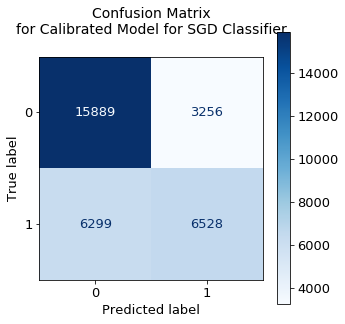

In [59]:
font = {'size'   : 13}
plt.rc('font', **font)

cm = confusion_matrix(y_test, cal_model.predict(x_test))
c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray([0,1]))

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor Calibrated Model for SGD Classifier\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='')

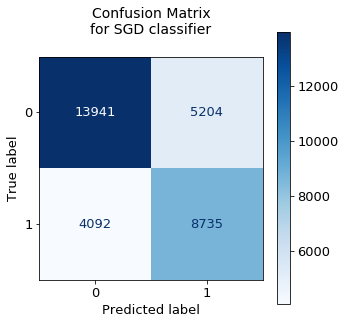

In [60]:
font = {'size'   : 13}
plt.rc('font', **font)

cm = confusion_matrix(y_test, sgd_preds)
c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray([0,1]))

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor SGD classifier\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='')

In [61]:
sgd_preds = cal_model.predict(x_test)

In [62]:
sgd_pred_list = sgd_preds.tolist()
sgd_plot = pd.DataFrame({'actual':list(y_test),
                        'predictions':sgd_pred_list})
sgd_plot

actual  predictions
0           1            1
1           1            1
2           1            0
3           1            1
4           0            0
...       ...          ...
31967       0            1
31968       0            0
31969       1            0
31970       0            0
31971       0            0

[31972 rows x 2 columns]

In [63]:
sgd_probs_vector = sgd_pred_probs[:,1]
print(sgd_probs_vector.shape)

(31972,)


In [64]:
sgd_plot['comparison'] = np.where(sgd_plot['actual']==sgd_plot['predictions'], True, False)
sgd_plot.head(15)

actual  predictions  comparison
0        1            1        True
1        1            1        True
2        1            0       False
3        1            1        True
4        0            0        True
5        0            0        True
6        0            0        True
7        0            1       False
8        0            1       False
9        0            1       False
10       0            1       False
11       0            0        True
12       0            0        True
13       1            1        True
14       1            0       False

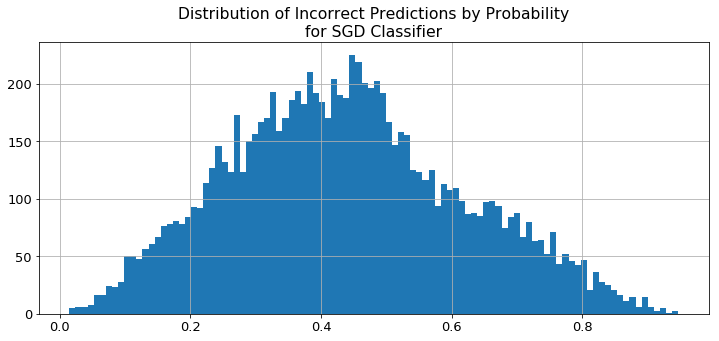

In [65]:
pd.DataFrame(sgd_probs_vector[sgd_plot['comparison']==False]).hist(bins=100, figsize = (12,5))
plt.title('Distribution of Incorrect Predictions by Probability\nfor SGD Classifier')
plt.show()

#### Trying NN on non-PCA data

In [66]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from matplotlib import rcParams
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

In [67]:
# tf.random.set_seed(12)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(67,), activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [69]:
model.compile(
    optimizer='adadelta',
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
    ]
)

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               34816     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 264,961
Trainable params: 264,961
Non-trainable params: 0
_________________________________________________________________


#### NN fit on non-PCA data

In [71]:
stops = EarlyStopping(monitor='val_loss', patience=8, min_delta=1e-6)

model_fit = model.fit(x_train, y_train,
                      validation_data=(x_test1, y_test1),
                      epochs=1000,
                      batch_size=10000,
                      callbacks=[stops])

Train on 127886 samples, validate on 19183 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
127886/127886 [==============================] - 1s 11us/sample - loss: 0.6363 - accuracy: 0.6418 - precision: 0.5872 - recall: 0.3607 - val_loss: 0.5806 - val_accuracy: 0.6762 - val_precision: 0.8779 - val_recall: 0.2241
Epoch 2/1000
127886/127886 [==============================] - 1s 7us/sample - loss: 0.5438 - accuracy: 0.7255 - precision: 0.7001 - recall: 0.5526 - val_loss: 0.4583 - val_accuracy: 0.7904 - val_precision: 0.7740 - val_recall: 0.6746
Epoch 3/1000
127886/127886 [==============================] - 1s 7us/sample - loss: 0.4673 - accuracy: 0.7807 - precision: 0.7564 - recall: 0.6687 - val_loss: 0.4682 - val_accuracy: 0.7602 - val_precision: 0.9157 - val_recall: 0.4431
Epoch 4/1000
127886/127886 [==============================] - 1s 7us/sample - loss: 0.4097 - accuracy: 0.8140 - precision: 0.7942 - recall: 0.7239 - val_loss: 0.3795 - val_accuracy: 0.8426 - val_pre

In [72]:
rcParams['figure.figsize'] = (10, 5)
rcParams['lines.linewidth'] = 3
rcParams['font.size']=14
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

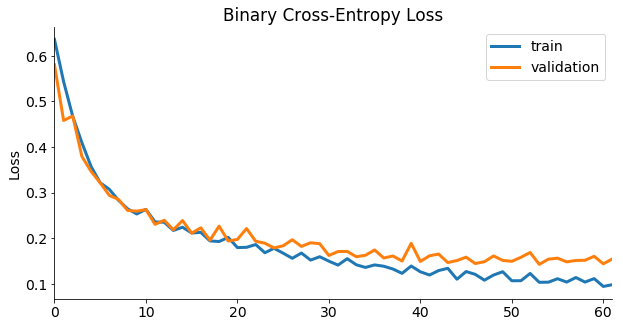

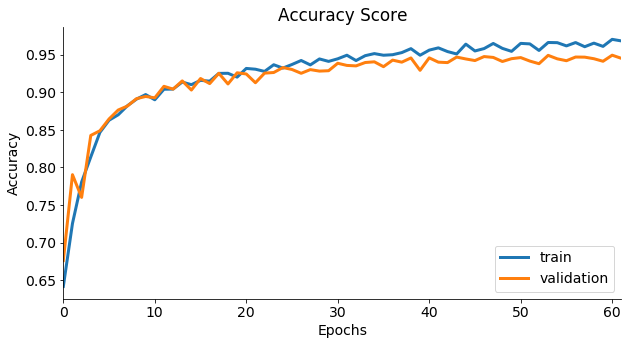

In [73]:
history_df = pd.DataFrame(model_fit.history)
history_df[['loss', 'val_loss']].plot()
plt.title('Binary Cross-Entropy Loss')
plt.ylabel('Loss')
plt.legend(['train','validation'])

history_df = pd.DataFrame(model_fit.history)
history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy Score')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'], loc='lower right')

In [74]:
nn_preds = model.predict_classes(x_test)

In [75]:
print(y_test.shape)
print(nn_preds.shape)

(31972,)
(31972, 1)


In [76]:
f1_score(y_test, nn_preds)

0.9275830072215274

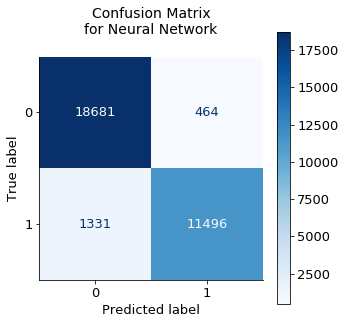

In [77]:
font = {'size'   : 13}
plt.rc('font', **font)

cm = confusion_matrix(y_test, nn_preds)
c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray([0,1]))

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor Neural Network\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='')

In [78]:
nn_pred_probs = model.predict(x_test)
nn_pred_probs

array([[9.98327971e-01],
       [9.99846160e-01],
       [1.01335764e-01],
       ...,
       [3.43707979e-01],
       [1.88673437e-02],
       [7.91549683e-05]], dtype=float32)

In [79]:
nn_pred_list = [item for sublist in nn_preds.tolist() for item in sublist]

In [80]:
nn_plot = pd.DataFrame({'actual':list(y_test),
                        'predictions':nn_pred_list})
nn_plot

actual  predictions
0           1            1
1           1            1
2           1            0
3           1            1
4           0            0
...       ...          ...
31967       0            0
31968       0            0
31969       1            0
31970       0            0
31971       0            0

[31972 rows x 2 columns]

In [81]:
nn_plot['actual'][0] == nn_plot['predictions'][0]

True

In [82]:
nn_plot['comparison'] = np.where(nn_plot['actual']==nn_plot['predictions'], True, False)
nn_plot.head(15)

actual  predictions  comparison
0        1            1        True
1        1            1        True
2        1            0       False
3        1            1        True
4        0            0        True
5        0            0        True
6        0            0        True
7        0            0        True
8        0            0        True
9        0            0        True
10       0            0        True
11       0            0        True
12       0            0        True
13       1            1        True
14       1            1        True

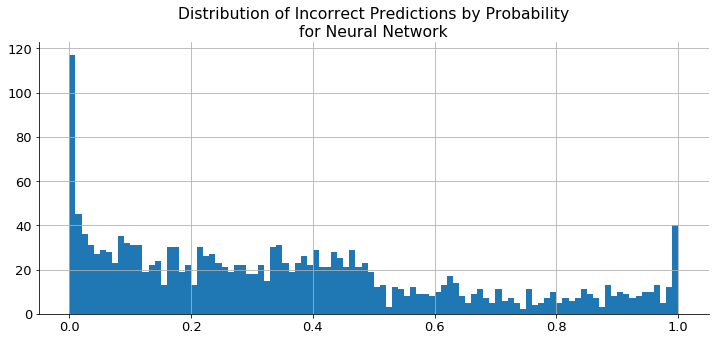

In [83]:
pd.DataFrame(nn_pred_probs[nn_plot['comparison']==False]).hist(bins=100, figsize = (12,5))
plt.title('Distribution of Incorrect Predictions by Probability\nfor Neural Network')
plt.show()

In [84]:
nn_plot['comparison'].value_counts()

True     30177
False     1795
Name: comparison, dtype: int64

#### NN fit on PCA data

In [85]:
# stops = EarlyStopping(monitor='val_loss', patience=8, min_delta=1e-6)

# model_fit = model.fit(x_train_pca, y_train,
#                       validation_data=(x_test1_pca, y_test1),
#                       epochs=1000,
#                       batch_size=10000,
#                       callbacks=[stops])

In [86]:
# history_df = pd.DataFrame(model_fit.history)
# history_df[['loss', 'val_loss']].plot()
# plt.title('Binary Cross-Entropy Loss')
# plt.ylabel('Loss')
# plt.legend(['train','validation'])

# history_df = pd.DataFrame(model_fit.history)
# history_df[['accuracy', 'val_accuracy']].plot()
# plt.title('Accuracy Score')
# plt.ylabel('Accuracy')
# plt.xlabel('Epochs')
# plt.legend(['train','validation'], loc='lower right')

In [87]:
# f1_score(y_test2, nn_preds)

In [88]:
# font = {'size'   : 13}
# plt.rc('font', **font)

# cm = confusion_matrix(y_test2, nn_preds)
# c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray([0,1]))

# fig, ax = plt.subplots(figsize=(5,5))
# ax.grid(False)
# plt.title('Confusion Matrix\nfor Neural Network\n', fontsize=14)
# c_disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='')

#### Random Forest Classifier

In [89]:
rf_hyps = {
    'criterion': ['gini'],
    'max_depth': range(2,11,2),
    'max_features': ['sqrt'],
    'min_impurity_decrease': np.logspace(-10,2,13),
    'class_weight': [None, 'balanced'],
    'n_jobs':[10]
}

In [90]:
rf_clf = RandomForestClassifier()
folder = KFold(n_splits=10, shuffle=True, random_state=867)

In [91]:
rf_search = RandomizedSearchCV(estimator=rf_clf,
                               param_distributions=rf_hyps,
                               n_jobs=30,
                               cv=folder, 
                               scoring='roc_auc',
                               refit='roc_auc',
                               n_iter=20,
                               verbose=5)

In [92]:
result_rf = rf_search.fit(x_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=30)]: Using backend LokyBackend with 30 concurrent workers.
[Parallel(n_jobs=30)]: Done  12 tasks      | elapsed:   17.0s
[Parallel(n_jobs=30)]: Done 102 tasks      | elapsed:  1.5min
[Parallel(n_jobs=30)]: Done 182 out of 200 | elapsed:  3.1min remaining:   18.2s
[Parallel(n_jobs=30)]: Done 200 out of 200 | elapsed:  3.1min finished


In [93]:
print(result_rf.best_params_)
print(result_rf.best_estimator_)
print('f1 score:\t\t\t',result_rf.best_score_)
print('time to fit individual model:\t',result_rf.cv_results_['mean_score_time'].sum().round(2))
best_rf = result_rf.best_estimator_

{'n_jobs': 10, 'min_impurity_decrease': 1e-10, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'class_weight': None}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=1e-10, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=10, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
f1 score:			 0.9455063820753157
time to fit individual model:	 7.76


In [94]:
rf_preds = best_rf.predict(x_test)
f1_score(y_test, rf_preds)

0.8234794427454979

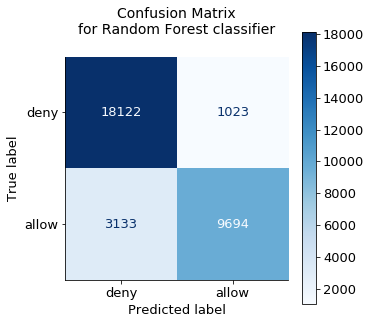

In [95]:
cm = confusion_matrix(y_test, rf_preds)

font = {'size'   : 13}
plt.rc('font', **font)

c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray(['deny','allow']))
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor Random Forest classifier\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='')

In [96]:
rf_probas = best_rf.predict_proba(x_test)[:,1]

In [97]:
rf_plot = pd.DataFrame({'actual':list(y_test),
                        'predictions':rf_preds})
rf_plot['comparison'] = np.where(rf_plot['actual']==rf_plot['predictions'], True, False)
rf_plot.head(15)

actual  predictions  comparison
0        1            1        True
1        1            1        True
2        1            0       False
3        1            1        True
4        0            0        True
5        0            0        True
6        0            0        True
7        0            1       False
8        0            0        True
9        0            0        True
10       0            0        True
11       0            0        True
12       0            0        True
13       1            1        True
14       1            1        True

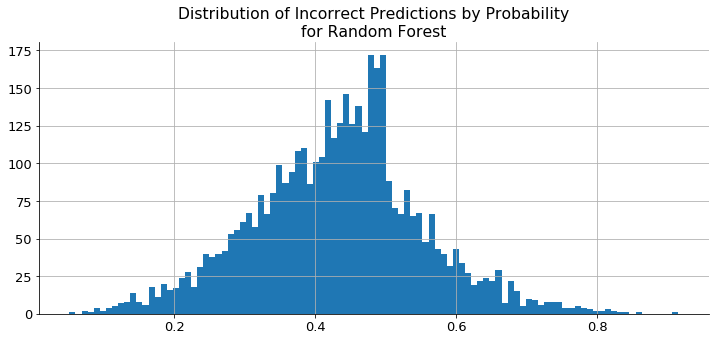

In [98]:
pd.DataFrame(rf_probas[rf_plot['comparison']==False]).hist(bins=100, figsize = (12,5))
plt.title('Distribution of Incorrect Predictions by Probability\nfor Random Forest')
plt.show()

#### Ensembling

Neural Network Model = model <br> 
Random Forest Model = best_rf <br>
SGD Model = cal_model (only way to get probabilities for 'huber' loss)

In [99]:
#### TRAINING DATA for ENSEMBLE ####
nn_probs = np.array([x for sublist in model.predict(x_test1) for x in sublist])
sgd_probs = cal_model.predict_proba(x_test1)[:,1]
rf_probs = best_rf.predict_proba(x_test1)[:,1]

In [100]:
print(nn_probs.shape)
print(sgd_probs.shape)
print(rf_probs.shape)

(19183,)
(19183,)
(19183,)


In [101]:
ensemble_train = pd.DataFrame({'neural_net': nn_probs,
                               'sgd_classifier': sgd_probs,
                               'random_forest': rf_probs},
                              index=range(len(nn_probs)))
ensemble_train

neural_net  sgd_classifier  random_forest
0        0.000190        0.363442       0.264129
1        0.114389        0.568728       0.552393
2        0.000231        0.645428       0.297551
3        0.233459        0.562445       0.418409
4        0.998339        0.519605       0.533888
...           ...             ...            ...
19178    0.999900        0.730828       0.772756
19179    0.966551        0.478412       0.394763
19180    0.004125        0.289000       0.261939
19181    0.979372        0.286703       0.465852
19182    0.264624        0.403833       0.369269

[19183 rows x 3 columns]

In [102]:
#### TEST DATA for ENSEMBLE ####
nn_probs = np.array([x for sublist in model.predict(x_test2) for x in sublist])
sgd_probs = cal_model.predict_proba(x_test2)[:,1]
rf_probs = best_rf.predict_proba(x_test2)[:,1]

In [103]:
print(nn_probs.shape)
print(sgd_probs.shape)
print(rf_probs.shape)

(12789,)
(12789,)
(12789,)


In [104]:
ensemble_test = pd.DataFrame({'neural_net': nn_probs,
                               'sgd_classifier': sgd_probs,
                               'random_forest': rf_probs},
                              index=range(len(nn_probs)))
ensemble_test

neural_net  sgd_classifier  random_forest
0        0.563601        0.319639       0.489716
1        0.996745        0.458632       0.754905
2        0.988416        0.744982       0.787966
3        0.941519        0.426107       0.478079
4        0.002444        0.252291       0.182228
...           ...             ...            ...
12784    0.996818        0.534862       0.490930
12785    0.999979        0.354344       0.691910
12786    0.000223        0.070082       0.130798
12787    0.206562        0.437976       0.614548
12788    0.004600        0.255980       0.301324

[12789 rows x 3 columns]

In [105]:
ensemble_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(3,), activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [106]:
ensemble_model.compile(
    optimizer='adadelta',
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [107]:
ensemble_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               1024      
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 526,849
Trainable params: 526,849
Non-trainable params: 0
_________________________________________________________________


In [108]:
stops = EarlyStopping(monitor='val_loss', patience=8, min_delta=1e-6)

ensemble_model.fit(ensemble_train, y_test1,
                   validation_data=(ensemble_test, y_test2),
                   epochs=1000,
                   batch_size=10000,
                   callbacks=[stops])

Train on 19183 samples, validate on 12789 samples
Epoch 1/1000
19183/19183 [==============================] - 1s 38us/sample - loss: 0.6535 - accuracy: 0.6251 - precision: 0.5172 - recall: 0.9873 - val_loss: 0.5468 - val_accuracy: 0.9429 - val_precision: 0.9062 - val_recall: 0.9567
Epoch 2/1000
19183/19183 [==============================] - 0s 12us/sample - loss: 0.5096 - accuracy: 0.9452 - precision: 0.9137 - recall: 0.9534 - val_loss: 0.3921 - val_accuracy: 0.9475 - val_precision: 0.9332 - val_recall: 0.9363
Epoch 3/1000
19183/19183 [==============================] - 0s 12us/sample - loss: 0.3518 - accuracy: 0.9490 - precision: 0.9375 - recall: 0.9352 - val_loss: 0.2504 - val_accuracy: 0.9464 - val_precision: 0.9448 - val_recall: 0.9203
Epoch 4/1000
19183/19183 [==============================] - 0s 11us/sample - loss: 0.2259 - accuracy: 0.9495 - precision: 0.9490 - recall: 0.9237 - val_loss: 0.1870 - val_accuracy: 0.9457 - val_precision: 0.9490 - val_recall: 0.9137
Epoch 5/1000
19183

Epoch 36/1000
19183/19183 [==============================] - 0s 12us/sample - loss: 0.1475 - accuracy: 0.9495 - precision: 0.9495 - recall: 0.9233 - val_loss: 0.1537 - val_accuracy: 0.9478 - val_precision: 0.9493 - val_recall: 0.9191
Epoch 37/1000
19183/19183 [==============================] - 0s 11us/sample - loss: 0.1473 - accuracy: 0.9495 - precision: 0.9488 - recall: 0.9240 - val_loss: 0.1539 - val_accuracy: 0.9478 - val_precision: 0.9505 - val_recall: 0.9176
Epoch 38/1000
19183/19183 [==============================] - 0s 12us/sample - loss: 0.1472 - accuracy: 0.9495 - precision: 0.9500 - recall: 0.9227 - val_loss: 0.1533 - val_accuracy: 0.9478 - val_precision: 0.9482 - val_recall: 0.9201
Epoch 39/1000
19183/19183 [==============================] - 0s 11us/sample - loss: 0.1469 - accuracy: 0.9494 - precision: 0.9495 - recall: 0.9229 - val_loss: 0.1532 - val_accuracy: 0.9477 - val_precision: 0.9450 - val_recall: 0.9234
Epoch 40/1000
19183/19183 [==============================] - 0s 

In [109]:
final_preds = ensemble_model.predict_classes(ensemble_test)
f1_score(y_test2, final_preds)

0.931738913801694

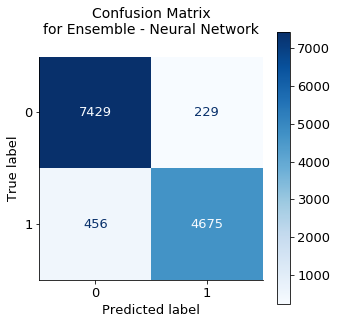

In [110]:
font = {'size'   : 13}
plt.rc('font', **font)

cm = confusion_matrix(y_test2, final_preds)
c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray([0,1]))

fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor Ensemble - Neural Network\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='')

In [111]:
final_pred_list = [item for sublist in final_preds.tolist() for item in sublist]
final_plot = pd.DataFrame({'actual':list(y_test2),
                           'predictions':final_pred_list})

final_plot['actual'][0] == final_plot['predictions'][0]
final_plot['comparison'] = np.where(final_plot['actual']==final_plot['predictions'], True, False)
final_plot.head(15)

actual  predictions  comparison
0        1            1        True
1        1            1        True
2        1            1        True
3        1            1        True
4        0            0        True
5        0            0        True
6        0            0        True
7        0            0        True
8        0            0        True
9        1            1        True
10       0            0        True
11       1            1        True
12       1            1        True
13       1            1        True
14       1            1        True

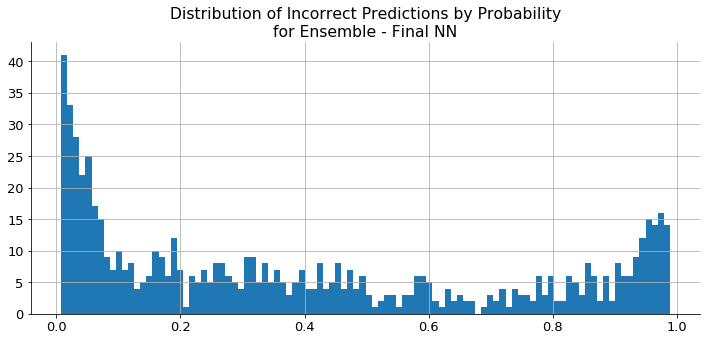

In [112]:
final_pred_probs = ensemble_model.predict(ensemble_test)
pd.DataFrame(final_pred_probs[final_plot['comparison']==False]).hist(bins=100, figsize = (12,5))
plt.title('Distribution of Incorrect Predictions by Probability\nfor Ensemble - Final NN')
plt.show()